In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from datetime import timedelta

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
window = 10000 
df = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})
counts = pd.DataFrame({'3.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '3.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '4.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '5.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.0':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.1':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.2':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.3':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.4':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.5':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.6':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.7':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.8':[0, 0, 0, 0, 0, 0, 0, 0],
                       '6.9':[0, 0, 0, 0, 0, 0, 0, 0],
                       '7.0':[0, 0, 0, 0, 0, 0, 0, 0]})

aad = pd.DataFrame({'3.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '3.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '4.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '5.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.1':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.2':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.3':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.4':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.5':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.6':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.7':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.8':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '6.9':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window), 
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)],
                   '7.0':[np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window),
                          np.zeros(window), np.zeros(window), np.zeros(window), np.zeros(window)]})

ad = pd.DataFrame({'3.0':[[], [], [], [], [], [], [], []],
                   '3.1':[[], [], [], [], [], [], [], []],
                   '3.2':[[], [], [], [], [], [], [], []],
                   '3.3':[[], [], [], [], [], [], [], []],
                   '3.4':[[], [], [], [], [], [], [], []],
                   '3.5':[[], [], [], [], [], [], [], []],
                   '3.6':[[], [], [], [], [], [], [], []],
                   '3.7':[[], [], [], [], [], [], [], []],
                   '3.8':[[], [], [], [], [], [], [], []],
                   '3.9':[[], [], [], [], [], [], [], []],
                   '4.0':[[], [], [], [], [], [], [], []],
                   '4.1':[[], [], [], [], [], [], [], []],
                   '4.2':[[], [], [], [], [], [], [], []],
                   '4.3':[[], [], [], [], [], [], [], []],
                   '4.4':[[], [], [], [], [], [], [], []],
                   '4.5':[[], [], [], [], [], [], [], []],
                   '4.6':[[], [], [], [], [], [], [], []],
                   '4.7':[[], [], [], [], [], [], [], []],
                   '4.8':[[], [], [], [], [], [], [], []],
                   '4.9':[[], [], [], [], [], [], [], []],
                   '5.0':[[], [], [], [], [], [], [], []],
                   '5.1':[[], [], [], [], [], [], [], []],
                   '5.2':[[], [], [], [], [], [], [], []],
                   '5.3':[[], [], [], [], [], [], [], []],
                   '5.4':[[], [], [], [], [], [], [], []],
                   '5.5':[[], [], [], [], [], [], [], []],
                   '5.6':[[], [], [], [], [], [], [], []],
                   '5.7':[[], [], [], [], [], [], [], []],
                   '5.8':[[], [], [], [], [], [], [], []],
                   '5.9':[[], [], [], [], [], [], [], []],
                   '6.0':[[], [], [], [], [], [], [], []],
                   '6.1':[[], [], [], [], [], [], [], []],
                   '6.2':[[], [], [], [], [], [], [], []],
                   '6.3':[[], [], [], [], [], [], [], []],
                   '6.4':[[], [], [], [], [], [], [], []],
                   '6.5':[[], [], [], [], [], [], [], []],
                   '6.6':[[], [], [], [], [], [], [], []],
                   '6.7':[[], [], [], [], [], [], [], []],
                   '6.8':[[], [], [], [], [], [], [], []],
                   '6.9':[[], [], [], [], [], [], [], []],
                   '7.0':[[], [], [], [], [], [], [], []]})

In [4]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-06-26"), endtime=UTCDateTime("2020-06-26"), minlongitude=-179, maxlongitude=-145, minlatitude=42, maxlatitude=71, minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')
dists = []

do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out
do_ypcall: clnt_call: RPC: Timed out


In [5]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])
        

In [6]:
len(eq_with_data)

6077

In [7]:
eq_no = 0
for eq_name in eq_with_data:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():# and int(data[i].stats.sampling_rate) == 100:  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                
                pick = picks[tr_name]
                #pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                #print(pick_samples)
                tr.trim(pick-timedelta(seconds = 10), pick+timedelta(seconds = 150))
                pick_samples = int(10 * tr.stats.sampling_rate)
                tr.remove_response(inv)
                #snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples//2:500+pick_samples//2]))
                snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude
                tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200 and snr>10: 
                    dists.append(distance)
                    print(distance)

                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)

                    if abs_displ[pick_samples] < 0.001:
                        sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                        current = ad[eq_mag_str][int(distance//25)]
                        current.append(abs_displ[pick_samples:pick_samples+window])
                        df[eq_mag_str][int(distance//25)] = sum_abs_displ
                        ad[eq_mag_str][int(distance//25)]= current
                        counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

0 out of 6077
98.5550858792
80.2091687096
40.8674729857
1 out of 6077
2 out of 6077
3 out of 6077
4 out of 6077
159.919468249
151.668413656
158.060718238
152.709930064
47.8677496964
62.5698226704
68.2724763283
81.1192723402
91.2871649208
154.961347777
5 out of 6077
6 out of 6077
67.6119775359
7 out of 6077
8 out of 6077
76.8223658904
71.5378665952
96.7096828158
99.9863116662
160.251378289
38.1226817656
84.4606604456
92.7437048051
164.406230157
188.230930338
113.893296866
9 out of 6077
10 out of 6077
108.720162733
58.4064503008
54.922948261
80.451395777
117.366501574
73.996530631
51.1103883226
24.2828601368
86.7393718261
85.9353293934
54.715776251
11 out of 6077
101.160842587
12 out of 6077
35.2241266944
13 out of 6077
14 out of 6077
15 out of 6077
16 out of 6077
17 out of 6077
99.6945962364
82.2083018496
18 out of 6077
61.6955302594
84.2199506487
98.2361643328
42.6233782411
29.7940628139
52.5755860612
92.4635248588
96.7191788784
96.7880837349
96.7610137134
96.6913704533
96.6699361348
9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


71.5594841975
16.8144627725
62.8608049594
75.268719477
121.122844953
97.0875342314
104.406409707
109.814118501
59.5991080386
78.8964751406
90.7928647279
19 out of 6077
20 out of 6077
21 out of 6077
110.168690359
98.6002910381
22 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


92.1144008475
23 out of 6077
61.6625616465
78.4992866635
90.6332099034
16.3036764778
108.017730592
86.3573719538
66.5833626245
99.9164908685
99.981294316
99.993778123
99.9285272083
99.7876763506
100.123543846
100.206783355
99.8284261905
99.530297187
99.9574168494
100.637507572
100.202409852
99.8537173024
103.768653178
125.009018738
60.4844237567
94.1958554464
90.0815951767
62.3251569643
84.340852381
118.515117217
102.059996962
105.358871554
57.4594355239
98.8062213073
80.1077822186
76.8365325184
77.8909616441
105.039095364
89.9728542412
99.7611125706
49.0630748794
117.081530968
106.423225658
98.900680669
78.8179796908
95.1788760597
91.3551312885
105.771059469
88.9818850169
125.883131169
9.59858385043
52.4541758893
95.719969725
86.6734457273
85.9886000903
83.597438631
48.6678122182
94.9137009305


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


129.900882039
55.038535351
124.377404485
87.9473660412
69.2564032021
99.6433507636
99.9453296574
100.916526224
79.342626577
74.3961967706
106.504827816
86.8932838908
85.6803880858
81.8720754345
112.875332198
52.7237644196
70.0391192291
107.114037937
42.3710409642
63.9976615948
108.908882314
99.0086026516
42.0070142641
105.888027142
117.498264932


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


40.1635934846
86.5485263388
89.7811189208
117.264751248
100.457170215
109.956436928
51.0100902704
124.445954249
94.805355609
73.907917141
24 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


98.4651676748
25 out of 6077
26 out of 6077
67.0342461804
66.8538180323
27 out of 6077
28 out of 6077
34.8055244609
18.2234646541
19.5376969984
47.9002006781
109.933736392
155.365570086
74.1257688122
29 out of 6077
54.2429909389
86.1230514355
70.1754567495
30 out of 6077
59.4772987323
31 out of 6077
108.762834728
81.5041398028
32 out of 6077
52.4606895303
40.093390437
166.243600643
41.120421812
105.767425349
94.4180793953
189.990016985
43.5878639781
185.391656347
182.854698001
102.772080684
33 out of 6077
61.44621847
34 out of 6077
35 out of 6077
108.554912123
101.687292428
101.673846745
54.0596991611
60.5774587544
36 out of 6077
31.0379462041
48.5493991454
104.437003117
37 out of 6077
108.751063153
99.642226616
82.8037046575
30.9553377482
61.6204104579
97.6740084148
68.2356626911
38 out of 6077
39 out of 6077
35.9035223869
40 out of 6077
14.2344944448
41 out of 6077
84.8710480022
42 out of 6077
39.5499844791
39.4059013825
37.1164146037
32.0670313364
37.1482795382
38.9603985368
26.7043

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


95.1828576215
21.0379392765
42.0593821628
83.0288007241
83.0288007241
107.491000326
77.0683495146
74.9197474335
86.1501186592
85.0563233005
73.1453980507
52 out of 6077
103.337682416
53.9236911359
111.906543536
111.837045291
111.842815944
111.912931325
112.003289273
111.639188927
111.660913939
112.057414686
112.368235498
111.761111357
111.195386878
111.821095762
112.106197448
121.257875302
120.843003208
69.2872002157
23.7969761878
89.2158845434
96.2069355706
34.5620925177
116.190795632
120.186844878
27.6472086939
59.3395519045
103.705144695
92.4163092251
46.3477358375
21.369565479
95.6057842088
118.065103535
117.526331045
103.2213765
111.786157428
73.6283807878
104.615343545
112.258863692
111.882823561
109.300712762
51.3886505049
24.9979670464
98.0918755477
65.2394238363
120.36505614
34.91619113
38.9313807899
9.26439746043
92.9343013833
111.425485664
43.2225050879
12.9741378431
26.026750288
31.1793200312
53 out of 6077
54 out of 6077
35.9457682401
89.8879753125
55 out of 6077
56 out of

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.5111055576
52.0959442567
107.644609676
105.555467589
59 out of 6077
91.2746583863
89.1211027393
95.2967178081
60 out of 6077
45.7821078858
61 out of 6077
38.0965113888
115.16980511
99.5758211264
26.8000118097
15.0362470324
53.3403247928
100.9352013
18.4332142561
84.761032675
39.7571825372
26.1662847919
32.0301367309
29.4830046941
60.0599398071
100.95461353
87.4622790122
62 out of 6077
63 out of 6077
64 out of 6077
65 out of 6077
38.0864433341
66 out of 6077
67 out of 6077
115.489385036
41.1149741088
103.402065276
68 out of 6077
69 out of 6077
58.0622823809
70 out of 6077
81.7294581409
100.857642657
38.1912848984
146.148772122
194.443087229
31.1507026566
120.834412688
69.2520748323
153.573786022
107.580110382
184.144236003
57.51414221
177.146467537
71 out of 6077
144.652349297
96.2294818702
167.643430247
63.5796574385
73.7025127184
71.1328232112
86.7876354558
88.2906076545
144.632044829
187.909011226
196.541284948
29.5838614451
72 out of 6077
23.9034960832
73 out of 6077
25.429795198

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


79.2670485654
103.052640694
77 out of 6077
48.9589091892
53.0569945398
111.113704612
159.038234426
36.2021430995
85.2524597494
49.4022789824
175.766490222
93.1318638845
78 out of 6077
160.545610482
98.5000939538
193.311900263
56.5046151746
142.454332405
137.076696816
72.5134325556
139.400606071
135.93786693
131.750582056
51.4006051816
79 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20.9346546886
80 out of 6077
81 out of 6077
103.430482475
97.2801201838
82 out of 6077
113.917691519
127.261939416
56.3136469806
1.37081362701
99.7573892251
83 out of 6077
91.9947736286
84 out of 6077
63.3847461224
131.232558291
21.9902178355
137.622362224
178.960492388
51.1945400702
97.15108582
109.669627919
197.963407595
43.5799544306
176.765905242
86.9692282301
199.769358261
75.724991337
194.324117052
85 out of 6077
105.238516374
97.6380270728
51.8417522022
187.979841197
181.709841784
189.326438534
86 out of 6077
85.3271669787
100.575584239
95.3643793038
86.6105556211
87 out of 6077
80.8860637255
100.57226188
145.143648566
193.501642178
30.5020003442
119.851034401
68.7295785037
154.355286952
107.912986857
185.121565167
58.4871010849
178.102027574
88 out of 6077
89 out of 6077
50.6809342263
50.0981398176
50.0568142174
50.1534391773
90 out of 6077
83.46303985
129.217984603
99.3466708984
39.7104950275
147.225242797
195.918168013
30.363238052
122.11008264
71.2696474341
151.744206993
109

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHE_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHN_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: CZ_MORC__HHZ_D: Warning: Number of blockettes in fixed header (1) does not match the number parsed (2)
  warnings.warn(_w, InternalMSEEDWarning)
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/mseed/headers.py:828: InternalMSEEDWarning: GE_MORC__HHE_D: Warning: Number of blockettes in fixed he

44.0156282245
95 out of 6077
112.50153027
76.2299087301
117.912099642
93.1588097176
18.7743674194
25.2016558032
55.3510567288
97.6605721733
62.033331662
96 out of 6077
67.5049887105
80.3282303801


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


121.098906077
47.5244316221
97 out of 6077
44.6694689802
99.4059526879
86.1136494698
98 out of 6077
99 out of 6077
98.8156899421
100 out of 6077
54.5065881171
109.590107248
91.5294162824
101 out of 6077
102 out of 6077
104.262370504
96.1545670478
45.0859543045
49.5516260922
92.7948959205
88.4866420944
121.515836793
18.2405230148
37.5446555826
51.0608437723
84.01511833
72.5253998197
6.93229466446
118.989977656
99.0904954158
126.561089981
83.8392284571
62.341836822
40.1117247217
84.5918686597
39.6514201011
30.4122668663
98.0419913547
36.3298372856
31.2430899077
11.4289827584
68.2231773631
55.2117250429
103 out of 6077
105.344723285
95.8491318435
44.0372044453
50.4194956033
93.7816780498
89.3976513797
122.446777587
17.3219588505
38.6450530249
51.8356110979
84.7071982154
73.1264762308
7.13569745476
120.002771779
100.006764638
127.610684747
82.766681724
63.4377630122
40.2001349094
85.6696728719
39.5235986089
31.3561494039
99.066160858
35.5771299606
31.5848525577
12.429047567
67.1253037024
5

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112 out of 6077
113 out of 6077
97.5905326197
108.688305351
30.7793747727
16.129064852
100.182392355
112.996502928
49.2085759192
53.5364489552
71.5999810196
59.8306929244
72.6775167251
73.1037076905
29.8628434765
19.0625912564
60.2748978239
38.4776075656
56.4040109862
91.7279525503
114 out of 6077
104.647459224
94.2850920241
82.0590828367
111.423660975
96.9388210832
28.4460166646
59.7071103471
92.2968365352
66.1404881271
115 out of 6077
116 out of 6077
80.1535753372
31.251947124
30.4571450988
59.0833527874
30.3706959547
30.682546378
30.9283939843
33.1288233055
29.1261466404
35.5860430295
117 out of 6077
118 out of 6077
21.1164162411
50.7818311442
65.0605781862
41.9504629115


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


74.327077256
67.1532830636
119 out of 6077


/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


71.694940447
53.2500745892
89.797359928
120 out of 6077
121 out of 6077
122 out of 6077
113.622580348
118.578565297
123 out of 6077
124 out of 6077
17.2689840466
142.406804648
97.3693120958
113.104455235
76.2605121475
125 out of 6077
68.6129745194
126 out of 6077
127 out of 6077
51.5393539482
128 out of 6077
129 out of 6077
92.5342935017
66.7900226157
8.56063881553
130 out of 6077
115.418345899
102.155996173
76.8058094157
121.514630103
94.8620797
27.5852448523
101.400762975
63.6683208864
131 out of 6077
109.90503836
78.9142215637
116.1276382
95.2735292933
26.9896777732
96.3981820306
64.2211325024
132 out of 6077
91.3528367823
133 out of 6077
105.686214546
27.5193790659
99.9169477025
60.7467179443
134 out of 6077
24.0675831477
95.1503335474
135 out of 6077
115.339817973
25.4186198951
92.0372266389
67.8035663516
136 out of 6077
91.4567832858
137 out of 6077
6.63134926283
138 out of 6077
115.112025284
105.216451323
44.7915164512
57.0163548009
86.576865992
117.233916063
139 out of 6077
72.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


144 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


145 out of 6077
117.739509501
179.034628374
167.058561693
151.507467661
63.6872166922
71.0509967981
13.4388310504
60.9007785336
56.295332684
146 out of 6077
147 out of 6077
109.009290159
148 out of 6077
89.505855652
104.238258946
108.664234231
113.485111251
57.9378163745
96.8962630167
149 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

22.9884762653
75.3977647829
78.2406946533
116.996816025
85.636268065
85.8032380652
150 out of 6077
113.190769677
108.284644198
152.141003579
80.0555885182
84.1112250535
151 out of 6077
103.139765912
14.033980259
109.806761017
152 out of 6077
153 out of 6077
154 out of 6077
95.2856055748
81.29062184
99.7048505777
87.2432444222
124.32361761
155 out of 6077
156 out of 6077
157 out of 6077
58.6301838357
26.7428600842
88.8183874078
105.183635576
105.114598602
105.141031604
105.210788339
105.234852503
104.868379864
105.010526038
105.393805706
105.692482709
104.927486722
104.544742153
105.332154895
105.521935651
121.337811882
91.7566047026
62.8523119238
48.1051534587
120.51312889
69.1169809625
64.5198049866
42.2032631168
22.7180693887
114.701429178
27.9971146729
61.5309948637
76.930322315
27.893266049
118.384188357
125.780276465
113.284326538
57.4600934415
106.533662522
105.167864969
99.9507933365
42.9121120794
56.1545512045
45.9977784863
70.0556534415
35.969527888
118.0318751
65.6380194524
2

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


50.7500673596
61.185851639
159 out of 6077
67.6715078378
160 out of 6077
111.263010217
118.670680633
127.707808508
126.535713872
129.50548112
163.578804571
181.747331441
131.708023541
83.9314786454
75.7605145838
84.072914366
36.3241053297
95.0616219618
79.6957234612
75.719616012
161 out of 6077
162 out of 6077
163 out of 6077
121.190541974
105.010754344
126.104758503
91.8859339888
26.5380442844
105.164495067
60.7077727173
164 out of 6077
165 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


166 out of 6077
167 out of 6077
3.06420081733
2.9547028089
3.71295227453
85.5258282634
77.7622521452
66.7807454457
22.646705315
70.3155794597
3.39748480387
168 out of 6077
96.5284453516
97.3289796515
109.454031232
24.995681727
43.2612269799
80.9831296437
169 out of 6077
24.0602253914
101.907276668
101.838246038
101.864713796
101.934464074
101.958414112
101.591964655
101.734318307
102.11753749
102.416166417
101.6509721
101.268578134
102.056279013
102.245816925
118.131437761
93.484130921
66.1291137314
46.8998473173
66.134505293
44.9715355092
20.2656530529
26.290235286
30.226207425
105.224588221
115.185371925
122.830015366
102.320333909
39.6905165344
57.2351888555
67.1225072409
38.3230131334
114.786035971
29.4555444021
101.536409736
15.3682506377
170 out of 6077
180.461226724
82.6561848926
76.1863795832
171 out of 6077
92.5879687822
31.3084494755
141.351672881
49.9559559312
55.0168582164
62.002179873
68.834879044
75.1019205946
92.8055703932
112.674232835
116.728862283
36.6803952132
44.192

/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


200 out of 6077
106.578810234
92.2887638577
55.2294140893
56.5297293273
110.536471361
129.698879001
107.826240647
136.115207476
88.4902953635
85.0911204017
84.811990085
87.3556207093
93.8632475093


/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


114.668221305
79.0351509845
201 out of 6077
103.287862065
202 out of 6077
86.231129144
64.0784169904
203 out of 6077
174.120226194
60.5020249661
146.515631729
147.245308903
204 out of 6077
119.638987642
81.7478867372
36.7752374431
134.159435648
53.96137312
70.2310340305
121.26840206
28.4535046172
75.6720181837
109.043499343
86.8519979674
15.3644525448
84.9392192494
205 out of 6077
101.923477305
93.9597212906
94.2671530492
132.565400018
169.029496612
127.836198414
70.2367494692
101.795795478
108.968259163
44.4635729558
206 out of 6077
62.3497986817
95.301460171
74.9992322132
97.0668552957
93.2537455198
84.1945956995
207 out of 6077
83.8831807519
109.35281722
208 out of 6077
209 out of 6077
210 out of 6077
211 out of 6077
36.8659120869
153.407778242
144.035019853
212 out of 6077
39.8184639206
160.508649639
50.690202793
108.553546232
152.869163432
47.3514992899
104.111830116
81.1634703405
177.698993552
38.319237501
172.179481082
195.172003407
108.058597291
213 out of 6077
38.7933695494
15

/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


83.8778189827
97.3676252621
218 out of 6077
219 out of 6077
220 out of 6077
78.1153310557
221 out of 6077
59.1425073615
130.576964289
174.01986807
44.1579857444
102.677944321
103.182394044
44.5196348675
95.4604262944
198.068096012
222 out of 6077
34.6788429161
144.749167186
223 out of 6077
88.3101293678
61.6226753138
224 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

116.085813219
19.5970937316
225 out of 6077
158.62723306
61.6037752415
133.291621245
23.9909638379
135.579182034
177.125344551
50.2939535929
97.4583096355
107.663195619
196.520994051
198.652204216
177.895593057
88.3707442468
195.947309053
226 out of 6077
227 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


89.8597072162
228 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


74.7306281446
229 out of 6077
116.602707497
72.9196348183
96.0241097652
142.512618974
230 out of 6077
94.6629225894
94.6629225894
27.4016358818
22.1438016795
20.0886925906
231 out of 6077
232 out of 6077
111.632279382
196.592757356
233 out of 6077
53.4922716381
51.3599686168
78.5796041037
234 out of 6077
235 out of 6077
91.339311898
116.394089648
191.305635934
236 out of 6077
58.0506332011
237 out of 6077
69.8994876662
238 out of 6077
239 out of 6077
182.015638207
11.2213479582
240 out of 6077
14.2960089815
241 out of 6077
92.1725345559
20.5882213252
33.5275126026
29.3485923789
33.1624057027
17.2505720186
28.2764268445
26.9136994571
242 out of 6077
243 out of 6077
7.89642357102
13.3420476988
14.0169308473
44.5608640523
11.7803689287
28.6066207437
48.5467441959
10.8198605613
14.6815207616
6.00188680161
9.63957403707
12.2396874568
14.1581366574
13.8036283296
8.92960393349
14.7027473138
15.3233362793
244 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


245 out of 6077
79.864073381
246 out of 6077
38.7178401488
52.2328491738
15.9111342764
56.7772091911
77.4524829516
123.013202824
91.6677527571
50.47604623
104.714390539
90.6763027524
59.8520905061
107.413385038
64.4473338904
61.0732848512
121.647298702
48.6859345937
40.443708305
27.8821191742
127.347073528
92.2111955636
74.9669377261
44.2314396994
14.072879798
102.404845472
28.6386367144
65.601244857
120.173903496
24.7804154116
99.5310504824
19.3403767356
109.282147302
25.3367868259
116.181223727
97.1216543003
33.819972118
120.154436912
47.3789851351
42.7562885143
110.571406343
85.5625422075
109.835159082


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


9.69890435182
27.9419453598
52.9437795222
127.272759857
19.5820965551
129.303967539
247 out of 6077
99.3127919757
97.6015575798
92.6150799168
110.367277999
21.5151929808
38.7649965975
93.649551322
76.4994160428
248 out of 6077
109.498624124


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.264690412


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.041894127
102.309680725


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


49.3729458307
24.3506237497


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


110.018683013
78.0906556382
249 out of 6077
44.9198317116
111.144006086
51.9247204868
109.759552646
156.255543518
40.8930603526
110.215482442
83.2359700178
182.78048238
44.7697601085
174.039386226
190.333615701
112.202557978
250 out of 6077
59.0372578856
251 out of 6077
252 out of 6077
47.0403331727
158.187140468
110.344989887
50.2151956142
112.019399706
158.593491729
39.4639851637
110.523310012
85.5617707195
184.932117859
45.5509897475
176.345935817
188.118248822
111.358263098
253 out of 6077
41.3675847574
254 out of 6077
41.1365910352
139.721970989
155.565801962
255 out of 6077
87.9818378133
121.251756094
184.910243754
256 out of 6077
74.0615765131
74.0615765131
257 out of 6077
258 out of 6077
122.290787654
104.63560859
49.2243916164
59.1447030026
259 out of 6077
95.3549134549
260 out of 6077
145.349564636
72.3917346111
81.9469177273
261 out of 6077
120.767907409
188.871314934
262 out of 6077
89.3192806621
263 out of 6077
264 out of 6077
48.0525469174
91.5572183595
265 out of 6077
33

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112.836901083
77.1544219304
36.4644057526
34.4920590631
58.2779012842
53.2023768994
84.0166839774
97.9988750166
54.2387844037
275 out of 6077
74.1450182855
276 out of 6077
277 out of 6077
278 out of 6077
89.4404258837
279 out of 6077
59.777683176
83.8501981061
44.6533507365
52.0417176519
280 out of 6077
75.0390034462
281 out of 6077
88.0454784321
282 out of 6077
283 out of 6077
120.59759537
284 out of 6077
94.8384972097
91.5788482675
121.621743126
285 out of 6077
286 out of 6077
108.250186148
98.3223535803
72.0403631716
41.8051208834
287 out of 6077
288 out of 6077
289 out of 6077
70.6653296108
290 out of 6077
291 out of 6077
82.2584155512
86.830944081
292 out of 6077
293 out of 6077
294 out of 6077
45.1598859444
104.704274904


/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


118.559935325
295 out of 6077
144.954045856
153.775913296
10.0774204136
89.714992113
139.976992088
158.96489583
114.897895559
138.090328613
296 out of 6077
104.694203813
297 out of 6077
31.0664382896
298 out of 6077
35.2700104317
55.4873692474
109.558532109
51.9422282926
50.3334338288
299 out of 6077
300 out of 6077
301 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


302 out of 6077
94.3223825409
303 out of 6077
38.6738349792
140.498037727
155.123818242
304 out of 6077
91.4549428114
305 out of 6077
306 out of 6077
109.027942604
100.559624572
117.026619027
307 out of 6077
56.8917883793
308 out of 6077
42.471022792
42.5858987107
55.1763607444
47.3709671107
46.5828583923
98.6297130129
76.6780345031
309 out of 6077
310 out of 6077
311 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


84.7172725575
32.7868933224
312 out of 6077
313 out of 6077
25.0488519668
314 out of 6077
315 out of 6077
102.244499999
98.79565661
2.03829732865
316 out of 6077
162.535370566
137.81523656
159.022134878
317 out of 6077
176.349383432
59.0403950021
147.958758849
144.914481364
318 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.5084789534
319 out of 6077
27.5592930688
43.212903263
47.8869182713
320 out of 6077
69.5345452385
321 out of 6077
110.430226997
105.732343582
322 out of 6077
323 out of 6077
43.0667321491
148.508008591
37.52701369
120.824147215
158.725313985
60.9618630457
86.3463320877
91.8855733559
176.726014146
24.2961750936
182.317890484
88.8251735343
324 out of 6077
92.8064592272
128.065183064
105.799101994
101.516479228
325 out of 6077
98.0950554936
70.2189146334
326 out of 6077
66.810542716
136.742640566
327 out of 6077
111.261622764
328 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


329 out of 6077
330 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


95.4971219671
91.0911779977
53.9791430184
105.134985257


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


17.8932168712
118.969037333


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


59.532082317


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


89.8084785752
113.765199336
331 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


73.1738853051
332 out of 6077
62.3259222758
110.305512599
98.823984407
110.414089315
110.46628777
110.791193918
108.112215074
333 out of 6077
165.48533173
68.5510715598
71.3119760068
187.842248948
28.3874005855
20.2004809844
33.9143486595
111.609644924
77.8258216918
38.8242409327
96.2016331046
87.1702924281
119.483423855
76.0991392658
334 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


335 out of 6077
53.0461081767
53.0461081767
95.944455496
336 out of 6077
111.29764993
108.293920665
337 out of 6077
106.028363759
338 out of 6077
12.9239654905
339 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


340 out of 6077
110.900901743
341 out of 6077
101.196915314
76.2971615571
15.6450624537
55.3068011463
342 out of 6077
159.570466744
45.6331350775
128.459667698
111.499975926
5.36003715608
89.8384076459
343 out of 6077
139.470093142
157.672635546
122.320289343
115.414074276
111.741099189
118.550151345
114.068743002
113.952792967
117.270073442
185.009172989
147.986150007
105.712434623
49.025005793
106.774331841
99.2403003623
198.326904357
99.8861988165
65.8015743049
188.430872356
344 out of 6077
95.0229354822
60.778123681
58.5522646523
345 out of 6077
124.11076693
346 out of 6077
173.650519864
45.5929233544
148.487503914
37.7321097925
120.26682026
161.038069113
53.1693076126
94.0321982568
91.9657136518
181.474282986
31.6851312387
182.861144551
94.3450827718
92.5176768454
347 out of 6077
348 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48.0231230379
349 out of 6077
60.9827628843
111.440179693
350 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


71.0594120731
140.659648998
351 out of 6077
25.6974768773
40.5734791924
22.5726966345
24.753786169
11.4065808987
91.3849059115
84.8041746207
50.1305391785
104.727825952
77.7145184942
119.528618849
49.9504616267
40.64570541
40.6845145615
40.6192445832
40.579697254
40.7269103204
40.9439749644
40.571685416
40.3804194489
40.2381718934
41.06199209
40.8470227149
39.9967424503
40.113965557
15.517656676
108.642495643
74.7193975531
114.258197202
10.6055810625
28.245085873
91.5667085037
104.764115961
68.2469164676
54.2480810815
27.6668035515
57.0245263486
69.960445469
67.1012058865
116.268987632
22.626227735
129.090132367
98.8669910189
59.972877776
31.3001268917
92.9455425667
51.5379928121
18.1646680656
25.8405551205
84.0472270476
29.5035899325
69.5943404821
78.3213491429
106.635329091
66.2099903378
87.7911038293
116.239376093
59.6844797971
79.1614048096
61.8279391902
38.2150906275
37.4793333121
44.0407002525
99.0341262197
27.4793775763
114.050006681
59.1342361656
40.2601425456
40.6355648015
17.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


73.9977522361
110.332069929
22.6259647833
82.0528415113
64.5569892401
40.5991040248
42.1156207153
16.7512643867
65.4247344551
352 out of 6077
47.8702053892
109.521234433
157.570252199
36.8421776772
83.697652363
185.475158484
49.3761696191
94.6653841473
353 out of 6077
66.1922822389
15.0062110472
145.219410579
181.104479072
68.6052424819
81.4751406565
116.148596409
194.500696016
37.8455457693
69.873423024
81.9223240231
197.172525675
354 out of 6077
355 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


46.7434495686
110.148433019
356 out of 6077
82.4829687754
357 out of 6077
358 out of 6077
77.837004855
94.1651252694
359 out of 6077
170.154557276
48.9831000448
144.974573869
34.296835067
123.773963014
164.498983137
52.7796575396
93.8996139768
95.5042179658
184.474808545
33.1914808591
186.404091835
92.2475421515
360 out of 6077
361 out of 6077
59.0794639532
120.219538576
169.204335715
28.2238929455
94.9938510656
56.0323939001
185.17315618
176.403480198
362 out of 6077
56.9968754933
101.151622705
117.727843002
166.764436497
29.2487579907
92.5002742204
55.1564912888
363 out of 6077
29.0006537376
364 out of 6077
365 out of 6077
366 out of 6077
98.0305118289
134.11130934
367 out of 6077
155.394407071
109.00802864
74.6558978849
58.6548427668
86.5510372497
127.659223153
120.725244054
127.094379392
122.667693925
85.4333516667
87.9377874466
368 out of 6077
38.3293225244
369 out of 6077
88.3824401881
65.8727411453
54.9334876848
7.79187366235
44.2060067984
370 out of 6077
371 out of 6077
372 out

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.112287205
55.056270315


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


101.161313258
386 out of 6077
125.135277204
74.3238604487
87.8293089483
387 out of 6077
55.446800471
388 out of 6077
110.119306667
29.5565184851
389 out of 6077
85.5157156375
76.8869131712
89.9082084629
90.9487157688
98.2793127062
120.085887037
34.8081523138
107.733859046
64.369395624
72.9514531576
69.702501511
390 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


96.8146984458
119.237484721
391 out of 6077
70.8312242235
89.28451823
81.133514299
392 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


72.5734058832
393 out of 6077
185.744269801
161.751181934
24.9861918867
394 out of 6077
11.2758585039
131.686510296
115.791815468
101.598304144
86.4010212779
97.2065806376
90.9025499651
395 out of 6077
54.2433111781
24.6907098723
18.8476004308
396 out of 6077
397 out of 6077
398 out of 6077
399 out of 6077
14.5983428169
103.079019752
96.1509292721
400 out of 6077
101.162766808
90.236610855
116.135217114
68.1317415007
101.965284842
30.4502016093
52.9604367453
77.0938426025
73.0540948501
53.1102577518
24.8344684956
125.726799084
401 out of 6077
78.9581961547
64.6705267722
402 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


78.8870241751
403 out of 6077
150.788974574
147.523363861
404 out of 6077
41.8165569437
101.991921961
85.5541591417
125.540364411
101.074731146
405 out of 6077
406 out of 6077
116.040859735
130.686869301
80.7565472464
407 out of 6077
41.554121356
101.87617582
86.0235026621
99.6892410102
127.069465828
102.27621184
408 out of 6077
409 out of 6077
75.462947669
98.5506848438
96.4088274044
74.9369912783
105.075866694
82.2920906241
90.2176110172
86.7512545482
44.7298150313
97.5345604363
78.4986982762
410 out of 6077
58.5469943182
88.9212491682
100.178497424
411 out of 6077
53.1486379027
21.5323185366
40.5062815787
60.6030688628
118.548371087
100.76806678
112.983952949
36.6168129235
53.1564441049
53.1543695286
53.0862426537
53.0879622891
53.3077166221
53.3126536592
52.9159091376
52.9620616635
53.0064074055
53.5204437007
52.9177407869
52.3838297727
52.7003426874
30.5301716981
100.82223073
54.0592728458
93.3673821926
37.3686706185
95.7558731381
108.324433489
37.5692772917
54.8504093201
32.88020

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


104.276473242
85.9865748489
33.6187849396
87.2660303883
73.9030599887
69.051108219
52.7927252804
48.1988201594
39.0798031166
87.0070037861
110.831475887
412 out of 6077
87.6247569884
413 out of 6077
121.892840985
60.682625135
31.9278832504
15.0631372994
48.9302322701
64.8819335975
84.0412493336
47.9795056321
121.647741885
46.6595922927
5.00200014923
77.6364588274
30.0745968927
34.0114596454
121.266519761
67.6832330635
94.4846933888
62.8771892252
26.8718638442
11.2585671224
27.9570614097
78.3963366857
71.2530603983
9.6969279542
103.372533068
36.5177410485
19.0023692632
55.5009743474
53.8042709476
130.083712432
37.8858654105
14.459311718
120.238826525
57.9125541322
38.4345164627
17.3723784998
60.0368423718
111.711100803
41.852430759
64.0285346514
33.6405804422
43.2645216719
16.5876457455
70.2057723082
109.53408968
19.827837738
19.3697444692
414 out of 6077
108.870273721
40.5494317145
54.1038163498
107.198940953
72.5520675102
415 out of 6077
140.467972695
107.469203426
416 out of 6077
86.

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


109.306413508
43.2037304701
429 out of 6077
104.346996611
72.3412104936
430 out of 6077
44.3137223089
431 out of 6077
94.8748805293
82.3381793501
432 out of 6077
101.743716579
433 out of 6077
24.5382817522
79.3830129222
434 out of 6077
66.6381452623
83.1466536016
112.557796515
167.24315584
19.3637246417
90.9485904302
72.9685385301
178.05887362
176.576716327
435 out of 6077
436 out of 6077
49.2379119379
62.8315000444
437 out of 6077
438 out of 6077
439 out of 6077
103.2752081
87.0883212372
440 out of 6077


441 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

99.3765583925
134.314167009
85.9640596648
442 out of 6077
443 out of 6077
88.4602677361
444 out of 6077
161.057951015
189.572988334
20.0151702966
101.692025971
445 out of 6077
446 out of 6077
38.8344518183
447 out of 6077
79.6270153255
448 out of 6077
99.8451575756
449 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


110.494899496
450 out of 6077
451 out of 6077
452 out of 6077
168.137325924
67.7935577618
139.208777151
152.769106095
453 out of 6077
40.6737972951
40.6737972951
109.735361566
454 out of 6077
73.5158827639
455 out of 6077
65.74472156
456 out of 6077
457 out of 6077
14.6253351322
18.8732917756
8.6943023668
6.55173135597
31.4527301435
458 out of 6077
459 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


174.40543669
175.13435346
460 out of 6077
174.40543669
175.13435346
461 out of 6077
462 out of 6077
463 out of 6077
464 out of 6077
465 out of 6077
49.8697650385
126.17596138
466 out of 6077
61.161591616
116.124148593
467 out of 6077
36.7504929627
95.4551404198
69.032859332
68.391713365
468 out of 6077
64.6634576635
25.587318784
136.743115567
179.826769434
45.6727696226
109.299372119
47.5458595667
198.383890238
192.56194769
469 out of 6077
46.0776402497
470 out of 6077
471 out of 6077
76.0904039285
86.9706320049
472 out of 6077
81.8185714426
473 out of 6077
57.8639784754
34.1790376832
172.273550316
41.6459549656
100.857045979
194.88257822
45.3884459555
98.7219409477
199.530962695
474 out of 6077
475 out of 6077
476 out of 6077
18.8300903347
15.2222822285
19.5246858452
22.2168809459
5.79601561993
16.0240062119
18.7884052522
35.2955400334
6.72476160717
12.625230625
16.7650642382
19.4466115118
21.366694163
6.11748452109
22.597912947
477 out of 6077
90.6779907384
478 out of 6077
479 out of

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


17.7240177443
78.5753799864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


85.0467936197
136.4384469
50.5773448044
79.5625399544
492 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

76.2983423804
94.6375314152
64.7527030504
493 out of 6077
61.9107851144
494 out of 6077
95.8249403965
21.3874360922
21.3874360922
116.088755756
91.4976462484
495 out of 6077
496 out of 6077
102.085263388
497 out of 6077
27.4543517133
17.9637779991
19.2265179635
19.0224479234
16.1403026613
167.896742899
91.782275631
89.3217881594
137.838282672
186.640201363
125.310030181
179.415862412
55.1286858541
42.4899032006
153.527142258
498 out of 6077
129.879021201
157.024715934
112.678875713
167.641000788
100.01341431
162.684769949
161.768323478
69.0015242891
499 out of 6077
500 out of 6077
83.0970434014
100.998614704
501 out of 6077
58.5392589892
502 out of 6077
50.9884624976
15.0889249783
503 out of 6077
504 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


109.871885944
85.9561889918
109.529505545
70.4155469552


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.824331503


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


66.7849389384


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.3797776279
35.9863936648
505 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


98.8266737472
506 out of 6077
507 out of 6077
26.517615499
508 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


87.4839535386
509 out of 6077
95.748045296
510 out of 6077
511 out of 6077
66.5549452708
120.58029271
128.855489011
43.0353669347
105.920406242
90.9447643353
173.677142621
36.5001517005
98.9723322099
107.111043015
512 out of 6077
513 out of 6077
72.9757484717
514 out of 6077
53.2571892706
152.165733865
108.347218651
45.5401592607
118.59113606
165.353555646
35.9321444531
111.624464075
92.3026234135
191.157957471
48.3272890845
183.034795406
181.749170298
109.10233898
515 out of 6077
516 out of 6077
43.3191743575
517 out of 6077
42.6059199554
112.025719068


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


50.7403306418
518 out of 6077
519 out of 6077
80.047970449
98.9339883811
116.67878164
100.490993527
92.5914615772
90.3460389182
98.4445412001
520 out of 6077
87.0284935056
89.7320029254
14.7124819065
108.113594432
521 out of 6077
522 out of 6077
523 out of 6077
524 out of 6077
525 out of 6077
526 out of 6077
36.9268591686
63.001206302
66.5907933717
58.8693570528
112.544972728
93.6359601294
118.398790843
131.011205235
75.8028243736
74.334640648
68.8480481778
57.3961703806
115.804286764
41.9429278174
38.851701133
64.150885397
100.01776052
87.3120403736
96.1582056712
100.287456462
85.0147413391
103.742034357
97.1339243506
12.5383799128
98.5451724204
102.323243133
56.0580570376
99.4850962368
85.9168847085
79.2217463503
51.3759461025
117.340993982
49.260396922
118.121211052
55.3190607043
121.480764591
527 out of 6077
528 out of 6077
73.1229897444
55.2611379782
6.64292731233
57.6750140589
106.839182257
529 out of 6077
16.0851635055
8.30529138561
34.6270932219
530 out of 6077
86.4766934362
53

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


46.3150650662
107.702947507
27.9250170908
538 out of 6077
539 out of 6077
57.3337274298
52.2951638491
81.3275260475
148.814549198
187.200605194
540 out of 6077
541 out of 6077
542 out of 6077
543 out of 6077
109.167285874
102.353404071
85.5938669357
118.305184612
102.524855464
22.8483531135
34.2848598834
64.7871957797
99.9661238881
71.439347597
544 out of 6077
545 out of 6077
546 out of 6077
547 out of 6077
548 out of 6077
83.7396448822
184.515542381
163.203998827
23.3089792355
120.756433357
549 out of 6077
120.043515577
120.619264975
25.3717367712
31.8393054807
124.125819022
166.968390895
550 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


52.4476261006
53.1199248211
551 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


552 out of 6077
46.90747674
89.7931680927
106.518065446
67.6419789698
553 out of 6077
99.6491712041
554 out of 6077
100.067026057
555 out of 6077
23.3345704482
120.83741577
556 out of 6077
54.4488176761
557 out of 6077
558 out of 6077
138.521423758
137.776647136
143.040873966
559 out of 6077
20.0599715994
76.5880572606
86.416832123
66.8339804665
560 out of 6077
561 out of 6077
562 out of 6077
563 out of 6077
50.0573066095
564 out of 6077
565 out of 6077
566 out of 6077
42.951052273
567 out of 6077
83.6018996495
109.759854528
114.470592403
102.734536152
84.1289063517
15.7506556689
102.118553054
56.0059963397
568 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


60.0817227447
85.1492656457
569 out of 6077
570 out of 6077
53.4945976228
83.9518165956
95.6066878559
122.094847971
75.1156288688
61.7822087336
95.0529986221
50.502043947
11.3560910603
46.5974683321
60.0822775346
42.6866435113
32.2420114137
68.6263905579
571 out of 6077
167.202456528
21.558285391
572 out of 6077
37.4929562596
5.6847950385
105.682463975
68.5077712745
89.9717797804
45.8525732304
58.8020115731
40.5080852999
78.359687168
80.830036651
39.5090160093
51.7372073932
573 out of 6077
25.5890780473
40.2764397472
21.8653384943
23.5057101948
12.2398353555
90.0938404209
86.0894337403
51.5047963555
78.2629689499
48.7323358447
40.3456582507
40.3824912875
40.3163960876
40.2788387296
40.4317465893
40.6387133554
40.2612600183
40.081793436
39.9489755994
40.763086418
40.5236885191
39.6828662504
39.8128758364
14.7795419453
73.9699083196
112.979064599
10.9794826833
28.3588815177
91.0962429118
104.292061189
66.8994976978
54.9819492519
28.9571810918
56.0670757092
97.0929064817
70.9423023126
65.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21.9144618235
81.6044207622
103.436034494
64.0141235547
40.2802925776
41.494214548
16.7624123513
574 out of 6077
575 out of 6077
576 out of 6077
43.9713576775
37.1354004691
141.741122646
111.090136592
77.0775298255
65.7681766966
104.898533107
56.8460853973
577 out of 6077
107.461187304
578 out of 6077
96.2947118434
187.858491128
97.9206537202
137.921984789
153.881959726
153.978788182
171.065165887
172.884516461
146.151866659
115.784449686
106.795380668
103.753414643
579 out of 6077
54.0937568486
580 out of 6077
50.6880289819
74.8600790315
50.9864569174
581 out of 6077
95.9614415833
91.2583866612
190.836704436
150.440827504
109.103034842
85.3228591235
92.589794065
81.0313198769
124.420381486
582 out of 6077
38.3862865257
79.1514286839
9.45175807541
84.660279094
583 out of 6077
72.1024559429
584 out of 6077
72.6541672927
79.0419043609
585 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


62.5698034869
586 out of 6077
30.1802038445
587 out of 6077
26.9123599331
51.6923647107
76.998130763
98.7595033301
588 out of 6077
46.9649479719
145.577571964
34.5665753752
123.329213866
162.643314174
56.8207339798
89.9631656013
94.7137916155
181.48740115
29.1973238516
185.424805182
89.698637485
92.2136541464
589 out of 6077
104.784157228
590 out of 6077
591 out of 6077
52.1255030479
33.9008704648
125.117853665
167.2983539
48.3673189664
98.1885638809
97.2663016616
188.366625189
37.8797534567
185.002895256
94.7491644738
85.7454398307
592 out of 6077
41.3477255723
127.377652267
593 out of 6077
50.9648530852
29.3038430927
80.3327688084
103.661274476
594 out of 6077
595 out of 6077
34.8081178032
57.6883566242
130.871549082
36.8161665278
79.3386200094
67.1298159986
90.7156028145
114.039462616
96.5744622558
58.2104018705
80.2826744946
100.046571719
80.0562698262
97.0211365728
112.554706347
596 out of 6077
597 out of 6077
598 out of 6077
599 out of 6077
600 out of 6077
43.5450001409
108.60603

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


36.4023924061
89.5457801513
103.285112768
53.0802329265
34.1363391857
68.0264567409
42.7804071795
48.803517906
22.4193924985
53.1437413907
602 out of 6077
603 out of 6077
23.6327569699
604 out of 6077
605 out of 6077
606 out of 6077
177.771619391
20.6161599722
116.928292556
607 out of 6077
83.4614835358
184.069576348
163.561290757
121.044352871
608 out of 6077
94.6551542451
130.131025609
14.7329098619
609 out of 6077
610 out of 6077
67.0213746602
193.467967135
64.989150633
94.2810718702
54.8783709984
137.230138822
611 out of 6077
612 out of 6077
613 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


614 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


615 out of 6077
61.2961845951
616 out of 6077
617 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


618 out of 6077
105.755822022
17.1901881898
51.2056868874
619 out of 6077
97.7014008808
620 out of 6077
126.907140449
621 out of 6077
79.9292032581
622 out of 6077
166.774256218
85.7849441919
59.2699945841
121.971369993
623 out of 6077
624 out of 6077
34.1787923853
38.4358841839
625 out of 6077
27.850566578
626 out of 6077
40.2884291702
627 out of 6077
110.33416369
74.7066521194
81.309208481
56.0370241498
67.9728609955
91.9658674924
83.8643225453
111.117746917
628 out of 6077
89.7723431464
125.986849413
181.348418036
629 out of 6077
630 out of 6077
12.2171528598
631 out of 6077
57.9430659427
632 out of 6077
61.3257192774
69.9877197663
633 out of 6077
79.9018837137
634 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


119.907352275
54.7778070355
635 out of 6077
96.7105339937
636 out of 6077
62.0322786215
637 out of 6077
75.1908867252
14.3352397568
81.0818113194
88.4321996173
638 out of 6077
127.376415244
53.8014332432
85.0488867303
115.09006344
83.6069871026
70.7427571618
99.820661893
90.3743267172
52.2388989626
46.5995575759
69.4527648347
87.1214635453
116.439443246
14.8030012111
100.047244302
123.213075019
69.1546550977
86.5341761118
129.989015006
79.4048466157
124.564841198
59.0622486363
97.8374374971
12.6312383685


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


83.3209570925
117.765320779
31.0565728401
101.072482122
15.0062223471
80.4136928025
116.537045411
111.036926791
93.3018187157


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.531056551
110.902269256
89.8259225668
115.855728994
85.0412031852
639 out of 6077
53.5174105317
85.2694162584
83.9634116588
71.1227400966
99.8496347051
51.8835774097
46.974540288
69.4046863633
86.8312531078
116.328222666
14.444919171
100.43127427
123.387811933
86.9152175706
129.850506911
79.5377351014
124.680432979
59.4049318153
12.7605477242


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


83.6594063559
117.48499566
30.9546781048
15.0705988976
80.3243335741
111.369075884


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.6405266131
111.130879336
89.4810468311
85.4213537015
640 out of 6077
51.83148304
39.817329939
83.33364694
84.6453245383
103.3212907
641 out of 6077
642 out of 6077
95.9642780257
87.2890976984
87.2890976984
643 out of 6077
84.0537525094
99.5210504508
69.0297403423
14.3591049372
12.5221205583


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


117.072576605
80.6091959986
111.552706186
89.1127114286
644 out of 6077
74.0191381333
645 out of 6077
66.876503403
111.283083006
113.836478414
646 out of 6077
647 out of 6077
648 out of 6077
108.072435819
649 out of 6077
42.5700451654
650 out of 6077
65.585138421
28.1204785666
70.416937555
4.64845108115
18.832844224
78.639983582
80.7473868798
651 out of 6077
6.22807915814
652 out of 6077
57.7109284018
141.061757145
33.2221240614
128.424091073
172.32003483
42.8120014132
103.798887518
101.156237907
194.546089812
44.5379600828
192.172292036
178.603122487
97.5374095684
80.0151127567
199.586910638
653 out of 6077
58.8617194873
142.298430694
35.7325375846
127.798591186
172.844180979
39.1970070924
107.382025917
100.933655964
196.169455568
47.5307804078
191.8757942
176.76544319
100.913519387
79.09201602
198.806006977
654 out of 6077
21.1483131833
68.3047164908
71.2052092923
12.1636812277
56.455800595
72.3228775388
74.7905168752
39.7478661997
108.304787273
123.923421329
125.581851081
94.7509616

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


103.629194284
33.0532282387
120.298565399
671 out of 6077
672 out of 6077
673 out of 6077
674 out of 6077
675 out of 6077
676 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


677 out of 6077
678 out of 6077
679 out of 6077
680 out of 6077
681 out of 6077
61.1058465288
138.750312762
32.1955573406
131.129332274
175.56319452
40.9998613168
105.958955285
104.07948456
198.004892575
47.6772183695
195.065365455
175.145095407
97.9814317871
76.6376078013
196.252392182
682 out of 6077
683 out of 6077
90.1138100404
46.8151845559
138.048472214
63.4261154179
60.1609549874
75.2034627017
112.352889704
38.5374085403
83.6462812682
101.440281161
85.5082238915
25.4180082619
94.545753481
684 out of 6077
685 out of 6077
686 out of 6077
687 out of 6077
40.5161717466
688 out of 6077
689 out of 6077
11.5259103296
34.7132560421
690 out of 6077
691 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


105.041862962
65.6832732817
65.9771316215
72.4208807044
121.084103271
102.376992719
120.844710852
32.2167822726
51.8847796355
104.319827363
78.1492249802
58.1234067069
111.115691846
113.563893985
692 out of 6077
93.1222287141
93.5316785482
693 out of 6077
694 out of 6077
45.7178365473
695 out of 6077
51.6852626276
696 out of 6077
697 out of 6077
146.706407606
74.9959550176
63.828609706
117.568551362
698 out of 6077
9.43396897634
29.4664410165
22.2066909565
27.5079327495
2.77092150428
22.7048894743
18.6088695171


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


699 out of 6077
121.332727182
25.8238269733
43.2279794171
700 out of 6077
76.0991340982
121.538716886
25.4906543029
104.696442075
43.0723774039
87.4290829919
701 out of 6077
25.7369416211
104.8751415
43.1052534109
702 out of 6077
703 out of 6077
75.9391947072
118.414856971
25.4109043927
103.928007518
41.3410318556
84.7527565785
107.602539276
704 out of 6077
705 out of 6077
74.6332587859
74.5467021537
706 out of 6077
56.2052271537
707 out of 6077
16.3374512235
29.55991195
60.1389625233
25.9419561762
31.7939101644
8.03683765731
145.10505229
30.4610837911
708 out of 6077
72.0383521073
11.7815313979
24.1605059982
55.1984399325
34.4923066821
33.2223258358
7.79576705206
139.324045936
23.5454832469
709 out of 6077
29.7250111512
710 out of 6077
711 out of 6077
712 out of 6077
141.4331856
713 out of 6077
90.6834055657
98.4858719005
123.186288464
13.3642077955
34.788911946
65.7331330533
71.5464784157
714 out of 6077
51.7555096681
25.3435923868
52.9719856245
24.875261466
39.4321770259
18.62474445

 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 4]):
	check_channel; units mismatch between stages,
	skipping to next response now
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


716 out of 6077
717 out of 6077
39.8521259109
718 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


99.4098032704
719 out of 6077
720 out of 6077
721 out of 6077
98.5274055697
722 out of 6077
33.5126283246
723 out of 6077
90.2361115939
89.5896350402
70.0482211052
179.771264727
133.638685945
88.8148753363
170.820638765
156.089056199
31.6904416365
121.766703433
724 out of 6077
69.8271366618
103.759746523
107.177636118
114.307255037
725 out of 6077
101.713645938
20.0474117282
129.956033969
128.862824794
726 out of 6077
727 out of 6077
728 out of 6077
77.0916242013
81.3814851917


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.9502231565
96.4028678619
729 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.272228919
38.126149163
730 out of 6077
40.2455688097
731 out of 6077
76.479551271
120.981454202
25.8665828591
104.95235689
43.0810449307
87.1398674027
732 out of 6077
733 out of 6077
87.4467783664
100.309906136
734 out of 6077
62.6692506635
111.459953698
735 out of 6077
83.8772071841
736 out of 6077
92.6597618736
737 out of 6077
151.965128377
738 out of 6077


 EVRESP ERROR (... [File: <stdin>; Start date: ; Stage: 3]):
	check_channel; units mismatch between stages,
	skipping to next response now


739 out of 6077
23.4400589453
740 out of 6077
111.186930407
79.1638208338
110.220643311
123.064736728
148.581610612
60.1114905654
163.721122489
103.498123176
741 out of 6077
18.7558259334
72.6379908932
742 out of 6077
100.501367052
743 out of 6077
105.433720371
744 out of 6077
106.213779181
92.0989686804
62.5083224539
75.2379816981
86.4951431758
124.975833768
90.8006745184
79.0343110617
135.906115131
108.335743565
17.9802226071
128.181805129
99.1470152299
25.8700551798
87.6374659834
48.4621201352
63.1866911605
117.423891942
745 out of 6077
136.773524046
85.6441393325
109.805385792
49.3228218224
72.4719537476
127.491536104
79.3649659175
746 out of 6077
37.4640882935
747 out of 6077
23.2198998158
21.7728868632
24.0829833931
10.9206052158
40.0204681924
39.935668962
24.1500413778
21.6224958594
26.7326239031
34.0429037536
22.1123593057
24.0093480811
21.7407230071
20.8374610751
23.9931752255
18.9924401932
43.8495863309
23.1600116568
22.0011237767
20.1470815607
748 out of 6077
82.6382911177
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.98465482253
133.851638593
110.159424622
102.79929868
101.681151788
126.484968803
753 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.972969882
37.2985378287
19.5736397882
26.7155697371
7.1338483319
44.7091552915
40.6484222882
38.1012955559
35.927340832
12.7772170364
36.0453489594
35.1231315507
754 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


755 out of 6077
93.0115418752
182.70773939
13.9929425783
111.483572216
756 out of 6077
158.506482404
28.8244836207
126.328714471
757 out of 6077
758 out of 6077
74.5352150121
106.100885824
49.9175226321
759 out of 6077
760 out of 6077
761 out of 6077
85.2083672535
193.035353148
134.639737115
132.344442706
36.4735915972
762 out of 6077
154.46188151
46.2495690034
185.837344116
763 out of 6077
73.8550496045
118.630094011
57.7004808645
52.8745113831
113.434808101
87.8844199731
54.0677392999
88.2297895186
44.3983833602
44.3821316335
73.5469270148
73.5296191001
76.8265932409
23.5206297711
107.69766198
55.5231730935
37.427064766
35.2858124992
103.459192313
64.3209656722
764 out of 6077
100.782739574
91.44868706
94.4901523864
765 out of 6077
766 out of 6077
767 out of 6077
83.4887275265
184.251149579
163.399296265
23.5903200487
121.012889313
768 out of 6077
769 out of 6077
185.027992158
16.558157174
770 out of 6077
182.324057614
167.182271692
14.8662873644
112.318396748
771 out of 6077
112.828

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


90.8290443843
776 out of 6077
33.4259275168
777 out of 6077
71.5122773573
778 out of 6077
779 out of 6077
780 out of 6077
23.6047723353
781 out of 6077
22.9793343681
782 out of 6077
82.1879264247
183.37634947
163.974214003
25.0627655697
122.35980027
783 out of 6077
71.6266805127
64.2418435273
14.9905629154
139.379797625
94.3693106334
37.9432260873
86.908458773
93.7510107831
20.5252638678
784 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


86.3363097812
785 out of 6077
91.4289640978
184.145188786
15.5825395876
786 out of 6077
181.742178762
166.314422063
20.7588215947
117.97666204
787 out of 6077
59.4615185418
788 out of 6077
91.5210530588
15.5251312716
789 out of 6077
87.5836447346
185.614453063
163.039831823
19.4456511591
116.943824724
790 out of 6077
791 out of 6077
107.16753326
97.3103397084
104.971999471
792 out of 6077
793 out of 6077
83.7732420108
33.3939356246
794 out of 6077
95.4634814628
180.448205754
169.796222694
11.7469751426
109.043130939
795 out of 6077
115.261432856
132.176419274
165.614933677
130.709150915
75.2907380824
54.8481156832
180.996226193
99.17194263
190.307615917
55.4496034341
67.4017475886
86.260024971
96.0403190332
118.450227969
57.8563799248
796 out of 6077
91.3780004159
183.336351892
166.064261453
113.11907321
797 out of 6077
186.575000193
160.755455721
26.2763361982
123.774232827
798 out of 6077
181.749496849
15.4498671192
799 out of 6077
89.9003694097
183.530516877
165.495090296
17.1041334

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


72.9554631265
140.244584444
803 out of 6077
25.2885772486
804 out of 6077
80.8556290263
805 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


806 out of 6077
807 out of 6077
75.6711139405
808 out of 6077
84.6961520554
181.249678047
166.381690775
22.8755599057
119.935657404
809 out of 6077
75.3901232078
97.5221433402
810 out of 6077
811 out of 6077
84.7397599536
180.267383816
167.288347547
23.1226619791
119.980943274
812 out of 6077
56.9869319143
90.8302831549
813 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


18.8118778829
123.392765623
111.80400487
88.9824703242


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


133.72673579
814 out of 6077
81.1302649139
185.129926797
162.169534997
25.9329730074
123.369627466
815 out of 6077
83.9335507768
182.692175621
164.916047909
23.3530025907
120.619225872
816 out of 6077
79.4381410722
189.963834295
157.371696353
27.7642375188
125.193528399
817 out of 6077
818 out of 6077
819 out of 6077
101.213728653
100.467176475
16.9439877092
820 out of 6077
81.3364553998
186.247478979
161.164162347
25.663763812
123.158364349
821 out of 6077
822 out of 6077
97.8058378823
89.5080445681
71.0086447918
823 out of 6077
824 out of 6077
59.0970298492
140.174893268
32.8548130007
129.476377227
173.627126958
41.9478347594
104.766920896
102.308332185
195.975753921
45.8775993428
193.312327466
177.1650732
97.809624617
198.231942759
825 out of 6077
183.750204846
163.862411126
23.6366632163
826 out of 6077
180.392630185
21.9707755894
118.90067253
827 out of 6077
25.5953430921
828 out of 6077
81.8964627136
161.241098176
25.1010479662
122.600811258
829 out of 6077
89.122712241
76.693089

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


832 out of 6077
139.95481603
151.669755139
148.504794293
159.841559802
155.77498173
96.1040286825
156.381566446
833 out of 6077
834 out of 6077
127.952009457
159.728722489
155.446950208
86.9939678656
134.38952208
131.204555077
76.2706121976
835 out of 6077
836 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


71.8615100705
837 out of 6077
37.5741353644
21.6591560489
110.548934614
838 out of 6077
109.814747006
839 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20.5384295378


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


840 out of 6077
101.126555523
51.9363867149
58.9744921508
92.6100462223
841 out of 6077
86.3013751375
842 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


67.2618294429
843 out of 6077
56.1076490619
70.2707901442
86.77073719
104.171491947
84.2891779768
844 out of 6077
56.0820973395
140.137704841
128.834458636
171.269381619
47.3212917195
99.2950478372
101.102718193
192.155270329
40.6645345816
181.378244828
93.5982961603
845 out of 6077
84.1792116638
846 out of 6077
107.262084906
101.445620423
35.9361721959
847 out of 6077
43.1695515033
25.9272818358
101.219783186
848 out of 6077
74.388975124
81.9651040443
849 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


103.142541601
850 out of 6077
19.029387789
34.8490597617
30.0991115568
31.758257108
851 out of 6077
66.7542856203
852 out of 6077
102.990718441
62.1262481162
117.553290388
155.115994033
14.226134612
63.2564284559
18.1762776442
853 out of 6077
48.1285689968
58.8979785722
75.3820436376
88.2518978337
82.1476644168
62.1976801732
90.137070121
33.1672030827
854 out of 6077
140.583375608
129.481626636
111.805166494
88.5755164964
855 out of 6077
46.4239684323
58.0155019583
73.645726239
856 out of 6077
54.7341314397
23.4114757753
39.7808185126
61.8672344503
54.748513821
54.750490769
54.6791321466
54.8952988737
54.9215064967
54.5437683818
54.5701374904
55.1237733708
54.5496181132
54.2771280978
31.0347770261
52.1329282183
36.9165387806
52.5013783483
31.3423552546
34.7707198021
97.5570234632
30.1966384725
54.1916010272
61.1467723109
54.5299597386
16.2372963936
63.5056430879
44.4027459577
48.5018368254
49.7667449832
39.5917167992
102.384911561
34.7799432817
75.3840969976
54.4102897149
50.3107627225

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


878 out of 6077
54.6637474815
104.148994178
879 out of 6077
880 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


18.6030667923
123.613002524
111.621436445
89.0936686639


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


133.510455298
881 out of 6077
64.44888166
882 out of 6077
45.4547651966
65.7853974031
87.3863125311
84.6016151811
86.3452528721
63.0763312989
84.0185018969
31.982143004
883 out of 6077
92.1686365921
884 out of 6077
885 out of 6077
59.6718884251
61.0555363463
29.1508137251
21.8633122661
2.33037433903
886 out of 6077
173.219982765
23.7244275868
887 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


62.4930369321
888 out of 6077
32.0110493892
889 out of 6077
44.6889929032
890 out of 6077
81.6620293482
104.977995462
891 out of 6077
87.5985114857
65.7196977638
54.7762385887
22.7154721508
19.7905945961
6.78970186091
892 out of 6077
96.5509878406
157.402669955
893 out of 6077
16.3917311166
34.8954711388
81.5289434802
126.341386256
75.244174738
32.2313515075
25.524181554
75.2815802504
169.511371961
49.6391182839
894 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.4534740924
113.810872069
115.541734841
76.2880953229
94.2164274848
895 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


896 out of 6077
52.3502485007
897 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


19.5384100653
123.274224694
110.902000546
898 out of 6077
64.9938570984
899 out of 6077
69.3800849988
54.6184636926
59.6265836493
107.955457963
112.460220843
21.6235828944
48.3200783474
119.790694319
102.580604091
9.97264478917
73.712305102
900 out of 6077
58.8712384218
901 out of 6077
31.5922483512
902 out of 6077
87.995190703
43.2730562937
903 out of 6077
904 out of 6077
107.378832242
103.166883824
166.901661508
164.02149611
172.986317913
50.5086653952
102.977500924
17.8797750545
905 out of 6077
58.044072221
96.0191965859
198.916353259
906 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.1172815022
112.680611575
121.00347695
84.3769611209
102.466359787
113.363814068
907 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


17.5097269184
28.640995486
20.3417219211
50.5923866865
2.29621681006
10.4313035385
17.0356111098
20.4163162787
3.48517802463
22.7016961319
14.7484873827
18.6959911444
21.2186332372
21.1703029502
23.4096731821
4.885345864
22.1653731379
23.5349205785
24.2361627617
908 out of 6077
909 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

63.0186630293
112.104858475
109.892236922
910 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


89.2663153073
88.7693786495
911 out of 6077
912 out of 6077
71.2644081387
52.3176583
59.3798338624
913 out of 6077
914 out of 6077
185.020815385
87.2813996894
68.745538892
173.77027809
197.306777604
173.185884501
32.5925099524
915 out of 6077
94.0467996532
69.3207224154
106.60784608
48.338702434
916 out of 6077
917 out of 6077
918 out of 6077
93.6966416425
97.7461385707
919 out of 6077
26.4272315803
81.1737164912
45.8304409754
121.612651003
124.268830561
10.6147720183
920 out of 6077
184.40852816
164.153381826
19.3151261192
116.813520489
921 out of 6077
94.1628731128
922 out of 6077
44.2095419225
114.796006642
158.321657908
46.8570833599
101.76266051
87.2286906299
181.730287733
37.4444313384
178.259344225
103.044589979
93.7507131657
923 out of 6077
8.91559051101
6.08995484497
4.33587171766
16.8825565541
22.5719734161
93.1174770253
62.9258204748
82.313844964
63.5986473903
32.5975578352
16.245204344
16.2615973202
16.191460546
16.174518615
16.3723668584
16.4743704245
16.0696641003
16.0096

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.3981804929
66.194742068
5.63172260625
86.5946864888
95.7037405172
4.34623819801
56.2955293623
38.5844180447
16.0124558022
16.1324313832
12.6767090624
49.5814608763
924 out of 6077
78.077606367
54.0764408037
194.539192519
31.9684849344
114.250167553
925 out of 6077
69.4572571418
926 out of 6077
83.0399407225
927 out of 6077
928 out of 6077
56.6424169682
32.9804240572
127.931324203
44.1342865808
102.438913158
100.519919637
193.325360894
43.0833155597
179.889785661
96.6601856537
81.0847460332
929 out of 6077
125.865076503
930 out of 6077
55.1800862953
51.0803175544
56.3794171282
42.5077713751
53.6354540923
72.1897188828
52.3063438473
53.3027437864
52.7328107206
931 out of 6077
63.7393421993
63.7393421993
48.8376042205
48.8376042205
96.6422495858
21.4975293929
932 out of 6077
98.3082955309
100.412419293
933 out of 6077
934 out of 6077
89.0451651018
55.0688488077
935 out of 6077
51.3463576106
75.6189165553
68.0577417807
936 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


937 out of 6077
105.766633965
78.7595237416
63.7697731845
90.2599019388
79.2223276167
123.283631525
105.294682738
94.2395371434
116.724235724
128.55288164
126.047705182
38.0462566674
96.4300179405
63.6338163243
59.9684132007
114.428932249
67.992922072
114.947557869
938 out of 6077
44.0374344694
44.8516704399
45.5030423539
939 out of 6077
85.9538559199
58.4025395284
33.1994624335
96.3512549099


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.6046143113
107.169120067
13.5444141715
83.0493694426
116.326205973
88.2115121045
51.9762056997
67.9080570497
93.1050150517
38.1998770487
61.501268014
73.5064244218
25.3864830242
38.9081650688
58.7911049992
99.2476569076
940 out of 6077
127.484096727
941 out of 6077
83.6266723662
942 out of 6077
166.771905841
22.8413033341
119.828853295
943 out of 6077
180.546616701
167.055248625
22.9053520602
119.830238191
944 out of 6077
45.9641778306
945 out of 6077
99.2051447256
60.0619221286
96.3251635088
946 out of 6077
46.1753025478
64.2659715984
947 out of 6077
65.7678666904
948 out of 6077
88.5650031389
161.879624144
18.7101722333
116.070197058
949 out of 6077
184.718115996
164.054725759
18.5763914687
116.08273472
950 out of 6077
100.190756973
100.190756973
951 out of 6077
104.778879582
952 out of 6077
3.04225081149
953 out of 6077
954 out of 6077
54.8581910839
116.35686339
92.5366056189


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


67.9111929287
76.5442816702
955 out of 6077
49.6042573585
87.119738161
44.4133245078
956 out of 6077
53.7543445008
957 out of 6077
138.989557304
958 out of 6077
959 out of 6077
33.1113119341
960 out of 6077
98.4396318004
961 out of 6077
962 out of 6077
92.3261794882
108.503023668
148.814107493
133.044394813
37.294867464
125.690113739
92.387996125
963 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


85.7182880036
964 out of 6077
72.52404264
82.8456686023
70.1292590362
965 out of 6077
185.191207202
46.2370839262
52.1550381267
168.884748542
105.991892614
119.902401811
966 out of 6077
130.326434643
54.4188339478
967 out of 6077
968 out of 6077
188.837325828
969 out of 6077
970 out of 6077
971 out of 6077
126.444697607
92.3354500124
152.360263409
152.673622165
972 out of 6077
94.417214458
11.2032409208
98.9572728909
973 out of 6077
974 out of 6077
92.8477271266
87.8846518687
44.0919486269
37.3380725677
975 out of 6077
140.338381525
101.096230647
167.346539731
976 out of 6077
55.8062568645
977 out of 6077
26.3793370161
124.582194715
978 out of 6077
11.5183260136
6.85828774964
46.2749350195
42.8463364633
12.2093542532
62.8962754767
12.625680506
24.6096633116
46.4314555011
31.2630720369
10.7426172924
12.4294817013
5.5267685928
8.62156135929
13.3657790982
12.4737787976
10.5046784202
13.7953271524
14.4561209713
14.0990090578
979 out of 6077
75.5345608223
41.1689134058
39.6253682633
980 out

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


108.509733319
983 out of 6077
66.231619404
74.0996666525
109.997427213
100.266872023
37.9683289097
984 out of 6077
65.331478148
84.2539469105
985 out of 6077
97.5316462147
40.0859379334
65.6465539121
986 out of 6077
150.757428328
27.0134379893
987 out of 6077
988 out of 6077
88.6842744685
161.213638015
18.7718988384
989 out of 6077
157.815770574
22.7287817755
990 out of 6077
188.668626602
158.618717297
27.4297853619
124.920305095
991 out of 6077
86.7636489781
186.493294413
162.047145054
20.3188789061
117.792620567
992 out of 6077
184.160770364
22.7864462345
993 out of 6077
994 out of 6077
46.7306519384
102.622689986
47.2673531276
71.4240439699
43.0201106363
43.237206969
8.92329595726
95.1853898997
48.5206477419
110.739220455
69.2389440521
995 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


996 out of 6077
27.9915960602
112.108603461
997 out of 6077
998 out of 6077
999 out of 6077
53.6202838952
53.7094079282
69.1940439995
88.6125276132
93.5194847933
108.713911594
105.279529454
75.2218469497
66.9299691865
74.0591158428
103.998016303
82.0099342354
100.513305161
1000 out of 6077
27.7786264959
1001 out of 6077
1002 out of 6077
65.7189575465
106.460391376
74.1988388925
40.7759332205
68.7991128577
55.12273306
91.2401157751
50.6962899037
94.6558967751
13.1504129566
72.0469455459
66.2121509891
61.0310698828
48.464342598
59.1901636998
78.8364630325
95.1077124528
82.7817631888
1003 out of 6077
7.21581688541
24.6035355884
34.6885651943
31.5478851138
12.9217257999
38.464047115
1004 out of 6077
50.5347697069
60.6141402542
100.155250882
58.745241848
1005 out of 6077
94.1528260112
87.2786078995
1006 out of 6077
1007 out of 6077
105.992591121
44.5870329882
61.3747253755
1008 out of 6077
1009 out of 6077
1010 out of 6077
120.770235012
103.87968601
59.4110501223
152.054831776
64.2920807686

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.3216567088
29.5669519059
58.357830957
55.3773387434
72.8072621342
49.923410365
100.328187613
53.2994681522
1030 out of 6077
82.9965628746
23.3714193003
87.2438210362
1031 out of 6077
91.3867995526
1032 out of 6077
64.901026107
1033 out of 6077
1034 out of 6077
142.976061996
124.538082609
89.969510391
21.1339115641
161.13166237
1035 out of 6077
20.7912688608
66.2666652186
1036 out of 6077
103.225750092
54.9381834462
109.126751806
66.8254282291
1037 out of 6077
1038 out of 6077
1039 out of 6077
64.7180055346
2.45339439968
75.9981108567
38.7694318166
60.7188413212
80.8695089441
1040 out of 6077
195.802420294
115.731317631
117.999487715
136.390843523
39.3700249936
148.405422846
113.866700707
124.212495837
67.701376928
84.0275420086
1041 out of 6077
1042 out of 6077
97.3924793195
1043 out of 6077
40.5900134146
81.3214202567
1044 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


63.0257591942
1045 out of 6077
183.532958874
165.008847429
19.0729786347
116.534111101
1046 out of 6077
1047 out of 6077
1048 out of 6077
100.69379094
1049 out of 6077
40.515090633
1050 out of 6077
55.2062736257
102.670030873
1051 out of 6077
85.536665571
185.132253581
21.4608646844
118.961096284
1052 out of 6077
51.6631778446
64.8119290563
40.6166431528
110.499699402
132.193372652
79.9227405061
48.453682729
52.404944366
57.7958852947
33.1760018236
127.275155254
165.019724388
89.2584289017
175.371173327
8.18915832061
160.243170815
1053 out of 6077
1054 out of 6077
140.071482779
1055 out of 6077
1056 out of 6077
133.488769044
145.839772617
123.047329512
152.394324005
74.1638020398
88.2826016665
21.1005634522
150.063148618
1057 out of 6077
16.0069352782
1058 out of 6077
43.471123318
70.3073753221
30.6016840983
79.2614943582
69.0432125471
1059 out of 6077
182.750381299
107.124073437
1060 out of 6077
115.41959777
60.9530042266
77.6937179637
94.5821712851
1061 out of 6077
130.889575764
1062

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


97.4645768113
16.0735267897
50.7225553871


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


90.4910873236
1135 out of 6077
113.684022703
43.402548786
122.00475769
119.144123278
105.590779728
81.5380621139
92.9010255355
63.7049974423
82.1745263392
80.9587472303
56.9504199506
75.8770564046
72.6936437605
42.6907497158
1136 out of 6077
76.7633010984
1137 out of 6077
73.9398055313
93.4959687366
102.467080455
17.5458333381
106.662095432
1138 out of 6077
78.1478128997
189.996451025
157.139122732
28.9957016297
126.454014033
1139 out of 6077
98.1902142993
1140 out of 6077
111.198951461
66.3530446396
76.586811685
101.282797142
103.583015579
1141 out of 6077
1142 out of 6077
104.309667004
61.0138137044
61.0138137044
1143 out of 6077
110.122074811
1144 out of 6077
47.035418149
1145 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


106.293965275
1146 out of 6077
1147 out of 6077
104.513753106
1148 out of 6077
1149 out of 6077
36.6863180161
23.0394926393
48.7224115681
75.1570820945
83.0392736159
76.1185140086
5.15638998146
88.7633937082
68.379510744
41.0502960683
72.2336105276
50.4323802816
74.5978032627
67.1313842683
87.1609167019
116.623621236
66.1143763204
69.2149425082
86.4952842842
107.491022183
90.782248812
96.1353837183
77.2278204713
80.712150436
32.3236628357
72.4146321848
38.2818446254
116.830189248
125.583841759
88.214449872
76.7121324685
108.58622502
55.6595785581
46.5307913287
83.449233242
81.0891272473
28.0766917349
90.8928879438
58.466328225
95.9414054501
67.8095792429
105.264769321
32.762761806
48.8946755161
36.9058040812
68.9100987743
83.2760377618
88.8904812431
47.8922433897
85.8267549524
105.7370451
63.6879592212
22.6673775427
70.5605007853


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


84.0845299302
127.882337396
114.665895367
67.6121014502
52.7506018625
35.706574674
97.3200044897
68.8355772266
91.5777905464
1150 out of 6077
110.186339757
1151 out of 6077
111.170449589
1152 out of 6077
117.443855629
1153 out of 6077
110.045153851
1154 out of 6077
87.1451977449
111.360749042
1155 out of 6077
92.1913551509
1156 out of 6077
49.7207699575
67.8055212396
96.4147559039
1157 out of 6077
102.473644767
94.7037508356
1158 out of 6077
39.6873967786
1159 out of 6077
79.3174855434
81.3545776174
101.546590965
1160 out of 6077
19.1469306244
15.5601854785
33.7377388924
19.8336041367
22.5567255765
73.140024921
51.1182782551
89.2147957123
5.77770952132
15.7896145411
56.8304359877
19.1168333976
35.6062062638
56.6525945942
6.7573339991
21.8044386319
12.9566393668
17.0978716139
19.778564629
20.6982063606
21.704718207
6.24844555093
68.386647583
21.5213872372
22.6626060142
22.9292874557
1161 out of 6077
68.73415483
1162 out of 6077
48.4076194003
150.999133618
41.9079251063
118.258717154
162

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


60.0589463278
1168 out of 6077
12.4392198421
109.41659756
1169 out of 6077
192.706397612
86.0893365929
50.3047063788
189.671474041
1170 out of 6077
77.2818643215
104.089252865
56.394623804
51.145263885
68.4043338174
75.0382362432
1171 out of 6077
21.9191649556
23.2829740804
24.0574107761
25.7959340939
53.5143943558
58.2989123025
108.51284505
38.7972474959
91.6544497624
85.3307248183
61.4742452446
33.6467845165
54.2259404184
64.065683993
24.4314425172
1172 out of 6077
1173 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

23.8594795296
85.7306208082
68.8123153585
84.0677038344
83.0537616437
73.5855052223
73.0265249446
75.9882668991
104.300321745
70.0883573893
84.5358521076
92.9223619511
80.0539652047
1174 out of 6077
106.467401396
1175 out of 6077
124.246547355
1176 out of 6077
183.482143273
64.6924074834
102.454562753
1177 out of 6077
1178 out of 6077
82.4557992892
34.3243820069
55.0554247898
100.546920743
30.172453279
1179 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1180 out of 6077
85.750590245
85.750590245
1181 out of 6077
85.3515172177
85.3515172177
1182 out of 6077
109.421850448
114.913764947
44.291538028
83.5728180836
99.6774054823
1183 out of 6077
184.718308581
130.945267526
97.4499889892
79.1469660631
73.9854635722
1184 out of 6077
67.2014424994
1185 out of 6077
119.431900056
40.0238165091
46.246331391
55.1284220976
52.048542602
46.9320909938
47.386803703


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


83.2644080558
70.5230792189
84.7035446179
1186 out of 6077
1187 out of 6077
76.5211768778
76.5211768778
1188 out of 6077
1189 out of 6077
105.970442695
158.578594318
191.492074721
22.8652113264
103.035879678
1190 out of 6077
40.5273090764
47.0184458333
95.6973460552
1191 out of 6077
80.5521305705
1192 out of 6077
1193 out of 6077
1194 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


119.740527083
1195 out of 6077
114.072885045
51.6801610872
74.1939660417
110.155801463
55.3926808974
41.4196706901
102.278802105
64.0260062475
64.0446047761
107.797948705
106.925772581
107.707388285
101.711243133
98.0935331496
105.439702295
118.043016214
24.7891705589
1196 out of 6077
48.6552394918
108.856423493
112.934002095
159.926913815
37.8056701832
86.6708772538
186.532213709
47.0692004633
177.378736346
186.563289918
111.999527911
91.9689033332
1197 out of 6077
1198 out of 6077
109.258410695
73.8695730736
1199 out of 6077
1200 out of 6077
47.3793800441
22.2152917675
66.3164988876
27.0601130802
63.9163860971
50.2413306603
6.80881320891
111.359174617
67.4873636388
46.5062414469
40.2827935689
41.8493156608
1201 out of 6077
1202 out of 6077
80.7786137459
1203 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


77.9317791536
67.9447654959
64.1620852661
81.4960279712
105.600016615
1204 out of 6077
88.4365425941
178.523030147
169.621404599
19.7807100479
116.342528467
1205 out of 6077
1206 out of 6077
48.6603136482
1207 out of 6077
1208 out of 6077
1209 out of 6077
1210 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

49.6999703291
62.0354284
98.3272862948
26.577890738
127.276315106
1211 out of 6077
45.4005293401
1212 out of 6077
155.562513753
194.68878092
25.3317843825
101.891878381
1213 out of 6077
85.6573736347
183.24428405
164.753874765
21.4664823853
118.851363989
1214 out of 6077
87.1636140829
182.267421919
165.966894747
20.0469258491
117.361321329
1215 out of 6077
10.0901174844
28.0886497392
101.924074738
1216 out of 6077
36.4083184756
1217 out of 6077
67.845728216
43.4501392403
1218 out of 6077
123.108272996
1219 out of 6077
82.8880042826
56.0898497158
107.399995167
98.9796736202
42.9047650169
57.9097255866
50.3979279603
97.9970856589
93.8811143522
122.748045769
12.9550909382
41.4809185541
56.5611139538
77.0025243155
89.4925744199
71.4703886357
5.43768608563
121.062405442
100.214823401
129.106686432
79.2855127964
68.7394662071
59.1371375169
33.0696819001
66.6152624163
36.651133264
109.941596714
74.9349389429
87.6540427578
43.2884030982
9.48520248692
65.6101027849
103.07853973
107.852431959
30

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112.884540948
31.5431919279


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


49.4469821627
1226 out of 6077
1227 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

56.828465222
75.2449482291
58.7212618807
112.317067358
59.9226482709
70.1770920557
74.6482782098
59.1956435921
29.8556238067
63.1482877836
1228 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


73.2642718724
1229 out of 6077
188.497036383
196.062717568
196.780638402
84.6762509562
102.243722527
46.4517588042
8.7608919924
169.4578719
173.510676746
1230 out of 6077
42.7616233227
61.7705605082
63.7638638744
130.666748139
118.324695774
104.46910276
114.200182577
130.830892548
78.0849061486
82.576760292
51.0073377334
79.658786903
68.5321769015
121.85330715
30.8936391807
103.863034311
49.3947859354
73.3467935277
105.995597884
94.9647258079
110.628829046
110.704211237
92.3230101277
93.4521604621
17.5058203399
97.316312781
66.2101433166
110.302394603
77.3016414434
38.1621651685
75.8460308939
47.2894473784
39.6221793999
110.218750534
47.2140795013
115.901784837
1231 out of 6077
1232 out of 6077
19.1953448601
63.9045058838
94.1303494416
100.143754511
45.4237247576
103.266105656
62.0362830672
31.3840130804
20.9592413235
123.992346009
1233 out of 6077
176.421233852
108.235295833
113.188930996
1234 out of 6077
168.448024762
69.4025337891
117.748204476
1235 out of 6077
1236 out of 6077
106.

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

1245 out of 6077
83.4231674537
36.5522098879
110.241578526
1246 out of 6077
1247 out of 6077
122.362844677
97.5659000266
78.4050524137
12.2500693876
1248 out of 6077
80.585421537
85.9664980983
1249 out of 6077
87.2152043278
1250 out of 6077
70.3421058826
85.0201602295
91.1193428669
18.3015408324
1251 out of 6077
1252 out of 6077
80.3102346217
90.4364984948
98.3476187523
1253 out of 6077
35.4907733925
1254 out of 6077
1255 out of 6077
1256 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


87.3783142471
25.426906114
1257 out of 6077
1258 out of 6077
65.6495531393
37.5450721726
9.95849520404
52.8830765974
36.6923783473
67.7564756948
67.7119451773
29.5922155808
66.9831837285
65.9763812515
66.0928367612
1259 out of 6077
65.6495531393
37.5450721726
9.95849520404
52.8830765974
36.6923783473
67.7564756948
67.7119451773
29.5922155808
66.9831837285
65.9763812515
66.0928367612
1260 out of 6077
74.5190638226
193.857129871
152.976199538
33.0757049963
130.346369021
1261 out of 6077
1262 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1263 out of 6077
166.086515347
19.5503888452
1264 out of 6077
23.0648519404
84.2912165833
78.7580450496
1265 out of 6077
19.6392441856
105.208798301
1266 out of 6077
83.6376014135
1267 out of 6077
174.389997936
173.96722433
18.8701689712
1268 out of 6077
1269 out of 6077
111.023646735
1270 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1271 out of 6077
1272 out of 6077
138.755810794
45.9043390651
141.664958324
1273 out of 6077
64.6181955567
138.908854091
46.7647156839
142.736666729
1274 out of 6077
132.38202398
54.0850581307
1275 out of 6077
57.2567318662
131.79418538
56.4195393813
152.02195006
1276 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.0591228068
1277 out of 6077
77.2808841888
149.859218912
31.9521220735
128.402950998
1278 out of 6077
62.3450160719
132.309792929
52.4451218799
147.428829084
1279 out of 6077
158.136762867
22.5863110091
1280 out of 6077
82.5875553398
184.959112633
162.579562753
24.4536036813
121.907789206
1281 out of 6077
109.648433039
1282 out of 6077
113.2969803
103.798987187
81.8596150553
99.7457800812
23.8715511017
61.8223731751
102.170382838
68.5700140957
1283 out of 6077
59.239765046
1284 out of 6077
1285 out of 6077
57.7346941955
51.7756301232
1286 out of 6077
86.6562376165
104.204184993
1287 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26.0860657248
1288 out of 6077
170.793158423
142.796549888
98.8813244248
84.0681682392
189.524904371
63.5604910381
1289 out of 6077
62.2765506478
86.1011118175
95.6565092284
48.8626267564
65.5722991859
64.7933716354
59.7334554098
57.2620096126
131.723996483
49.5085033327
1290 out of 6077
86.8583260453
53.5490755849
118.659403007
34.2231232064
80.9129742107
105.55461754
1291 out of 6077
62.3131689142
86.0645850204
95.6579176079
48.8330551302
64.7608649406
57.2309886862
49.5335836914
1292 out of 6077
26.7999886969
73.5833442883
85.1950754735
1293 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


53.6970145661
1294 out of 6077
101.181631277
111.296794234
124.103248741
192.666192099
98.1126148262
70.7495461469
145.946435551
151.289344355
42.4826873999
98.4716063019
154.865562218
149.181708722
41.4268035019
1295 out of 6077
100.421388185
1296 out of 6077
63.8209487745
92.838855955
0.866550935663
35.9048175054
123.41765593
74.2425953253
39.8289518783
60.0934485819
100.538584763
106.713192985
1297 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


66.1483333123
1298 out of 6077
23.2920166989
1299 out of 6077
1300 out of 6077
9.0940795606
14.8630636183
8.61095921257
12.3988334707
15.1120287263
9.16024484047
10.6019672043
12.4047978364
15.4810237109
12.9459967555
15.3530876622
15.7659620708
14.8436485943
1301 out of 6077
87.4658164313
95.8120288534
53.7834007199
48.1459169992
61.5054226634
110.275012909
36.0705033691
79.5919319787
75.5385576445
46.0501781187
64.2313645637
48.2454545866
43.3530596737
80.2595648194
43.1199579081
123.474704514
1302 out of 6077
39.2556573248
1303 out of 6077
1304 out of 6077
1305 out of 6077
67.5569015699
1306 out of 6077
63.9499561049
104.733882136
33.8395795398
1307 out of 6077
40.2302469294
150.964710814
40.1327989155
118.735932119
155.807446432
63.4302884433
84.494187806
89.6226310214
173.421108616
21.2857129722
179.848216478
89.0014154459
100.264653793
1308 out of 6077
72.76944608
105.120077632
67.9580802178
85.3521490955
92.8269702019
57.8743246122
97.4270057513
68.9381596576
84.1173981045
75.06

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.3991651061


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


63.1900981563
38.1504676249


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1318 out of 6077
107.94947325
99.2321840081
63.9112164256
105.778420945
1319 out of 6077
24.6229418979
1320 out of 6077
116.708075773
1321 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

80.2691978595
133.135175489
1322 out of 6077
63.6586357499
91.0580325562
97.8279835113
52.5655949179
1323 out of 6077
61.8366005291
144.481869551
147.393945361
1324 out of 6077
86.365012644
54.5027366836
1325 out of 6077
105.886270577
1326 out of 6077
39.06581201
9.52110208957
86.7165017053
18.0782749454
56.0471664939
155.72574747
141.958707817
107.600477039
77.7107057554
1327 out of 6077
30.9345205985
24.8825319474
37.7512672394
1328 out of 6077
78.2873411507
98.7794664679
75.0750948199
94.1675906549
1329 out of 6077
59.3094631319
143.36651945
110.572506873
127.148918065
172.851105802
37.1372658256
109.410732353
100.528169767
196.838185169
191.399548184
103.000592305
78.9571567758
198.711524603
1330 out of 6077
67.6092116875
53.683391522
106.281182853
1331 out of 6077
50.080971361
97.2283544548
109.357696605
46.5843403301
42.3813337367
40.2122115518
101.987583154
109.471734641
109.541011301
109.515999259
109.445995266
109.417411452
109.784708633
109.651093032
109.265361062
108.9647531

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


69.931874761
23.9786147719
49.7706244304
109.853265314
117.335201407
97.2614028643
49.5201803704
92.0274993273
101.551094677
1332 out of 6077
93.9282920482
63.4764619535
151.12521438
9.26766809937
5.57430901547
5.00870961426
10.9679763858
16.3673864132
44.6706587034
72.5890941809
83.0643533954
16.0500554828
49.5327996887
19.7322125723
196.19297214
22.9792213938
19.7276200064
122.793884884
1333 out of 6077
74.7555983935
1334 out of 6077
53.739230465
25.9928174729
104.532102332
96.6728796561
1335 out of 6077
95.6003190633
103.181924396
18.8218614648
102.840917246
119.291035573
56.765092601
59.5103584017
78.7029145077
65.9719702757
76.4494583312
80.7002203299
36.402851126
25.7019721035
67.8464281592
45.9268593615
63.9761925944
99.260285349
1336 out of 6077
1337 out of 6077
1338 out of 6077
64.6712536603
166.908985581
1339 out of 6077
190.764242865
103.031858631
186.038732722
100.467932595
32.4450775928
46.5225386453
112.113910306
1340 out of 6077
62.1809352036
36.5627471568
75.1218969438


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26.14831923
73.1300126682
84.4166456638
68.5694632071
1348 out of 6077
1349 out of 6077
1350 out of 6077
107.475522849
96.3721783653
73.8290999877
62.5343924333
103.254029477
1351 out of 6077
133.941132718
1352 out of 6077
28.1641515099
72.391656855
86.2612927824
66.6518771138
1353 out of 6077
1354 out of 6077
1355 out of 6077
104.801767867
103.125525065
126.701131079
123.803421092
60.2924564236
58.8200856073
1356 out of 6077
115.049470009
94.5648721337
29.3549846407
1357 out of 6077
1358 out of 6077
1359 out of 6077
1360 out of 6077
181.471753135
166.683216327
20.2165306865
117.410461582
1361 out of 6077
161.951466508
23.7874942775
121.285379465
1362 out of 6077
118.653979474
63.9330939342
39.7912027086
122.927472145
131.313598268
110.686162911
55.5791346093
1363 out of 6077
46.0377019518
1364 out of 6077
1365 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


68.9470532003
1366 out of 6077
168.426497037
66.6667022208
140.380081753
152.629069748
1367 out of 6077
1368 out of 6077
92.9114073728
1369 out of 6077
90.8616708533
1370 out of 6077
157.105468173
194.214836511
23.08618039
98.7801255567
1371 out of 6077
100.905304379
1372 out of 6077
167.887413115
118.897174593
152.447758239
93.5547579974
1373 out of 6077
1374 out of 6077
1375 out of 6077
1376 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


96.9420163063
1377 out of 6077
109.018189337
109.430860455
1378 out of 6077
103.715957055
143.271900543
36.9546688119
1379 out of 6077
92.1848809567
1380 out of 6077
101.448651579
99.741428442
1381 out of 6077
130.281988797
52.3411128751
1382 out of 6077
127.818505241
1383 out of 6077
90.0615832404
1384 out of 6077
24.9905983322
163.405817871
99.9073036469
97.6550795914
177.112595919
62.8650240595
34.18068004
152.190455377
1385 out of 6077
24.9905983322
163.405817871
99.9073036469
97.6550795914
177.112595919
62.8650240595
34.18068004
152.190455377
1386 out of 6077
119.516328295
1387 out of 6077
163.615779707
76.328844646
31.187504485
33.6454829806
161.63499231
80.0768988854
123.690229644
1388 out of 6077
94.6131275386
143.612218913
82.6066464699
1389 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


122.274215373
1390 out of 6077
1391 out of 6077
114.117221807
21.5069725106
73.4141047371
90.5998038286
64.4187621505
1392 out of 6077
102.308518731
93.2440439546
1393 out of 6077
1394 out of 6077
25.9943755476
80.6368039861
1395 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

24.9737204872
105.395571562
103.941446128
115.349385137
111.827444175
1396 out of 6077
40.916353414
43.2209431192
37.625571328
18.1238876778
28.5449761951
9.10169621678
39.4337606048
37.2272235127
12.9803601951
1397 out of 6077
91.2917653003
86.7641316813
1398 out of 6077
87.6376979387
1399 out of 6077
46.32450153
1400 out of 6077
93.0536362581
94.9884298499
135.984558308
144.186005611
44.5073671811
113.997226502
105.050076021
1401 out of 6077
102.511216484
29.2012400939
99.4086689411
92.3126145968
1402 out of 6077
4.55752278372
36.2951005457
54.8454114613
1403 out of 6077
57.6288528574
46.5658074503
97.5317877449
1404 out of 6077
73.8756607787
94.6762133696
73.7038622122
77.0816045105
126.880981384
1405 out of 6077
36.4354746509
1406 out of 6077
1407 out of 6077
1408 out of 6077
104.805564366
87.0949325512
101.771813887
92.2183797609
42.0029278793
16.9372524161
57.8899937054
102.298337655
56.0509803592
89.2388124753
75.6332994205
57.5991468583
93.4916707013
19.0603507804
35.5891659014

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1415 out of 6077
89.994485081
89.994485081
1416 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


8.71836906078
132.797621071
108.330397567
99.2569230079
98.507161897
126.22969708
1417 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1418 out of 6077
1419 out of 6077
100.509005069
56.3616416419
109.624333199
1420 out of 6077
44.1966284008
118.651819496
107.410808034
1421 out of 6077
42.9154324806
1422 out of 6077
1423 out of 6077
109.487360458
155.414127817
25.12605158
100.614993475
1424 out of 6077
186.700601734
18.4632599776
115.867321385
1425 out of 6077
85.1963760615
47.3126220696
25.8348817218
56.5936722893
1426 out of 6077
1427 out of 6077
96.3320445179
72.3131340837
71.8673430739
72.2888875623
65.7054639796
50.0308429161
98.9106323916
98.2855362778
62.6903713586
83.6078042465
65.7316157023
46.9862940794
73.1782777674
1428 out of 6077
1429 out of 6077
56.5614876484
108.728966714
79.6583978059
1430 out of 6077
34.0894929164
63.3633125627
103.971600824
72.7987012298
102.786816396
30.5348146798
81.8836907134
12.8084955577
96.3530278967
13.695951838
52.0235343919
99.188783504
131.551733185
114.32068895
80.9079043666
71.9588287287
39.887233158
105.132300856
48.5644506198
87.7608503982
1431 out of 6077
65.736098339

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


75.956552863
102.884042323
55.0686146319
103.245951987
7.94116655315
22.6707404628
74.1198697731
57.023300476
29.178307936
58.7574958019
1435 out of 6077
1436 out of 6077
86.7766199854
45.2860913757
27.3365422605
60.5781605534
1437 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


48.7091666143
1438 out of 6077
43.6868555632
1439 out of 6077
1440 out of 6077
92.5192847442
79.2919920425
1441 out of 6077
65.133441096
1442 out of 6077
63.1900024134
137.12418445
48.8179070526
144.636431721
1443 out of 6077
1444 out of 6077
157.819232646
22.4968529799
1445 out of 6077
24.0875838971
119.565704155
1446 out of 6077
49.6007472368
1447 out of 6077
71.8913581733
1448 out of 6077
67.0186464818
65.4290374834
81.8963031461
81.8963031461
56.7702529499
56.7702529499
78.6685362772
1449 out of 6077
125.723632842
98.7734042163
123.24569629
128.756911881
28.8361050421
1450 out of 6077
114.664951358
1451 out of 6077
52.8566654264
147.612230943
1452 out of 6077
1453 out of 6077
1454 out of 6077
47.2502039043
1455 out of 6077
156.830599629
193.95916091
23.688404864
100.3580013
1456 out of 6077
130.628892321
64.1102998043
132.284385114
51.2870738588
156.924729667
1457 out of 6077
153.205425704
56.1280021322
104.541337802
73.8261498725
154.963497024
1458 out of 6077
161.85397533
19.0014

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


190.784306927
61.3439979542
113.944137831
82.7447492231
1461 out of 6077
74.4848428343
132.143528571
171.570217683
152.559755107
138.084846916
125.623975296
1462 out of 6077
1463 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1464 out of 6077
110.207003819
129.199676303


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


125.966173984
1465 out of 6077
74.0269442906
66.9105270791
1466 out of 6077
132.157566785
1467 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1468 out of 6077
106.051966048
78.579787891
95.6321271731
101.141034467
195.389211822
1469 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1470 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


12.6047659431
170.414346679
129.172121346
108.620870048
94.1274184284
96.3125853666


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.749382148
128.651539167
1471 out of 6077
1472 out of 6077
55.1850891636
120.520098324
1473 out of 6077
1474 out of 6077
1475 out of 6077
1476 out of 6077
114.537174828
1477 out of 6077
104.765374876
42.5538617604
58.0615940846
96.1478368166
1478 out of 6077
191.981727551
145.125618448
75.6438136598
126.118723059
194.45045814
1479 out of 6077
1480 out of 6077
127.967453632
88.0654620893
180.243583287
167.993489877
19.5695441184
116.559793776
1481 out of 6077
1482 out of 6077
114.066982359
110.599980692
124.049368338
41.2134081688
1483 out of 6077
1484 out of 6077
98.6395214911
93.5658433386
65.1287566748
92.1314235134
88.3035412427
91.2438975003
96.1027426652
90.3080591692
1485 out of 6077
1486 out of 6077
1487 out of 6077
139.852464614
120.850940278
64.167938508
51.0107432001
1.56553034531
35.9212680006
75.1085650752
39.1694303291
60.2903790214
80.7072208046
106.431173845
1488 out of 6077
74.3930046114
58.1776899375
140.048573468
94.446984694
125.460196604
82.9449297837
1489 out of

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1505 out of 6077
106.22032983
1506 out of 6077
1507 out of 6077
21.1429540668
23.4001213451
10.3640368889
40.4738401925
39.4083841121
67.8107824439
46.9610591751
24.4814177315
20.9489245177
26.0991546582
33.7791406553
21.4209423332
23.4022129419
21.088413572
20.1603779528
23.3057091919
18.3053245772
32.6350764762
43.6978648613
22.4692320159
21.306811406
19.4527572831
1508 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

127.841711755
35.9261077769
94.7229341579
183.385989628
182.76143965
1509 out of 6077
1510 out of 6077
1511 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


104.312364825
98.4695319684
1512 out of 6077
1513 out of 6077
138.499149042
1514 out of 6077
1515 out of 6077
89.8200232759
152.252380811
124.806935685
92.2465886149
1516 out of 6077
1517 out of 6077
50.7337155744
1518 out of 6077
1519 out of 6077
58.3302435255
1520 out of 6077
43.3550306794
58.3537640248
1521 out of 6077
1522 out of 6077
1523 out of 6077
37.3868430608
34.9247062787
36.6050752061
35.5464380257
34.1084622558
1524 out of 6077
1525 out of 6077
1526 out of 6077
1527 out of 6077
114.996637907
1528 out of 6077
1529 out of 6077
97.0122305959
65.3680023329
75.843334427
1530 out of 6077
22.753998469
1531 out of 6077
1532 out of 6077
87.1958510079
1533 out of 6077
1534 out of 6077
1535 out of 6077
133.639652357
141.047743527
141.088319449
139.069172177
146.040428187
138.480904824
142.037246457
142.644805486
185.186815138
160.403011043
161.418417106
115.007500409
68.8263257918
74.7976398157
110.222977754
198.595941776
102.356282045
42.4589199344
37.8253934018
44.7185339317
34.273

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

175.673058195
89.3847951648
1541 out of 6077
96.159543303
1542 out of 6077
1543 out of 6077
123.586766254
139.990638144
128.873548543
133.274943665
187.582493959
143.558159155
117.468308521
144.193557377
151.014266296
155.988576739
114.266041522
158.496002435
120.681423115
137.417522784
141.737682318
1544 out of 6077
1545 out of 6077
194.377867611
76.6241875703
99.8730888908
189.114647928
102.774912591
106.139962784
161.808177483
192.340026491
125.8838417
59.3283293674
139.302837743
1546 out of 6077
1547 out of 6077
4.41149373795
8.57876593689
17.501428656
5.28445541187
17.2434008537
23.482008943
9.71123678849
20.1960119826
92.0169067346
13.7051921913
1548 out of 6077
120.348777559
78.6217641623
43.0469480684
111.257795656
55.3359221115
134.523523066
106.96211763
110.712538224
133.679306581
131.860315008
31.8784175266
107.150241708
99.5327564624
78.6255885193
78.3232591766
152.447010955
31.4004917955
95.7542797216
1549 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


120.057757445
1550 out of 6077
1551 out of 6077
55.9963493431
1552 out of 6077
74.4542171796
1553 out of 6077
125.624802218
1554 out of 6077
95.1604543457
107.506240972
1555 out of 6077
143.427764118
75.0559418537
38.1978953937


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.862102847
57.7044647289
88.4612818921
97.0138987804
125.283591511
105.511317462
70.1115634076
55.2003826049
132.425971973
1556 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.195077289
112.366285857
119.43886162
30.7467316149
1557 out of 6077
1558 out of 6077
25.2283603114
1559 out of 6077
1560 out of 6077
21.5739687456
1561 out of 6077
1562 out of 6077
49.2604723587
41.2299868785
116.892298485
130.959303373
1563 out of 6077
51.0355290272
133.286659156
104.239606884
82.338360538
139.16112999
1564 out of 6077
1565 out of 6077
1566 out of 6077
131.470295504
58.0853174649
62.2608900219
79.8585152059
79.8585152059
102.044620963
150.257867636
140.539836043
78.1741706256
149.504486678
120.051620074
181.136543032
136.596795292
1567 out of 6077
27.9740697661
10.9945000022
93.4076768868
52.819729128
124.167730793
58.9401215433
1568 out of 6077
134.551260789
145.473026641
132.820493795
154.203416726
1569 out of 6077
103.422399395
1570 out of 6077
1571 out of 6077
150.424041167
1572 out of 6077
51.6666478794
129.464501794
109.039731709
77.7256756348
141.218176507
1573 out of 6077
108.374561546
78.8839244029
83.292057615
54.6042823352
21.9331520943
1574 out of 6077

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

95.5943582255
79.2825588072
137.124338701
126.493170729
132.922561964
131.367398483
140.264328007
132.048260492
128.477035657
34.494854572
145.702226182
128.477638378
130.9831113
71.5871653395
176.701949206
127.99991791
1576 out of 6077
1577 out of 6077
1578 out of 6077
1579 out of 6077
1580 out of 6077
1581 out of 6077
93.9525515848
73.4958544273
124.708680504
52.1489593568
92.8975496986
68.7630271658
101.758136702
92.8098787037
114.190896941
30.2579144247
118.203719162
108.808849075
44.7708433372
65.9768611105
48.2706496663
102.803922955
124.287315282
69.3305185333
148.681741196
103.141791966
1582 out of 6077
89.3499550755
113.541246025
183.787784714
1583 out of 6077
1584 out of 6077
1585 out of 6077
1586 out of 6077
135.460961913
77.3966544941
1587 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1588 out of 6077
137.287568924
1589 out of 6077
62.1691788992
105.946244601
127.082641997
132.531698114
107.412444568
1590 out of 6077
1591 out of 6077
112.482896055
167.414276542
77.1429835936
115.450980355
127.862234329
1592 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


17.9273213391
70.0874616802
105.299135049
74.1769705303
74.1014107064
1593 out of 6077
1594 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


125.785873266
1595 out of 6077
102.367086283
145.581672119
189.080580335
108.611747951
112.253373972
11.2744204729
94.4520904163
185.248832531
1596 out of 6077
1597 out of 6077
155.10765684
124.213697765
139.439485012
95.0378758356
80.846589566
115.198179988


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


104.278117989
164.125348646
1598 out of 6077
93.4614072706
115.742033454
161.163747011
116.016192753
120.637762786
145.439595043
127.277261053
1599 out of 6077
85.7912187936
64.6515742809
116.531715666
45.8356748069
101.557159693
58.313192281
102.664246966
106.799618871
121.281050099
107.763146507
107.769550579
53.1732281512
23.7120285705
121.919136095
41.41214107
105.271526064
112.50206535
55.130208252
85.6253121045
94.6927344309
39.2696265683
93.4504537237
114.918206656
125.51623591
139.206112165
94.6580909431
1600 out of 6077
178.957026578
1601 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


116.107728802
1602 out of 6077
141.077678761
55.0046610306
132.060064668
174.993175275
86.5280025194
115.410293687
128.317587544
84.7981267305
133.44288561
127.317994494
156.782334195
86.5591083364
73.6823822973
132.578369425
95.095282475
1603 out of 6077
1604 out of 6077
87.5378918256
143.294488614
145.286948817
136.934634877
94.2408035078
1605 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


78.3634510493
123.639385016
162.67045094
141.574166033
136.335064974
89.1756520397
1606 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1607 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1608 out of 6077
134.736969578
1609 out of 6077
1610 out of 6077
73.5201261987
49.6226694541
34.329074581
18.8416673568
148.575893322
102.102804297
130.892961346
128.520919247
138.367708043
21.3924760238
144.430670097
154.635338233
130.356342893
21.0675833852
155.362040944
49.4377927604
47.7676632695
191.086956953
35.7092417096
181.000376154
158.543982801
14.6788706287
88.2758016098
20.2803513491
78.2873819132
18.9689250153
1611 out of 6077
2.27667272117
34.8053516283
41.7862159575
60.9086128683
82.1297821464
1612 out of 6077
136.911717017
97.9095566549
120.73908022
111.141273997
80.4564837737
106.945895562
1613 out of 6077
149.256422312
1614 out of 6077
61.3573390597
14.658248186
22.9081178364
19.3620793574
11.8272342327
23.1991736846
46.718520309
32.5592387727
1615 out of 6077
2.71748020999
20.5490297403
20.5490297403
20.5490297403
4.4368687301
4.4368687301
4.4368687301
4.4368687301
15.2421933029
15.2421933029
15.2421933029
15.2421933029
24.0775283784
24.0775283784
24.0775283784
24.0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23.9805951383
53.2391289497
175.974385324
1616 out of 6077
1617 out of 6077
27.4221861768
77.6887655001
115.966368823
131.480034347
137.258141436
86.6217013064
70.4589086798
1618 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1619 out of 6077
114.671262252
45.303170266
109.514715039
94.4861572867
186.54887287
112.985884083
191.174853412
135.307428373
148.190809934
104.354699564
151.857241019
144.580093374
163.529830273
136.291490532
132.449973062
117.729020488
1620 out of 6077
1621 out of 6077
86.4952851663
80.2554602504
63.6141885995
39.2158483852
138.159795318
67.9701348829
1622 out of 6077
64.5108185045
15.3115489214
32.2144136151
61.0231626356
61.1206079451
107.904426972
1623 out of 6077
64.5108185045
15.3115489214
32.2144136151
61.0231626356
61.1206079451
107.904426972
1624 out of 6077
1625 out of 6077
87.2883106038
23.6858272065
1626 out of 6077
127.471548276
85.5135585273
182.8343911
165.09722309
21.6744665448
178.961610191
119.009731535
1627 out of 6077
147.04907433
84.7381328768
38.6175311595
144.514088248
34.3753130635
1628 out of 6077
47.2128918835
51.8545471969
52.1212142318
198.234311997
158.699240624
90.5805938819
184.741846028
175.768264783
145.13970248
146.38193326
155.733778019
187.36818574

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1655 out of 6077
1656 out of 6077
1657 out of 6077
188.586645002
77.6117552696
182.879743832
91.6820847259
77.1511951881
142.097185687
157.482781483
49.2174265958
32.7296013498
1658 out of 6077
97.6475303579
65.1325461217
19.906221414
27.6913903181
20.3422113125
7.80578967794
25.5053727314
46.9415544726
30.0848000811
1659 out of 6077
1660 out of 6077
1661 out of 6077
145.136138623
124.08845489
34.7233856309
123.622140104
164.986542844
50.9504088698
95.7252315589
95.520515417
185.52358967
34.8577053166
186.47884877
187.955546375
93.6902478174
88.4483904961
144.747812975
1662 out of 6077
1663 out of 6077
1664 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1665 out of 6077
1666 out of 6077
1667 out of 6077
55.5218851625
14.7753908118
60.2726098755
107.876551901
93.7208651714
1668 out of 6077
1669 out of 6077
1670 out of 6077
73.048987343
140.762605622
137.360552248
103.345257689
119.229432957
1671 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1672 out of 6077
1673 out of 6077
150.558746449
142.024916211
74.6663739778
41.5196313448


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


89.8744119697
144.812486647
105.536990425
62.9568763572
103.70632448
67.7781956462
120.227758213
150.013428032
56.7740651991
128.71723876
1674 out of 6077
1675 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

62.315073543
139.246541012
131.059576147
43.3954706225
94.1025146432
1676 out of 6077
115.933449159
1677 out of 6077
80.3282335434
60.6439457572
117.56246076
88.3641933817
27.7128447114
27.8177584772
45.0957285782
83.3651204636
24.5654643394
88.1245063982
22.5303365732
47.8373546636
23.8848252018
36.7866460446
24.2866591888
41.596962883
83.378915956
64.7208563988
145.648905428
134.162735094
1678 out of 6077
1679 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


159.749047023
1680 out of 6077
156.99995422
1681 out of 6077
102.584234206
1682 out of 6077
1683 out of 6077
150.799538927
141.504955055
73.1592179938
37.9108421941
160.378470017
86.7483601007
145.894505722
101.959439823
60.6900860326
136.829894805
103.624160426
68.3274562929
121.753640997
146.401103918
53.7642974195
129.852755459
131.976221817
1684 out of 6077
1685 out of 6077
112.512097501
1686 out of 6077
93.2881199296
1687 out of 6077
136.206189691
192.628492751
85.5439931868
142.986170193
120.281030479
182.811508557
92.2185529761
1688 out of 6077
161.468322362
129.664348449
70.5443289755
80.9861902611
1689 out of 6077
169.302870011
96.4182356556
1690 out of 6077
1691 out of 6077
1692 out of 6077
83.0674903437
134.411306195
1693 out of 6077
104.767789977
77.8753030449
87.1113772139
139.31936817
47.491485658
126.691993216
63.409238181
173.349540416
59.9620827171
152.368476434
135.836057582
116.005808977
1694 out of 6077
1695 out of 6077
124.173613557
131.820826672
114.939277758
125.

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1718 out of 6077
1719 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


149.629400736
1720 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


98.9837094346
1721 out of 6077
82.5339524262
120.021342269
62.2433967261
113.247089927
43.2964080265
104.176819312
54.6010804014
99.2048488432
107.283807543
100.701431395
105.014571768
117.639935983
104.058256962
104.064595207
122.617864198
113.209852244
58.5860342799
84.5383371495
118.162882813
77.4007806937
35.8465602898
89.8732821475
111.33158744
79.9900376815
136.371337109
91.3022291294
1722 out of 6077
137.847501307
97.4521759608
156.241242324
145.722907047
130.359340383
1723 out of 6077
1724 out of 6077
124.70854071
1725 out of 6077
1726 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


87.9764381895
1727 out of 6077
58.8566870033
107.713352524
39.2328921315
48.5126913086
102.611243274
97.9851604326
97.9913164476
123.672746744
51.2754826403
95.8773028919
64.2440841997
82.7398773325
81.7983054409
30.1840858071
83.8907119887
105.331191985
84.0265474567
85.6661814779
1728 out of 6077
1729 out of 6077
138.811442486
127.074136755
124.790782212
101.001339845
70.7804631025
144.264366234
197.342534707
72.0746634886
44.4116646051
192.40383032
59.8963535201
1730 out of 6077
21.9111854768
75.390771918
1731 out of 6077
44.8869122128
113.029936831
108.063512367
57.1897683608
51.594162945
55.7584929539
1732 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

90.130449497
152.051106054
148.051638629
181.894470244
178.482270358
1733 out of 6077
49.8454619499
16.6614166279
35.6210393057
87.8094630128
1734 out of 6077
141.068351555
1735 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


84.0995694756
1736 out of 6077
1737 out of 6077
1738 out of 6077
82.5751324552
1739 out of 6077
9.78177422966
24.0794705733
54.9567875424
37.8842543183
35.7691165105
27.4047569865
11.0039226156
29.9596628388
20.1132367442
1740 out of 6077
1741 out of 6077
1742 out of 6077
103.714858841
61.9613840549
134.237939678
65.5753926561
108.26939418
69.7881274788
119.364517089
120.932249533
98.7433193856
135.97693325
117.918663985
117.927707203
121.55703632
55.59244082
105.256600297
114.545190894
56.7622447337
109.15722564
85.7952764206
137.801494059
112.054966164
1743 out of 6077
74.5107108072
30.0125480424
176.527029752
62.3369485618
1744 out of 6077
113.087538212
73.6337878766
49.4933182821
34.4631417127
18.6945552197
140.907486824
101.952269962
128.648324879
138.510941503
21.5217282886
144.575430494
154.647133692
21.0802476471


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


155.348731671
49.4809056839
120.889310683
47.9185327802
35.8601882765
158.608292792
106.295036578
61.3242725582
82.4607245443
14.8083300633
88.3844409264
20.3187689305
78.4041383886
19.1103546007
1745 out of 6077
113.087538212
73.6337878766
49.4933182821
34.4631417127
18.6945552197
140.907486824
101.952269962
128.648324879
138.510941503
21.5217282886
144.575430494
154.647133692
21.0802476471


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


155.348731671
49.4809056839
120.889310683
47.9185327802
35.8601882765
158.608292792
106.295036578
61.3242725582
82.4607245443
14.8083300633
88.3844409264
20.3187689305
78.4041383886
19.1103546007
1746 out of 6077
43.0114438313
29.9964574575
109.142374107
96.1827639154
139.374546819
164.11733039
137.259703232
38.2519062031
81.6745611025
22.7606807209


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


69.1795532296
1747 out of 6077
93.7901215485
51.0873941594
58.5468011936
116.190162751
57.45453741
108.503054335
115.957849622
90.6980027568
124.166052961
105.276769897
105.285996101
47.4822654577
130.21319078
65.6923985512
101.97946763
107.298247558
47.175892263
97.8396357422
126.869456959
101.673557556
1748 out of 6077
167.889873587
1749 out of 6077
98.9717261398
55.2440501412
62.5419295193
113.498318763
63.3027789358
114.799388173
93.2193986447
111.096123794
111.105447551
42.7324799772
116.034693365
61.7877455313
104.492153811
86.6740056303
111.4770528
52.1622498423
103.473979879
124.577436488
90.5400915633
107.017102203
1750 out of 6077
1751 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


87.4123445472
1752 out of 6077
1753 out of 6077
76.6294253051
155.895577722
62.2011289689
70.041704774
1754 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


116.179094879
138.683211846
124.848277785
1755 out of 6077
1756 out of 6077
1757 out of 6077
48.270387703
48.270387703
119.603869536
129.975016764
49.9278355355
1758 out of 6077
1759 out of 6077
127.448367594
43.7619795765
96.7372102606
36.5786423717
65.3016823914
1760 out of 6077
1761 out of 6077
138.980737924
115.748764248
117.959721575
187.373318391


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.599944139
159.209198352


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


183.986009819


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


168.737276869
101.985860363


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1762 out of 6077
122.359586299
1763 out of 6077
179.510897808
1764 out of 6077
1765 out of 6077
77.4203881416
41.4494902864
166.619182629
67.1624410292
1766 out of 6077
24.673200874
1767 out of 6077
20.0884207773
1768 out of 6077
176.139438133
1769 out of 6077
35.1532200325
19.5530506683
85.1996870409
1770 out of 6077
1771 out of 6077
1772 out of 6077
1773 out of 6077
123.391008698
30.2358560734
89.9405828847
90.0058745732
1774 out of 6077
1775 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


163.933639555
1776 out of 6077
1777 out of 6077
1778 out of 6077
102.835344592
1779 out of 6077
143.127178331
102.933509755
73.2972257813
128.418233762
1780 out of 6077
60.6586120844
130.872640418
1781 out of 6077
1782 out of 6077
103.202056764
1783 out of 6077
68.5339461928
1784 out of 6077
149.074073041
1785 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1786 out of 6077
100.567351859
1787 out of 6077
121.996503605
86.5886089523
192.391930808
74.1527788126
167.238163546
166.368238641
185.308812338
29.8490629669
1788 out of 6077
150.883183191
57.0083043845
199.204533332
1789 out of 6077
122.010178545
1790 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1791 out of 6077
1792 out of 6077
57.6164680018
62.2553846329
59.5308843189
88.936102034
123.855271023
104.169172036
185.618732991
134.928927084
159.01065724
196.195601592
165.472247921
82.3537661981
173.431918173
132.430855652
167.236876328
163.923853499
1793 out of 6077
1794 out of 6077
58.3612969337
1795 out of 6077
65.5840405587
1796 out of 6077
66.2940441518
139.943043621
1797 out of 6077
31.5083513056
21.776518944
15.0100804212
1798 out of 6077
1799 out of 6077
111.300400362
37.7035736529
111.348096686
119.700588634
124.147628025
107.867907349
121.699123751
116.862031398


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


8.59579908844
175.70614578
121.578450296
47.9967060224
139.405896009
1800 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1801 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1802 out of 6077
1803 out of 6077
116.021220828
35.1094118377
126.256028697
170.269282537
42.6430603029
103.882505019
99.0027047534
192.823478648
43.6771678663
190.015774594
180.219571814
98.7386841548
81.9510405503
1804 out of 6077
1805 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1806 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1807 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1808 out of 6077
154.986534063
133.097236818
1809 out of 6077
134.096358924
1810 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1811 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1812 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1813 out of 6077
105.610725601
117.780369196
122.121356466
193.050659685
127.673929876
1814 out of 6077
66.4707021107
99.2131595752
154.380058127
111.987614637
165.140252285
71.2738207198
102.902006261
1815 out of 6077
1816 out of 6077
1817 out of 6077
149.52559602
130.684621988
76.8283107324
112.372322326
46.9480734536
168.484769704
1818 out of 6077
129.819964482
64.1180165597
48.2005366415
106.277783553
176.9949726
95.5036773274
156.699132764
59.6564828396
199.833420291
181.0107038
63.1071362886
151.460743181
153.361629572
1819 out of 6077
160.337972652
144.614411057
189.968059199
1820 out of 6077
124.415283486
198.778935549
158.485028483
164.132289341
168.456256763
163.17392704
178.088450889
105.012362891
151.385768664
77.4676731805
1821 out of 6077
127.634331502
83.3975937902
185.72066329
162.028768563
23.600642915
176.616659067
121.098896585
1822 out of 6077
73.6542364634
67.9032245258
54.1297357118
1823 out of 6077
1824 out of 6077
1825 out of 6077
1826 out of 6077
1827 out of 60

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1828 out of 6077
88.7668431067
83.1047806116
61.1918923666
61.1222869897
61.1289374856
61.1991698417
61.2869998061
60.9222121403
60.9489776643
61.3456708032
61.6565553102
61.0421764736
60.4824993853
61.1181711771
61.3985419269
72.7978246355
119.690530128
83.3331921334
114.308961158
99.1379195339
81.6163746834
66.5609677901
137.495805427
62.133562441
69.7155644145
89.8578647326
56.5344387156
52.7370843875
131.263999728
61.5471321387
61.1684603823
88.9252923401
58.7902653218
97.4008523853
92.5714342659
88.3286742115
11.5170865651
136.454271366
133.576291134
124.411460013
70.7069780567
150.106270009
92.5722189792
60.7148407167
52.1968469576
77.7582397707
1829 out of 6077
1830 out of 6077
46.9132437474
1831 out of 6077
121.215548033
120.680325681
1832 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


86.3301641327
1833 out of 6077
41.0473288312
1834 out of 6077
72.5853668586
63.9295026181
74.8265374595
67.7168085559
96.0093018931
77.0975835938
53.4361671939
188.665031559
1835 out of 6077
80.0068710049
82.1142779607
108.268005052
111.532242235
1836 out of 6077
1837 out of 6077
1838 out of 6077
65.0102419623
125.510901399
79.397431558
69.3638273526
74.3971303748
147.082474228
1839 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1840 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


132.746179486
1841 out of 6077
128.495064051
142.160166869
188.61082875
89.9964977217
67.9635983773
143.485582546
126.924042801
86.6135117461
1842 out of 6077
1843 out of 6077
42.8677465934
155.334401425
119.3127943
113.600488589
156.982200654
47.6931509758
101.378738624
85.968792925
180.413909153
36.709746767
176.999961017
192.415788523
103.38508015
95.1000494586
149.099962069
1844 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1845 out of 6077
1846 out of 6077
1847 out of 6077
86.6859806947
110.493324702
170.634701758
1848 out of 6077
126.887765943
135.20442722
116.058145449
124.173095605
27.4561278042
1849 out of 6077
136.676362577
1850 out of 6077
22.1570657689
1851 out of 6077
1852 out of 6077
77.2972825525
1853 out of 6077
1854 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1855 out of 6077
100.420864645
60.7076636019
139.034585179
120.15472456
128.078291096
188.333545512
114.84076336
98.3562876333
70.4169603008
60.3315103822
100.535354378
65.2857441407
154.105393043
1856 out of 6077
91.9531110051
120.921400016
131.225732309
64.0978778419
119.546397499
119.229458379
1857 out of 6077
1858 out of 6077
169.786705176
1859 out of 6077
1860 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


39.3723231328
1861 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1862 out of 6077
1863 out of 6077
1864 out of 6077
1865 out of 6077
1866 out of 6077
138.087575637
1867 out of 6077
1868 out of 6077
1869 out of 6077
1870 out of 6077
111.791433931
111.801656567
1871 out of 6077
92.7075913809
139.496549026
184.788395855
77.8799564117
111.417694591
114.050075748
1872 out of 6077
63.4916440126
59.1756213064
112.942121302
28.2536599546
1873 out of 6077
43.4881142957
1874 out of 6077
1875 out of 6077
1876 out of 6077
84.3540255412
110.672173283
1877 out of 6077
1878 out of 6077
1879 out of 6077
37.9585924227
1880 out of 6077
33.1284616625
1881 out of 6077
1882 out of 6077
1883 out of 6077
179.27683646
166.957465508
153.2282805
42.3617583248
61.7422862403
97.8232943884
130.447360518
1884 out of 6077
38.5470134606
1885 out of 6077
1886 out of 6077
1887 out of 6077
1888 out of 6077
180.628078991
1889 out of 6077
150.508795439
1890 out of 6077
122.325781293
84.4201985605
131.939009243
105.109131107
34.6851228339
179.04837718
133.465136429
39.6657487859
136.541

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


139.814009158
1895 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1896 out of 6077
1897 out of 6077
91.5521296174
59.2019089464
29.4419540522
8.88741655882
22.5002509862
1.80288489927
73.9536015698
1898 out of 6077
80.6601260885
99.2374598473
98.4057231193
1899 out of 6077
82.3637794719
143.928839233
124.600179753
84.5034465692
1900 out of 6077
19.1647902209
16.2339681915
30.8741516777
19.6697108762
24.5372538391
50.4751848557
2.80188130842
12.7350073844
58.6959766023
19.2761017614
19.425185418
35.3460177085
57.0701364238
4.04378009705
21.8918732754
13.489219849
20.1795582531
20.5211508943
22.2845819224
4.44818959418
68.8575836104
21.4542987511
22.7416194099
23.2734303351
1901 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1902 out of 6077
92.5179658283
185.177527886
164.758272099
14.6370821204
166.199353203
174.549177429
112.057330421
1903 out of 6077
184.095766671
16.1746126074
1904 out of 6077
184.224822728
1905 out of 6077
92.1921346428
184.024919087
165.683544608
175.818296204
112.326175623
1906 out of 6077
128.230266837
133.186693585
123.372363356
148.497543313
114.837097186
93.828257135
127.289127344
123.94234807
137.613598474
190.52865495
192.22254379
162.365277082
153.068765962
161.090851944
159.654507785
81.2336594338
108.21730509
1907 out of 6077
1908 out of 6077
1909 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


1910 out of 6077
49.367585772
1911 out of 6077
116.001101311
123.852781195
127.664546814
70.0265452054
106.744096479
14.004163009
102.49241771
131.3549161
141.489179562
131.496242775
52.4541528805
73.2898178729
11.6788681065
132.595730152
93.0197687628
28.6948925677
47.2983943554
159.065285831
50.5970500685
115.084746554
93.7471077906
1912 out of 6077
1913 out of 6077
83.6018650559
151.518523093
108.023035697
149.557558377
116.894752307
98.5478454469
111.722615408
115.17985993
175.143152376
163.69096117
102.881050498
160.288632449
110.621974497
144.037664698
167.344397469
143.351656271
99.3212632019
47.9490651481
41.2594134869
67.3966530753
77.0061684861
149.528756618
81.7205790695
1914 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


75.8751828637
77.6053773201
1915 out of 6077
21.9291007568
1916 out of 6077
1917 out of 6077
139.895067396
1918 out of 6077
140.974468648
135.150033701
173.008504287
102.931994375
1919 out of 6077
1920 out of 6077
116.682595943
80.5728915765
139.254033284
1921 out of 6077
54.1360688846
136.23924493
77.1267296402
70.640246556
112.717882895
140.853991313
1922 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


103.160335564
83.3478580869
82.3239126891
26.4623497549
36.5117139556
72.172480924
90.324867326
53.88255566
40.5412433905
23.7586863035
50.0067746323
80.051236215
82.5356104326
1923 out of 6077
1924 out of 6077
1925 out of 6077
150.677552246
83.36108061
141.245964204
69.0238404676
93.8727710332
44.7497998592
16.4219776836
31.1030462466
86.0328302829
21.7807818396
147.152494339


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.42043739
1926 out of 6077
98.1901406252
1927 out of 6077
114.718095654
1928 out of 6077
1929 out of 6077
1930 out of 6077
81.5637568348
105.0087177
151.558335716
91.3519502802
148.144426264
1931 out of 6077
194.387882426
148.025368015
84.4266453549
148.042788413
29.7905404134
65.904979146
83.6176569635
80.7124101098
61.6360296471
77.5001882318
72.5724329737
117.727149906


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


55.6660940804
163.730904313
70.4892917329
125.902054892
1932 out of 6077
6.61652705921
1933 out of 6077
62.530834552
127.307619289
14.9017848931
1934 out of 6077
44.6103092374
40.6387006671
42.5249880221
16.3822674664
29.6195608683
41.00039317
25.4355075425
5.46365383945
38.4010309818
43.0201686383
40.3365040931
39.7996002807
38.5029775731
56.1217485678
10.2198022823
38.8350942633
37.5476481332
37.184296281
1935 out of 6077
70.9084123154
1936 out of 6077
152.169906949
141.85595266
145.921219242
149.869873307
134.739330925
87.5975225506
90.3543809951
137.867009197
1937 out of 6077
123.85617876
48.298895148
19.6938224006
1938 out of 6077
1939 out of 6077
1940 out of 6077
26.2884720153
91.306033897
149.027665583
152.916252634
158.467615631
133.279328839
1941 out of 6077
1942 out of 6077
80.8689484598
66.1076992944
1943 out of 6077
34.6148148651
1944 out of 6077
82.859025127
183.789456961
163.709007342
24.297027987
178.85422423
121.661170112
1945 out of 6077
43.9438318457
1946 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1951 out of 6077
1952 out of 6077
1953 out of 6077
1954 out of 6077
100.197199892
115.032158581
73.8402951598
1955 out of 6077
1956 out of 6077
1957 out of 6077
1958 out of 6077
117.056244549
100.892636228
1959 out of 6077
141.961027497
130.956337918
137.353685953
135.906440543
78.0333844069
74.6552041923
91.952385211
81.9290207872
1960 out of 6077
96.0914700741
70.8917639292
76.9468689551
139.925899836
134.881549041
1961 out of 6077
118.094805834
96.1730422825
169.012757746
167.017125715
166.981317748
170.761268401
114.786685217
1962 out of 6077
1963 out of 6077
1964 out of 6077
60.5113943587
164.010606292
131.768202936
81.8753202681
1965 out of 6077
154.207509539
1966 out of 6077
1967 out of 6077
1968 out of 6077
1969 out of 6077
1970 out of 6077
1971 out of 6077
106.465293786
126.759823387
138.311705588
25.4096573548
1972 out of 6077
1973 out of 6077
1974 out of 6077
115.847079684
77.3022626642
99.0006749824
1975 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


85.4529269496
1976 out of 6077
76.8205639982
108.282293668
81.4801669642
78.4923335509
108.306664299
27.2637834865
185.358971474
43.0437821651
1977 out of 6077
1978 out of 6077
167.079953295
150.276203189
165.412369394
137.538688351
1979 out of 6077
1980 out of 6077
170.965975419
145.288070374
170.644456245
132.113028987
1981 out of 6077
1982 out of 6077
76.8070586557
1983 out of 6077
93.4406957219
51.9701958626
135.032971292
87.545810785
1984 out of 6077
1985 out of 6077
139.982016052
117.287182121
32.7477404132
61.3716174609
105.789602348
60.3655806731
148.480262651
1986 out of 6077
1987 out of 6077
89.7734584886
93.247121977
98.8390944617
96.7581315704
152.697693165
18.1830532365
22.1847202597
9.5646755303
184.512815663
148.882020583
38.1569198049
55.9588466375
147.592888084
174.647164893
63.3824438547
81.6653401695
42.3103986273
1988 out of 6077
1989 out of 6077
1990 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


1991 out of 6077
79.5989217264
116.132668139
133.887657989
133.887657989
94.7070435346
120.191508743
38.8760620562
198.31246664
58.8135033073
1992 out of 6077
42.5023007741
1993 out of 6077
1994 out of 6077
148.627285116
1995 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


127.235443872
122.818468424
166.786256442
159.344239745
49.7824317745
92.7415642848
52.391863729
1996 out of 6077
1997 out of 6077
1998 out of 6077
1999 out of 6077
30.3480442779
2000 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

2001 out of 6077
101.399505627
46.9489275166
2002 out of 6077
59.4668415632
75.796980446
25.342727904
130.678834306
130.74534597
130.709701587
130.642419991
130.651929358
131.007122164
130.811284655
130.446696227
130.163718615
130.981565584
131.262391217
130.425083812
130.284845998
115.315607934
60.5810719024
12.7117312159
31.18926879
84.1283636477
104.559976822
114.981180086
51.5875166202
87.8194964714
74.1438699812
97.9286072219
104.983069168
107.310536314
121.328479307
118.481877442
100.291978217
100.81862772
31.765755429
133.352138189
62.3469669519
58.0829565433


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


91.6778140366
69.6973417873
12.8637264487
43.8745513924
130.249838598
130.690182917
107.283429387
25.8596451112
137.445379332
80.1438220261
27.2184804589
90.4842264217
49.0324009441
95.9158308702
39.0515853464
100.09389875
112.531204728
21.5314355215
117.366111893
83.6658321145
32.6649792546
52.4491586483
40.898713245
155.804647285
130.985486082
118.570827311
137.348334515
64.3245195926
110.219785433
120.014116804
2003 out of 6077
2004 out of 6077
165.014014146
162.143109941
100.180005225
161.78215543
143.708574309
164.470788318
132.368547477
51.507935476
126.922155202
155.184593066
99.6601773364
112.443808389
161.651048203
2005 out of 6077
2006 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


142.247724204
2007 out of 6077
2008 out of 6077
102.728182564
2009 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2010 out of 6077
44.4272219358
2011 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2012 out of 6077
59.3405254105
85.992870594
104.2736516
96.7652293802
91.5914384045
90.7983904318
100.402803547
67.0962752245
2013 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

146.702189844
85.5828551477
2014 out of 6077
165.030324213
65.2206455589
17.6646769672
105.546088978
62.7181339894
95.6043336487
16.7357583562
105.353806181
33.3928736741
31.6861870885
80.9442745593
68.414449471
84.9398994675
68.0835590593
111.141747122
43.0647873734
2015 out of 6077
2016 out of 6077
2017 out of 6077
16.5266320487
28.9519255464
30.8003249196
18.2406812582
32.8829543386
17.7292692376
28.490120725
30.8147560407
31.2619919093
28.8004282592
27.663880908
30.6155651593
25.6606646885
28.4128608167
26.5776941882
2018 out of 6077
2019 out of 6077
104.015331588
2020 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2021 out of 6077
2022 out of 6077
22.2193452192
2023 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2024 out of 6077
115.947439352
83.7803480358
103.407367327
2025 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2026 out of 6077
130.729064291
93.580824772
2027 out of 6077
2028 out of 6077
140.877078985
154.954148267
172.126462257
55.0999497493
23.4031016444
103.739033488
90.2521477307
2029 out of 6077
2030 out of 6077
2031 out of 6077
127.171132731
112.254035864
131.015924719
125.266710132
105.537172394
107.475286907
152.86342011
118.975503185
137.549734806
121.449132307
105.849798352
125.245265763
69.1696732463
142.871240652
2032 out of 6077
2033 out of 6077
2034 out of 6077
2035 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2036 out of 6077
2037 out of 6077
142.974286326
142.939869265
85.2520823668
2038 out of 6077
186.835355913
184.939725186
86.6115095134
115.675823746
126.628588101
119.842807047
51.1515967493
87.5846018444
125.698241753
37.3109954595
91.3679570812
154.058597858
84.7830821096
2039 out of 6077
2040 out of 6077
2041 out of 6077
130.028936053
53.3578111179
131.711737278
107.97911205
79.6071189221
142.382526839
2042 out of 6077
2043 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2044 out of 6077
44.2050913923
47.3428943644
47.3428943644
65.2152178866
65.2152178866
44.6387766073
44.6387766073
74.5334707363
19.9911041466
2045 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2046 out of 6077
2047 out of 6077
2048 out of 6077


2049 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2050 out of 6077
127.05543655
2051 out of 6077


145.140590846
2052 out of 6077
45.8077219909
2053 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2054 out of 6077
113.416683023
86.799555372
143.397162007
112.179199444
2055 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.666440594
2056 out of 6077
2057 out of 6077
174.517418415
126.265129799
62.0088404499
86.8739539448
92.3528719694
94.8907322029
98.4539550044
99.7277665848
72.7873557495
63.5205950854
54.396174507
89.872653694
77.0456561073
55.586413313
90.8069294768
121.663139336
110.087492755
142.132889884
117.241793711
128.358798505
92.9571757585
145.317085743
102.818774083
89.8611322496
92.9232981092
194.934092465
2058 out of 6077
59.843995101
159.12036122
137.773418318
2059 out of 6077
2060 out of 6077
109.008834816
107.013384595
60.5551611485
138.766459479
82.6187007384
127.911822729
169.141352545
57.6236644222
2061 out of 6077
84.5215906736
135.117456167
20.6032180314
86.3485800912
132.946802745
55.8122913101
105.725427615
23.7847449572
20.0027699811
195.87557026
140.486570518
107.525877079
19.9181153737
99.5664033132
66.5730965194
16.0026857124
26.2502041897
53.6895696542
92.7541714375
12.9954270549
88.5961973846
2062 out of 6077
82.0188834659
2063 out of 6077
144.869786218
70.6893193424
96

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2065 out of 6077
2066 out of 6077
2067 out of 6077
2068 out of 6077
2069 out of 6077
2070 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2071 out of 6077
2072 out of 6077
2073 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2074 out of 6077
2075 out of 6077
2076 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2077 out of 6077
47.8328147609
193.125597541
66.8384689429
102.021140835
22.599959216
126.24455109
90.9635002943
25.2988392967
65.5581677754
101.899835889
121.924837707
2078 out of 6077
2079 out of 6077
106.645312179
2080 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2081 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


86.3304560432
2082 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


87.4698838025
2083 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

85.7926818802
137.554164187
103.494723768
109.211360444
97.3334593249
95.7749228117
59.909971514
113.309341247
106.230813128
128.89031475
111.411867212
92.6696131579
30.3182979432
88.1598754707
93.775346451
2084 out of 6077
76.4223636379
2085 out of 6077
174.542126687
2086 out of 6077
174.542126687
2087 out of 6077
2088 out of 6077
71.5203681814
39.0420768551
22.4526190082
38.7073299409
2089 out of 6077
55.4401091269
118.355715443
2090 out of 6077
88.4830489133
193.061501395
85.0818400189
68.5383933865
2091 out of 6077
105.079132738
113.040147351
161.244602942
34.2862288973
87.3391394885
188.917148886
50.8316270518
177.774636988
115.123723232
91.0054575431
2092 out of 6077
188.137177587
70.6516416441
97.6838488227
182.186114161
99.9602424722
185.92268007
59.1494696619
2093 out of 6077
2094 out of 6077
155.598862842
124.572513441
2095 out of 6077
2096 out of 6077
18.4232848333
37.7705161427
36.8756048521
20.934359887
35.9896890559
22.9997453924
37.5674487299
24.2191062129
3.38951666767


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2098 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


157.64913501
2099 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2100 out of 6077
2101 out of 6077
2102 out of 6077
2103 out of 6077
178.702939939
2104 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2105 out of 6077
67.2401847112
74.5112434536
72.3434533873
75.4620564589
193.36981472
146.068242781
17.1573626178
24.9138416949
198.24222614
171.227461737
153.904686933
46.0915095218
35.758467305
124.9720694
149.307678148
88.0829558995
71.8002559397
101.344659001
72.4802387206
67.1386592732
171.235971154
2106 out of 6077
168.750141788
137.737738506
124.698679427
138.009845023
2107 out of 6077
83.0783689945
55.7440796472
120.781231232
137.455450044
153.406425139
180.534877323
110.222018295
126.607932175
185.152838134
55.3433849
178.489726172
164.58745543
106.372382868
164.35565143
146.576963064
2108 out of 6077
2109 out of 6077
131.91012608
2110 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2111 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2112 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2113 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2114 out of 6077
193.808499084
112.107264703
186.647601331
152.10517838


130.850906095
2115 out of 6077
97.3602659327
78.8115754659
107.522836319
136.051559521
141.816653555
147.261189625


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


139.558697142
128.601022337
106.197657144
2116 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2117 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2118 out of 6077
2119 out of 6077
2120 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


166.345635617
146.613372751
2121 out of 6077
2122 out of 6077
153.847589943
2123 out of 6077
2124 out of 6077
2125 out of 6077
39.5273245268
104.080024056


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


79.4503477232
2126 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2127 out of 6077
2128 out of 6077
2129 out of 6077
2130 out of 6077
2131 out of 6077
19.1343026405
101.523961878
132.383963492
42.5223228633
111.66166113
77.2594896623
90.7457774357
51.3167283985
22.2900041857
118.354170208
133.792568391
70.6314409074
121.206083657
95.7347626626
47.1057585533
106.670665551


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25.4693703761
152.134037454
47.7881374604
150.395147662
60.4844795261


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


111.786749302
2132 out of 6077
115.461753477
136.273974038
75.2215465316
86.991933649
30.3231236188
123.397731815
149.321305332
60.5004769981
42.4905909232
78.9021552513
153.334309225
71.215156231
26.9729963416
4.51509468339
118.392738363
95.705231438
165.05206212
82.8228051324
139.187186336
2133 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2134 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2135 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2136 out of 6077
2137 out of 6077
2138 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2139 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

56.5677671117
85.2435817387
111.426015046
85.8156583253
117.421592409
75.7879192867
71.7143716747
13.9081449046
15.3509152532
2140 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2141 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2142 out of 6077
28.2692283412
78.3673173638
38.7242496301
4.5041685077
91.5782339494
80.8848789495
2143 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2144 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


153.180577655
2145 out of 6077
116.828443122
89.0599645041
2146 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2147 out of 6077
88.2663811992
34.0265394048
83.3313202224
84.132350655
104.138898142
2148 out of 6077
31.0000657704
125.535473714
180.587321149
150.903090547
68.4540216861
166.702402579
199.357823786
152.402852401
117.640318607
90.6581602498
168.791671293
134.08707626
192.437320018
2149 out of 6077
2150 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2151 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2152 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2153 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.525875942
18.5775964538
178.829222044
2154 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2155 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2156 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2157 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2158 out of 6077
2159 out of 6077
100.618300391
2160 out of 6077
19.7345856089
15.6548296538
51.8979419338
91.9180335333
69.4478504924
114.632007458
75.1839512395
33.9198394482
89.6894262508
59.5461866814
46.1695003916
106.632454893
122.710629665
2161 out of 6077
2162 out of 6077
57.3536021611
129.189984202
140.576370336
118.744824378
180.780538092
97.8049603227


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.49108084
106.28086997
2163 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


151.480021533
2164 out of 6077
2165 out of 6077
2166 out of 6077
2167 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2168 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


140.530879973
2169 out of 6077
2170 out of 6077
2171 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2172 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


149.725094778
2173 out of 6077
2174 out of 6077
104.956845136
46.8734717724
2175 out of 6077
2176 out of 6077
2177 out of 6077
2178 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2179 out of 6077
2180 out of 6077
106.915529335
42.9523248752
2181 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2182 out of 6077
51.5317236627
2183 out of 6077
106.418097189
2184 out of 6077
2185 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2186 out of 6077
137.32316612
134.189186046
57.4382776264
110.204351246
79.4580795746
146.580688933
2187 out of 6077
2188 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2189 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2190 out of 6077
2191 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


144.526742895
2192 out of 6077
78.8101296473
2193 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2194 out of 6077
2195 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2196 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2197 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2198 out of 6077
2199 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2200 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2201 out of 6077
176.404209509
26.7278836158
130.236306865
110.806915398
65.1997374708
20.1192128119
122.925813301
25.8391660765
21.2119171045
135.135999264
99.8934038363
109.563978592
54.48759126
70.0849546914
131.218473421
45.0034086559
62.7820484732
116.618754529
103.20734182
66.975058094
58.4320940342
89.9127508104
29.077055629
66.1487356102
113.999007754
104.120086954
138.426188951
121.514753478
35.9395882738
26.4725378375
29.4256753717
37.8468678055
129.15768218
8.01766027217


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


94.2847097736
132.936152578
60.1281417017
63.7747288295
131.519153073
89.4601951724
16.5506419646
38.9676740744
104.254770896
30.3160326487
75.3997075225
33.539157694
85.823413408
42.9575203486
94.9663178067
21.3697757604
15.5684250154
78.4695330464


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


74.856715851
112.41786725
76.7127847617
39.6821437753
51.4590914762
45.1673728761
41.1460744486
120.989271449
49.2418699171
105.32646187
126.621918054
121.189979359
2202 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2203 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


146.870531491
2204 out of 6077
35.0507184008
11.7570857876
16.3519908897
18.8542393406
47.7566648523
6.84187048615
18.4557094586
15.4121780565
32.0712595643
52.8334777579
7.16908424281
18.1730511957
9.23761712221
13.348424466
16.0335187167
17.2134237445
17.8934027913
5.66498860484
64.5511202688
17.9681505252
19.028564257
19.1861183582
2205 out of 6077
35.6201685906
11.9536784332
15.9743452706
20.0607658989
47.2351616113
4.97593253762
16.8133768909
15.3704207169
31.7487144585
52.9920263659
5.19699377164
17.9994407525
9.26569721189
13.4054303565
16.0682226075
16.8385372885
18.0764760922
3.68231387174
64.7522218596
17.6813831393
18.8573205742
19.2065667355
2206 out of 6077
2207 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2208 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2209 out of 6077
2210 out of 6077
2211 out of 6077
2212 out of 6077
132.061318049
2213 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2214 out of 6077
95.281343483
2215 out of 6077
32.6305321712
83.2057870964
60.99824631
27.0417551556
58.8227199418
53.0683603698
24.0629902038
67.9626480201
57.9521493793
105.006309799
68.1532601205
41.1547079559
178.344410551
20.3229984853
96.3789681355
93.0313535619
120.872387856
2216 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2217 out of 6077
2218 out of 6077
139.927942626
2219 out of 6077
104.529540691
2220 out of 6077
2221 out of 6077
2222 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2223 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2224 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2225 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2226 out of 6077
2227 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


161.596968003
2228 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


152.726806505
2229 out of 6077
2230 out of 6077
50.0694858846
141.79408057
102.712593134
101.925592421
89.9382217878
120.631397363
158.168715603
14.0977158055
2231 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


149.562865936
2232 out of 6077
30.5339275233
9.7254117301
2233 out of 6077
179.778789327
2234 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2235 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2236 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2237 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


152.844553834
2238 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2239 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2240 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2241 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2242 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2243 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2244 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2245 out of 6077
2246 out of 6077
2247 out of 6077
91.1030536204
61.5345883615
45.4638423585
84.2642034601
89.3759422043
132.465553806
35.2987789024
128.511567878
24.6393705612
76.1259509852
96.7302054947
8.4949564478
113.364929608
2248 out of 6077
105.132987273
2249 out of 6077
2250 out of 6077
180.800366832
111.856380663
89.4635919953
138.451197434
50.3174641352
117.8320955
63.7958695375
169.526375233
51.0996054898
154.121406233
114.521717857
189.661156306
169.793886956
2251 out of 6077
51.3995421826
2252 out of 6077
125.541340303
80.3252726668
186.787442019
160.492188299
26.6721874806
176.59747832
124.171888626
2253 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


151.944425997
150.942607636
2254 out of 6077
93.2143539685
93.4415266377
104.226941775
143.480406234
2255 out of 6077
112.360242386
132.294088311
39.6596148494
140.878293076
113.404647109
199.227094214
2256 out of 6077
2257 out of 6077
2258 out of 6077
127.879801114
85.8417256875
182.959563997
165.051855018
21.3141541939
178.72211164
118.673628852
2259 out of 6077
17.85245175
81.7932105188
74.8115243536
74.8810774593
74.8749227074
74.8047641012
74.71582838
75.0805378235
75.0563769673
74.6598546691
74.3490268336
74.9610431425
75.5220696994
74.8988886721
74.6115924384
72.8492817697
123.45860157
62.452924841
180.125392795
155.558961602
50.3216861318
145.348201728
75.6311207415
158.505940897
75.7668911358
124.751714248
72.0060736164
91.6817219386
103.457466591


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


62.390060253
125.074592711
74.4588425951
74.8351103993
82.4352025229
78.3576693855
52.4652662301
50.0295320783
85.6035111911
50.5984717121
75.5497814268
69.5601775362
18.7370321057
75.2917593435
84.1313383567
64.2755570359
2260 out of 6077
2261 out of 6077
137.245493855
136.831190552
140.97730955
2262 out of 6077
155.538765165
2263 out of 6077
51.7977420743
132.326400514
105.774786567
1.01648809142
68.3458760863
121.495363014
107.559822261
2264 out of 6077
32.9147283612
88.1454244487
32.6647961939
21.4549985509
51.0557101948
19.8713901519
2265 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


108.044300246
109.788202299
2266 out of 6077
2267 out of 6077
78.5010741027
61.2491026081
141.293192404
81.6341631724
104.458313905
2268 out of 6077
24.765593088
108.263183594
123.031353768
127.506103685
104.154113395
95.6788476336
2269 out of 6077
198.488869556
138.023602964
2270 out of 6077
105.450269213
113.714886589
149.85399193
2271 out of 6077
79.1516504169
129.806902452
110.267327625
94.0410467832
2272 out of 6077
2273 out of 6077
2274 out of 6077
2275 out of 6077
94.9141346922
84.9431424096
112.904188074
142.730298129
2276 out of 6077
157.445980339
111.025033668
109.726598434
50.9751156546
60.6515561713
85.2174124656
43.2438303576
28.8813843295
81.5925545454
89.2925350157
38.4117122412
96.7227641934
49.7781081412
71.439106681
53.620039662
18.1245083148
28.8809184411
98.3111400397
34.2140761237
119.129887892
76.7819925343
2277 out of 6077
67.8218610925
21.4930427451
51.7327809872
100.176395841
165.421008644
17.9552529974
14.3414963911
120.135174908
87.9299523616
80.1970842792
26

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.1437607181
43.4716168756
67.7068814153
45.7860828727
39.0347005202
31.1855145104
77.3316406842
76.0994795655
43.1893371108
50.0907051101
43.9695723375
53.3448575684
99.29119188
40.2672658902
2291 out of 6077
2292 out of 6077
2293 out of 6077
2294 out of 6077
2295 out of 6077
184.166108383
108.923836701
135.464967339
98.2897331471
117.316425163
69.3014019098
119.805690361
65.8014915234
114.853336151
37.3851171345
131.707841763
100.866088046
168.628608503
57.2920699954
190.600678741
133.191539948
2296 out of 6077
118.130570675
103.77609324
153.025552707
115.139631337
100.916449893
80.1406999448
64.4254751812
145.34840898
126.745974393
91.1667637696
114.045377678
169.28532795
27.2200591734
123.605279866
109.219180658
118.336828459
134.991442092
68.9203189015
94.6191829285
78.7992953188
84.5283781427
144.316372903
127.576743751
83.1040682526
2297 out of 6077
78.4627000555
135.384764529
111.221654928
112.530505617
118.767344354
33.5947581774
114.970646567
127.311226823
99.9671145978
90.9

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


100.173671977
135.2128165
63.6438218685
2299 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2300 out of 6077
104.603881797
53.201965255
112.199213714
160.630092172
34.1394086797
116.23159148
86.5981264287
188.593198264
51.2835827307
176.976179106
184.89563924
116.055435927
91.7247434998
2301 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


100.115182205
2302 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

2303 out of 6077
2304 out of 6077
140.190154897
2305 out of 6077
2306 out of 6077
2307 out of 6077
117.109394912
117.019446185
2308 out of 6077
2309 out of 6077
119.11210512
2310 out of 6077
2311 out of 6077
2312 out of 6077
2313 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


105.874438719
2314 out of 6077
33.3803234253
69.8613284558
41.9927104654
56.0876124876
93.6727388732
119.84384477
25.5314603034
2315 out of 6077
141.093004833
189.645758011
117.119615196
65.4488918565
187.347661499
192.792368547
120.7647438
156.530303184
139.496190661
188.833916938
131.66171084
187.364633631
188.848591953
127.284910297
111.039547921
153.209070041
107.32917867
2316 out of 6077
46.9168272798
39.5704264571
41.6559906136
36.244799696
42.7285665685
38.4020461043
38.0964033998
155.621861556
177.119151604
116.585201986
114.690923834
116.037043258
175.435336629
136.996521215
187.322855354
181.8174028
188.297955339
140.825384509
159.256061046
173.966341
79.0720659778
154.234045544
17.8969425322
150.621918312
179.237378482
2317 out of 6077
135.400344091
117.953679248
126.540682764
64.519749312
2318 out of 6077
2319 out of 6077
121.710934794
121.390541412
120.50428614
65.3164042708
124.291026095
47.9277882896
3.14638363238
33.7864417818
73.8428123933
42.4695017254
61.9237998999
1

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2323 out of 6077
56.0743087398
158.890464767
127.282706125
115.073688134
2324 out of 6077
86.7781766345
101.722055568
168.286848375
159.177030114
152.485231642
157.380543226
42.9258281225
86.1705352252
72.6642990264
36.9539920712
177.351310728
158.923971641
177.80989869
187.653945389
130.578481401
87.1021071904
194.738750946
29.951917351
123.977920333
135.059826751
2325 out of 6077
2326 out of 6077
2327 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.54764394
2328 out of 6077
2329 out of 6077
2330 out of 6077
2331 out of 6077
2332 out of 6077
2333 out of 6077
2334 out of 6077
169.602622035
33.6126181218
175.699419237
21.6626441641
131.225806656
120.564679426
172.887332918
2335 out of 6077
2336 out of 6077
126.785617299
163.563767164
41.0956378464
127.771691215
134.216579222
130.505558108
123.333033085
161.047898543
161.23704093
115.626653177
2337 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2338 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2339 out of 6077
17.0326262515
31.7643299309
14.421712808
8.65262506601
92.8770051871
84.0299369596
128.924652389
31.836057947
31.8745683492
31.8091749361
31.7699183318
31.9181159442
32.1336015001
31.7607149451
31.5709825281
31.4305593447
32.2525615438
32.0353293224
31.1854563368
31.304117206
7.81439403005
168.068841207
80.9221153587
4.78763240407
33.6978958167
62.0753626401
14.490050209
117.810083592
10.9500111432
26.4639349792


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


51.7965500593
165.131281861
31.4520828578
31.8257540042
23.5405934754
41.2437622921
17.4740364279
17.177246416
87.8158025115
86.1887273392
94.2205087025
48.8975320821
13.391910846
14.4880924789
31.7875473159
33.5832050989
8.37613924423
2340 out of 6077
130.316161093
145.677835418
162.536718393
126.174303469
75.7334520677
2341 out of 6077
48.0053926242
54.2412498473
52.1554313663
58.6525136887
51.2846874028
55.7322834989
55.7224703778
163.179318274
24.3843602541
26.3134646331
189.540021674
139.749027578
67.1127885354
14.8916966461
105.931147398
148.887732299
105.200138313
99.7846888305
121.086297726
87.7615889213
84.0958740962
2342 out of 6077
171.518717544
2343 out of 6077
122.906664113
82.5140404141
163.168981117
50.9826740343
115.484817729
2344 out of 6077
2345 out of 6077
2346 out of 6077
2347 out of 6077
158.575071395
122.040028335
2348 out of 6077
83.3918307781
127.073634226
110.044032129
90.0422143402
2349 out of 6077
88.7556156871
139.668359724
144.470649877
169.47686399
116.402

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2357 out of 6077
45.9077331564
45.9077331564
80.0571882282
80.0571882282
2358 out of 6077
2359 out of 6077
2360 out of 6077
115.645861843
107.451858832
107.218092732
152.385053716
73.3170194913
84.5536197586
2361 out of 6077
2362 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2363 out of 6077
2364 out of 6077
2365 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2366 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

162.48821537
162.992207659
79.2325575786
112.160821686
41.7031134489
112.047339027
2367 out of 6077
63.6620952951
2368 out of 6077
187.433459744
34.7838783431
122.533734411
110.166650846
2369 out of 6077
2370 out of 6077
116.302504194
2371 out of 6077
2372 out of 6077
2373 out of 6077
2374 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2375 out of 6077
2376 out of 6077
42.035152597
34.7425882644
2377 out of 6077
38.7686522464
137.940074561
157.568256261
2378 out of 6077
168.300792625
137.021426153
167.424123865
162.332539412
136.011477108
136.896326269
2379 out of 6077
167.598430509
172.388077459
136.85622006
155.577501357
157.905838312
2380 out of 6077
164.490510328
137.009602612
160.04869247
167.36764316
155.298366199
168.989818039
163.871191126
137.407718633
155.048884485
138.425528401
2381 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.3998519769
124.772893792
124.772893792
2382 out of 6077
83.9368468018
2383 out of 6077
76.0138204539
36.1448768846
171.093185288
64.5368687573
2384 out of 6077
141.233486872
34.6324339601
62.1523265051
23.0265183647
149.192180452
175.920862677
24.6432983556
88.6376867083
37.1193203063
142.264743374
76.3359184788
35.7737557966
2385 out of 6077
53.7299038326
2386 out of 6077
2387 out of 6077
2388 out of 6077
107.743764669
107.743764669
2389 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

117.133883409
12.6775511625
31.6009343216
15.6655418491
17.2069370791
162.956520065
28.9658395335
26.2188715629
181.985181629
31.3711381536
18.0510076774
112.409083443
20.5741113538
2390 out of 6077
2391 out of 6077
2392 out of 6077
2393 out of 6077
2394 out of 6077
2395 out of 6077
62.2549191633
150.824876368
128.216950452
169.593468418
145.805349346
179.354085945
98.1349007399
141.372620491
145.62296296
163.785653381
169.91710699
141.92213574
156.171459074
132.321155202
99.7801942609
17.3708206024
119.031729522
169.005862063


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.483139198
119.484385474
2396 out of 6077
86.4008218595
2397 out of 6077
105.369491791
2398 out of 6077
56.12408483
2399 out of 6077
176.150900856
68.5249326176
26.9500785264
147.243636846
125.082936666
125.150208397
125.116785491
125.048750926
125.050018457
125.408689024
125.225887185
124.855828158
124.568339582
125.374996582
125.681639088
124.856043487
124.702320328
110.669963518
133.919295712
65.3096828369
19.9754268833
122.689721417
26.1680981833
21.340281377
134.84196992
109.480060696
54.1536142498
93.8925198968
69.920906302
130.953681426
106.274118257
44.690382787
116.492998214
102.908195542
148.265386098
66.8356584489
58.6507444558
90.2373932485
143.905275864
29.3067561673
145.870705647
66.3267970238
113.860911265
104.282419508
94.6867144429
147.144751898
138.636397084
121.308872675
35.649716174
26.1670217747
74.6182847185
38.1712646462
129.005794447
7.77028694708
94.3356718272
132.742996464


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


59.8877626941
63.8216366312
131.764356342
47.3555328135
89.2241147521
16.6589893583
38.8395005474
125.095404808
104.049735226
29.9897835031
131.617908261
75.2720120993
33.5310429426
164.534937216
85.6924386046
56.0954932052
90.6516220098
90.8240660882
42.6248488384
94.8631110551
106.877751681
21.2915309231
15.4892822125
78.7402767427
166.713606931
81.3706800912


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112.305319785
39.4363939224
45.2679683389
41.4135784922
169.870568703
125.40658271
121.201883009
132.029735609
121.212270806
2400 out of 6077
2401 out of 6077
66.0269983598
101.985928929
159.84348751
145.591090194
103.519184899
2402 out of 6077
2403 out of 6077
39.3360000025
70.5469619131
127.754904035
120.366418135
123.573639577
96.905006421
56.9551310496
2404 out of 6077
146.299846496
133.273931772
156.645808312
2405 out of 6077
179.965867268
62.8182194749
153.890270119
156.854736931
139.636777999
98.9638219783
166.507898466
160.115365648
150.822569083
189.171244342
100.231144518
177.63275582
121.457051802
161.653006276
163.396314329
132.138763174
2406 out of 6077
83.8687650567
2407 out of 6077
180.229692034
64.1324284039
151.724453189
158.227738855
185.864859134
141.201246991
170.608653705
100.062894824
165.416721626
161.006917954
198.853274566
151.912647247
187.540313282
101.63844103
177.259863305
120.838986567
135.65864432
160.331860423
160.858608142
133.363236626
2408 out of 6077

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2415 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


82.8596480009
2416 out of 6077
2417 out of 6077
2418 out of 6077
15.4814751881
66.2173029351
26.7948846237
117.028554892
166.467166108
94.9205456474
2419 out of 6077
2420 out of 6077
178.868960919
104.703932895


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.147044453
2421 out of 6077
109.02339893
2422 out of 6077
32.262819979
126.761242854
21.1989682636
62.780968895
135.009800774
2423 out of 6077
144.107994511
153.075159742
95.1328070172
53.2007729054
134.808820271
132.397364483
2424 out of 6077
137.761148086
143.659188895
127.270349035
127.245080706
98.1980612101
155.528095973
73.5811375934
2425 out of 6077
142.418616151
123.425295808
65.3303506032
69.6293323868
2426 out of 6077
164.30687794
122.423377461
186.707072752
163.527203566
53.6042696244
92.6613502056
33.1763496867
97.6483209183
76.7986385556
137.307993199
80.0996704098
78.0874149771
2427 out of 6077
40.3470488574
141.299914597
35.3909283545
17.7033481023
97.0082331139
49.2860019831
87.8339759001
55.4489398472
55.5188383939
55.5092225456
55.4386940307
55.360299865
55.7275800003
55.6833809058
55.2865494625
54.9757819355
55.6180543169
56.1519919226
55.4993224629
55.2251467133
53.8765369193
138.649618113
74.680186725
158.456822326
121.36866211
150.50360862
43.9601080683
42.4426

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21.3365455781
22.7301940679
85.4407714749
56.6219383228
139.009350673
121.047848864
66.4131915487
91.4422639576
43.2696191524
55.0835942863
55.4713484461
66.3673363834
88.211804017
59.577871447
31.5446196083
108.914481647
35.9243275599
31.5941446166
82.8690124958
91.8502915073
102.94758386
55.4086141897
60.8753629927
118.359619026
54.5492611177
134.843957312
104.718922767
13.7288070387
66.7931421259
50.0844191053
8.9089427816
119.788112612


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.4888870753
105.08409968
88.6530958049
77.9144350262
55.9142028434
64.6072582605
153.784196716
86.7753394548
178.178789307
45.0955677451
45.6328185435
2428 out of 6077
113.648325869
112.873690358
135.271900417
52.7351285319
2429 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

11.7583407129
66.5747771686
14.7837371844
2430 out of 6077
122.108482133
121.811347685
120.977301634
65.3937719609
126.9377789
50.5885226779
90.7573197407
124.285427024
76.3235873276
39.315806048
61.4285050969
102.273870531
81.5935219175
107.115965336
121.249509554
2431 out of 6077
2432 out of 6077
2433 out of 6077
2434 out of 6077
2435 out of 6077
112.407856336
143.787388342
186.1810337
97.1536681577
51.985656224
152.294342178
145.28021326
70.3359517246
2436 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

170.107639834
109.396520308
150.173657443
2437 out of 6077
2438 out of 6077
135.569180808
2439 out of 6077
93.3245712505
101.581804555
142.513046568
138.198945599
41.320803118
119.225487349
147.483225161
99.144308934
2440 out of 6077
2441 out of 6077
146.802512387
176.881954709
143.080068093
79.7665213508
178.566951462
97.1523649223
2442 out of 6077
88.6696108314
93.506802282
100.162017162
185.762979977
137.955239203
23.9670715149
199.922517041
149.809265328
162.31051668
27.0874972081
56.4011621246
146.462447218
161.440966638
67.3800642995
2443 out of 6077
2444 out of 6077
59.0510920824
2445 out of 6077
2446 out of 6077
116.056307885
2447 out of 6077
165.13348791
181.225531805
127.431496283
66.5848681383
130.391832739
162.136918679
104.440055386
51.4863154497
159.086813356
125.295875509
113.40163377
167.094085089
121.32851402
138.614809204
124.680164467
93.0543371323
51.4678621375
106.066363318
20.7029513437
2448 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

2449 out of 6077
195.984147956
149.949770047
2450 out of 6077
2451 out of 6077
57.8020683367
97.8634540214
197.10164842
2452 out of 6077
2453 out of 6077
2454 out of 6077
2455 out of 6077
135.894620793
50.3124046354
74.9154187266
74.9816063085
74.9451128848
74.8781448924
74.890987852
75.2446020442
75.0439076028
74.6814221086
74.4002868585
75.2225046791
75.4933064799
74.6526618932
74.5166418567
60.8813068668
115.701781348
104.643214245
49.7758920397
143.466091797
23.0191863205
94.0973023917
66.3661637288
137.344655968
64.0982726213
44.5556086933
137.243357908
79.7236021992
127.998437188


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.5590082606
113.864264798
125.145485142
74.4858413153
74.9263222361
59.3978972681
81.8855606536
35.8449282803
40.2440247671
44.4583836854
34.9830280406
136.858668255
42.850999477
61.9613106591
29.2937273165
66.3601992875
75.2158810931
81.6345889641
54.9180318842
2456 out of 6077
81.210545956
64.2236627817
95.8144035391
137.679604874
94.4922627242
2457 out of 6077
138.147121693
144.525516778
128.261037016
128.23587792
98.7814122097
156.616660726
74.6239454702
2458 out of 6077
2459 out of 6077
2460 out of 6077
61.8460431798
172.35429954
72.5266838136
165.255635937
174.808028617
191.367084727
81.8041482628
57.9456832301
104.679734223
93.367557433
136.18262869
135.60201313
140.268346369
2461 out of 6077
98.3405091793
155.276540683
2462 out of 6077
2463 out of 6077
2464 out of 6077
2465 out of 6077
2466 out of 6077
2467 out of 6077
2468 out of 6077
159.365828192
2469 out of 6077
105.697891866
192.174186188
192.127915827
131.943567104


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


157.245550576
2470 out of 6077
99.0590310118
98.5021721309
2471 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2472 out of 6077
151.766363263
129.092402239
108.422884179
132.651975289
155.997456946
27.082052634
99.5565897725
2473 out of 6077
176.152924875
68.3557093668
125.050086988
124.949689139
124.755845301
125.274515913
125.581951983
124.60259912
110.59850843
65.3939426764
122.862329232
134.880573577
99.6890647343
94.0129664927
69.8639724255
116.415523576
154.667085386
99.7311379559
128.942085741


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


161.023739132
59.879819371
104.017507873
85.6177414849
104.521010686
94.7750457886
106.722945741
15.3896358553
112.221759645
45.1097752011
125.30695862
131.937914442
105.128542532
2474 out of 6077
98.6153357175
21.3388801253
139.648055437
93.6469099903
79.9408197106
139.375034124
2475 out of 6077
112.322570449
2476 out of 6077
98.0837381506
18.8462104679
2477 out of 6077
112.598981545
92.1335745574
92.3668077323
38.0522499335
56.7122792496
2478 out of 6077
52.0279325171
2479 out of 6077
105.887356422
83.3270860676
85.0597373912
115.787485617
34.6114506197
2480 out of 6077
124.684745258
103.810165975
98.881184349
40.2193937299
62.6640940945
2481 out of 6077
2482 out of 6077
154.242136573
172.482577404
30.6511883745
112.066117219
49.4923656313
84.2770497111
106.062440935
2483 out of 6077
2484 out of 6077
2485 out of 6077
148.573536755
2486 out of 6077
122.944478546
101.376154162
96.4322608999
118.381010803
38.1156539626
60.2332198847
2487 out of 6077
111.80404816
91.1026523473
91.4901678

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


62.1589104769
56.6131459365
118.986927718
2504 out of 6077
124.618342769
113.778050704
2505 out of 6077
102.509686981
127.734291015
114.465223676
114.465223676
15.1693828813
14.5494118781
14.5494118781
148.647086786
59.6575312681
121.725550506
120.475376688
120.592286229
41.8538566204
2506 out of 6077
115.341834491
114.768081831
195.837184664
34.3861402268
104.847351151
55.1846059188
26.3012076926
52.3635525097
71.1462509479
12.464637805
29.4181910552
19.3967431328
3.69282462852
2507 out of 6077
108.458429755
155.345980653
95.3548686954
138.385010742
2508 out of 6077
167.333819231
157.939295232
9.03810487264
8.5068273158
21.5453244818
25.5384976785
7.4977212064
22.0008085701
102.575086802
57.66866917
101.7154488
130.590876513
112.92022387
147.05801052
86.8344056048
108.272216379
158.323070078
106.50245611
118.232369448
186.562879121
83.2125768348
148.75621191
28.2661792683
182.864420347
77.3550015058


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.7658889689
150.577768956
27.0642603378
175.853766122
174.730465897
115.940505665
48.6959989362
62.7379108583
81.0923024568
2509 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2510 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2511 out of 6077
2512 out of 6077
51.3688799664
52.1295003425
81.8760722647
2513 out of 6077
2514 out of 6077
137.847401376
136.851449601
98.9780415648
123.113366638
56.9596368054
61.0941843848
85.6357467533
134.560829031
92.5464422509
2515 out of 6077
89.4656569752
2516 out of 6077
97.6998431984
145.505778861
2517 out of 6077
2518 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


119.169645996
2519 out of 6077
109.332334621
2520 out of 6077
170.976355947
74.8265635186
152.616973555
141.33918915
99.4968995949
2521 out of 6077
38.9031232165
38.3786178845
2522 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


102.175653385
2523 out of 6077
41.3348880316
36.2150240131
58.1159584863
42.2280675497
69.6292064566
70.6243784291
119.41153513
90.678921042
157.138507335
109.187640414
49.2355979195
138.743147816
45.2572359684
121.813575268
26.5710554928
153.360325439
97.322652966
13.4013252129
27.4923787267
65.5635875213
2524 out of 6077
17.2350092164
2525 out of 6077
29.2473482177
23.5242786876
39.052563159
46.3477275329
29.3953408973
44.5229953694
81.8621157932
83.3698744094
65.5494746014
111.058677549
107.961292393
113.451741936
180.217230895
93.8979882953
120.213292078
166.714906957
98.2096452938
38.3559570093
30.2874986437
85.7496256817
125.935148268
39.4638832911
19.2901538777
198.095515207
101.812931516
26.1987924976
40.1771234939
68.2153952435
2526 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2527 out of 6077
2528 out of 6077
2529 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2530 out of 6077
153.218308436
102.313341068
139.337192823
99.1292212076
2531 out of 6077
13.5478178868
7.33448508112
22.7193665462
30.291444931
10.9718620432
26.5128173729
99.3925523856
56.5300595317
101.198760697
129.525873188
102.184069735
116.165557462
181.795578301
84.1484698409
27.0901643776
36.7046624094
145.811672815
22.5865781274
111.485216699
44.623122969
58.5700617929
76.6939263557
2532 out of 6077
18.9303853706
12.5980564283
28.4315250855
36.1060585272
17.84302293
33.2165656735
92.86576057
59.2323814417
104.455866853
131.988615041
97.6963964589
98.6177471581
175.995970424
89.0922532324
156.379140524
30.3445235191
36.820925578
36.8664889065
19.3076550482
107.462462703
37.7507887145
51.6972740345
72.9508836125
2533 out of 6077
128.037977175
2534 out of 6077
45.6333312941
79.8441453959
10.8783038045
24.0532173524
169.123673556
30.8919537338
2535 out of 6077
193.0414814
100.859443774
70.0624130195
131.390600769
29.8733426293
38.3505236156
84.0101250069
40.7230150089
52.53569861

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2539 out of 6077
2540 out of 6077
25.5862904863
31.7356405481
120.154635437
14.2076206527
134.811848459
81.4127556748
82.941095266
65.5517282533
7.60513875506
133.618776678
13.4915908069
151.764163143
35.7373731547
4.48631393464
26.4878378317
41.1089073681
2541 out of 6077
105.713619865
2542 out of 6077
2543 out of 6077
36.5799059651
44.8893749811
59.4688204074
46.8493691504
44.7100882611
52.1901551964
74.7037945874
93.5790298186
138.628687501
166.382642102
101.267475276
83.9009011316
122.814906828
150.964369892
121.123903966
64.4036026953


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


131.47779457
18.0985456842
150.979119106
50.3792557674
164.975888327
174.631023125
129.533319241
39.3267051104
50.8146932632
2544 out of 6077
2545 out of 6077
110.153824994
171.751350265
172.74970332
93.1444486008
57.5635638955
79.8353424055
184.143469751
185.994824971
184.705883415
37.2498608454
2546 out of 6077
2547 out of 6077
70.6278174616
2548 out of 6077
2549 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


117.268041748
119.231681214
2550 out of 6077
2551 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2552 out of 6077
101.379335394
109.174922418
107.273020247
114.653688619
106.900950875
109.927413451
196.89639209
188.163068734
166.85398796
119.031644436
43.1776735478
50.9349853931
142.334499044
181.796438252
11.3295995075
71.4807939589
158.178095642
155.561748373
65.6109797595
50.9475779601
70.2530008256
57.0824436232
47.8726521095
143.124721572
174.788808272
151.220343092
142.346991714
147.393296825
2553 out of 6077
2554 out of 6077
94.0349094407
2555 out of 6077
2556 out of 6077
87.2150654933
2557 out of 6077
2558 out of 6077
145.287504387
93.9171810388
85.8219896866
98.9006384039
110.860026855
93.3004993088
116.852056692
47.9184244967
68.6215661521
24.8661383699
53.8849525935
127.586966003
113.133186258
74.5395932007
39.0222550535
137.542335721
108.697351299
146.796556486
91.7086483359
67.0482764761
102.450480938
94.3712454209
75.6637550697
67.6883426999
108.1526206
171.258642964
56.296922987
118.00719654
74.2222124589
69.6484188451
36.8080246709
74.7100267194
40.1740092419
64.41

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


17.2402916565
163.462789494
92.4327635112
105.053178879
90.1228886399
87.2961515232
103.527483136
89.5874851239
101.25763908
105.801256218
33.5047462237
54.2968159604
69.8789736874
100.893398773
156.337744324
142.565114338
106.021578218
104.958188251
67.8483458359
155.348380228
156.369368695
137.592719713
101.838649405
100.020221701
49.5408228946
101.328702227
81.3770804186
94.1491375216
61.2593008933
75.1270427831
142.602356163
2568 out of 6077
155.148113769
10.5754570811
19.870418286
21.2638152756
4.60492685868
17.2573582851
106.76761006
155.724395699
110.58393488
198.116619155
57.6667971873
100.921025552
130.297599537
113.354924509
184.445418438
82.2639544603
107.114531535
153.614083535
131.577008389
110.021010443
119.004520811
81.0748609631
145.679536218
28.7036187299
75.698714483
98.8921828151
134.996328736
34.9288348049
155.052231492
30.9978784334
197.393778245
171.962452837
178.56925119
119.47991868
119.670981847
53.3599222678
67.4259453838
84.7565565619
2569 out of 6077
184.409

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


68.8936453157
17.6392139785
163.667184694
92.5312985505
141.534991544
105.235667217
90.2927237435
87.5159821032
103.629279439
89.611023175
101.400485423
106.191008483
54.6646304381
70.0412392124
101.020930138
156.672636058
142.792559348
106.239582982
105.286149956
67.4861504701
143.288597373
155.673049359
141.610971729
137.391958184
101.532459885
104.25358188
99.6319468181
49.1313446069
100.93993613
171.284727144
157.042790941
81.2676908567
94.5500064256
50.7366293292
60.8593372943
74.8973528272
142.19444127
2576 out of 6077
18.2297835512
41.5805193367
39.020840884
36.5587561525
37.8031296308
56.6930940833
19.2026180742
38.5388754063
26.4899874539
7.37660841485
55.7501905906
36.4741978471
44.3194286147
40.2652067791
35.5443271621
13.2823384434
35.6955657667
34.7571684603
2577 out of 6077
39.4161525289
2578 out of 6077
167.398620547
175.150869484
180.45196148
175.944210158
125.717197764
145.853032337
103.893206443
88.2564282645
55.1608411194
136.932484141
26.9674259988
95.8100208381
88.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


83.0951261024
40.3468984989
170.496834979
45.6476885352
132.853651049
2580 out of 6077
2581 out of 6077
104.38510168
148.083404709
63.82381414
160.092178497
151.160711645
2582 out of 6077
199.477130311
121.731082052
175.157153188
156.973683839
132.940401131
148.52292549
162.60508521
157.634432945
151.751902054
2583 out of 6077
2584 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


116.065309981
2585 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2586 out of 6077
2587 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2588 out of 6077
27.8277213454
21.622879898
44.9859845381
27.6086439467
42.8760635129
83.7749475824
93.9577232424
36.5614667516
39.4566027557
131.987404356
18.2013875267
102.055463821
27.9965129838
41.9235197784
68.2460719985
2589 out of 6077
57.5736710078
128.260301528
2590 out of 6077
93.9441817881
2591 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

186.556376321
196.306065708
191.639838081
184.97747719
2592 out of 6077
152.900937611
42.5511585164
37.4096050551
52.6346498367
59.3134187269
43.4554119148
58.3508480841
68.5292474483
75.2763765151
120.46271896
90.3092740245
125.68888535
156.145035503
110.177789295
50.2483903406
139.973433494
46.0836439336
120.860978864
27.3750820644
152.6931084
189.850255596
96.8247158702
12.169359424
26.2632151928
65.2831046761
2593 out of 6077
60.4279060451
51.510669817
95.3434396118
89.3523032719
85.3704925897
80.4879471039
79.5693559607
80.6407599233
75.4654959595
77.0595168555
161.57370248
176.485437728
140.859137503
165.117183555
176.964223069
2594 out of 6077
163.741816551
140.249099313
133.153219905
116.02835874
2595 out of 6077
2596 out of 6077
18.3284720196
3.82516049485
6.90648620085
4.09084238935
12.1970321253
29.9659840989
3.22028171479
13.9046860284
34.4345685065
20.3550442047
1.66732984322
9.36478602186
5.24111619906
2.55963594913
3.70066264674
1.79639963716
18.7107590778
2.72706074435


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


151.492308921
41.8435443548
36.1401571133
58.7216873724
42.3853075118
57.4646287473
70.0492204564
123.97427605
89.2405114861
124.02047919
156.090698596
108.549698356
48.6441220344
157.285008892
46.5037394498
120.714481838
25.6628796714
152.022582544
189.667929986
95.9145152955
13.2257394021
27.1760306639
64.1150161711
2599 out of 6077
135.041738677
2600 out of 6077
2601 out of 6077
86.8191902971
2602 out of 6077
3.86043706138
22.8437397235
13.03750096
21.8756496957
19.3027392043
6.70020444501
16.4778533531
59.997522828
103.034764479
80.6326903457
112.32876963
82.7080897665
31.1417239184
73.1979086064


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.7928516247
156.815887221
33.1237072171
169.780802422
54.0494395005
68.1677634111
87.0131867994
2603 out of 6077
42.0937295602
40.1354209229
36.2423755702
51.3072780779
58.9928036415
42.5480168596
57.6729567038
70.0608725215
178.032368178
73.4056703196
118.560375202
120.403729846
88.8347986661
123.732523895
155.728917745
108.480643799
48.5934216143
92.4817854208
46.9009445768
120.343210229
25.5150825141
95.5047385685
13.0927505194
26.9921530774
63.7147389021
2604 out of 6077
2605 out of 6077
16.9905475313
12.5327754294
26.645866444
5.17972978686
2606 out of 6077
152.936674639
185.68522012
42.4177071065
40.1722386573
36.7546567549
51.8583527475
59.2796010012
42.9958714863
91.6376257799
58.0611950796
69.4637189009
17.1444527877
69.7586631863
40.0480070738
161.252174919
74.0421158525
119.195471057
138.508772561
110.293391408
123.533119321
120.651634078
117.670954234
119.122355233
117.672826859
89.1570834387
12.7543578526
124.32032863
155.661965201
109.102438608
49.2082293981
28.06944458

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.883424007
92.3226538849
139.543835542
157.569245331
46.820335377
120.309398916
26.1513865794
136.75454996
151.781046248
95.7632490122
12.6120329342
152.389642203
26.5722085015
64.0771961826
2607 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


94.1662174965
2608 out of 6077
2609 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2610 out of 6077
54.2928733794
130.390320599
79.9573829586
63.565443222
2611 out of 6077
177.309694699
174.109962554
2612 out of 6077
75.2563518781
194.551620268
152.403069529
32.5934770468
170.499477677
129.741844514
2613 out of 6077
89.6465203682
143.737809218
116.069153455
63.5883646286
73.6847778935


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


15.8838509508
162.265286524
92.8005026363
142.036456532
90.2354859459
87.2135826057
103.8826817
131.477044406
101.468403295
104.837898757
33.9712299824
52.8890333961
68.7795254928
101.159129417
154.938802241
141.321260131
104.797322464
103.564796599
68.6392520158
141.542424189
161.817162052
153.957730185
135.922425274
123.524152049
139.841921289
155.056856106
137.622149016
102.326937802
175.68758705
104.403092031
100.983398231
102.71626789
82.3639171786
114.718442959
49.0307445641
62.6155893031
75.2803294215
143.901965958
2614 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2615 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2616 out of 6077
78.3851436825
85.2927930557
84.7554011457
98.7035589656
31.5899131866
84.3863513927
151.105649003
144.14387996
84.8572603237
85.6582576734
180.193685683
143.524272445
87.0133856674
85.6123449795
165.60531619
2617 out of 6077
89.3506233645
143.445414466
115.798139289
63.2578954987
73.5322129132


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


15.604080923
161.948332661
92.9713489778
142.242453434
105.220605604
90.3518655426
87.2862310959
104.050653356
131.662927205
101.60583345
104.686384362
52.5743872171
68.4767683405
101.308332493
154.612105213
140.998826304
104.477203943
103.236750511
68.7483617884
141.217558673
153.629211855
135.598090872
123.194287908
139.523387633
154.728144625
137.54256781
102.357176803
104.309746393
101.138619702
50.9822823718
103.014907655
158.877167897
82.6511557935
114.673077746
92.5187886825
62.8990451046
128.232028278
75.230984145
144.162193484
2618 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2619 out of 6077
155.676245927
44.0274777814
39.6332173843
39.9244573924
55.3330178747
60.5265367651
45.5949425199
60.1189189427
65.6496028589
78.5869422547
123.793016912
118.910242668
121.49636404
114.764863073
92.4775135724
128.933949607
156.363537969
113.314684153
53.3515001713


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


24.317137611
45.388319201
121.272579554
30.6835427995
154.090353798
190.305716663
98.6958497661
10.693569212
24.8007128317
67.6513910859
2620 out of 6077
89.3914772902
143.486986979
115.843234236
63.2799994459
73.5010039093


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


70.829841306
15.5979216551
161.983013554
92.9197989231
142.19199007
105.169185755
90.3002477465
87.2357071163
103.999053454
131.611724763
101.554037197
104.655048386
34.1154267122
71.7040573101
52.5813515674
68.5160185537
101.256544544
154.627152894
141.03089381
104.510483063
103.253282444
68.785022975
141.230952767
161.50559286
160.197001483
153.646353385
148.34317135
135.611055362
123.213762363
139.532473257
137.593296308
102.401630301
104.360877511
101.169329011


/tmp/ipykernel_5262/894317136.py:37: RuntimeWarning: invalid value encountered in double_scalars
  snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))


51.000036254
103.014701877
173.365311009
158.847021643
82.6086550415
114.722415579
92.5127701528
62.9038536975
128.280828305
75.2804996338
144.17337483
139.217477291
2621 out of 6077
34.5037430603
15.6506997816
18.5011224542
47.0511399311
6.79043094115
18.5710214711
14.7423806125
52.2048333148
6.98673810682
17.4901103943
8.56713388686
12.6894581134
15.3744170293
16.5126892124
17.2587449734
5.35757921694
63.9308687214
17.2744311543
18.3463342111
2622 out of 6077
95.657500853
149.426916061
124.374658279
61.2454067885
53.7832587804


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


13.9175694258
163.870640917
80.0957420181
131.04646537
88.8363609874
74.6298804958
69.7894073313
90.8383976821
119.238545744
86.7642704589
84.8516909829
89.1767268985
45.0172423692
74.4732636478
87.0818151053
141.772776171
97.5745559658
89.1336979507
133.785375648
155.093474295
147.577949063
118.43286697
130.468629773
152.965765594
122.57180155
121.111575689
69.4696324307
117.197252288
161.811178673
79.8677721885
133.789599783
34.5301586993
78.7944395984
139.629118192
94.3707583913
2623 out of 6077
166.391323563
2624 out of 6077
90.9109290055
144.910357508
66.0946897071
76.8027244291


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


19.1535894552
164.017332969
93.4955676737
142.285426974
91.5089058594
88.895131601
131.978102896
102.522527612
107.948706144
34.4867658779
55.9238408695
102.088932251
157.713317964
143.257175689
106.289657699
65.7516381896
144.375792997
156.653636651
126.128530314
142.809876002
97.8740954302
47.4447887928
81.3922178996
96.0637638114
52.3390929387
59.3673640748
128.689449888
73.5061805273
140.59640432
2625 out of 6077
156.65813922
70.9981405509
93.4543597867
40.238582247
34.2681877743
129.420785095
102.081859937
105.179430033
154.281482236
87.0838535638
141.534811593
129.787242976
140.198807277
194.32830987
46.3345880355
114.833084564
74.3762765019
96.6637060807
57.2550668453
101.801204692
137.315248721
89.1931420194
22.9691278147
9.19145677246
67.3491004383
2626 out of 6077
2627 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


99.678794144
97.1692314316
2628 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2629 out of 6077
36.1245041073
68.6671394264
2630 out of 6077
89.8759490191
62.9720269901
76.7055207301
2631 out of 6077
2632 out of 6077
117.71574268
144.840918414
150.618081632
20.8400615469
36.6718683829
14.9512657554
34.9366406852
12.2720797862
27.8450140804
106.056468055
147.580171577
197.898858721
45.8564989424
90.6374638345
118.850148478
94.0087815262
163.712477826
95.8997897418
105.734189998
179.63709386
74.6803323508
142.285243845
16.4444613959
51.1960704588
160.167965993
170.366775599
89.9204801582
104.585895222
149.657314021
47.1158731776
18.6513434224
185.768648669
164.895371794
118.990581475
105.858141795
49.3045955218
62.5766280619
70.9040621322
2633 out of 6077
31.9198843536
2634 out of 6077
134.815268475
118.952891247
2635 out of 6077
109.702852773
92.3990132685
2636 out of 6077
109.620858467
44.3610871645
119.135166284
165.462494122
37.0745384462
110.313583225
92.6695552255
190.820599897
47.2157526664
182.037189036
2637 out of 6077
94.761689382
120.234842433
151.782836

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.3471088794
162.994191109
113.659865337
151.704952604
151.815835495
148.904526572
119.902383856
152.333470541
76.7259566509
183.110518817
2638 out of 6077
2639 out of 6077
115.334709551
91.234261335
45.3776201881
154.479169658
119.157867205
12.501685676
27.353769042
68.4342564305
60.3066704747
161.58680943
146.244481637
65.1948051724
54.4538821347
86.3471440037
179.312611377
13.1232785013
27.4315921668
138.696160279
64.66622481
57.333666541
2640 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.199591397
145.076818516
2641 out of 6077


2642 out of 6077
148.666463868
40.3647793888
40.0136099637
33.4528575952
48.2785104108
57.4332153436
40.1145905352
55.5495646224
73.3702473411
72.6651112508
165.111285912
69.9262359499
115.094577715
139.661440083
127.61720985
119.0070826
119.425472276
122.624788279
87.2209165911
147.98302358
120.56637209
156.238462742
105.062135028
45.2148591505


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


93.3290427695
136.628684097
47.3935037783
120.685895683
22.033830871
150.851676209
189.533970596
94.2466400021
15.9682168921
29.4937905401
61.8953438257
2643 out of 6077
157.668370592
105.370620443
2644 out of 6077
2645 out of 6077
166.289079632
180.485043826
170.643551311
199.502783602
84.6124491095
66.5157057547
68.3001675685
2646 out of 6077
118.329344573
163.698910156
186.977183269
160.071930667
154.696483049
4.31316351114
23.7187713427
15.5103750011
21.8034572731
16.0620029969
7.67376775605
13.1515794178
109.706399622
156.665968733
114.648589783
60.5624762872
102.904818584
132.729498746
77.2078382397
103.688325439
148.799213978
130.668971435
115.115403448
122.403469827
81.6112055197
144.837866571
32.2567574376
173.377608847
47.9697090374
71.9101791194


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


95.2500398747
130.331649105
33.1993577502
160.176701592
36.1973881595
166.789661796
117.707325679
124.82332255
57.4603409199
71.5890997226
89.8975427831
2647 out of 6077
2648 out of 6077
2649 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


131.906689041
155.312591531
17.2380068072
24.3839656344
13.3460837467
29.1137590353
34.4430498052
17.4082020635
32.1877840237
92.7582054315
95.6268430133
61.0528889527
106.160737725
139.471806028
96.09051459
109.344269537
100.966275679
119.362034683
177.820480422
31.9579645251
186.066689013
79.7908806357
113.76496858
142.32572783
34.4805465386
141.946410246
21.7194918242
183.080242729
168.097766171
109.755478403
38.4073259361
52.4607845171
75.287763898
2650 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


106.939701802
2651 out of 6077
2652 out of 6077
128.203138981
2653 out of 6077
2654 out of 6077
143.930580261
115.984757416
180.429297047
138.143090898
62.7323509523
147.460161417
112.756025341
48.0509513746
125.519833094
151.687618908
153.132097151
110.642479528
164.738248315
2655 out of 6077
2656 out of 6077
36.7574720375
2657 out of 6077
54.3038998753
2658 out of 6077
142.040774831
109.72778577
184.098377526
80.9948429621
198.698000017
142.829428273
105.577878092
119.218728694
90.0159832706
2659 out of 6077
133.3894038
74.7908271008
82.4550156377
93.1625802298
160.359833031
100.745752107
103.293896589
75.0226460895
38.8474082609
77.5897845487
89.926278836
61.9345711708
61.9248569732
61.9948267948
62.0050336764
61.7980201238
61.731927956
62.1370441759
62.1577726289
62.1695852103
61.5414020951
62.0631022484
62.7021974745
62.4316137694
88.1276466335
179.953693966
154.789788727
135.894252525
168.633014622
122.272456148
89.7187679954
71.9098005694
37.9494908925
39.8412625208
173.28562204

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


75.2616455131
128.336587129
66.5453709726
103.652841323
109.891898028
133.880960936
103.138045685
178.328994283
49.6338456605
127.476018674
175.831102788
128.537303312
62.1962384509
61.9572915405
114.411623672
173.50949219
52.9953177848
102.51457524
76.4854286745
97.0948430868
87.4711183279
146.728737049
175.744492676
85.3088620142
142.596087002
141.068235012
146.404722997
78.9945184962
133.498188973
170.212493583
59.4880567847
91.3016392867
84.7168574617


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


116.480594436
137.307973803
79.3339544503
84.0721145039
67.9218431697
192.816952738
116.54635665
132.565943402
118.673677865
82.4679733034
38.1404860077
50.380221432
62.2242045097
66.7751989276
163.435080777
154.411958951
83.443011871
40.5252900324
148.92261829
2660 out of 6077
2661 out of 6077
166.863090454
167.265568666
2662 out of 6077
2663 out of 6077
45.2719042627
41.8476296832
40.1472623198
55.3111888424
61.98128296
46.2360124543
61.1176650101
65.9905435739
77.2520137417
122.314859681
146.506332694
120.502305869
89.6898474199
154.016621029
112.521706784
52.6534466915
142.754923327


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.895272221
118.838439837
29.4104394165
187.857409312
9.39305161946
23.5070267196
64.8928812316
2664 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


2665 out of 6077
2666 out of 6077
2667 out of 6077
157.237193146
114.745605809
48.1636907192
112.191321528
157.259473926
154.565236793
43.5901367972
106.130554437
85.1314147923
182.282126457
41.166331692
190.583834081
2668 out of 6077
2669 out of 6077
93.7413231927
2670 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


56.6065201194
2671 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


59.0768197138
2672 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

85.5557885673
97.1482450211
13.1304115586
68.0060363571
2673 out of 6077
13.6468145582
25.1605273784
8.88155207567
24.2910666515
30.6446809052
12.2125721281
27.3965771814
97.9692394927
57.9380298023
102.67696443
92.1110124039
163.71172209
102.470289852
117.373339769
181.389415847
85.7231591653
152.209620612
28.5261661548
39.9901124412
79.7318573603
35.5688815891
145.43239104
22.8177606264
180.448563773
111.652225618
43.4555309421
2674 out of 6077
2675 out of 6077
2676 out of 6077
151.013521133
65.3510666554
130.545284497
45.1924094988
58.0945033975
134.294289622
64.5146531099
2677 out of 6077
2678 out of 6077
9.91088195257
25.7643468709
7.19279381616
20.2299881988
25.973275586
6.62206360418
21.8233551537
103.395943084
56.2685413443
100.314646692
129.1874999
87.0519934052
105.679173619
116.87671573
186.273681504
81.9064536474
26.8738236361
102.982058726
36.1545481347
26.3913220529
176.510520224
174.039516889
122.189969397
115.20031564
49.1516569919
63.146385838
80.3213575397
2679 out of

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


96.2632582315
37.6503188511
31.629887054
171.740736991
116.305361152
119.848350731
55.880396884
69.8850123891
84.8983262409
2680 out of 6077
52.873875658
117.79938673
2681 out of 6077
24.7344979878
29.3733553229
18.0553623028
33.6543393946
41.9374687756
24.0341943782
39.4369435091
87.2852201091
103.587915161
100.624572967
30.7266670658
93.2904777144
33.6769790451
120.586485158
38.7908941762
17.4364996616
2.1785887482
9.07622950205
31.2463004238
16.5202868911
35.385686195
63.3675398736
31.5922833824
81.2811059448
45.4886974536
69.3339547978
18.9423036979
2682 out of 6077
33.9682030434
57.9251957787
124.630915372
131.161952936
155.374333379
145.520633294
2683 out of 6077
137.859268481
159.631376928
2684 out of 6077
9.04155624215
25.9504452311
7.66459579952
19.4176326232
24.6171127342
5.18524505496
20.2367007474
104.847618863
56.102223951
99.8991927417
128.945367033
85.5612873854
109.293567762
106.77522025
81.0458483577
146.455317152
26.8201173487
78.13416011
137.961510643
36.2708107476
2

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


71.2508622221
34.5723097715
163.610430001
39.3074765537
163.933829119
127.653980703
61.2060107742
75.3366172487
92.7049023687
2695 out of 6077
35.950441531
2696 out of 6077
148.112810654
38.9344709233
39.2736511367
31.7045146671
46.4913315002
56.049046146
38.4504864491
53.9698939019
75.1445153266
68.3480148332
113.570237528
117.661452563
119.433657122
87.2213384597
119.444810219
157.275815779
103.330947663
43.4597359057
31.6265743914
93.0063651423
134.937278317
46.9366876188
121.65881027
20.4446193941
151.295496448
190.451150665
94.4456905529
17.7560112702
31.2242239567
61.7927439594
2697 out of 6077
39.7559076393
83.2223280459
95.9351112289
84.6850128668
58.1058110208
18.440077864
39.6508149657
39.5839190912
39.5775957551
39.6450488387
39.7698547119
39.4225040626
39.3738639874
39.7618903694
40.0672189991
39.5763689905
38.9276196847
39.4389561884
39.7647942878
49.4469965732
118.641343203
104.403603875
56.3045131512
59.9477061209
52.3737559552
47.7580841458
58.271651456
145.83008075
60.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


49.6554187918
90.9134806203
44.8619040611
108.193115359
43.3493510932
85.8584926226
39.9546065058
39.6235072917
66.9847562824
39.3940665519
84.3695441096
151.30252168
74.0163941833
69.3384892572
101.371274737
65.0953542139
29.8234216014
98.6179241148
93.1995189198
46.8427882451
13.0513721889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


101.998361661
47.4207666262
100.172028755
59.7283661047
64.2749788003
43.1800153133
42.1409490138
29.2106515594
39.1268378571
29.9341342048
54.424095769
71.26000504
81.6869888666
2698 out of 6077
44.0416696661
40.6414889071
39.0896364115
60.7369039593
45.0907414252
59.9172981623
66.8565651685
158.666544497
76.7514864671
121.88732708
120.860694995
121.923312064
90.3951326045
126.752599254
155.204136711
111.793970902
51.8815402309
26.4645965388
141.592519945
46.7749783722
120.000773461
28.8653053439
134.463454987
152.318682012
189.013507182
96.720557057
10.5901829046
24.7239107001
65.5053961741
2699 out of 6077
59.8405771261
3.31608867665
39.9918075049
37.3246377336
55.9961103577
96.7314910249
76.8049888814
118.530873665
2700 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

17.3957056251
76.5288625618
2701 out of 6077
18.1679460032
2702 out of 6077
147.300794952
171.707587523
91.4791429254
127.3689582
159.467013658
2703 out of 6077
2704 out of 6077
2705 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


7.91313037002
2706 out of 6077
150.778896824
148.079584649
166.851966819
37.4285093466
36.8226761949
31.3366186255
46.4924484536
54.4347481338
37.6284902329
88.077041356
52.8353298724
74.6590620452
157.044776208
12.1492820143
75.0997758754
44.0871552601
69.8341972467
115.172502115
139.81474473
140.2306328
127.515196959
115.961640614
104.780583901
160.710501849
112.545253895
89.9700145731
17.4702560142
121.700729678
159.436565656
104.224876495
44.2542881336
153.753564757
29.0692246175
195.996956418
146.957607987
90.3232695198
134.18150586
132.151032972
155.189209847
44.3061514383
123.891048775
22.0179631984
15.4950635803
22.2182677834
103.694799171
194.055821253
11.8427590468
125.442120398
153.921803357
192.740218195
97.1596174124
37.5593601599
62.7667489198
18.0209115175
76.0662208159
31.8981693216
64.5465986291
8.25632835811
2707 out of 6077
2708 out of 6077
168.428342907
2709 out of 6077
2710 out of 6077
115.987087869
7.6344800929
24.5944427002
9.1169605451
20.5306434051
23.576451901

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


44.6599796024
140.518494484
76.6663620512
181.948167628
101.309603411
112.12137029
136.560631428
34.8848786926
28.7985615132
17.6266341154
13.2375156709
141.193212895
109.617944398
34.6221741589
117.482698685
174.105030949
176.441949491
117.594139406
44.1138725637
72.4567110043
50.8918573447
94.7185617849
64.942246677
82.7083314265
36.9269133645
2711 out of 6077
117.119074557
107.626096208
102.699408577
147.255527519
155.402249686
104.971591419
2712 out of 6077
92.6814085025
144.748702827
2713 out of 6077
16.1343146837
21.8865840347
5.51534828177
9.84991660684
25.8200581512
85.6570545676
96.7662374857
125.483412247
21.8946695586
21.8929399119
21.8247194184
21.826122418
22.0457221806
22.0532148129
21.6555838032
21.7000100333
21.7459452413
22.2600378148
21.6650370503
21.1219320104
21.438500012
10.842475064
186.562920745
85.0362620512
21.6061152267
52.3496495135
64.1104258446
5.41372833825
102.146113955
175.474603205
7.84804910113
32.3779271575
11.2544063895
140.5789312
63.9762729365
69.9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


193.828067587
21.6988349306
21.8683219131
33.3322297868
30.6208609943
35.6582226212
32.3657585098
28.2725249916
106.132592242
67.6752025279
65.393450648
11.6159259607
92.0067886588
102.050858299
5.42282236606
21.5352144019
18.29773282
17.1333900584
2714 out of 6077
145.157295504
156.559069756
114.398200354
79.6206230571
145.051241131
2715 out of 6077
2716 out of 6077
120.637528805
140.572273287
2717 out of 6077
117.82618871
190.350024032
148.91893806
2718 out of 6077
78.5477803506
78.8364267008
2719 out of 6077
9.66067546649
19.8307753766
13.1008324724
27.0597633579
26.8311764029
12.7689384511
25.4492827279
97.8508389021
162.856065974
62.5785416594
106.925754398
135.564985564
88.4853827981
104.52862859
160.62371023
107.795397618
122.566839336
185.49162644
88.7332831323
33.1067079729
107.486834715
135.737220678
30.2738870665
28.1681161835
175.596013106
175.352754286
116.837440119
45.1653257492
59.3055764405
82.1951564748
2720 out of 6077
31.4048516634
36.9706138034
184.645706881
43.8709

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


174.234295104
146.907135669
135.180316995
133.481251791
44.130939481
123.682711317
23.3222619959
23.3648597577
104.654405833
12.890399142
126.682536674
154.130962068
97.5461429936
38.7208728572
42.8939634704
63.7037781231
16.9635884801
76.5913033863
30.9343097591
65.132986027
7.03261830024
2725 out of 6077
17.1298432951
32.9741965725
0.555707741353
16.0754308977
31.7920129701
9.31569392014
25.4634184925
150.403199149
21.2698296522
49.3165363006
93.8611244186
149.668937874
91.6169544063
161.88438782
77.0257174058
144.027399739
19.8447268824


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48.6602057942
145.242530809
106.516342099
43.4115937024
20.8447363518
8.73374437649
100.088779126
29.2324913569
109.105454927
182.668017405
167.900600505
34.8736679597
63.0506461466
48.9157263949
85.9382766294
62.4933878449
73.9717796155
36.6283257977
2726 out of 6077
2727 out of 6077
23.9033337183
29.0621020059
123.501348191
37.3885772144
140.789010313
71.6308994848
71.4763460874
157.076135872
131.03933005
31.9725875869
39.6928975637
2728 out of 6077
28.0595930557
34.7917062674
117.464558302
47.2217643351
129.4472695
153.248950731
149.259106603
149.255921334
86.7452219378
80.9839483004
60.078327515
60.059180031
147.093647638
40.1273245557
142.446758573
21.9221610477
148.525510068
42.9594504737
2729 out of 6077
114.096482161
143.190516211
99.5589079617
153.183123155
151.734031731
11.4919858038
26.8753194586
23.7064382709
25.2523743625
7.70912583201
15.0314357137
86.7565953699
6.64132002887
117.000915001
156.093188774
144.694394465
144.831036874
36.6884978956
79.8431411643
146.152296498

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


166.090334296
2736 out of 6077
2737 out of 6077
82.9836702894
39.6868878067
39.620121962
39.6133682712
39.6806884291
39.8066540715
39.4600877367
39.4089569902
39.7964629062
40.1014277269
39.6149749605
38.9636626434
39.4704400945
39.7976631646
49.3457433627
104.166326
59.8626059522
90.85379698
82.7534350434
104.973837936
43.0908926958
74.3565948833
46.2832973889
179.840853398
33.826950619


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


49.4346996952
108.066555872
39.9883281852
39.6594666605
66.8134175361
39.4870747401
73.9336444084
69.2835740736
65.0406873288
29.9870244388
101.843498848
47.3613117198
127.455903676
64.3148087313
43.0957420741
39.1616413003
29.9488867715
54.3565549331
2738 out of 6077
105.274336268
53.1770597052
111.767894388
160.023810396
34.8893261901
86.0751727107
187.874530487
50.6105951439
185.581405548
2739 out of 6077
27.3765147466
12.8831977877
35.2398042371
49.7827472342
39.2968058545
35.093570613
43.4855734993
80.8117914728


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


17.0340867474
42.2582569982
174.491611872
38.1883783268
51.19499755
2740 out of 6077
2741 out of 6077
151.023768589
25.8242653935
30.0791087036
18.9971081456
34.5219801191
43.025088675
25.1046261676
40.5387701975
86.3955513291
61.9177857767
107.410082645
136.19817043
104.677346706
113.974978569
176.643942811
125.611656999
94.3249734216
117.683635428
169.381410965
93.9285926099
34.2123205708
33.5321066999


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


85.5008960808
121.653679861
39.37444474
133.553343802
17.1526367471
191.066347208
160.645554398
102.664463244
30.5476437642
44.4202163899
68.5973584352
2742 out of 6077
2743 out of 6077
2744 out of 6077
169.833956547
168.798137247
2745 out of 6077
132.504355377
2746 out of 6077
66.4603548505
78.2257991839
49.6867840042
138.937685502
113.554927901
80.602498474
185.341606909
130.967457684
48.2340682081
165.638276207
83.7729561806
16.5915497276
4.19785373172
59.5111819036
2747 out of 6077
160.137968643
136.163545654
116.7721174
92.5944802729
108.184084541
122.281414778
117.332277443
111.41193432
2748 out of 6077
2749 out of 6077
135.595394206
152.072371515
111.492688881
93.1798079253
70.1081701373
85.3546139409
99.2243078333
94.1374350883
89.0409403028
197.511660846
194.033900017
199.353228218
190.472795769
185.946719204
191.450010909
2750 out of 6077
71.1943088763
66.555750375
64.663810282
86.8454114992
48.7342257508
138.065174832
136.297770706
112.595060638
148.985485052
81.4406906159
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


175.133303835
75.0949840067
35.7048270657
157.837105731
33.4848124921
169.675026059
180.873941535
121.912898288
56.4330975438
70.5034823385
86.9711905504
2756 out of 6077
19.4596985403
25.8429189855
14.3802456436
30.2186795656
36.6650757993
19.2316768452
34.2831766781
91.2053318685
106.234666073
138.754205825
98.3113903322
170.266351068
99.1108985104
175.609678968
90.9358121865
32.155486664
34.9852955457
81.3542015786
115.714209406
144.152163344
35.7644282254
139.741980454
20.1484699037
185.202227339
107.804593238
36.4205600804
73.4126186827
2757 out of 6077
2758 out of 6077
91.2215376911
2759 out of 6077
45.2688969302
108.499795163
91.9579516442
124.262771154
162.37403929
165.12683588
108.114990706
118.143229483
178.022505579
104.068008218
103.167936545
102.070445606
54.1899615052
2760 out of 6077
2761 out of 6077
56.2911146684
73.5552770296
40.8270100717
33.2110084136
65.6532565452
45.9637750029
115.888274384
129.401329601
11.381857976
56.390950909
114.27802248
76.5487898172
69.02924

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.1407294368
145.86120723
45.0482195001
24.0469208771
24.6611402918
13.0919418727
153.275693222
39.0503747818
42.0503051263
63.6444933489
15.6200919884
76.0334174732
29.5733325176
64.6425694534
6.7712408805
2766 out of 6077
120.964644588
112.942734009
4.31773719832
22.8251089549
12.4031590449
21.8584181895
20.1568418135
6.6002482085
82.1094729674
17.2803052209
106.008855224
157.624463795
144.401455141
23.7151655409
69.9127787445
159.243940219
59.7673586491
102.963562217
162.196610654
132.380408146
81.5029116405
105.02714892
72.4193592295
153.147481152
137.758532379
87.1393307761
111.570759939
142.90427467
53.0370616253
121.101489978
82.885609421
30.8022031069
138.516462613
141.635581233
45.0118379
137.800610314
73.6501837216
178.965701683
99.2573963098
113.095244999
32.8703572688
155.952322724
32.3147001344
16.6226644685
141.512224475
112.822912753
37.8259168578
119.769232001
170.585633129
179.965615819
121.121927774
47.5911124493
72.0999894289
75.8853353074
53.2329023062
98.246102422

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


2769 out of 6077
2770 out of 6077
196.285288384
150.429496459
35.3746266835
169.828072347
132.457727177
2771 out of 6077
41.3694559026
40.5951473603
34.6361919655
49.4780835953
58.4058908456
41.2532782185
88.5157516025
56.6386326405
72.1927433422
70.9612461788
126.650251567
119.950028257
159.170538451
114.935691494
87.1850062012
161.708517709
121.281935835
155.506315449
106.206504606
46.3790949954
30.5930935234
47.7877909118
119.998250887
23.089259706
166.99645316
102.275889406
11.2874970254
125.573640571
150.511461626
94.076383772
37.2557642346
39.2816853421
61.289796922
73.296500249
28.3253726771
61.9368174968
2772 out of 6077
41.1781476972
40.6477403349
34.2708473746
49.0667234211
58.2375098323
40.9473092702
88.0017095696
56.3807259324
72.6647949846
15.9664795115
43.683288523
127.166385628
119.802263373
114.466636674
86.8981911543
13.7822269184
120.790939951
155.527044503
105.71498982
45.898603945


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.9971196418
47.9270448747
119.994956482
22.577514226
25.1903265127
101.841500133
10.7809803299
125.065396128
150.344496217
93.8397822033
36.755454027
39.1088624413
60.8566917436
15.1828571202
73.00624757
28.6687693186
61.622132146
9.51959198899
2773 out of 6077
41.2395904233
40.6381754839
34.3819227643
49.1907822846
58.2925065809
41.0416262919
56.4614492283
16.016693623
43.5326417044
13.7069241052
46.0414490453
30.8826557919
47.8920613066
22.7280335644
25.2985264566
48.2793948717
101.964941721
10.9277595199
36.9001251582
39.1526302071
60.9796756492
15.0572168133
73.0854818947
28.5629355241
61.7087121188
9.40167005722
2774 out of 6077
2775 out of 6077
116.097915933
5.64237788569
20.6220306337
12.5735331225
24.4478468277
22.7910590954
9.37849366929
83.5689608547
20.9633593688
102.191611445
20.1483813683
66.1399007198
61.4315003512
105.182840624
84.4016591856
76.2141220439
156.349578829
140.767872752
90.5123758748
145.721607013
49.6296482005
85.8933600328
32.1221500606
141.126072565


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.3646106371
141.25498682
115.991143575
30.9413390237
153.355416813
30.6559087405
14.5293808401
13.0739709919
112.883223649
35.0815420719
121.405378972
172.437179259
46.7469519105
69.6586470677
75.2449991047
49.6301257627
96.7915366368
63.7641195373
84.7632208206
35.190589598
2776 out of 6077
40.4246181587
37.4366404994
35.7620958989
51.1385085891
57.1329475247
41.5789802494
56.3198556139
69.8487065767
15.3379101269
39.1245790001
141.339019999
117.446305984
91.9187420328
15.290086899
158.376040181
49.2390461019
25.5860079587
43.9623115068
123.070898382
26.9274250142
26.6748918546
48.2277097451
107.278116632
15.9586162327
154.66072721
98.5985230099
43.5403545002
66.2934093453
14.1964668581
78.0463291653
28.338342164
66.7721648535
4.09806546139
2777 out of 6077
81.1811663195
186.63652381
160.775500649
25.8158563871
176.437978636
123.318117262
2778 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


154.379018248
2779 out of 6077
2780 out of 6077
35.7397543647
36.4907582423
28.8507989106
52.8552281179
35.3937720771
50.8252403899
77.3693271706
10.7320016148
46.7649371362
89.2731811042
19.3306934261
30.9699553682
124.697475751
19.4351396301
19.7421072983
101.994943217
10.1730119363
35.3957042456
42.761644004
61.1426711844
20.4709676516
75.3706135494
34.1714587097
63.7276814251
10.756170473
2781 out of 6077
13.9161618945
2782 out of 6077
66.7855267966
71.7393583472
106.962596028
87.0615959691
46.1744806753
41.1808050553
36.9421792555
126.14064705
17.2584082116
185.209084144
130.924907434
44.5968176066
122.467262356
113.549447461
71.2211941105
49.137997813
107.934130742
36.5866607577
134.853815779
165.661801281
84.4106413251
55.9104812893
33.1120944613
17.0291019178
3.88506828741
60.388147926
32.2546008883
2783 out of 6077
66.8649936055
48.4643495226
41.0167425964
36.8332276321
126.240948368
81.4871304015
17.4216805057
185.169337106
130.903126212
44.608172149
122.488258671
96.80836057

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.8559457828
76.5081310413
178.580594558
36.2140589761
31.2647974469
16.3224426467
8.0579908013
110.273030491
37.8658646087
116.530584012
171.843646055
119.750249591
45.7511543753
73.8230151654
96.793900519
68.5949218026
84.8143583347
2789 out of 6077
162.858383009
108.861651543
4.97917233774
24.4760690009
14.8074113933
20.9297652324
16.6121010671
6.82459858665
82.1945417019
13.086538697
109.957607225
27.9215694471
59.67566974
102.045687325
164.998176194
131.853905652
77.5756297598
135.664699292
84.4637598257
157.518286658
114.439881939
141.103077147
57.2309008948
121.517522521
80.8478786805
31.3787164413
137.02249943


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48.4232036166
173.149788659
72.7910843891
174.852776672
111.196721094
34.0179796551
35.6320783709
20.372788008
5.2532048615
138.916540816
114.398952974
41.7807572726
119.577769632
167.412941242
145.960435154
124.185650831
50.1785870181
78.1982438318
57.4377956901
101.23376283
71.5531522272
89.2522470845
43.0771330875
2790 out of 6077
94.7025060334
122.241662235
187.855422602
144.139564759
2791 out of 6077
37.7131066656
37.3759648295
31.3246330445
46.397315503
54.7525285358
37.7343159878
87.561268771
74.8464801961
12.4728089696
139.16547271
117.345718806
112.324425229
89.3086561846
17.1989721911
29.7162644303
90.9551530643
44.9185039045
21.5506736838
22.2089606334
44.8537657563
103.039620132
11.2016369997
96.5150604391
36.9634707019
62.1077444895
17.9973902256
75.4046049513
31.7911890757
63.879866146
8.81036118652
2792 out of 6077
2793 out of 6077
18.8531832156
52.659110434
53.4724047295
55.4018233222
96.1854067001
54.0482828873
98.2391548683
69.8707894057
31.7829634724
2794 out of 6077

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


184.665311252
41.9175959158
170.678278919
144.547477984
176.85952684
181.264974067
171.814316123
170.009444944
177.361633696
78.0151733102
105.252233721
185.953112493
138.815960082
34.8313256825
196.862992131


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25.6613249912
178.919736623
143.646502328
108.067262952
170.465506874
30.7528566108
197.485392312
177.327594455
147.025044465
173.301299011
124.637340511
114.562303367
41.7192371849
70.2379733042
46.9091743773
91.7772755336
156.978802182
60.9413596612
79.7508124596
2795 out of 6077
137.094688274
142.158416843
151.893954328
135.39555532
170.774534963
24.7792419454
29.0280579756
18.4740725797
34.1121291732
41.9738987988
24.3136363999
82.2475449998
39.622947801
86.8467763313
149.690219396
4.0522377572
88.4195816603
53.7383939782
180.584205427
62.172698096
107.644068362
145.914917507
111.794165459
136.169716012
103.628209887
113.040171974
91.7790354334
175.640737731
125.156065209
95.3855317128
118.274098571
170.478394607
34.2331920528
33.2378902939
84.4784928835
120.865241957
147.955168764
38.3863964119
134.656099458
17.9340971429
161.752507329
138.136841316
103.753058792
31.2875715915
155.410874049
45.2182465887
69.6578342575
2796 out of 6077
151.28572752
19.0919295846
53.0413381958
53.85

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.046970491
105.995036599
63.7160706571
104.329052163
45.6893305062
50.5655983945
110.740357489
32.8334732178
71.2532764276
10.5098185817
73.3512832738
3.93397988924
64.1915380038
25.4048446887
2798 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


108.567102444
2799 out of 6077
35.6540929667
18.6160689376
43.9530067887
58.522118175
46.0419792404
43.7640231501
51.3008045467
75.315447461
92.670507354
137.706322691
110.888308099
100.73410227
84.3626735672
122.315462876
185.401716525
120.176831786
63.4820612977
130.700617563
17.7082866842
150.882045328
49.5938098704
165.74259956
174.532329
184.825363349
129.101458405
39.1716335065
50.831964782
2800 out of 6077
2801 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

12.7593038739
99.7490547175
99.5957565435
2802 out of 6077
5.54373338545
22.822065173
11.2457522089
22.002971804
21.9178313252
6.82392931887
18.9860072176
22.0025789226
68.6574603894
102.909646049
87.906130066
51.2664160696
83.3494360913
30.2332992879
113.478664951
33.0338847153
30.6777104941
14.8786770673
10.9108528848
36.0280904426
46.1833301291
74.5539258323
51.5219515604
96.68159536
65.6240546647
37.2839104755
2803 out of 6077
114.42558314
92.3551362943
143.90500024
2804 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


93.069905715
133.787389096
127.735152183
69.1024547774
154.300468675
2805 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


101.66939066
154.99810628
9.40987461154
25.5611428433
21.9063413235
24.539963091
9.34936937397
13.3321736977
86.1848915491
7.99895887143
115.079443381
145.994293429
144.983104997
34.5725883723
78.0268534879
148.133311625
63.5541660349
104.375253551
171.983461726
134.749237949
70.2142902925
100.751407638
64.9429313469
135.703854154
83.4222257285
121.49178614
141.714630129
64.1047060636
81.2051832134
36.5425190773
138.227603899
133.260930034


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.2949615944
126.823656127
68.4817607604
167.722927441
89.4766294407
111.695236765
33.7229673454
42.9812680793
27.7711031757
5.69315654948
137.875183904
120.230840405
49.1152980867
123.029752667
160.22491031
147.462068382
131.362885173
57.1018547503
83.245166342
84.8366014717
63.9634312965
108.371560206
78.1150136041
96.4138310819
49.2759823672
2806 out of 6077
2807 out of 6077
151.474766016
26.1494363076
29.8745779628
19.6982200004
35.2570805018
43.3376485367
25.68324813
41.0224894665
85.6666256238
62.6625283674
108.15791063
134.707885288
104.992104152
113.594725534
94.5286778104
169.184346145
34.9861437645
32.8034647433
85.2368721777
122.236263396
39.0661256279
133.378239892
17.6943198995
197.634245912
102.798113358
29.9323471218
43.8417748428
68.8028704698
2808 out of 6077
36.4686493619
36.019376781
30.4605936871
45.6697319752
53.4788324514
36.6957785485
75.4166339493
11.1928055093
76.0368914556
44.5515209617
127.937605687
103.904589071
157.009902813
111.828356919
90.4906754342
18.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


89.5159823467
130.792973135
43.2973085918
126.011507285
19.4267233331
155.070715711
97.8781950094
21.484825286
35.2828075357
64.7471650719
2810 out of 6077
118.988420564
141.236366685
163.697386186
109.168813661
155.309009987
3.69796804716
23.1821600435
15.3060610048
22.1456146702
16.4695036132
7.73641473667
83.3130206296
13.8379474911
109.005241979
157.165721238
149.711054397
60.8153293965
103.288066301
133.058600808
77.7256134001
103.490215857
149.381022121
130.150245194
114.856044949
122.586739162
82.1417859417
32.3877986814
173.968730051
71.7751509864
95.9410910402


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


130.413070199
32.7389020192
159.698236512
35.8362552215
167.11005092
118.386598558
124.522957016
56.8029280201
70.9349867626
89.6063143959
2811 out of 6077
38.2445067429
38.7694501443
30.9938684276
37.731682128
75.7685067725
87.4969591143
157.881498753
42.8639239707
46.5236474195
19.9945408228
94.7923397513
18.4424665955
31.9378509301
62.033742492
2812 out of 6077
40.3652411502
38.5122741354
60.2846495352
44.541367247
93.7593847273
59.4021397553
67.4505241707
18.4156409196
37.9098598243
139.426009111
121.391129294
119.708847013
90.2773461143
12.2883097697
155.460361682
111.206447359
51.2910607392
26.6502909671
144.049386655
46.6051961371
120.225766472
28.3044185594
29.3992432219
16.4905399079
152.364760326
189.230372752
42.3886317293
65.80427159
11.1066864393
25.2232484522
5.84991416163
2813 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


162.565123371
2814 out of 6077
157.761842697
118.882335216
9.16536792933
23.4691280769
9.27815519217
22.7585052605
26.0037719258
8.74541287076
80.5879902532
22.9259801784
101.370897482
155.010888416
144.518878222
18.1904175645
65.9668642653
165.089842057
192.843540104
58.6256424037
102.782419232
157.164492914
131.57564839
87.4422567987
107.625624354
76.77710875
159.436212439
159.076999645
139.263183021
89.6694230119
106.49646062
143.95110288
119.017726455
186.037545685
177.775941352
84.4328727808
29.1872570585
139.106207196
147.000098311
145.173416271


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.8406599903
143.612886118
76.8433312337
104.559211538
114.342113255
137.552703259
33.89251285


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


196.357465404
150.071781412
26.9423803228
10.9072086255
14.7600572492
143.809928129
109.248200775
31.893317369
118.518619752
176.058892318
174.577841507
115.843586496
42.9814513205
71.4900631026
47.6657469633
93.0603787451
61.7308666681
81.0338089741
33.6699909748
2815 out of 6077
120.298713742
11.2598701792
25.5242943312
7.24292939241
21.6002339399
27.8028870698
8.72377220882
78.5754125306
23.9850324851
101.353467065
17.7011834419
66.3815734593
56.7112999031
101.060072544
89.0494834351
76.7924691953
160.445230923
138.020285069
88.8294075133
104.306248987
142.558912689
46.2406824697
83.2395529489
27.2430811056


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.6883539311
144.731822665
79.1190649963
105.162705452
113.026171629
35.9648640115
148.330830573
24.8189896048
8.97580919246
15.7918587209
142.846773835
106.967608823
30.3016976708
116.544209205
178.112888784
40.7116603029
69.2093997688
46.968757699
90.8963253813
60.9581605927
33.3315846946
2816 out of 6077
101.330388387
92.8750470985
93.3596430323
170.357698023
66.8314669636
164.721313175
7.63057968328
43.309934932
60.0167598953
78.8272038268
94.0058004493
163.484332275
2817 out of 6077
99.4520751506
2818 out of 6077
40.5700478002
38.7479806803
41.0941966756
56.172137938
41.2341532686
108.32490188
115.97541136
14.4754257226
47.5836321463
28.0379004052
45.6542575778
24.8287456143
25.7623623535
48.0275518389
104.80223823
13.5441284005
39.5379807801
41.5567210888
63.8181173235
14.5103069555
75.7861096853
28.4705217994
6.55642051319
2819 out of 6077
2820 out of 6077
123.391760895
167.065898851
1.44400632963
18.3914766044
18.0824388225
26.7920257295
16.5453236405
11.8818824805
17.01441633

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


98.8444309329
127.571251718
27.9639331334
37.248423852
165.794898776
126.149484574
54.91159033
69.0659776055
91.3325951665
2821 out of 6077
68.4289086954
87.8407208183
50.3873298314
78.6541102976
183.192153062
128.750584259
94.4716960254
48.838700648
132.17163125
18.4727496055
6.49228648324
57.8828344852
2822 out of 6077
2823 out of 6077
43.4541105334
172.175855354
2824 out of 6077
10.9135356782
53.6141963476
54.7934604637
23.6755905734
122.673992452
62.7906718948
18.870739299
2825 out of 6077
148.406152788
158.46057722
63.7977031026
60.0612505509
56.9979416398
71.2068700807
80.6346864002
63.908582443
101.034557527
79.308283767
54.6327113143
49.0465637842
37.1218477663
144.90609334
86.7648417731
130.196159335
127.451002885
151.596251305
116.383346305
141.886135111
130.823888726
130.025748927
134.622278405
80.9584047354
9.39210818884
131.411000056
128.991218707
136.480050026
124.578544807
66.1243580649


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39.9294035454
126.765086731
108.582866022
160.376629278
150.480955426
174.290757877
65.1413275411
101.813126602
41.5478357803
48.0073741754
71.1363472166
185.144547898
104.849308346
184.235641878
117.399524065
135.972641455
137.648148394
170.830445969
85.1383453643
49.4371038202
31.2956728775
65.3601844962
10.1308527643
67.824410839
6.76275148478
58.4602076085
25.1735108604
2826 out of 6077
158.689448636
126.020350936
41.2743293838
33.6771279375
66.1197425588
115.617029608
11.1738697818
56.0746775632
82.2294994053
114.685874287
68.5714628316
50.5700480281
155.025813014
21.7597589282
108.061763874
84.4375074925
37.0923305826
145.79106529
2827 out of 6077
35.9686914567
3.76813562916
15.7602427954
34.8523847375
12.2190435251
68.2788298847
28.0120372469
105.208264295
133.442450438
46.6748583223
91.4985090611
146.513836775
119.662969132
130.024899122
82.5625065011
95.9927014535
134.024379353
46.3356672707
106.424223928
75.5901602802
17.2902621915
128.590393231
50.2895486698
89.3985620111
10

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


182.571039054
43.3152960329
142.435137031
171.866662583
77.2663459527
183.838666365
103.189179227
112.997725873
137.607440823
34.781447717
150.849303731
27.2886040585
11.5034179703
13.512840745
142.367450994
108.882339907
32.7814133588
117.570420557
175.622605018
146.386986807
174.955140334
116.156718959
42.9595916137
71.397499784
48.9924356362
93.3221423896
63.0353007021
81.3027441533
35.0868385472
2832 out of 6077
66.7290537176
97.7808122793
58.4263723022
2833 out of 6077
146.920026525
45.8028970809
2834 out of 6077
80.6609711323
2835 out of 6077
63.0371939081
75.2567702524
84.2062353247
67.8084774821
104.52719577
51.0339870174
45.0412302352
36.0370376954
140.997386954
133.801732915
127.500366453
138.654449002
81.8446542397
13.4240215835
188.653700371
131.859712472
134.18918446
128.542645513
70.1800691534


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.5514141322
125.198741967
110.453948743
99.8343220156
45.5991835367
107.074734952
32.9405335467
136.914349353
168.774133363
85.4596847356
53.1226996001
32.7521936795
68.0384301919
13.153882256
68.9699708298
3.17662101643
60.0764213313
28.3850996066
2836 out of 6077
102.255821068
9.18980223318
26.0698453286
20.9651157825
23.4628290401
10.3260084389
12.3398069468
85.1157118135
7.74661305055
145.536119624
144.051335268
62.4860203555
103.396720039
170.988321393
70.9177983554
101.795436307
64.656725287
142.460332188
134.929418639
82.7561584947
153.9740819
120.511130834
140.883541723
63.6342062827
124.781110694
80.3861358057
35.4501846679
137.341581145


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.4654067511
189.086032615
127.240420275
69.5449717134
168.27959897
89.573460966
110.870538829
34.4271779993
166.400098952
42.1107767977
27.0245948661
4.60066907926
119.144812774
48.4337923244
121.986549067
161.181191304
146.55168561
189.407613308
130.412169899
56.1044433311
83.7988721468
63.5991519359
107.411281421
77.7443120527
95.4605903615
48.9894682015
2837 out of 6077
150.18398038
65.6374640683
63.7260896697
86.9627631875
70.5782168027
106.299853784
49.2754311048
36.541052474
138.788698514
135.681755316
126.620997597
112.83613484
141.108558581
81.568171899
182.839208953
16.1316928521
133.049269087
131.945616348
130.869261383
43.6165536824
123.340922059
112.564734147
70.1226210209
48.1176429541
107.753455702
183.901912594
35.5286415144
135.537706432
84.7942443077
55.1298180191
33.0472359172
69.1190263574
15.8535600593
68.8963182912
3.13215927911
60.360079426
31.0813181971
2838 out of 6077
20.6667674268
25.9412125031
15.8490481432
31.683664692
37.8572129349
20.7497837862
35.707401

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


89.8295332394
89.8295332394
84.3357783269
101.536909392
101.536909392
2847 out of 6077
7.09455334586
23.8786526825
9.74972094787
21.2118393694
23.3082644297
6.33609950816
19.8608545475
157.170876659
131.025682864
108.502231553
82.733845945
147.785820078
28.9586958295


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


44.1089288658
34.1687212677
29.1734489015
17.5428741378
13.47084449
11.6936927689
146.497366212
118.008705518
44.6324533666
73.0061415585
83.1363257937
36.6645805753
2848 out of 6077
2849 out of 6077
2850 out of 6077
40.3175296976
33.6501189141
34.3601268229
25.2987355791
40.0684047793
23.5746445207
9.66628565621
2851 out of 6077
73.6328283444
5.46671912759
91.6523967226
84.274578047
79.7093555214
76.6706438997
2852 out of 6077
143.536470749
81.3634628811
141.991620461
127.876827227
12.9211059751
83.6725721189
92.3041619051
79.9909157847
116.192228034
73.9620748441
69.072273294
2853 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read 

54.5015011995
64.9473363401
2854 out of 6077
61.6627014815
52.4913407335
59.4369647946
60.4510722155
47.6997595382
49.5996147666
66.7503604173
53.4545280121
53.9489132143
82.6097217039
62.0385586712
38.548923975
49.3017005792
2855 out of 6077
159.321722367
123.571683751
150.368349991
89.6639581158
42.0865696939
117.492508229
125.881959351
76.6614993853
132.495449771
197.785546418
102.774347471
2856 out of 6077
2857 out of 6077
163.268160996
41.1277122427
41.0120831025
33.8753800509
48.5631374025
58.2247663917
40.6748574911
87.1369388095
56.2002280108
73.3316001004
72.1775448183
44.5370857808
114.735773121
135.909395848
139.155247721
113.813449551
192.215072728
86.2108321684
160.393088226
13.9653352684
119.905997638
155.298271074
104.99478043
45.2153303084
31.8266760517
142.767777347
94.3600824369
137.149867044
48.4208799948
119.727717954
21.780055708
24.8209392225
48.010763466
100.987968117
9.90150305362
149.822130571
188.563029778
93.2197192877
35.8718534544
60.0046603208
15.723949278

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22.0810752584
43.7802387216
32.3521795108
31.5319043632
52.0651947223
111.585020823
21.0375287009
47.0153046891
70.6135371067
11.5916559495
80.8884719776
25.4357944174
69.8955155254
3.89669403855
2860 out of 6077
2861 out of 6077
2862 out of 6077
2863 out of 6077
2864 out of 6077
55.2814831402
159.413655077
150.514721278
2865 out of 6077
39.3622446674
37.1251459396
52.3671978151
58.987325731
43.1493249238
92.8652687654
68.7709956585
38.8724943404
75.1345489485
120.337582753
144.909787497
110.561175244
118.409895605
90.4843509063
13.3520182582
125.666394852
156.449446475
109.97544081
26.6738766246
144.857217778
139.663656865
45.8073537387
121.158496387
27.231349464
28.0135986384
49.9188939008
106.445802742
15.679018198
129.96031679
152.935249731
97.0294190311
41.6512890661
41.8816841402
65.4607469293
12.4839854874
76.6285092159
26.5832099318
65.4364699936
5.39909050156
2866 out of 6077
154.53587601
122.602730982
13.1475662755
25.7995073267
7.68695449981
22.9558266334
29.9501834032
10.92

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


59.9932759601
121.936926245
74.3172052037
163.797962218
104.020131386
41.8091832531
44.7387353807
36.3262638321
31.0944337463
7.15084610378
52.6401650339
117.186963903
160.516987603
140.213047404
131.588962171
56.870756612
85.7081119158
83.5959966351
108.501427604
96.6876709816
55.3236111461
2870 out of 6077
2871 out of 6077
53.7919491467
2872 out of 6077
122.368686292
12.6019353822
24.9034940726
8.50443027816
23.6100856595
29.5352367223
11.1351257459
79.4879450399
26.2288375836
158.841928457
144.300898233
64.1046879349
57.8255342257
102.434263897
130.823441554
90.9714234447
109.635522406
79.1900431427
162.547602788
139.877562272
90.9596171446
103.323575542
144.287320735
43.9419425737
182.50333202
85.147401827
28.3714620719
139.173608659
40.6321069464
79.2030359302
114.827477314
35.338072259
146.539585066
23.6882436606
11.220851551
7.51396054621
18.0351314742
106.90364885
28.360384233
197.808329447
117.51711101
179.457405063
147.507240575
171.23815565
112.564028724
40.1408329127
68.715

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23.90321519
169.218763868
131.130816582
133.813568193
37.585766206
130.145221627
25.6154982278
13.2749948776
21.1354774018
41.1807812578
165.815075233
109.444724522
17.7222317387
129.399221705
193.633631694
149.634240962
42.4529537444
49.4178654655
82.732418375
35.6972060335
7.1054418047
2878 out of 6077
39.2563974082
36.6039009228
34.540154004
49.9338453636
56.0015551769
40.3513259692
55.1159084096
71.0343801093
40.0595048108
141.637039183
116.295739683
92.1007442134
16.2518249266
159.229470816
108.127871539
25.7785164812
147.415533888
154.12562227
43.3272992316
123.876719745
26.0413604041
18.2028604856
25.4569209135
47.0179057881
106.984823545
15.414380918
155.146544321
98.9109950965
41.3354080642
43.9661871766
66.0105583438
15.3927071609
78.216093271
29.5237978651
66.8725031237
4.42455802567
2879 out of 6077
2880 out of 6077
42.3474513942
37.6588869075
52.9865598287
59.0199092071
43.5261318748
37.8670333025
140.635678316
111.070570882
119.169356262
91.4053288462
13.6789149755
126.74

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


71.8597968205
112.401056127
130.483105556
32.8298114675
35.795958275
24.0589392374
20.306827493
6.2384116272
115.146037141
41.5879014839
120.649980433
50.626243626
70.954136492
2883 out of 6077
46.0138265332
2884 out of 6077
153.442348302
191.648734499
31.1493393408
12.8432321453
41.3416581473
55.1228648284
40.2381609926
40.0321099877
112.047468279
46.1296556595
81.595383624
43.1764628448
165.345376494
90.6534818808
135.28234836
115.714942382
94.4528157062
82.0585382518
102.948057044
96.4468400517
120.58147177
124.739554018
47.854535683
149.31510158
190.321231226
116.545807935
61.2349433714
17.6823744076
55.7508984174
124.732236133
146.684820013
121.121564023
11.7082593931
155.559612293
49.6883894811
31.1954001314
36.918493515
40.7652871144
135.566532359
154.099821363
45.354967958
165.993005644
169.184431806
131.981076214
67.6263766243
77.1900523063
95.3309641018
43.7906152952
110.835013984
56.0739043214
99.2069675568
30.239588146
2885 out of 6077
59.4852752728
2886 out of 6077
6.32361

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.1459050838
32.9668947232
29.7714055454
17.3946841081
13.8714194321
12.0265961794
111.2672629
34.9354064622
118.653014306
45.4671785275
69.2922038316
73.8900657723
95.8275743358
83.8067891006
36.1825074517
2887 out of 6077
59.1722708707
158.418190894
18.645113569
22.3414414038
26.157215926
190.694085333
142.974289843
60.1682685308
21.9493637265
112.775992419
150.303417958
98.5550744305
82.3311936328
114.063083686
77.4464223899
2888 out of 6077
2889 out of 6077
2890 out of 6077
144.38028159
2891 out of 6077
133.98643231
2892 out of 6077
18.495771262
24.9550602475
14.1673751696
29.9885805658
35.6979956358
18.5991266509
82.229569895
33.4660372795
91.6605813933
163.837357102
148.517590373
57.3311012002
61.3123884091
106.508211983
134.087248607
97.3491215033
86.5619368924
145.406997672
97.4064440087
173.739210788
100.095948349
149.403556741
36.7327425985
119.279087307
176.612716079
90.904835217
157.984116256
32.3605567979
143.874456475


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.8959825726
154.104330294
184.37250228
80.4428366055
115.00722644
120.205547275
34.9356509168
140.749969731
21.0462934899
4.07218156708
6.99955731281
25.3053807218
106.526681599
22.533003379
120.3174519
108.809818886
38.7462846368
57.3808777626
67.1880400734
37.1503654523
86.4017611257
74.4017329582
23.4810325736
2893 out of 6077
181.525150924
69.5190966713
21.9243507391
2894 out of 6077
11.2354248458
24.3731196816
8.54515358505
23.1008389131
28.1179081859
10.014543263
79.8103353418
24.8528466932
100.005509322
144.269551394
58.0169897372
102.451508397
89.543697144
78.128590178
104.550560364
144.033128917
45.3056170707
84.7360046733
150.762822423
28.5441200757
139.026726454


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.1892633871
34.8188576793
24.9468828059
12.5601081759
8.83676712888
16.6635776288
29.7873622818
41.2068608102
64.1574774777
69.7569710635
45.8737081296
91.0861558889
32.0784538456
2895 out of 6077
2896 out of 6077
2897 out of 6077
163.271550233
127.520266758
72.6300446165
83.5883717571
9.66409944071
172.831668953
143.731231766
169.176275479
2898 out of 6077
2899 out of 6077
120.462793745
130.711256998
148.108399807
123.538370761
170.354706876
167.700134549
153.837961738
194.443911728
32.9101074662
17.4569447268
33.0005581338
71.3502216561
26.9580115441
103.515557911
151.257989468
151.072041213
136.380246553
172.187489723
103.955625425
172.970358198
193.618663273
171.523088803
195.334267305
49.7138318385
148.611501148
183.943458195
122.707709674
121.014263653
186.553182264
184.582762811
151.575584625
117.333559713
149.866405934
163.448021747
137.19097006
181.786286241
132.642750746
161.583681118
136.770631659
45.5370576085
175.754468301
175.866965856
109.480981616
176.943623822
192.92

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


146.855255475
189.627110631
168.34226929
174.111267202
166.718529324
199.488849622
164.486415333
171.56234876
189.175021958
185.900191995
173.916298725
105.599062591
182.691323092
182.042610109
107.476416538
159.012724558
146.789537144
43.355790738
195.60449614
144.211368026


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


19.4292419676
176.438171136
138.25796204
171.526940834
27.6022136657
109.377594637
183.853372239
139.655701159
166.689642569
121.465487511
62.2258927792
47.3255280957
183.354161615
60.8774711516
35.1643010414
199.199582644
199.718685997
2900 out of 6077
111.746206476
124.992194064
146.59521474
117.994914226
170.533597182
145.370781491
19.8874126744
38.0142041772
8.74226787126
31.2118088801
9.58146621248
66.3905243027
22.7538118717
112.231773215
143.711447287
142.366431002
129.560338775
112.136088864
78.5977783468
167.472096269
44.1054077011
87.8596089685
150.497460652
116.88654915
126.640209963
159.823710644
88.5225209946
120.673533414
66.9832055559
145.888942351
157.581700391
144.01524114
124.661611427
76.121716978
100.245074759
129.1261232
53.7049486884
105.410602781
185.599889337
164.972884677
69.9435685317
136.703281716
15.1169910672
124.164814049
132.960705212


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


55.7676112684
140.245792162
163.977351888
199.719397314
168.862156197
89.0804983372
183.201883628
97.9127090008
99.622097883
147.183224866
48.3019093977


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


149.516554009
191.708685837
24.8988944634
23.6927208833
15.8855499984
16.6430191388
129.842295453
98.1781307897
35.0533979671
104.106479846
181.43649617
132.641301086
169.636581732
112.749352825
110.540835078
35.8253099368
65.8554971048
62.9081822891
55.8179253931
87.453343523
69.1939763953
75.6445126354
43.8886347008
192.395156207
2901 out of 6077
120.819695115
130.842659977
148.030073974
123.895145436
170.201303218
154.15574598
18.0243100538
32.866099437
17.8161386149
33.2695692983
11.0457061709
71.4501127947
27.3034247106
103.143602765
151.499963977
136.575420926
103.559512475
69.6501949185
171.835927986
194.964332008
49.8561844237
94.6455538138
148.390419303
122.845448818
120.909261106
93.4054750712
117.352055964
75.8106753868
149.904802294
163.811577837
137.010294149
132.917325724
85.048705631
97.7936509431
137.020016124
45.140747316
109.528039831
179.933606589
78.3897388533
145.653739606
20.456137872
131.662171808
142.048841912


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.3626480207
147.235277975
164.174656616
86.593001498
105.99443772
182.940533758
107.74236177
146.940004901
43.310843104
143.871076386
19.116366265
14.6240135255
6.80917501859
19.5662460895
138.5705423
99.5132436083
27.215688794
109.486680968
184.111093401
139.862866827
166.427519045
121.837105148
107.487865245
33.7284786577
59.9039891414
62.0682090293
46.9337321693
84.545827559
60.4822464689
72.5582246757
34.7959819569
199.337202081
199.944099652
2902 out of 6077
2903 out of 6077
2904 out of 6077
104.966120596
93.5844869481
163.633051062
164.22361095
108.697412647
2905 out of 6077
43.9224774319
68.8535153544
102.037262377
84.0740145829
122.897364617
107.361983486
122.845401885
106.486523594
109.202108806
95.2124514184
125.522834473
164.899319422
163.332422501
120.193101081
174.547202416
109.302182952
118.854722718
179.576628848
105.926101548
105.058628019
106.649180608
103.781471819
113.664657653
54.5415949577
118.272192774
161.304618275
43.2287429119
75.3816056729
155.748482651
2906

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


57.5395307998
72.3708085841
164.971226838
39.2175627634
44.0702913492
34.6933070156
29.8769552126
5.57842102005
118.194038002
51.4460255805
119.057275147
160.327427692
142.538796766
131.512682255
56.8678972408
83.9578645225
67.7461575815
108.444071169
81.8559764321
96.5761695154
53.3660046824
2910 out of 6077
39.9260535171
116.622707854
90.6045366049
164.935906773
145.942252246
43.1163027752
69.485549259
2911 out of 6077
67.0203966342
56.7587859366
92.890431208
86.4421329503
86.8900054379
81.7274400615
82.9754666874
180.81230384
145.195523264
2912 out of 6077
11.7925840224
23.628288897
9.64157115838
24.4785304045
28.8682457257
11.4311777401
80.7312128553
26.0233756008
98.582940309
63.487047541
90.4024541301
91.7413154363
104.392743718
44.1419297554
29.5725123772
39.7854808946


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


77.9585262428
34.0639239246
24.741222859
11.3856051332
8.52907724376
17.8531116876
108.15795561
28.9804914154
178.542506925
41.3279545912
69.9108890274
44.595951136
90.8787636178
58.6494429828
78.8479434747
30.7057472466
2913 out of 6077
155.845652605
69.8781881255
114.122158284
41.5469284736
35.6338142163
33.5960261809
130.875067744
143.553713616
129.854916665
106.174229565
153.077004275
148.849337785
86.4184460602
23.4000157577
130.367757118
138.727380938
80.3455381847
45.5238146557
123.434154126
114.150975058
97.0687387769
55.774241841
54.9724046162
114.346908628
103.272157722
43.0653206887
137.28707067
165.520897086
88.7163717043
63.0461383001
76.3338343627
21.5909753416
74.2331215417
7.72751436575
66.4167828245
36.3414207229
2914 out of 6077
41.3034928221
41.1442006698
34.0573109703
40.8579905294
87.2325241037
56.3817803843
73.1730727429
44.4344397066
69.7535392687
114.84886161
135.830855216
127.910585908
119.992927411
107.362423083
113.974722122
192.384521658
86.1478632738
13.782

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8305230676
142.635063659
94.4567059462
48.5302858213
119.580376274
21.9105819848
18.9940141071
25.0035491793
48.1924603632
100.999897578
9.98242582579
149.717394886
188.419656921
93.1376913302
35.9417797382
38.4805869968
60.0153907502
15.551812267
72.2531743813
28.8657478221
60.8483839958
10.357603594
2915 out of 6077
153.404062001
128.093427897
31.0507996883
12.9195919707
41.0730092368
54.9252139339
40.3431564255
39.8580210031
111.722322465
46.1268999949
81.3262117417
184.076337479
42.9206595126
165.754550557
90.3567782474
135.01822573
174.160664345
80.8796982347
115.738740857
94.7682986977
82.5328852059
102.971351239
168.064671291
96.6897560102
171.256351127
120.47664844
192.452941292
124.255521344
47.3631186838
192.992810458
148.950284466
189.844642949
116.379361426
60.9482976842


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


192.950564675
17.3496539568
179.439054485
56.2462351939
124.881113742
146.501669286
121.615418504
12.1306236975
155.076184439
49.2678914655
30.7941733774
36.5708561562
40.6922844038
174.920250219
135.13718763
153.812943615
44.8816995757
166.374892364
149.809216805
169.645640392
187.858606365
152.269459605
131.490316177
67.2021782208
76.6955141529
94.885715123
43.3098835553
110.350880795
55.6149857107
98.7261434112
29.7448938179
2916 out of 6077
38.2786015939
38.8223787333
31.0045725146
55.4028910654
37.7515916749
85.8201602356
67.8616060196
137.360244326
104.357815974
111.347127983
87.4387322318
16.8897242243
119.193270612
157.835660629
102.739367204
42.8488581102


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


46.57988293
19.9630419055
15.9050826165
21.9317024533
45.0916778375
101.035410338
9.21618410246
151.66735262
94.7348463634
35.052579082
40.4919880642
60.1019629951
18.4401649476
73.5337502285
31.9253238937
61.9754113465
10.6895321532
2917 out of 6077
2918 out of 6077
155.565685968
76.1561916336
70.0104040806
77.1566929302
113.944392814
41.7455374203
35.5962420036
33.883863609
131.002480515
100.501166466
143.386367973
129.560288719
106.435286415
153.182960258
133.81983823
143.880229395
148.766537669
86.1294824888
23.3551895564
130.135821785
138.620864682
45.7249036917
123.16870614
114.370913583
73.5659170449
96.8161142652
55.7010146195
54.9983089576
61.5444319613
84.0313583303
114.08934717
103.314412447
43.0045992748
148.01670983
137.000849033
165.279697693
88.4220165252
62.897244624
39.097300273
76.1033429681
21.6311375714
73.9501220315
7.70598375241
66.1470208638
36.4199395733
2919 out of 6077
2920 out of 6077
80.9269708441
79.2360664407
37.1247197026
98.2300786444
98.2300786444
60.83

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


156.623341339
55.7610059443
124.92822235
11.8257964433
31.3050082638
37.0546056977
40.9633512632
135.658105366
45.4046334405
165.872384459
169.268161281
188.348068808
131.998136961
67.7215647383
77.1912407305
95.4099867974
43.7323570302
110.86752143
55.9886866815
30.2194834987
2922 out of 6077
156.195397228
153.430633603
43.3149703333
40.0468098843
53.6211457825
60.0225726023
44.3551029643
93.8642252954
59.1816029896
67.5225815135
186.626172996
68.5461455575
37.8217093049
121.414886031
139.741970975
121.227697436
111.803161725
165.045977848
193.972491996
164.329085579
119.650854899
197.654852059
90.5808487831
166.956441592
12.6056532385
126.483580626
155.781342952
111.186544885
51.2589726399
160.146805164


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26.3672654224
144.378929909
140.855511092
46.2758349168
120.550655546
28.3488249947
22.1834171642
29.260289312
51.0787451483
171.962646773
107.009117461
16.6119672463
130.895726271
167.184695484
96.9854649573
42.533920828
41.7511564859
66.0331996951
11.325433463
76.7440972257
25.4555778438
65.6312740286
5.52149431101
2923 out of 6077
108.792960893
99.4514767448
14.5440488
32.1680790065
22.1299945187
20.249344548
12.2736427166
13.5172800406
81.2926796717
2.79879815308
120.397700488
150.061676964
139.451730936
138.802700353
58.6893291472
98.4650049629
170.683638424
129.076794172
68.9464301952
106.231590185
58.7488768439
139.467840606
129.09594411
76.7363207084
147.964895732
120.445145951
135.206620906
67.4447828907
154.477265528
121.139144876
74.6804727911
33.1907987088
131.870122667
129.018278873


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


58.2707938711
165.717333634
73.7412104074
165.236829289
84.5750059327
105.176683483
40.403998801
43.5112633659
34.6973792693
29.6118924754
5.4829640046
131.187750941
117.007450919
117.689868865
161.245326183
141.190870196
130.691811136
56.0079898009
84.417800076
82.9601192731
67.8761705641
107.613858056
81.9627104369
95.7680183067
53.6132101875
2924 out of 6077
143.402854168
172.117396868
148.685839896
16.5332355791
5.78476767846
19.2348369011
5.35014885081
84.4133002671
180.948275627
141.607933968
177.377927592
135.130926116
192.4037351
158.878963069
168.078746136
152.155986879
188.216100272
188.505902316
130.62430333


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


194.968139284
166.976056205
185.283858607
194.40302987
169.206380584
82.7259040289
121.549551632
49.3447292725
10.7045323034
56.0605084737
193.843161669
196.223533521
85.2739885999
2925 out of 6077
153.620742831
153.472563253
154.257207936
43.9510932717
40.5542248885
39.010924931
54.2482857735
60.6455180337
45.0058266436
94.2475330598
59.8286149136
66.9227532112
67.8979841483
37.4129899894
158.734204561
76.7125282554
121.853382447
139.536054764
146.240113839
120.890511985
121.831719843
116.646618707
112.445937915
165.257811852
116.900340272
120.23894541
90.4445151372
12.1041192078
141.243639873
126.747320737
155.290043362
111.738416579
51.8231990588
26.4236913855


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


195.757688637
143.967691437
91.8166486051
141.506309797
139.422249793
157.219071199
46.6947413241
120.084690186
28.8241713301
22.8337765719
29.8997134049
51.7271782537
107.122782646
16.9698215429
131.235099655
152.387363223
189.09690257
96.7783404679
42.8455790929
41.509416527
66.1553408943
10.679153006
76.6187031073
24.8138242397
65.548092823
5.86687210205
2926 out of 6077
192.552736519
65.0489698632
2927 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


124.009692055
2928 out of 6077
33.4430170562
20.3048183073
38.763634505
54.0575665378
46.4253457215
40.0441401746
49.9412902282
73.5815361647
35.9788196884
131.706845841
106.64629707
121.18491971
114.026695729
36.0139054592
115.630292082
57.6073962932
10.4223378634
23.2665432579
143.652964856
41.976122635
24.8663765551
32.1441564481
43.1792635864
127.009617075
35.4784833951
180.953816039
120.876510724
59.5389943518
65.8042662814
86.308470438
31.8892058927
100.131649807
88.6883308733
18.6009128601
2929 out of 6077
118.189675962
190.828116988
2930 out of 6077
141.52456415
120.702313908
10.2554435506
21.9227861731
11.0222239899
25.2716881829
27.4318395469
11.4428787995
82.2924931893
25.1760849065
160.950445996
146.697746012
166.386752781
60.4979650011
104.897130903
143.178403809
89.0425256636
106.561897331
79.4378001762
160.847556841
160.941278823
141.75237535
92.3122118673
106.224505316
146.350664997
45.1269289393
120.471204799
86.9453408577
31.0251483359
141.405187033
39.1851368776
145.

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


163.494234297
141.616161353
22.1083598964
4.8589577336
7.82455546321
107.561580576
161.01643449
23.4474478513
183.221387555
168.102034707
109.840761799
58.3117745734
68.2464395618
37.5389067212
87.4459871985
51.6190769093
23.6452981554
2935 out of 6077
73.381173751
67.694974623
67.60004564
82.0572001797
74.2117214951
89.2790993496
44.5218921115
38.513794428
134.062467921
128.958125269
161.071865197
108.552024819
150.656984501
133.043339006
140.824295796
84.808074101
185.315402038
137.605659492
131.422422507
135.524364169
77.1583112212
44.1310674254
71.5604187976
97.756240923
52.5829564228
106.415202679
39.890406504
145.326950007
137.011001115
166.408424454
87.5058495349
18.7921470137
4.68923227068
64.2592514197
2936 out of 6077
169.989312892
10.3783404312
9.45564821061
23.6831182788
10.1158991397
80.7675592935
24.4731728414
99.9253524671
103.341803032
64.6504453591
144.725607671
166.039709922
105.532219376
45.6973226722
119.020343413
184.655503509
177.590185139
29.4612477063


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


185.152183677
40.7077840967
169.967688016
186.395756313
106.095950399
33.8197507306
197.8418911
148.702599731
25.9089885099
12.9424659767
9.74981094673
16.3091162666
144.865232804
108.810408157
169.544059027
30.4790466393
173.47415119
114.793224068
42.2411195143
64.944448879
70.7963735947
46.1186795141
92.0539060737
60.1820454643
80.0240928395
32.1537836678
2937 out of 6077
29.5747011193
31.5907186098
23.3617011482
38.8014844519
46.7103443794
29.4348516592
84.2904762904
44.6974413385
82.1162587594
49.8248824387
64.905217341
110.412187211
143.454450809
96.7704020981
151.584657413
105.465710817
93.1160559946
154.837521819
25.4769572881
166.192546354
97.7431912812
37.8491774836
31.0280701201
40.2452641179
18.5057986938
7.31000150416
14.2809477588
36.5205865121
103.579431729
13.53472806
101.061691589
35.9556367785
47.8934642294
63.0851557576
26.1778142802
79.251462792
40.0945126456
67.4284162675
13.9490939318
2938 out of 6077
128.247618273
191.968223083
31.2708199062
13.1310141325
41.27180

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


162.776512117
124.513397993
44.7696230315
161.896984966
130.686116066
58.3989227643
79.6415647122
86.9257751735
108.052632597
69.6090620764
40.3811274579
2940 out of 6077
73.7145150933
74.5747170256
129.084485382
85.0225818414
20.6519457156
44.2819942341
71.7745197831
81.5077111633
87.6700207316
19.1319274396
5.05748702381
64.5413685658
2941 out of 6077
153.470628629
127.942714083
31.1517676135
12.9154661423
41.2695170425
55.0828860284
40.3230286941
40.0023108013
111.949061437
46.1719900302
81.4492575321
43.034765155
90.5685620925
115.68027304
94.6142411733
82.2376736152
103.00123528
167.904479312
120.581927982
124.55313559
47.6502472967
192.914273525
116.519781582
61.1546281461
17.5142957972
156.594102207
179.725432199
55.9510901654
124.83429537
11.9015845572
155.354466371
49.5414408128
31.0586306527
36.8088679468
40.7786517803
135.414806362
45.1765072639
166.11931361
150.035030237
169.387048206
188.15454592
152.314035394
131.788559569
67.4774453585
76.9925429059
95.1701329456
43.5855

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


169.553223038
142.035209753
2952 out of 6077
155.777600961
162.797737783
75.7808907356
69.5830829964
70.3053313518
84.8457439128
92.1995980591
76.8194027963
113.891291043
91.7771754946
41.7588166958
35.9492710773
33.4974233836
131.144711687
100.372605379
143.31360753
129.901587718
163.78743834
141.013255276
106.292664791
152.772456933
133.380748437
116.367415631
148.557110441
86.3875371237
23.0951787778
118.792554334
140.161797603
130.586870974
138.446341623
80.0482013066
45.2722967902
123.59990665
113.917975822
73.1219250322
97.2582697975
55.4784097402
54.6568437425
61.2278228165
83.675617229
114.222368131
103.578460476
42.7650738742
148.022764151
137.394081308
165.727765872
88.7291032589
62.7918811358
39.2385123241
76.1636789291
21.2755029706
74.1761614643
153.735991365
7.4180498789
66.3200104541
36.0300998601
2953 out of 6077
189.864270578
2954 out of 6077
122.96667682
36.0089328735
16.5095722101
48.7262662782
40.929107229
45.9170499215
120.007702357
48.8061353457
86.3316681502
48.0

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39.5810379773
127.113161328
108.235989747
150.474289307
64.80686294
102.157245185
41.4555868852
41.694627083
47.8096324662
70.9034028686
105.05756367
199.686171697
117.523388989
28.7597587814
136.079193129
137.991337428
171.173724329
85.4559790525
49.4681566593
31.5684276312
65.5299521343
9.8034516551
68.1071195858
6.78788359548
58.716629981
24.8671383884
2958 out of 6077
2959 out of 6077
151.551720826
155.367206565
44.8919810568
42.1858179648
39.2165645114
54.2496857421
61.7171277688
45.5072323263
92.9774512591
60.5713158495
67.253368672
38.6669015983
75.7302431919
120.759303075
137.517209361
144.900336723
122.085946348
123.038435027
118.662395209
112.653442629
163.574255478
119.872607172
88.4228856633
10.5113031598
125.168699981
153.627083614
111.145797215
51.3256541567
28.4255370171
142.131388823
93.754492757
142.05668435
138.631004076
48.5222642355
118.358427682
27.9236504249
23.3424867426
30.0998865285
52.4327500435
105.286710377
134.293695526
15.707420379
129.836321241
150.419702

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


151.946570274
28.7578049742
16.1947575747
12.7726611198
143.456456623
172.427667087
33.7548678441
119.275403396
174.209459564
147.890045882
176.409729399
117.654792092
44.6332581899
68.1482353243
73.1011438271
49.2261151761
94.8526671573
63.3185662141
82.8283834036
35.0658385267
2969 out of 6077
5.60336639203
25.1237387807
14.3992710617
20.2521434159
16.9227150004
81.5328705516
12.9209447606
147.97577515
28.0663415273
59.0094999542
101.367321409
164.585182719
77.7134639888
105.230571078
68.2826512047
149.073542553
135.023083786
83.8667021195
157.034183642
114.041285591
140.446083074
57.3008716982
120.868058427
80.2011338988
30.7498529573
136.353997358


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48.9010521413
133.544132647
73.4279019477
174.880473758
94.8810183761
110.543728394
34.6880804266
35.342999653
24.5492536198
20.219000243
138.313798282
113.831142889
118.906764566
167.767573632
182.776196962
49.7450537579
77.7179579218
57.5860577882
100.857917463
71.6896364232
88.8831212356
43.2932149476
2970 out of 6077
35.6040460694
16.1126835477
60.7923118068
86.6120847716
37.7640127357
48.3272654551
72.1722005254
124.160490585
57.7070444576
121.302148375
68.3666853046
25.0319644236


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


45.738179068
7.32250911025
55.2880685804
160.324923164
142.05800371
76.8974162261
53.3689040016
120.865662311
65.1282352477
109.206244175
40.2237069545
2971 out of 6077
73.5949366805
32.1109674286
32.1109674286
87.9405228379
69.8415424801
69.8415424801
45.8510256919
46.8456461584
2972 out of 6077
2973 out of 6077
75.4100887747
69.3843663176
69.8078467638
84.305984878
113.171990777
42.4862141094
36.3748268846
33.9235398548
131.823167292
99.6855372528
129.39009335
106.999362149
152.504343139
133.606481999
85.7644975318
22.5239984317
139.432599809
130.473302485
137.79014817
45.2832992022
123.335472663
172.919085432
73.0216631383
97.0577379893
54.864809799
113.512674048
42.1694490909
136.994968158
165.575865555
88.1648661264
62.0924237542
38.5332371097
75.435160729
20.8626040187
73.5235919603
6.88845236826
65.6302489801
35.6998489415
2974 out of 6077
162.530603374
3.67431906683
20.6153534982
13.5218646859
24.1007585131
83.9722830566
103.936111892
159.943078171
22.2018049078
108.825226875
6

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.6823439207
139.191902243
181.489499359
180.088903833
30.765200519
155.388799803
143.905142399
114.012242548
180.069437311
121.322143352
48.2383727993
76.6687395466
51.6603928713
98.5210814187
65.8005136968
86.4969013103
2975 out of 6077
41.2762562411
39.7904195088
35.1675683517
50.1898827423
58.2281215082
56.7577768693
71.214076672
15.9757676238
88.5428045667
13.6619480112
122.821028601
156.155403635
107.324830091
47.4361000779
29.0736597012


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


46.7617756217
24.3938790163
19.4264920662
26.0532393379
103.823875947
12.7928666373
95.3401554451
38.777331337
62.8372737029
14.1520254935
74.6612539955
27.9705831831
7.58639178002
2976 out of 6077
150.114381966
139.461323474
69.3239557801
83.5431236787
22.6180757802
2977 out of 6077
2978 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


178.51467474
2979 out of 6077
123.05260747
137.341638145
155.42331695
119.740596886
11.0169092984
25.8310967428
6.9035655846
20.9737342366
27.379732038
78.2361728396
23.3686575254
102.066385981
156.590122678
153.765173973
142.367686164
18.4066382303
104.832224415
67.0799451435
166.443647154
56.3192346063
100.590025652
129.287807187
114.254997736
147.387199488
88.5453586674
110.016149899
76.0796315395
157.045189491
159.874588518
137.42106776
104.522098239
141.992681289
46.8911499081
82.6292037495
26.8625080963
137.047393527
144.028186197
43.34349549
144.111022255
169.742831475
79.1979323061
104.476274993
112.441879973
139.730514868
36.2623480844
195.873309968
148.800161991
25.1087824562
14.2494807076
9.41739461512
142.199437758
106.907182865
30.8333394184
177.797615164
123.397251864
113.972719283
40.818583804
69.2823725182
47.6540364837
91.1379686179
61.6348759523
79.1184191105
34.0403176958
2980 out of 6077
50.121251466
2981 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


114.865344756
2982 out of 6077
155.412115493
108.556121874
82.9044401007
47.3202134855
30.5995496246
93.900838148
137.615470356
132.781112786
159.229182516
135.101932524
172.986144371
182.890082704
140.953633306
87.2932674269
15.3342713094
136.649716822
137.764479012
131.286417576
72.2958878742


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.707533513
106.645006399
157.563458399
64.8294772663
47.859061429
52.6123314832
112.281206669
111.88148537
35.0018230959
143.62041336
90.8274574981
56.8135176079
72.9741249356
12.4610197805
74.4209380697
3.19515258559
65.4699360732
27.111630134
2983 out of 6077
155.396708195
68.1984551064
90.7236930546
112.748144503
90.2732995234
42.8367133622
37.4556661271
33.1266065358
130.070540119
151.334389221
132.568860992
142.084587246
147.136369043
86.1903963576
21.6239256936
139.284576162
137.074716102
78.6062711568
197.547651089
192.512997446
44.1218844357
124.34514932
112.854143141
71.8341896677
59.7196603117
113.576758199
137.853288004
88.7401880401
75.3074238368
19.7694269618
73.8573051994
5.93142639433
65.8135870213
34.554050972
2984 out of 6077
154.704437256
74.7063887535
68.7922474414
69.0464601908
83.5319241543
91.1860453445
112.45528762
90.6459436304
43.1762289963
49.6593911364
37.1114051699
33.9645387508
132.589006296
98.9254130431
141.870610039
129.249967815
142.281676009
107.5199

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


135.139530578
55.6709678866
110.983853552
32.3255308536
30.842509036
37.1243071692
19.4494511053
89.6586684756
43.1174003379
63.1997677522
4.77089478251
70.4394211216
16.7440332208
59.9268008727
14.8913003919
2986 out of 6077
151.703736028
140.06673146
29.3780845984
31.2389033334
23.3817887194
38.8643850774
46.4997653693
84.5885553281
82.0489635559
152.687959572
4.66351191691
49.641754351
65.163245481
110.671588773
143.81952186
132.52595425
108.125855843
96.7699868016
151.78108941
105.585880964
93.4856087334
155.057989488
119.766329708
97.911000018
38.0361362738
148.853926612
30.7164617778


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


165.210824873
86.1602258932
125.912604387
150.281993711
39.8755836651
130.743875983
18.8424310904
7.20672457009
14.3200038306
103.949719475
13.8967380914
122.397213006
159.001577426
101.42189778
36.3154193738
63.4601717658
26.2346946069
79.6200281909
67.7993372131
13.8292027526
2987 out of 6077
119.064858596
9.84423129552
24.584187861
8.16723722318
21.7846890777
26.4350669755
79.4727314888
22.8833818526
101.891256905
143.439825046
18.4682880186
57.5131891018
101.69255076
156.376624605
87.7454204465
76.2411559041
159.231025711
138.28052346
88.8077238053
105.716749036
142.929654574
47.2821968303
117.910548078
28.0727206884
138.053373132
42.6872924134
104.296100229
113.339381176
138.455112583
35.0066946347
149.673028659
26.2346473835
14.5447889053
10.3547925851
108.225658274
31.5870101325
117.403728618
176.700441282
115.123579113
42.0850634797
70.5656418618
47.8640388737
92.3104230317
61.8939121502
80.2874645952
34.03459024
2988 out of 6077
36.4608578616
30.2184188946
45.3473109357
53.605

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.0431229634
65.9622263669
100.869241105
41.0163537825
42.0166607373
117.840288463
28.4396885632
134.801678769
136.414858301
83.7744620602
48.4769849469
64.0592645067
10.9369528711
66.4175280025
7.67560842295
57.0552146769
25.7589600782
2993 out of 6077
129.119440119
18.4303135282
23.3401396512
15.8291874812
31.58966485
35.5538668542
84.2136991584
33.945133463
90.4513689114
150.470268646
7.04221780238
55.7857145342
63.2872546067
108.465819
97.1920471975
87.6978204021
147.228877767
99.0283694942
36.4987280949
177.08934146
92.6819727951
34.2981878959
145.792783095
155.415581476
33.0526324667
154.401000483
115.741315798
122.046962771
33.2000050379
141.277821842
22.6706699554
4.63832731275
8.98277832189
152.756694851
23.2627343895
122.301333695
183.355127547
168.159105391
109.998401975
40.4682283126
68.8449592173
36.5618213729
50.6701669088
75.7003460501
22.4990855513
2994 out of 6077
114.614585609
7.00090506223
24.8798355036
9.71766238518
19.9479674267
22.3710223831
79.6655650263
18.3716

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


126.264676675
109.050405371
149.796140703
65.4625673433
101.399640489
41.0255283327
41.7629750544
47.7452950377
103.972975817
117.865091563
28.4021650289
135.147365872
137.005871682
170.427179634
84.3681474834
48.6996618301
64.4931176864
10.4308229849
66.9859582557
158.083535641
7.45532961912
57.5971542256
25.3270497719
2998 out of 6077
38.7929625863
2999 out of 6077
148.545009614
149.557704533
38.868574799
39.004738108
31.8272805885
46.6742054022
55.9659381506
86.6163951345
53.9738114537
74.8793064166
155.765766653
13.7579944164
74.2873533304
45.2425700285
68.7206752056
113.955707658
137.453716163
113.273818883
128.727527315
117.56535382
105.201105838
158.775512296
87.6049729069
16.1821778657
119.879582803
157.465560621
103.638478979
43.750027184
152.635042306
31.187636864
144.798402425
92.6632096891
135.010355388
131.323074715
157.489007871
46.6135422393
121.8651672
20.818363716
16.5780137245
22.7422574906
101.545698364
141.760284166
9.82957065965
123.847786995
151.614876418
94.80318

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3001 out of 6077
89.9523873678
3002 out of 6077
146.759330633
36.0720662679
36.4159790208
29.4622881124
44.543533224
53.1572231554
86.322640558
51.2674145129
76.6529040379
10.9414688886
76.822189879
45.9996331596
67.9401698097
113.307941807
139.596539681
138.498518333
129.397408349
114.750942569
102.897399412
159.298868916
155.596903927
110.543341724
89.5973327508
18.9057898677
120.184776694
160.235181879
102.228461214
42.2549010295
151.854084402


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.3337368872
147.446544724
90.4023032235
44.2503879478
124.610983807
20.1886473811
13.8704682166
20.3472080052
102.570304225
144.049585243
10.7047722602
123.758911022
154.022579464
193.391981622
96.9984030927
36.0706452876
61.6972458515
19.8582415204
75.6930442658
33.624113621
64.0806524731
10.003955663
3003 out of 6077
3004 out of 6077
195.932235368
3005 out of 6077
154.137817281
164.992768677
49.9973947205
49.9471560768
64.9418624559
71.4960722992
100.867808435
70.9510119683
57.0598480947
29.971473292
32.1448770701
129.297608603
135.982049323
152.3383133
114.481116811
132.396220143
123.384907509
130.201237054
88.3438603395
7.64260380311
121.096351663
61.5398196306


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.0961442928
136.83150184
98.4509229943
152.64547468
54.8818561304
37.5275994894
33.9506012051
40.8298461854
123.562306646
24.7278286022
136.997429847
147.082438323
181.069832144
48.8498456567
68.7154754568
0.98470444972
74.8382588463
13.8329188041
64.6447980583
15.4180637467
3006 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


124.957153129
126.930758329
3007 out of 6077
8.17767021392
24.0556412874
9.04524075057
21.4697896349
24.6102259791
80.0632100729
21.1488093162
103.182109736
20.0217012763
67.6927978038
57.968955917
130.853446333
137.950787205
88.135626081
107.363207295
142.7447987
49.0071484883
83.0975473775
28.6169266558
138.010344323
43.4234242851
76.7257946577
102.725669082
113.083541578
34.417341561
151.506889077
27.9587723689
16.2514486031
12.1702900179
142.330769068
109.445789831
33.421720479
197.11734771
117.924918823
43.5947719906
72.0196476664
49.485528296
93.9862907927
81.9675120703
35.5075447302
3008 out of 6077
25.3138019262
28.9611210883
19.3409538716
34.9911978177
42.4908279996
82.9526974229
40.3093427201
85.9747385802
3.35337082723
52.8629783296
62.9478651152
108.428073083
135.10184588
112.765817524
102.006729909
95.4397849778
29.8563303586
170.088898209
94.6948925084
35.0779794461
146.353354244
32.4719214254
84.3460024625
147.95465864
38.1946055724
134.2900086
18.3816779157
2.9239982436

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


176.601960267
45.9134030341
197.37324113
136.661101618
73.376349615
177.845526622
98.1387975275
112.584070725
132.586505147
33.1150818806
190.48101261
156.989991487
33.2063090048


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21.4539325008
17.628357698
140.814657456
113.254273063
38.9000571678
119.721002701
169.708406093
146.930886865
180.830162936
119.736590289
121.959042289
48.2852035113
76.5123036119
54.3729551099
99.0609209698
68.4870434568
87.0576193279
40.0401973016
3020 out of 6077
125.902695184
84.6027035919
117.035346354
69.030686552
3021 out of 6077
3022 out of 6077
149.785220606
39.2082290216
37.6801580043
33.5344738021
48.729653871
89.9014779345
54.7884206986
72.4130224393
13.9128582256
42.0666517302
71.8548929163
117.145478224
139.79666911
125.531382856
117.565595902
116.511772923
106.978161247
114.783271351
90.1454892321
15.7845999084
146.498317403
123.212689651
158.299616465
106.420861383
46.4606629085


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.0120453074
146.15527091
90.5840351816
134.285544701
155.635576174
44.7691785192
122.844781931
23.980102163
17.5423739338
24.4176159007
104.73481846
13.145752442
127.167246364
153.543942264
191.755681616
97.0923555672
39.0830013279
63.7649668308
15.8876114509
76.2518266989
29.8565517487
64.8484505921
6.69571532264
3023 out of 6077
49.0365448616
3024 out of 6077
63.1497622244
3025 out of 6077
59.6385480353
56.8539755029
101.314627303
79.0732146199
54.3986037419
38.2405125105
49.174309845
36.5820145499
128.030188657
151.927855435
115.968720485
141.547974678
130.257227064
134.674991345
9.28962220991
191.668766349
129.388052098
136.970566625
124.685748616
194.565781617
39.378903787
127.307229712
108.052393856
64.6651331467
102.328148366
41.5806028697
41.7011063277
47.8476297939
185.270906612
105.325089275
117.42442047
28.8696509754
136.315573871
138.221502294
171.341361894
49.6696458939
9.68105477316
68.3777904061
6.62879715098
58.9890961127
24.7792400117
3026 out of 6077
153.286462407
3

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


145.194208577
46.0026023205
122.115633433
22.0087356635
16.963111219
23.4078895748
102.686255846
11.0361413392
95.5613394284
36.972125386
61.7251173773
16.8094544769
74.5641049704
30.5225723949
8.80249304161
3030 out of 6077
41.8020256209
34.5850653633
158.442121392
114.453882184
192.884227969
85.9964937535
13.2604423482
105.593368819


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8176359164
22.3113775628
19.5103117923
25.5321367941
101.065931326
10.2564337986
36.1751366797
72.1055450289
3031 out of 6077
135.894001781
152.50463553
157.837441786
3032 out of 6077
41.550276208
40.6920566096
34.8565095931
88.6997771354
56.8369536498
71.967205455
16.2943489148
116.28707049
136.778775813
119.486754713
108.237257721
115.161528859
87.1983185414
13.3616708138
121.432318432
106.427907612
46.6032100955
30.5139604731


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


93.6569278732
47.8480300062
119.884484591
23.2982802856
19.4424642028
25.7649629865
102.378340897
11.4585527345
37.4172650833
61.3916418677
14.5432508763
73.3117902173
28.1096204858
9.02589344487
3033 out of 6077
3034 out of 6077
128.271935765
114.117799146
116.423653391
153.172866373
95.7368264839
94.2018544939
147.192864891
3035 out of 6077
40.5196144706
38.0112048078
35.427913646
91.9269752158
56.2984770898
70.3513622754
15.3187871932
39.9657640134
140.424823954
115.781846303
116.875315154
90.9627975677
14.8580463473
157.820583858
108.548742301
48.5839290521
26.6093312885


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


90.2626582465
44.6935616457
122.470568889
26.0776575571
19.2376394349
26.3214730003
14.9672839619
97.6896070648
65.2652041507
14.2224731881
77.0862986696
28.3138608962
5.12160892568
3036 out of 6077
125.824174372
15.3327478999
23.9525812117
11.863128363
30.1012256811
94.7235015239
147.208920076
11.0891066915
59.9964997741
60.3070194074
152.766098866
94.1591695828
83.4344090989
159.38321239
166.058061627
143.423800345
94.9061379987
102.096341205
147.638443609
40.0870213007
119.135114388
179.625043142
88.7866351661
31.0335761362
142.321571486
36.8955873841
182.202438384
79.1215392126
118.297611013
141.283111977
34.2150398261
22.5976914476
7.35967590581
6.90726042498
148.727984465
107.329632773
25.4389533106
119.685544386
181.53419475
169.474770425
39.8822017741
68.4513854084
40.5008816629
54.5543622559
26.6911764682
3037 out of 6077
160.073480108
119.147331035
161.849753261
8.56157586476
20.6813650608
12.062894276
83.4014429661
23.9479139274
99.483824833
161.439638529
157.442473054
147.4

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


55.1794608972
124.143258685
69.2435715719
165.23362919
109.795063507
124.769747187
36.0341141209
169.2476356
44.76469459
34.0483641584
29.9199011559
135.542283484
122.172637581
158.853915801
132.796007187
58.3197569415
85.7655191668
109.763349824
80.8442638766
97.8420370382
52.0758922877
3041 out of 6077
68.2203026232
3042 out of 6077
89.6671808073
63.8073678679
74.1307388471


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


16.2745086546
162.362265581
93.0246701352
90.5262346755
131.679627561
101.735009667
105.283813591
53.214336021
68.8224029169
155.211196417
141.446801542
104.910277565
141.826388205
160.745580642
50.3212716933
49.4434056786
128.345689543
176.972008934
3043 out of 6077
60.2329476034
3044 out of 6077
63.3206188378
3045 out of 6077
99.8092619577
13.8240505968
31.3965402983
21.8718926941
81.7442674848
3.23002774279
119.707274517
140.223054982
139.45201861
37.7858062053
83.0423161075
147.78658041
59.1313890823
99.0690972316
69.1897016154
59.4998246518
139.854111432
137.327500241
129.826440783
77.4938843197
148.728594705
120.415074176
135.915041903
66.927571306
155.090173842
75.3913262265
33.4034021782
57.526546009


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


123.976619093
73.2105921543
165.631179002
105.886898229
39.6496404824
168.099248364
43.268587543
34.172714212
29.2082575402
131.947924864
50.7779808278
198.628142296
118.20945916
161.245818313
55.9621505516
83.0207483612
67.3045928638
107.547811553
81.4006313197
95.6863973469
52.9981879166
3046 out of 6077
6.76350078697
22.1862916293
10.9319681051
81.9579866409
21.0609335172
102.553680848
145.317779504
19.9262713314
66.7627182909
59.845562372
103.682098306
159.51938174
85.1624046101
75.7034335247
139.511679248
89.4661290627
108.85583797
144.386900676
49.2263610675
84.6448223225
30.5108569694
144.523245104


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.2233384246
141.611676276
74.8722947746
114.689705083
32.5322318989
152.419049407
29.3297010835
16.5189038298
13.3093003602
143.723712248
111.270450237
34.2020119272
119.809712453
173.65702627
176.974031249
118.229355931
45.2415786874
73.7128958294
49.4459908384
95.4344898547
63.5513472517
83.4093470448
35.2079702327
3047 out of 6077
53.9230916862
3048 out of 6077
3049 out of 6077
13.0837054975
25.9534536526
7.44312318882
78.4051632975
26.1216422832
99.5945152686
15.7948518677
56.7399023283
101.358917247
129.737749124
90.0729481472
102.640535882
44.1303543699
182.244417972
27.2868497848


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.5734393414
113.817024359
36.3919248996
146.262411165
23.0474242882
11.5191265649
6.99354824806
105.948099955
28.1835306372
116.432739064
111.946720909
39.3074708409
67.8652498484
44.9346335652
89.181736071
58.8971711218
77.1533449656
31.4505500615
3050 out of 6077
156.149731119
42.489913435
38.1117798
38.633474839
95.9127843655
58.6171371555
66.8166643462
17.7795845417
35.9601526558
77.9650738129
123.244052718
142.4485071
119.433552688
119.923518832
113.733433063
111.947258151
120.562569056
93.3320425449
14.703366909
128.870588793
157.836779611
112.395546518
52.4128304639


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23.6067942566
146.717645467
88.9660272288
140.507622296
43.9825242391
122.709997803
30.0832706733
22.1413204164
29.5859740445
109.659078748
18.8340606515
133.081117428
155.271316087
191.73721518
99.6908613805
44.8249637819
68.676013664
12.2654642391
79.4992067165
26.3646796452
68.3944916492
3.14866870847
3051 out of 6077
69.3561478354
69.5650706954
56.4434823276
66.9977866985
87.3478213342
66.669032893
66.3636896146
69.695810186
68.2684834046
3052 out of 6077
37.2638086766
36.9009764364
30.9971747392
87.6159071714
52.6080964186
75.0674484047
12.0115046473
44.5491431026
139.588640718
115.842805808
104.43859773
112.125030817
89.7118598071
17.641031211
159.441696961


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.4725699633
146.886882913
155.341853774
44.4647329887
21.5543235726
15.2420292369
21.8793534406
103.305331557
11.4381908752
192.709178713
96.9441468964
37.1196205451
62.3845150091
18.3381773515
75.8073476505
32.1726542444
64.2691315283
8.7134267304
3053 out of 6077
13.3665697106
27.7793234949
5.17145766547
76.3866559704
140.965486116
17.812766513
54.6107882641
99.1177919299
127.606156496
90.4997363151
76.5653185031
87.7313777749
45.6100235961
81.798974743
25.1393668366
135.807299809
43.9403708649
111.457373551
38.2245152241
22.8252625505
13.3087150093
7.46058354418
29.0216728663
114.382748279
144.156293956
38.449122632
66.9180261889
46.6691303124
60.5508876185
76.7888708455
33.4594825247
3054 out of 6077
60.5936976892
97.4455521207
58.1333024629
37.8565581323
40.7585198851
126.694073644
120.21612329
77.5558708327
8.25122886514
135.414777591
121.60302325
42.0367718328
100.453492918
38.9951023743
40.9131259677
101.031151439
26.5753006644
135.179191851
82.0218701142
61.5226657362
11.503

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


124.991394445
126.830429791
3062 out of 6077
3063 out of 6077
36.8506568815
37.4294572701
29.8541604563
85.8268054599
76.5579641275
11.8185943111
46.3088486385
138.573170173
110.5924841
88.5848002268
18.2310263323
159.293763362
42.2007282269
31.1209402363
91.4298477758
45.2793085381
123.653543627
19.7738459016
14.5302276483
20.7551867573
101.716605102
9.83105830336
152.995230501
95.972160401
35.3772831358
60.8229897696
19.489068553
74.6802232973
33.1257882087
63.0771838346
10.4996046988
3064 out of 6077
9.97305240508
23.816632386
8.92659472624
80.2654467664
100.846916217
155.350246254
17.5263577736
65.5697627573
58.3659357315
102.633808032
88.2596169262
77.2884119265
139.341890624
89.9052556988
105.731501004
143.964624899
46.490215324
84.5302377894
28.9058795644


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.5892325387
77.427077705
185.686563802
114.388688432
138.259294514
34.254339339
26.1575730885
13.7330516777
10.0951910295
108.654629566
31.0736652343
118.222284762
176.864625324
42.2780895772
70.8036798075
46.9719053629
92.2849024071
61.0237005324
33.0523791992
3065 out of 6077
4.50658931131
23.9487335181
15.2863536382
82.8072242091
13.1320037113
109.776812122
102.640350417
84.927730983
114.901326515
81.3780443218
31.9837076482
48.1028800951


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


111.736157402
33.4498476439
36.0155270136
24.5987329369
20.6551618425
139.386928456
114.973217145
120.188874152
124.620623418
50.6670695355
101.678667388
43.022833871
3066 out of 6077
94.8248005745
115.383064758
194.281428886
150.211943413
3067 out of 6077
72.3670479293
178.926368222
116.109766221
143.653909442
3068 out of 6077
122.827401404
178.437906532
120.254571862
99.3952573422
69.8683121665
146.322890202
139.67327252
131.403210376
149.732469107
3069 out of 6077
56.001169933
55.422847116
130.390695152
191.971589541
39.4112075186
3070 out of 6077
18.171182895
1.5892771259
71.3025042816
118.035841656
160.295006278
46.6400484037
108.616632041
130.207612908
48.9289926298


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


19.8779728671
8.45189299488
28.516902457
108.364814737
183.718408505
62.0224781347
36.4524584885
3071 out of 6077
3072 out of 6077
121.977179469
31.5480503992
12.0064816426
44.0924984808
115.377761198
44.8290587905
33.855187866
48.7171014322
181.287634641
88.6194404747
76.0205936539
100.944983915
94.9764811951
120.408277574
131.206412064
55.0422617559
117.315964053
64.0930356648
24.1518361785


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


151.102430615
48.8063265783
5.19746294791
54.8766242031
36.1961475566
40.9714644458
140.763735069
51.6192712578
161.94605415
161.973080642
138.676517202
72.8174745048
100.88958433
51.0411954571
117.310200432
37.3530714444
3073 out of 6077
31.7622394275
74.2853059164
96.6131274712
3074 out of 6077
82.8557526583
3075 out of 6077
43.0628757007
38.5203838368
60.365828215
68.5267452138
123.316403578
86.6669237202
109.739283244
50.0153531618
49.7000044556


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


117.41654586
93.1196722139
10.9075435267
61.7146850872
3076 out of 6077
123.383435672
3077 out of 6077
102.742508347
89.7094800109
138.949787008
3078 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


7.85845973143
23.1496429358
9.81602314416
21.5713866586
102.447642704
154.230698956
19.4756063173
102.82379977
75.7363728088
138.910498693
89.0619714021
107.715721864
143.70826573
48.6144721044
29.5006581389
144.33755122
42.5186182834
33.5268124312
28.2176022326
15.8634608372
12.2609944709
143.269057261
110.106948443
33.3119288727
118.82022057
44.0722488181
72.5397336982
82.281569784
34.8876327104
3079 out of 6077
17.5043309494
24.9447939209
13.0059979714
32.2784694968
147.662905077
9.09357999649
60.5403830989
168.265597426
96.2351363893
100.464255226
37.8935191036
177.497055943
31.4756763952
35.9206924321
152.948622968
35.0482097953
21.1792798261
5.15291869881
6.36506534896
106.397050038
23.3421213949
119.674845998
38.7285420804
67.2349926357
38.3826652282
86.8024506625
52.4134846611
24.7474089696
3080 out of 6077
111.21880633
144.651449731
173.613855488
93.4540373807
148.419649742
149.643752353
17.433843845
30.6640906085
29.3971899614
89.3217798556
6.73157573353
155.615062413
141.665

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


158.298529053
58.8073646346
193.473394255
195.689135669
161.724307407
66.3566822651
159.509944227
82.2490359003
110.710014465
145.615208029
37.1862799493
197.488752731
175.198558026
182.429647643


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


196.970039846
50.719490022
35.8463416686
135.108023913
125.485869505
57.2748268939
125.348204202
153.098425867
147.456549381
109.288451186
138.624368695
64.0602975319
72.0219402505
115.575070119
155.653996792
57.2169190645
3081 out of 6077
123.250160527
157.767499066
8.64323583893
23.9071230584
8.98447332988
80.1649727961
21.9026648522
102.461162759
157.78785176
153.980462847
143.845262378
19.2645668717
67.0256760855
164.338184339
58.1258687286
102.146600852
157.564319648
131.042275994
86.596432344
107.794134722
75.6893563889
158.145034996
138.406614439
88.6987383624
106.907004826
143.150983644
48.2540200431
118.707448024
186.828068686
83.5633154295
28.729944635
138.365690236


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.8315084973
171.926895241
76.8808722476
103.482207648
113.513677667
34.2997361487
195.26471729
150.849375804
27.4399185599
15.497301236
11.5552852409
142.867166902
109.249488774
32.7314599663
197.003981358
118.057774539
175.492062501
175.103346112
116.325839294
43.2299090825
71.6903900123
48.7265319309
93.5076764292
62.7833542431
81.4855542061
34.7579753134
3082 out of 6077
17.7618199706
24.8569500223
32.6246256559
8.69586221529
58.119900631
60.8499658203
105.996304976
85.7003623586
144.739779619
96.6379375271
172.909472625
37.5586746209
90.2081131743
31.813678953
35.5453610253
34.9238896463
21.2126142984
4.84311563844
6.6203095054
106.52020844
23.1457773292
109.206013134
38.8138180109
67.3016139507
38.0115071978
86.7534980725
52.0498270075
74.7455288442
24.3471692526
3083 out of 6077
163.17945671
154.027603778
4.97694241463
24.4172744505
82.4344277369
12.8140484151
110.161456401
155.961411183
148.428013202
143.359606578
28.2142407207
73.7646784746
155.171868198
59.9063644173
102.208

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.4908105456
32.4540679203
27.6046111423
198.043475239
54.8838128361
51.2388700143
3090 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


192.190948562
149.139489045
3091 out of 6077
16.8898366304
26.5716821376
79.1452026114
30.7300811968
95.368602663
11.4560863487
57.9706909429
103.031401371
130.857330047
95.4763317862
82.9508020879
141.61943008
93.5383561422
99.7599287169
39.4902778959
87.0796749667
28.816739577
38.6614042112
116.4398683
36.8369534224
20.1667332779
6.93062806194
4.28734627397
104.714292731
23.8801994057
117.234655927
37.3157713159
65.8967726411
40.3365431073
74.1502178282
3092 out of 6077
11.0369955951
25.4007649056
23.7856739482
101.472133295
101.125152388
88.828824216
83.235913811
27.3400306918
78.9408017295


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.8390721045
148.554634041
177.887350494
47.1377489459
79.0946519278
3093 out of 6077
3094 out of 6077
118.162993649
162.83226376
160.220052007
4.65141707389
24.1763737802
13.4951717483
109.538916849
156.156481571
102.254329638
77.8973218659
149.399503308
131.151417015
114.260565844
195.45309567
81.1495999615
31.4297291892


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


72.7328626971
95.5396898551
131.207760452
33.7641537021
159.451044484
167.623672182
182.909214624
123.982649185
57.0356117254
89.0536912617
3095 out of 6077
144.41179733
116.134374257
162.424873625
122.412939345
158.876159043
179.774648714
183.564631414
162.004427569
122.413666925
54.6561365267
101.877096824
97.6726106068
3096 out of 6077
150.276549469
151.691186696
41.0660376987
39.7461575888
89.6142311917
56.5093533013
71.5714872571
15.7687751902
42.1158907854
195.476149827
141.662578368
125.60598738
119.519882829
161.216280295
88.3956388056
13.8496697571
122.498202278
106.958568091
47.0722760469
29.310995407


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


137.82435955
46.7837116338
24.0268793021
19.1611538439
25.7414503731
103.555872815
12.4557751738
38.4447485086
62.5701172777
14.4653227657
74.5108534961
28.2496615106
63.1733975035
7.82404002886
3097 out of 6077
121.068301075
140.275396453
160.919168088
113.386840429
156.766627276
4.72869804756
22.9903605893
81.8159965683
17.6451090347
105.754479773
157.521028337
151.807227715
144.23172548
23.3424677415
110.077459303
69.7254993864
159.722337083
59.494609808
102.767806595
161.720571282
132.141640319
192.030922161
81.9666977495
72.6257867412
161.248362587
153.586544167
137.699744569
87.1651939201
111.093143382
142.807888048
52.6296353416
120.775180654
191.459315239
82.8243676953
30.4817418558
138.383095803
141.7620559
44.8890214726
138.207436076
74.0281584328
99.5811122452
113.012939837
133.609650456
33.0808966403
155.477706625


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8299589825
19.9006275716
16.1417740024
141.522355498
112.408730024
37.3612117205
119.498245357
171.070225231
147.129365765
179.481672038
120.639635952
47.1257487275
75.4304782146
52.8620855454
97.7655772256
66.9693334521
85.7552097241
38.582360277
3098 out of 6077
173.206761462
76.8398022121
140.279570922
131.939049595
122.133223408
177.02367088
48.4380113238
133.512475727
150.667260604
68.4488069249
105.389645008
3099 out of 6077
152.658142883
69.2552974377
64.0028300295
107.718470296
85.0932943848
47.8465324693
42.746703791
33.8790700262
137.926567553
93.7048670994
129.297541505
158.026842816
110.693021081
146.727379483
170.930597211
141.566215603
16.0463830902
188.332365656
124.750307165
134.978757402
134.14378701
131.561234854
73.0241451503
197.883553296


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.3419049411
125.807204649
68.2044564741
100.1060497
48.4654894208
110.626008435
35.7276174123
142.340785334
138.167740034
168.931941128
56.2865813856
71.1205502335
14.6642708361
71.4465390839
0.574209461607
62.7855304917
29.7616469374
3100 out of 6077
189.653915906
120.086753153
115.456924962
43.8143798788
89.0473984833
178.82334902
103.431329422
50.612191621
175.931537606
93.5269756863
137.333584569
182.521350328
166.443310045
152.144964302
118.862480002
86.729194443
99.689442104
193.861147938
171.450400563
119.555491208
132.366796133
56.6440985481
149.651442615
153.546395017
199.295324805
116.696914493
64.0936163327
172.863960504
26.0714769354
196.371565462
188.70987543
47.465211242
119.346895991
147.084749097
112.514689322
3.35328732991
164.477141088
55.6053047121
141.425653026
161.686698055
52.7405289068
153.420353207
181.692978572
196.717274158
139.944559582
73.5189065495
101.697073097
52.7423794859
118.477730658
65.0822943107
106.722968305
38.9042022684
3101 out of 6077
154.564

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


21.959578009
167.629706472
130.058938706
134.684540829
34.8534270944
27.5065664664
13.3834685875
21.4049702311
111.879423684
20.3189095204
131.164573214
191.10070861
165.061486876
44.6574030112
71.1349785038
23.323148926
37.4128653313
8.25184241014
3104 out of 6077
109.660646089
99.1705241242
14.0310169948
31.2680170209
2.76395273187
119.960986708
147.051560695
59.8354625565
99.6433270272
171.471911327
130.25636956
68.4853626066
59.4331909779
162.6025503
130.185957564
77.7564706669
136.32888482
67.438869709
34.1848400721
133.019250394
57.6336795237
123.436572747


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


84.8670849314
106.297049414
39.3801024074
43.980318017
34.6811294193
29.8264568884
118.020918351
51.3963637869
118.862569197
160.464128334
142.349625434
56.7375015302
83.8093822156
67.7534907534
81.8602848482
53.3896436999
3105 out of 6077
17.3102341133
25.7988523929
80.3771064659
31.6586049539
161.582433886
146.389340295
10.0964228321
59.289308401
132.142153885
96.072214086
84.2769490404
143.079414683
95.0051232447
147.129987503
88.5477923851
30.1987012489
141.663186804


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.2045026059
112.952480073
35.9793117629
20.5311340674
5.77817677377
5.23010869188
23.4095512921
118.468472826
149.760331143
37.9254812336
25.7472386954
3106 out of 6077
36.4249805169
16.9819017062
38.8569168105
48.742161421
71.0797205628
104.524505994
124.826140582
194.078344874
135.849472896
58.6965009927
122.072217863
25.7640738911
152.014864755
44.7237480714
123.33487597
7.78789627692
60.0312003212
41.365894056
56.3766055802
156.652656765
143.124063463
54.3118700613
121.946085176
65.9889679609
41.2451309045
3107 out of 6077


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


3108 out of 6077
39.1392501014
39.6332578151
85.8888286553
54.1118895673
75.2745031921
14.1475103532
45.9149175064
68.0858318453
113.288662215
136.677381873
129.404568611
117.889246498
119.85487613
105.05396845
111.85309914
86.8017376638
16.0777775257
119.072129887
156.975009501
103.154022902
43.3056761057
32.0394710013


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


144.198985563
93.4087833626
135.012468434
130.763892677
158.194133719
47.328866285
121.345700474
20.1841727738
16.746379996
22.6793108765
100.69344684
9.00343689526
123.08725229
150.906561369
190.126953109
94.0368387968
34.94737258
59.7407048231
17.800494979
72.8974478838
31.1876726932
61.3697757927
10.8351187262
3109 out of 6077
45.3756684432
42.4821105526
93.4654877137
61.0879396839
66.6731730336
20.1385444956
38.1869388791
76.2661080119
121.278045698
137.531064366
113.224063165
120.453092338
198.703965283
88.5036562048
10.1785091803
153.338954616
111.716994271
51.9026164235
28.2970222391


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


141.935061667
118.099684381
28.4738104293
23.8828431562
30.6681402065
105.581806228
16.2117061665
130.294586171
150.335854358
187.104228791
94.7732288979
41.8498167191
64.640829151
9.55767509869
74.6907907533
23.5302464796
63.6730661652
7.91754078285
3110 out of 6077
13.6576498813
26.9855199328
77.3519340848
26.108275171
16.2977405304
55.6885990575
128.686220234
91.3899679927
137.935808701
89.2456126878
142.279819419
44.2909010437
26.2380355027


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


188.46912975
37.4263408399
22.4188003153
11.8522323958
6.57553874481
105.001226542
115.379033992
180.527546134
38.4800555717
67.0173206618
59.1623000547
31.950555495
3111 out of 6077
39.9776682118
40.6828915302
85.4300243704
54.8320860268
75.1974368997
15.0882787223
46.287132015
67.8115713184
112.94998062
135.622128611
111.953213547
85.7620302267
15.4464130689
118.412617804
155.9931125
103.123218362
32.8993787837
94.4718486986
48.393646889
19.9400837214
17.5180259641
23.2181651066
99.8382620868
8.32608169494
149.842210836
92.9780312199
34.3184177665
58.8732455527
17.5406077702
71.8582234729
30.718914311
60.3440802637
11.5821997344
3112 out of 6077
7.45317603096
24.5991349441
85.4143471263
9.46079333854
62.7995479133
134.33096754
72.3091155226
136.110118121
84.1009671412
81.4950750022
35.3478564702


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


169.82382405
33.18419734
40.9993761946
25.699945515
122.439852088
115.366162062
55.3292638026
3113 out of 6077
157.804940315
8.76194977797
24.3056308645
79.7758538277
21.6900456317
102.819179891
19.5513559037
67.424103444
57.7222798567
101.720929442
86.5144334385
137.965851815
88.2677716977
106.776839496
142.710942341
48.4673645422
83.1227758211
28.3365244417
137.929022756
43.257495608
34.6908524058
27.3552866481
15.7174738422
11.5557147922
108.970974057
32.8190113932
117.660600806
175.558005138
116.225998012
43.0400318454
48.990862548
93.3933827728
63.036649554
81.3736388037
35.0716107534
3114 out of 6077
155.34992187
3115 out of 6077
150.370338925
70.5177462229
65.8580608591
106.616238949
86.1837118901
45.2842438652
41.9881789322
36.4461294347
138.454501306
93.0478658491
136.003534217
126.687722045
156.665290366
112.588467294
148.292694765
141.446385145
81.7085084586
16.4545147514
186.113048154
133.326443368
131.806739319
131.206525067
73.0422866808
123.269267209
112.684815563
156.77

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


141.957553246
177.458517027
75.4016429596
103.17690372
185.224265504
114.441915661


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


177.665652155
110.733136708
119.380430735
123.670714571
44.6863662402
94.8859156116
63.2565532275
3120 out of 6077
151.208272325
148.026837291
12.7191491237
30.1799688091
82.4982953802
4.09163166823
118.640618589
141.436212279
36.9223642076
148.031609961
59.87456545
100.050636327
170.745433745
130.57438455
69.5495642135
60.6743070916
140.433355126
130.991149316
78.6954112859
149.925614908
137.048443192
66.1542242581
199.338144539
76.5291336449
191.393860089
33.8105128318
56.3671704703


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


124.707292619
72.3532140418
86.1970011883
107.023198027
38.4538345445
167.700431066
42.9514362529
33.3971671218
162.564053121
133.152590203
50.2049290076
119.063655888
161.212758095
109.691377047
55.9528088847
83.1718219091
66.4408667001
80.5511597228
95.6115172191
52.0636176029
3121 out of 6077
166.392497304
32.635853646
34.7505037831
47.4749188745
80.718123558
80.8468123727
110.088079
135.708641606
113.292975734
132.747051884
111.458537767
116.976920647
183.538047429
90.1587580622
162.947134488
98.3902964948
38.4038252119


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.444581786
153.762277021
43.2307299082
127.203867194
155.475244687
195.843523482
97.9810668288
64.5016796495
3122 out of 6077
98.3344973852
3123 out of 6077
13.211675892
5.47086136271
118.668720885
36.1720855935
150.323662509
71.6518304713
128.872035576
125.965043816
167.833322246
40.4268887472
40.8098824718
32.3682308478
131.382552564
116.184657425
163.882832653
53.3361686918
79.7093583282
3124 out of 6077
121.059666192
14.497019018
74.0857279278
24.4070524043
103.680918681
151.40115226
19.7728419333
52.2326928565
96.6677079795
151.909280047
90.3284922989
114.162834173
74.7406319909
161.060805162
134.057066546
85.3987765836
101.303280414
138.436530932
46.8710703796
182.9566039
79.3555810696
22.7611713916
133.329930224
46.3572309756
144.779104872
104.163892763
108.989401797
40.4367812573
146.910511035
22.3987163733
15.0787435755
139.220978665
102.902283582
29.651033788
112.054217051
180.661166597
169.870731016
110.956001907
37.2652257555
65.5935517548
48.2178434021
88.032124807
61.9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.2325126759
78.9371202907
3130 out of 6077
5.52129926978
81.3848684567
18.5342639467
22.4605772932
69.1645374451
59.1152710375
102.559808562
160.788277023
82.9732025136
73.2369847287
137.785643265
87.427878264
110.154334466
142.814292983
82.9087387615
29.9972248931
138.310349906


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


44.4569061592
199.53613148
139.149042142
74.6789215574
100.395448969
134.44698196
33.349659774
30.8503116448
18.9479628836
141.750091261
111.671151136
36.3545239024
119.117718377
172.049550253
178.508456302
119.677524815
46.2358801156
74.5745801392
96.8131755361
66.075617522
84.8003021812
37.7641473958
3131 out of 6077
114.955123416
106.932711159
7.69470483552
80.8048001433
10.6245177189
112.746194597
153.501051915
145.677913071
141.107447849
30.4043847025
76.4540668195
154.191944251
58.2192976598
100.080072318
165.502919873
130.079265721
75.9396820823
65.8569839269
160.751435542
147.047505798
133.889815734
133.156369959
81.7675193965
154.664536977
115.027062221
138.710590605
162.412588023
120.295088287
78.3794735729
30.4764704297
134.764466995
135.470251108


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


171.551467522
51.2793482421
131.345496341
73.9288988439
172.842555693
92.472244087
108.771813181
131.398737887
36.3084801056
161.303683753
198.334267593
36.7782970903
26.7765043978
136.234857804
113.955989327
43.6142435786
117.995250415
166.654656753
143.778774759
114.373374523
124.945706733
50.6191992916
59.9188851746
101.937557132
183.609331285
89.9925962657
3132 out of 6077
56.7307793685
73.3272783382
16.6954962014
44.9039009433
120.482929195
113.850980728
85.3776210682
13.4843358082
119.354314347
154.533249784
45.2167214738


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.5660719233
141.952253149
95.2075176987
49.2640552622
118.947285017
21.5897960428
19.3706713071
100.289396296
9.45900042708
148.976847894
92.3742417767
35.3679711675
59.3034221128
15.5879091751
71.4828422664
28.7186080079
60.0787397301
11.0844573435
3133 out of 6077
64.9967118052
156.741638743
128.895186009
23.9200690797
34.6131903783
38.9682780787
18.6598776807
33.923819512
31.7151161205


/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/core/inventory/response.py:964: UserWarning: Input sampling rate of stage 3 is inconsistent with the previous stages' output sampling rate
  warnings.warn(msg % i)


3134 out of 6077
3135 out of 6077
17.6188972908
27.3144804832
35.9032519602
24.810727907
30.2561033223
40.7274829868
46.8926435256
33.2477732993
3136 out of 6077
145.471526953
3137 out of 6077
12.5571930165
17.4399265281
42.8066018822


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.1116462326
122.971252659
20.1754774258
9.7988296881
35.525640423
60.7454514223
18.7399622888
74.3137671426
32.3463461536
10.2474131565
3138 out of 6077
46.1004723
81.7939117965
7.09375671114
50.2149591481
141.332881764
91.0068598723
24.0768434183
37.5534697294


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.3238711733
42.3550721461
128.483170968
17.1270557944
101.765609827
11.4086769307
120.884641211
156.530385826
98.9338832885
34.2950506153
61.1918201125
25.2453536053
77.1388394652
38.9864308697
65.3251816001
14.0889396674
3139 out of 6077
90.2076620463
57.3412332896
70.7384941891
16.5567132933
41.480077083
162.505170661
72.6203803891
117.765878701
137.761749276
120.264338897
118.451561707
116.388259823
13.0884278928
122.940560489
107.752122168
47.8827966949
29.1776794489
138.681711454
47.1856921054
120.214219479
24.7350129383
103.797095538
137.79622004
12.9753004601
127.262501378
151.245189825
38.933261068
62.8100824553
13.5957959627
27.3932707841
63.128022443
7.71331142361
3140 out of 6077
28.2183003098
101.200578522
17.555111874
67.6345410091
94.1559013021
87.0635156673
97.8326816784
22.2383675069
45.3822260093
41.9872458646
18.6606741761
100.371650163
25.9259415901
34.0575217224
62.5351966496
45.1455808665
84.4943707636
72.484498665
32.8412118964
3141 out of 6077
120.367996978
109

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


134.549619117
96.7696888684
31.1722870008


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


36.3515299793
141.687917628
116.384687243
41.6552840903
122.231417273
166.548792238
119.688175421
51.5236448854
79.7438035826
56.2630800344
3142 out of 6077
3143 out of 6077
198.742718689
89.2496277539
54.4516732371
72.9930353126
13.6494054232
42.7207084638
117.384356984
114.187889743
89.7723549661
15.9803828324


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.5559037636
90.8350007538
135.85596918
155.837548813
44.9585741116
122.818830321
23.32546828
104.18101707
12.5354208023
96.7799642431
38.4550403836
63.2167242419
16.3225763293
75.8753326114
30.2342614307
64.4435354517
7.30362514964
3144 out of 6077
131.953437977
107.948679299
3145 out of 6077
3146 out of 6077
120.585756644
114.639650501
164.189807174
155.974905002
80.0502359318
18.477154554
105.621698306
156.282168526
151.3240534
142.788268875
22.6562739042
69.9101098217
57.7805290771
101.252039578
159.830241663
130.506446071
83.3890718715
107.245335608
72.5923060844
154.798111531
136.610876234
86.3875404213
109.213112373
141.59296441
51.6786690622
118.937828324
189.957676715
81.7355342313
28.6665012227
137.050446744
141.36966867
45.3632849844
139.199004863
75.9555595295
100.103152679
111.847447525
34.6755901075
153.957069183
30.0516583951
140.677325492
110.447882254
35.9708139008
117.782792643
172.866330217
145.733547727
118.803001884
45.1939034875
73.4774596761
95.9093399059
83.904

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.7732090194
120.371373256
104.219918226
13.4021720464
189.311179126
63.2330347515
13.3987991131
74.7697537464
27.2591146317
7.32182180215
3149 out of 6077
169.853118524
97.8711586422
151.14287212
86.3480314216
4.94010489501
119.039304088
142.830526321
143.752424907
144.834442795
63.7346854836
103.511931505
174.453842494
134.160052948
66.6397244099
61.4285818469
138.064465502
133.619508173
80.928554953
150.924441452
124.068510823
139.898931214
79.3702682151
37.7751268324
136.712987839


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


162.642058925
122.84421354
68.6445855685
163.881561763
85.484931197
109.862105525
36.3312604259
170.625635179
46.1295713481
135.302723982
194.281692675
122.786034265
157.557398906
146.091370919
134.112244743
59.6055820968
86.9865057215
111.073854527
82.1179978599
99.1591046714
53.3053967668
3150 out of 6077
139.177003007
145.623422969
155.354904233
134.759443518
173.973789093
85.7217762482
39.7351175635
85.1361636076
152.972512872
1.26528268276
87.994090726
51.2213064257
179.176625406
65.491689312
110.925854909
148.78011719
137.828313095
108.215505852
133.255416551
102.704882868
109.68976039
93.1254766054
161.70366386
175.056676348
121.663607406
150.83205861
103.484406758
98.3272235727
30.7953844574
121.844191391
96.5469900674
37.2457164668
148.698523795
198.163085448


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.9479149694
160.167031471
185.434815206
158.712435591
81.3877081661
121.481697784
125.547307785
145.166720932
35.1867539087
136.304151932
21.4737533276
156.907339025
154.237751404
19.0557928927
123.722732187
164.277800012
139.970724224
106.497961076
39.3975912612
67.2276739518
30.7727308188
84.4999580143
44.8791063426
72.6063338615
16.909448519
3151 out of 6077
131.570194318
81.3481799476
35.7190973671
90.2766803196
163.784948591
148.131945374
6.44431910473
56.5379019332
148.287683397
133.338071431
99.8870681389
88.1355003438
171.801463961
145.621285304
98.1680646276
97.6725829161
149.413927866
34.4367987162
174.010152954
91.2775697009
32.170958052
143.698152782
192.846385035
34.9117333539
156.428017741
117.006340012
195.48436849
36.9077180697
138.141547086
18.9365152447
104.68057629
19.9171008005
151.619408792
106.311572631
36.7850668227
65.1126045138
35.1274044291
83.9540567425
71.9650884516
21.9335406475
3152 out of 6077
136.94029823
83.1124023277
41.2794954022
85.1781210836
150.7

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.2218767479
161.958277699
155.577510208
84.9189611105
122.577045966
123.97718181
38.7223705077
133.384416974
18.1968642683
155.803222598
103.952788533
15.6923209317
121.04266556
154.421653229
160.894105504
103.033172178
36.0541152058
63.7581293141
29.5696002672
80.9922052438
43.5122876244
69.0892252166
16.8406165813
3153 out of 6077
90.7750418783
182.685798728
166.478376974
16.2649646787
177.567865161
113.718291545
3154 out of 6077
121.991543248
114.105154983
157.642814905
82.2573362437
18.5156663779
104.812490758
158.271967856
152.730700108
144.893411513
22.4828524199
68.7794211919
160.268350989
59.9816241152
103.390362984
161.489831977
132.689556717
82.6095652252
105.05969113
73.5731154935
154.319777981
138.501377126
88.0428363014
110.847559856
143.567492456
51.824403143
121.139050702
190.872662015
83.6246257974
30.8726621104
139.096173568
142.694389928


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.9597369486
139.015333898
73.8164483167
180.140347133
100.489765769
113.789396192
32.5001500795
154.903235498
31.4741041815
142.387294924
112.511953594
36.7306293581
119.984675941
171.435192649
147.814243633
179.140212454
121.751086994
120.332586114
46.9883359024
75.3537924094
51.9996089479
66.1144495593
37.6799177717
3155 out of 6077
3156 out of 6077
89.0411719534
58.9983607053
70.627158352
183.697574472
18.5420096649
69.276363252
42.6085288418
116.875542732
135.101832749
140.955064278
126.012759496
122.370388408
110.092006075
159.74380342
116.560180866
195.045969542
85.6812217145
11.1633750923
121.268543942
153.168195949
107.607643347
47.9203762427
31.569299389


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


189.057972142
141.005383011
140.037393076
160.682701081
49.8477674933
117.692924722
24.196051009
101.65339378
11.7960730034
125.890831062
148.561013393
186.597472077
92.3653070249
37.4559333125
60.6767628286
12.879885967
71.813038619
26.1371445641
60.574587385
10.2196267232
3157 out of 6077
3158 out of 6077
120.467640472
84.4466928011
25.5861623486
148.790892212
15.5900989241
62.6458528244
107.007677829
135.633968778
88.5985753553
94.0170876234
107.747479475
33.173458204
37.5351462081
145.802165105


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


74.1654524947
107.625205485
30.2348986484
28.1253366986
111.97950717
122.441928321
116.779860536
45.0036127063
73.5978458989
82.1437179314
30.5683533897
3159 out of 6077
132.179185595
126.86821904
83.3691005494
31.5422282983
92.795698726
149.179792784
9.45247810795
57.9322113448
172.006593868
62.1888587498
107.211531717
153.127738079
135.084274829
138.835502443
95.0283261424
85.3411248426
145.509216612
102.482973204
149.697305857
38.8187232366
120.726765399
179.039138308
32.9870857743
144.344337027
153.211037593


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.7998112428
179.160251253
165.035102158
78.2479774192
113.320197419
120.374533874
140.800707194
32.973853857
143.188437977
23.2631084931
150.829544287
24.998310858
121.459213841
181.699779657
152.509112714
169.553595714
111.243577444
40.822563285
69.3293396496
38.9678595302
88.8053500224
76.7991596766
24.9115623605
3160 out of 6077
3161 out of 6077
139.192242839
89.8731596196
156.073284437
109.592376734


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


144.39857551
120.754700292
152.397834757
189.731880273
96.4437859757
64.8217986517
76.0146714289
64.8122125709
6.00369243564
3162 out of 6077
174.589740944
179.619778234
34.4820763998
90.6169472964
56.3593236688
98.3601558371
174.759530169
99.7371461739
186.108916351


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.9422050499
20.9277236891
184.809057585
166.581446179
108.3686125
67.1015764965
86.017995483
3163 out of 6077
167.246138722
92.5231341471
58.2681554543
17.2997266645
39.1790823446
118.331094493
89.9171642265
12.9109049309
109.831073624
49.9128149282


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.2216836082
139.845931427
46.3393049788
26.9753759063
15.2958015125
96.4609489075
41.2470920997
64.9544156492
12.2846332191
76.0619906161
26.3414033621
64.8742748083
5.9677857762
3164 out of 6077
177.911029247
23.6947611939
17.8069845079
66.2800442675
109.297051681
76.7724488962
89.0260228419
104.857566333
46.4913882665
83.5259371497
27.7200722507


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.4749394127
104.997710048
35.4471223421
25.3520996042
143.076432049
107.538172272
30.6993559861
177.593325856
41.281560713
69.7817572211
47.1432668006
79.4170853137
33.4116412212
3165 out of 6077
118.017916069
81.7864983808
22.3468350952
145.499911325
18.6462416442
65.7894974988
103.803939323
132.692276096
86.4673351262
76.7659010211
158.238063071
139.99273502
90.165611765
107.822635126
144.770118147
47.9130016119
187.095923584
85.1412351794
30.3599695684
140.007274823
145.423402385
41.4175417764
142.924265212
75.4822460489
104.185802878
115.118278919
32.6788189928


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.2410006718
144.370890509
32.9116236613
119.691456976
174.813627579
148.553446375
44.3488315579
72.8619328217
82.3449403835
33.979626045
3166 out of 6077
90.2205777825
70.2049292986
17.5732536732
41.4249712601
117.898829063
136.884459067
121.310161904
109.930826234
116.924261317
87.4787821684
12.0500440386
122.720478949
154.574750176
108.175334037
48.3618197689


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.8019780789
142.582619401
93.8175415097
139.576127501
48.1965161962
119.153699216
24.9831399738
103.323993405
12.9327865088
127.18559286
188.086942818
94.1450733348
38.7957887531
62.3409740843
12.8234516926
73.6110987346
26.5007110007
62.3707099446
8.42354490832
3167 out of 6077
151.392630287
82.3572222072
4.31495446616
118.446623738
140.446489096
148.292254842
99.9732282191
130.479248638
69.8120808362
60.8205910748
140.692048464
131.0009289
78.7407074971
120.171226274
76.5214360501
33.60778482
133.609061275


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


56.2109609365
124.956539186
166.480498684
107.014250733
38.4180660982
167.437866669
42.689671285
117.457603227
118.947132464
142.882428482
130.303449084
55.7045738532
107.244693878
80.3136371882
51.8386738589
3168 out of 6077
150.660036213
160.095365958
104.213766046
81.702419205
51.4209932793
40.7814642187
35.1359747891
141.695084502
133.402164
128.655242837
154.699783186
113.517897081
143.782052934
130.492438218
132.877549081
119.273064489
137.75961532
82.7434150542
12.2777614906
190.240845259
135.762361967
127.772688474
69.2203171385


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


40.0247508365
126.691785906
108.909684624
66.0964484323
101.378412377
44.6594416789
107.466539684
114.394764485
31.9294800752
139.054787063
138.258113122
170.328430286
86.5327082857
52.654001568
68.207982719
11.6044152758
69.7774624757
3.54461488431
60.7086037736
26.8353983824
3169 out of 6077
45.2906110341
5.29736625512
65.4220556918
110.926146485
108.844695543
97.4227523605
106.102458313
24.9006043904
98.3532964246
38.445953474
30.6190714195


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


126.615828334
40.3296648002
18.8624110795
36.2138311845
25.5405085206
13.3156243612
3170 out of 6077
122.706609381
79.1284392692
26.5080695566
98.8990671055
144.023446528
15.15703457
64.1346860001
57.4963808438
102.145223698
199.713124876
91.3414118501
139.695155333
90.8681724324
102.863300135
144.071480721
43.6831942297
182.112551079
84.981244975
28.0519709875
138.927315102


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


40.7647044869
178.341625425
187.573882846
114.630737658
35.7436589625
146.14438459
23.2303985531
144.77681425


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


106.455857988
27.9867787405
117.164137613
179.898545956
147.242440094
112.10959275
39.6778948623
68.2532786277
89.3762492945
58.3799887456
77.3460992038
3171 out of 6077
137.190768827
137.57900523
80.3967578796
86.5557016561
6.26577271558
54.3219922132
60.6945688672
106.202274882
142.95942859
132.586801564
137.147700231
115.885414353
92.5954751633
127.127135966
147.11545885
100.946491587
92.4299149475
150.438412356
28.8473162256
167.891245761
93.2269536959
33.3621799791
158.519015992


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.8876835634
162.216588546
153.927608949
186.605029964
87.4158493806
122.241572235
198.707352583
41.2936514171
132.030189576
15.3554167498
153.846674189
101.146655247
154.355645481
13.8731537623
118.297685553
151.910433434
158.836628723
100.805814474
33.2293981693
61.013829573
30.17282004
78.6398270031
43.8840396923
66.7022003051
18.4736533549
3172 out of 6077
15.9486793252
41.8998489155
88.4339246695
13.6783521582
29.2061269842
46.8291743714
24.2539341502
12.6451749509
151.547260046
189.595737088
38.6296900758
62.6981118163
14.2350002274
74.5513974165
28.033512501
63.2278707121
7.71825027156
3173 out of 6077
117.283636789
139.373967316
162.278615499
108.949769301
185.684947755
153.48222733
81.5413180885
12.9609700915
110.257365822
155.241274641
148.012484611
142.565898935
28.0262721794
73.985768897
155.789234873
59.0192292741
101.385324603
164.566067937
131.191493743
190.147753228
77.7462754823
105.223677791
68.3223865708
161.347545193
149.109795137
132.069835247
135.051412119
83.899

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


173.650124062
48.8626656075
73.424596635
174.916876324
94.9218508442
110.570356238
131.680928245
34.6653780141
159.550764759
35.3164176812
138.346124144
113.825076019
41.6473997345
196.414068652
118.918176292
167.790249139
145.309394171
182.752954114
116.777674971
123.80028746
49.7272316973
77.7037246199
57.5459945345
100.836373328
71.649738245
88.8611532065
43.252492315
3174 out of 6077
112.159279497
163.073994096
156.358083679
82.2600757347
16.5247798294
106.676835024
151.211572919
144.321786957
24.4803790763
70.5104874734
59.8794551545
102.930512258
162.817908204
132.424034607
80.7291924361
104.782008463
152.36333042
129.837482022
137.498820113
86.7564336662
112.200701949
53.816892945
168.436416555
82.6318599007
31.0160842404
138.375679927


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


45.5354597097
197.766889156
178.181453188
112.872845923
32.8963317484
156.711606834
33.0022582411
141.149968491
113.241880765
38.5987582594
119.874095219
147.176169599
180.640388458
121.781648691
48.1684830927
76.4237610511
98.8934022635
86.8870594859
39.6525396615
3175 out of 6077
3176 out of 6077
7.41608869147
36.2517793949
176.136104736


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.1782903907
20.7504512496
22.0694629288
184.625283108
36.6922760171
3177 out of 6077
119.750934273
78.249505746
23.3810431047
102.048624068
153.783724781
142.383946626
18.3899005437
67.0614598411
166.450176166
56.3336205829
100.605915682
155.175274098
129.302475414
88.5538584588
110.00657029
159.885373474
88.1831519644
46.8772542092
82.6472720548
26.8765956826
137.064335847
144.046655273
43.3249879862
144.123664056
104.491802418
184.660271163
112.459616875
36.2497173672
195.89037505
148.792708687
25.1064932899


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.8237610483
116.198072383
177.800366383
145.508460987
172.772635577
113.971315645
40.8213403105
69.2860706006
47.6385406399
91.1371957606
61.6198129795
79.1175326442
34.0233089583
3178 out of 6077
134.880103908
142.978617308
154.759130936
131.06518865
174.276386312
83.1531023253
35.5850729192
89.5379817325
194.958457861
149.806667385
5.66299685342
92.2131424136
55.3867932023
176.128094049
62.4737279943
107.776592641
149.852389166
135.115770722
109.949456177
137.061705153
99.2230342376
109.950994019
88.7117062359
159.934939836
171.328923095
124.309366662
147.059431915
99.3171500175
99.2609356151
150.941550685
34.663651736
119.889371411
174.934586697
92.636468918
33.7578733679
156.018489646
194.00056763
33.3441366594
156.179957299
161.100089798
186.115694981
80.9111772812
117.175084267
196.477563072
121.82353767
144.00543841
35.099063012
139.109061459
20.7447179349
152.874410297
106.534227075
21.0494634934
121.223296502
153.266725031
165.947191912
135.604479364
107.807773829
38.6228608

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


40.1466660123
107.264677402
115.482820167
34.2647987195
24.7713046076
108.040311496
29.1693495275
118.499371573
178.447224268
148.309407679
113.628885908
41.2777172826
69.8542707506
44.913961484
58.96101507
78.8843488394
3180 out of 6077
114.970577838
147.653541672
187.729301237
64.7508538461
27.9130220833
108.751353964
145.480428736
25.9448035465
76.0579704958
166.140292265
172.751606452
42.9569679613
87.6302420036
93.8502058705
123.223965764
71.4325385371
78.7898158852
156.364008408
95.2377162766
49.2443415529
180.203325906
71.6538623956
13.4959074169
136.318759184
54.2605483009
92.0400655256
102.934257072
100.843658012
49.7587585382
19.5807322603
132.01354192
94.4599539082
30.2066424166
102.727681484
132.833237603
164.493715131
105.409975739
30.7706850871
58.2985935526
82.3370004903
64.8471371524
70.4826605977
40.6501718628
3181 out of 6077
147.700642327
85.9780754533
54.2545454717
75.138001711
14.2701849604
45.8140424795
68.1950212319
113.391649858
136.628420678
105.201298802
157.9

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.015000745
144.103663998
93.4683461828
47.3972619623
121.237073175
20.2946193648
100.717565556
9.05694462142
123.166809955
150.835617283
190.022367978
93.9840357831
35.0125149727
59.7617370816
17.6556020612
72.8604934393
31.0399220831
61.340260217
10.7845511726
3182 out of 6077
132.785336346
140.268326328
152.431383899
80.4462483237
34.9143297879
91.3620382166
147.120493917
7.55862651601
93.2128662709
57.6561956534
176.586502227
59.7700013485
105.087210262
139.569951748
99.3151529874
112.234704168
87.0886090616
157.313201912
171.125015731
97.0497020762
97.5772583439
35.2610760317
117.240710079
174.450607787
174.381931908
90.1707043557
31.1157966781
142.651359066
153.978091969
35.9667574415
155.64881739
160.235399568
82.9402583214
116.070624293
119.270438991
145.692415314
37.3505293903
138.55655532
18.5589668891
104.152835015
160.025738079
20.2775786
118.518562747
150.593413105
164.627544193
106.312251972
36.3163127188
64.7202168209
36.0794254173
83.8877468805
50.0110154394
71.8856124

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.4694504706
159.217604768
81.932911087
120.281672754
199.246322906
123.980974652
145.486391655
35.8247737916
136.618257178
20.436577075
18.9433700279
122.326655927
187.781451999
155.003663289
106.198573872
38.389065989
66.3735288148
31.8893871051
84.0897306024
45.9542989734
72.1632676377
18.2891333023
3187 out of 6077
58.0598735961
58.9631654934
59.7788742952
35.6059686289
28.6591737843
157.078319564
86.4960098039
31.9512302424
110.18887285
3188 out of 6077
185.267704342
3189 out of 6077
122.107437922
79.3031264081
25.9332603546
99.3067450029
144.051164598
15.6267679043
64.4423004532
168.413343379
57.6138492178
102.192257065
130.612107937
90.7354251872
78.8480743178
139.579750097
90.6335751264
144.003957162
44.2454749588
117.379919889
84.8436129532
28.1534625221
138.90564691
40.9485166982
146.675818627
79.2445376988
114.535655977
35.4727447823
23.783350841
106.851603038
28.5929726548
117.325667285
179.31553804
40.1561976546
68.7230910152
44.9119863726
89.9277373036
31.2592630988
3190

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.8247299801
143.414337989
170.908259255
77.8055118199
104.09320009
113.24424778
138.337349262
35.0026655388
195.726182237
149.865467776
26.3946530646
108.30492808
31.7863296897
117.393746291
176.533684247
174.058763791
115.27970323
42.2065501588
70.6789613323
92.4617012399
62.09958247
80.4394742701
34.231191883
3192 out of 6077
16.4772555538
60.3094244832
87.031101224
112.582369105
82.9646961934
31.4569717744


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


175.559617715
178.002768277
113.217213693
32.4963426298
33.3495686583
141.434152885
169.551738953
48.5713100229
54.071878869
99.2661881765
3193 out of 6077
3194 out of 6077
149.56245097
167.058440213
83.6645415765
46.7873580943
81.0576492252
7.4478477674
49.569509262
64.6752589669
110.148512228
141.159347414
135.88752302
132.749536789
110.696006486
98.2677579373
157.776514181
151.831336394
106.258824468
90.8731408898
154.895438798
23.377659541
118.353568175
163.738892191
98.2135214606
38.234191806
148.507368846
31.9278614695
150.41969932
88.7886935478
127.836228719
126.434661687
42.5034072405
127.998051078
17.5546757885
101.941613618
148.681930014
11.2384272113
121.341650183
156.247432037
98.7272468561
34.574599545
61.3156301633
24.4995932014
76.9967388587
38.2527230272
65.2073889798
13.4235160789
3195 out of 6077
24.7107149555
100.220974236
16.6819374486
89.4643745053
90.084324106
45.4524421117
28.3330122453
35.0021902872
24.9186389133
29.8639098702
178.117944523
113.817762088
41.1224

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.1188849498
167.157699754
150.633881811
88.7050451851
127.466958399
126.110072748
152.875934653
42.4187163796
128.248880768
17.3431745497
149.059651538
11.32665572
121.117443929
156.397598783
196.876686547
143.673041167
98.8389429592
34.4396653239
61.2603897589
24.8765508777
77.0758332565
156.086601948
38.6244611949
65.2740990351
13.7542340841
3198 out of 6077
36.4096814336
127.832831962
80.1927910617
7.00329516169


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39.4132495666
63.9121663591
39.0188689718
26.3562523235
47.0482653942
8.98627042804
66.917726153
9.25798829735
57.2811696423
23.5529389664
3199 out of 6077
145.466954652
88.3758585277
50.4428369602
76.0309276346
9.56245359511
77.3541662454
44.4355821785
69.67417223
115.112254888
142.209336195
127.690200306
113.295302599
114.456655161
102.921737
92.2511017435
20.0763404442
162.19082367
43.4083638688


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.8314944525
170.940453747
149.674936042
87.8316991573
131.979421214
41.7345435232
126.642535144
22.1782111479
105.187211579
13.3616988798
156.501021845
195.486015711
38.4885826494
64.337119778
20.1514073801
78.3462300844
34.1818593862
66.7516144088
8.27099181928
3200 out of 6077
83.1792301478
88.2624728515
4.36222461509
54.4117602417
62.711992061
148.629386964
136.354388276
110.761025598
90.0671586066
147.73662395
100.290770754
98.067151019
151.502449845
33.0479863157
93.4056540827
34.2415467015


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.8557940886
157.791738078
35.9776937857
137.54308757
19.9684123038
105.864747744
19.5685654565
106.522351834
37.908667225
66.0694780628
33.4488122099
47.4846236889
72.3422100318
19.9611343
3201 out of 6077
141.339747742
158.385857554
120.589921388
82.1184689606
25.0178130161
98.9282308644
157.484759677
146.495635467
15.976269009
102.714716244
63.4830791289
166.322678327
60.3128889577
156.878394237
133.301772431
143.398993353
88.9499994324
79.2328370974
160.693936868
160.825025464
141.535285659
146.137325089
45.2639245815
120.314359412
184.73302271
30.8403567939
141.196683588
39.405720645
145.576073207
170.234395916
76.2056146179
106.834691924
116.573800543
137.500525965
32.5227817845
148.807571092
26.5442190277


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


146.198495748
30.5274030447
176.808694666
149.632102208
173.977867025
115.364138529
43.1300585696
71.7095708883
59.5917168832
80.645849311
31.3421330268
3202 out of 6077
15.3605322724
25.6268796126
59.2612695399
102.111839177
85.5886873639
54.8933091972
30.5682445509


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


177.202345289
97.3143564634
33.7395822954
33.5226179243
48.3916107716
40.8547634665
3203 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3204 out of 6077
80.6724883946
15.4332522602
25.6008397799
101.138999259
130.703231343
80.3452434104
70.153903384
135.597049872
84.8680249146
111.734085695
140.814344326
119.82167858
80.7310756517
29.5459025761
136.511402211


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.3238335507
74.6697391279
97.2243388612
110.978022005
34.6997497366
32.8364061307
139.255324338
118.223510939
170.173104123
145.330544204
47.5354893839
75.6496936115
3205 out of 6077
89.5821552597
53.5451261242
73.3642479247
12.6513469926
42.5908194451
71.3342390868
113.889322182
90.8683098316
17.0467790906
45.6638700763
27.7408905107


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.7651878915
124.010504724
23.5255187719
13.2099741342
97.9230542662
39.0103295454
64.0489119186
76.9687013472
31.0854644147
6.76465672779
3206 out of 6077
148.167017028
12.4890567074
115.867511685
188.490597716
114.580961736
17.5275138342
46.4857463393


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26.3941685376
148.200548588
24.6513214642
14.5441777076
198.940776174
17.0421865877
31.1431925653
3207 out of 6077
86.6618682043
48.4449661382
125.053763723
25.5175772177
8.04721544864
156.568152947
3208 out of 6077
131.296976366
77.5568014465
34.9058543575
92.9899658558
9.76565971802
59.8472651096
177.592259479
56.9522529388
102.30958759
146.122804806
99.9776386062
114.924536909
85.8333355114
171.441452357
142.036384266
94.9544921759
95.4572442522
145.739268159
35.64567176
114.336437746
173.503023301
87.7909711252
28.4646134607
139.962102073


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.6462052979
155.615860489
158.901611511
85.4384107359
116.748340786
40.0424191625
137.549126222
16.0791517714
101.41259111
19.3508774823
115.625050385
162.839637881
104.369877503
33.6627485579
62.1454661292
36.9859698415
81.8263417926
50.7248147716
69.8063393647
24.6565712854
3209 out of 6077
120.361026515
81.132197741
24.543365686
99.7170596426
156.53966075
145.449327282
16.5281549446
64.388766783
59.2988129374
103.656894476
156.438625255
132.283778536
88.8286032916
107.525615402
78.4244185221
160.573862114
140.492220318
91.0941571568
105.760391805
145.086770935
45.6467723726
119.377807502
184.741621167
85.6880540133
29.8278799082
140.145027523
40.3999649619
145.194294786
170.101024757
76.953399186
106.225998838
33.4611369237
198.025622437
148.795411418
26.1261565225
109.129896742
30.5526076246
177.050008827
148.58273305
114.999525712
42.5183154764
71.0798352757
92.2720530218
60.089611909
80.2417748064
31.9971308236
3210 out of 6077
42.2756915878
28.3259529721
95.2182304237
95.28709

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


62.8136095739
36.0855407
109.970799485
46.2169409296
95.0519290236
110.843610623
47.4595304029
17.4269347171
94.8035696781
83.0597039199
101.138111958
48.8773813535
59.1604317883
62.2313001531
80.3557699813
57.3640920548
12.9301688901
17.4816112621
23.4863736658
50.6541603069
62.0220070817
84.1771822864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


193.089383414
16.3418859105
64.3868586946
131.938968962
95.5853765523
111.309956759
60.7642820244
3211 out of 6077
187.659589433
4.41871115881
192.203035223
143.85943123
114.163260141
26.7182109433
161.700484031
198.823637879


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


180.595010266
185.878127968
179.14831809
196.600768927
157.196151009
14.0313545459
155.220957737
27.4921335691
15.1818352351
3212 out of 6077
13.1238053177


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22.5544842759
93.0279260349
36.4093074489
28.158846025
10.1496216877
3213 out of 6077
149.714391953
146.524735641
86.0882545392
51.0036450348
154.948140495
10.7376238108
139.618556105
138.26804709
129.659899021
114.530830872
117.149908757
102.59965582
155.313869395
110.243450334
158.169714636
19.162695224
119.995023732
160.403565958
101.93606792
41.9611085132
151.588599709
168.153150648
30.4891308658
155.01473109
44.1975376285
19.9420834065
10.6033675519
123.538022837
199.180241206
154.091998951
193.539847563
35.8894716287
61.5868926461
33.9091159612
10.249367643
3214 out of 6077
148.006320415
87.4914009054
56.4359357451
16.1591379618
69.9978799752
139.505120602
107.496811564
158.919924801
114.170661704
13.7214084766
120.229176014
105.360328273
45.5765455427


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.5830893916
142.743896998
48.3832677159
22.1484135199
101.254921446
10.2450892961
36.2061265303
60.2700061458
72.4589990087
28.7486010696
61.0634987249
10.1064464117
3215 out of 6077
72.7126498076
12.961139312
41.8317974236
91.3353052579
16.8848709555
159.524405587
27.0705283614


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.5024641201
124.083838953
24.2911802888
13.9178093903
154.804801129
98.3223252906
16.6408791296
77.4388701832
30.6977128794
6.00906295066
3216 out of 6077
6.78556655041


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


54.437678128
53.3874758014
77.837583488
3217 out of 6077
12.7682781697
17.0825655816
159.714919363


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.0144862429
43.335359253
24.2415257362
13.9508032158
16.8252722247
30.8868136962
6.02117016514
3218 out of 6077
26.5119970467
135.768976062
20.665195876
49.1795702505
93.8626652893
122.177261906
92.6612598747
131.937404862
19.7326264376
130.789452824
48.3422832647


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


19.804662041
137.51840139
139.028734482
33.9873890168
61.5958426027
73.0063936521
3219 out of 6077
3220 out of 6077
23.0074317282
147.670825554
18.1314003431
64.2614572243
92.0597337611
47.6479495933
187.568656244
32.5250292328


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39.6421123624
30.5298218487
151.660680682
29.4871187674
33.3713737391
118.324496458
45.9409934863
74.5000226954
95.6269268877
61.7355071245
83.596120003
33.1466014884
3221 out of 6077
121.161244152
140.320773262
160.917715971
113.469386919
81.8502747789
17.7400900128
105.655433168
144.29123959
23.2477939077
69.6279954723
159.789054122
59.5338384534
102.822695505
161.684251314
132.188035591
105.349816867
72.7240405605
161.273747787
153.670445047
129.700994561
137.776128739
87.2514374659
142.879083489
52.5393257619
120.80105522
30.5096952467
138.448675811


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


44.7949994014
74.0178549878
99.6788959197
133.626912711
33.0296895779


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.78036134
119.537684466
179.43437334
120.907660476
47.098249064
75.4094946876
52.7673329893
97.7242141148
66.8751659622
38.4848707075
3222 out of 6077
147.601379274
147.483401313
88.3529523311
58.8068979306
71.1938331125
18.4962620975
69.5952037283
43.2998126613
71.252837907
116.204157052
134.630386371
140.261739692
126.697965736
122.331757543
121.586442507
109.701150298
159.053473234
116.018034563
194.549964947
85.1590168913
11.3548542009
120.571606147
107.017817373
47.3648510087
32.1790080135


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


188.398425541
140.753109221
95.9243559801
139.74837163
134.294791063
161.026999353
50.1716069344
117.522829631
23.5712928573
11.1208666457
186.406650358
91.9005992134
36.7586985536
60.0102432211
13.3876824942
71.2851184245
26.4937858231
60.0181840381
10.7837517794
3223 out of 6077
125.968759668
79.8830558895
29.909326821
95.6698061612
145.537347016
171.945142266
58.6013906664
103.57674592
131.527722191
94.4716049144
82.5619679277
141.889708752
93.5649956939
100.913807522
146.048139885
40.2588662406
87.2910516958
29.3513013549
140.687650975


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.3984756223
150.643809525
116.741521629
143.186510377
21.3148195177
147.311337058
105.757197844
24.9214331625
117.96731471
148.858097673
168.480072626
109.945247766
38.4185704092
67.0049737114
75.3050255355
3224 out of 6077
8.34152750237
61.9258149416
133.325567549
143.421202436
134.901331121
82.8643774219
154.388346844
140.778826377
34.7049289947
137.156427649


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.15111267
169.238659259
34.4012921995
137.341355789
47.4478502354
121.499201889
162.148554359
55.1604926638
82.8934308054
106.445272274
3225 out of 6077
99.3363459293
135.769177135
88.809220124
137.783458112
82.4789737326
9.50001165615
144.634146481
129.803323002
135.166017952
138.645512413
60.3971926609
96.2208162144
178.108703913
154.988939698
127.484209678
164.175851459
59.5274099053
108.771452995
48.0325862442
162.240172162
128.549487755
122.81470978
69.3500488558
137.594928254
128.383091249
129.751249434
79.2267420486
122.381385721
69.5105445636
39.2251772322
127.37115466
119.053015977
152.821241526


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


111.964475303
158.166039235
76.0371046986
154.242524222
99.7860850287
125.934636231
49.0520198485
178.69593471
53.8298488334
149.608441219
123.370397737
121.532383084
117.239651081
154.34712914
137.108307526
198.137206086
139.069211721
64.4710587282
115.984147007
65.5685043023
3226 out of 6077
90.4545808204
70.2414064755
183.943421981
41.2058227559
137.428717648
124.680677745
120.875188099
109.733567497
12.4757430722
123.057779294
155.086061725
29.3139728315
143.12134336
139.293637544
119.674773238
13.182960346
39.0955134316
13.0101483764
26.7805336477
7.90656491435
3227 out of 6077
147.143583662
147.462507027
153.535153857
87.8384594519
57.9369069459
71.9737640934
17.6874621346
70.4798981976
43.8014179825
70.6135072635
115.613564352
134.958334222
139.783945002
114.38510125
127.233569594
121.295898222
108.82453315
158.790429228
123.290581501
115.215147094
85.4024854479
12.2309064804
146.980422847
120.233700159
153.736515032
106.264235758
46.5739055492
154.44165236


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.148027977
141.356905324
95.4827777463
138.863834944
133.598706786
49.6572065257
118.202163237
22.8712691681
100.8692626
138.199618384
10.5584240528
124.747829713
148.643424468
187.067112889
92.2410986904
36.337170769
59.8836803345
14.2140048729
71.5192569278
156.544992261
27.3750530227
60.197890835
10.6821724275
3228 out of 6077
147.558288591
149.807550512
163.559871069
85.7417254093
54.073825208
75.3922277759
14.1585510967
74.3866899266
46.0593233039
67.9445102294
113.144904519
136.581060156
114.262361731
129.549138974
117.883567005
119.962728764
104.970313326
111.736366327
86.6964610373
16.1271151577
118.92460435
156.948795715
103.026922085
43.1835066496


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.1784405155
144.149003191
93.4964058932
134.951347661
130.629082379
158.270550468
47.4085376595
121.313489108
20.0433907046
100.554814089
142.020163986
8.85717850066
122.939164567
150.829799934
190.088998661
93.943723156
34.7995106301
59.6032509394
17.8986848425
72.791993106
31.2622777168
61.2591094019
10.9812616024
3229 out of 6077
81.9703961132
39.4518078094
87.118548816
149.39849467
4.33671810895
54.0339712219
61.8823589168
107.352210715
134.101897
147.652795963
100.83406041
95.2902243842
30.705404119
93.5284746865
33.9348681647
33.5275482075


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


84.6021059841
38.5303305698
17.7254462776
103.633361999
16.6759952564
152.994207808
35.6731210142
63.6428285146
31.5082058183
81.5062791885
18.7659700837
3230 out of 6077
5.19931292847
67.8289799393
36.8638404644


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


36.0843119037
58.4909300356
81.0233490733
3231 out of 6077
109.772206835
14.4554747117
103.428945514
133.14383331
137.274244632
159.190121829
142.668124245
82.4453115951
32.295815667


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


46.7571067798
134.74007103
175.809474645
35.3539730647
140.582340678
114.99696641
41.0236911772
120.775619882
78.4711306113
41.7116554363
3232 out of 6077
120.807149236
87.2009840289
156.967928642
70.8244195166
104.477265204
136.120394933
26.0535454151
44.4314721432
109.954317372
7.77066792106
60.2592339506
156.479909605
159.242834078
106.207390604
66.2859820628
41.5358476943
3233 out of 6077
13.7407515296


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.757267701
9.15636314253
15.9080946919
71.3854095082
29.0092386697
11.2850305743
3234 out of 6077
74.1222786666
158.330206544
120.150979662
101.061273648
113.926381431
122.459490937
55.9694049977
79.0288053632
182.047105922
128.29644527
199.087843356
60.5011518459
19.8530353177
97.2683084751
43.2005178776
109.015748971
105.403926863
101.439838096
111.877904734
47.686752019
104.696407365
90.3170972125


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


97.209078473
100.297790043
51.2293066659


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


192.196972341
71.4331517372
95.8289288781
119.063088167
82.663191818
75.997993877
103.282685077
124.236893437
116.864842009
113.652547007
90.3179468415
3235 out of 6077
86.2885242042
74.6455808924
155.527828257
73.6273130817
45.4630501972
68.5817090659
136.426614798
128.953499381
118.51225333
105.741476867
112.485737245
190.83319477
86.6060318776
159.305739051
15.3947022544
119.338361579
156.432536
103.747551001
152.480271864
170.681076407


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.9546974037
143.735185848
93.7112766258
135.702757467
120.821679892
20.6891813204
100.784199567
9.2493910146
150.554278641
189.620954439
35.2348488563
17.1279377399
72.7034381547
30.4964184515
61.2108145011
10.6373787305
3236 out of 6077
7.84426311561
181.345721087
121.01094844
36.0016864371


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


127.018044109
191.232685831
180.158707323
164.751521311
199.656386707
188.875050822
125.61577643


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


199.595917804
107.901176659
95.9470180865
3237 out of 6077
112.631547176
129.376135507
151.834479813
114.234786276
175.727787887
158.418802105
147.240387715
193.160306258
71.1385963599
18.1375101693
112.101604588
146.89221377
143.336569428
133.338893267
28.194010218
113.52802408
77.4819651919
163.039301
48.7069991711
91.8352004748
155.448864023
121.232197787
122.445154418
84.2543792218
115.724586083
66.2496402029
150.825428263
154.022517318
140.493338847
127.377050873
77.740074468
153.335750678
105.104620629
132.223157135
55.1588287535
110.347298343
189.397837322
72.5220711923
20.1612013928
127.609281102
133.647649641


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


178.281408881
53.7540884438
137.196091552
184.116442147
195.501331196
173.086805266
84.0052106556
179.713390154
95.9024434592
102.528933051
150.565362307
141.939050208
44.018518027
153.316242519
193.843064479
28.3894257332
131.841972416
103.422203813
37.3317535859
108.69064312
176.524677887
136.279732259
174.341720593
113.102285778
115.26411109
40.6381973225
68.0105654837
56.674140572
92.1962626693
80.3286407382
43.8148688831
3238 out of 6077
16.6369054516
101.470713743
129.982477704
103.658319614
45.1593092917
83.9349371623
140.321391317
24.0962875633
116.756501056
40.2205745365
68.7571149353
90.2163821834
3239 out of 6077
106.330258271
83.0857460715
10.7904101966
111.992648795
143.316361593
30.3337075733
75.420137038
60.5030818769
102.328032701
132.35467516
75.049185345
66.9754073598
146.513755101
135.163395161
83.5786240438
116.660839709
140.797560347
59.7068967386
122.562195069
80.4234173362
143.11620023
32.6766624677
136.920489547
171.076623246


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


50.0404626901
192.265250489
131.132336023
71.6640394214
172.327335143
92.8983673636
110.840959347
34.2060127794
38.0413641961
138.059116113
44.3139294763
120.281418558
165.108225952
145.964782183
185.444434806
126.478435801
52.3223394499
80.2046195319
103.502539325
91.5344527103
3240 out of 6077
150.924985488
39.4814676366
34.7022448341
131.707763288
11.1843689676
38.8773395353
64.8138703944
43.6661318344
107.504147757
68.0672030779
10.272717062
4.51385129877
60.9699481821
25.5036430005
3241 out of 6077
137.655782998
122.989022894
78.2681847375
26.6620404852
99.2062569507
157.88258445
143.230153508
15.3683793558
64.6052316467
169.481964021
56.6573762651
101.340858834
187.57319313
129.652136293
145.45448024
91.7118933495
79.007893832
163.137347586
139.012204376
90.3137615037
102.151540388
143.346685227
116.258262756
181.687645363
84.3209719146
150.834332562
27.2224436624
138.167199627


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.3907317865
147.405552018
80.5020178478
113.929904954
36.6205207871
198.908187824
145.706299816
22.5432206739
144.17596694
105.601368907
27.625932821
199.058000588
116.307668853
180.505639306
146.462171802
111.438799881
38.8790949821
67.4465079135
44.4490541716
88.683285569
58.3994226087
76.6542181688
31.0260982181
3242 out of 6077
114.690315261
140.840808357
103.394256452
83.8409846568
8.09008108732
154.945078875
145.366827933
143.096339438
61.2162348135
102.348178053
169.526892907
132.613212543
72.171595791
103.00726884
134.261673336
82.2752886323
153.953500769
119.056073878
140.116616392
123.472765642
79.6473442029
34.0356380778
136.47472639


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.2774405958
128.198101314
70.8107827617
110.117373933
127.611935667
35.03121223
165.109987772
136.755303267
117.701333155
195.226625281
120.7857264
162.625440339
145.638192017
128.972705164
54.6427767513
82.3270992868
105.966652782
94.0200391654
3243 out of 6077
149.363463821
149.28866899
87.3055438571
53.8350739468
74.5250266069
13.4077449978
44.6164516878
166.310903767
69.3205678373
114.585129666
138.206030847
139.42018849
112.45546273
128.092757756
117.242433057
105.329611301
159.563700429
112.612549923
88.3816052177
16.3421931381
120.647399245
157.953834524
104.091364024
44.1708960351
153.239629213


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.3734012176
145.388399394
91.9414721191
134.994351813
131.847309137
156.804211889
45.9222182106
122.381261001
21.4279221271
102.360706607
10.6207332527
152.305276534
95.5468963495
36.5104014555
61.4104949269
17.4152559619
74.4786261707
31.094003764
62.9769475452
9.23569601302
3244 out of 6077
153.446454602
80.9890612789
49.9306114472
40.0030127639
32.2464782118
91.2936942727
135.008692698
131.584327862
156.67796357
142.463214992
170.6580851
138.445274691
12.7862752316
138.072824981
128.721470036
37.5190789511


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


106.458028728
162.541174901
172.157053395
64.0481977097
103.849316817
45.3350515811
110.056023333
32.4933948247
141.098870095
89.4676807305
70.5937171036
10.4896316002
72.6504252773
3.72541332806
63.4907437225
25.5074827349
3245 out of 6077
36.6018448203
135.744771583
126.549913403
156.407821518
148.16778079
141.20651068
16.2504042134
130.958895303
43.7355047728
112.684317958
167.199926456
70.2513875281
107.75406262
35.6370456337
135.44603438
69.1406061164
15.9859002007
3.21877145784
31.2137219274
3246 out of 6077
146.481028448
86.9397197677
14.1103281639
44.8845138205
114.315457254
105.653087266
190.224063847
87.5600421099
15.7646222227
120.126720966
157.16963111
104.062166568
44.1814431726


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.0476639619
144.563285277
197.037202518
92.7843451909
46.7663445593
121.584220085
21.1921372267
10.0507665542
94.7089647375
36.0043081738
60.7256765362
17.1224767937
30.6731250638
62.1673878459
9.79197573743
3247 out of 6077
137.738104349
124.188763792
78.2619729043
27.8705239886
143.513274994
14.3074711547
56.7765506157
101.590410454
92.888768421
80.0648231814
164.340641048
139.56457461
91.0794270833
143.810962114
42.4116648807
27.4008473831


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


148.613584795
108.854572033
114.447662524
36.8766054678
144.556207229
21.6161759061
105.09569758
181.532598004
146.784595029
110.485848884
38.1704196692
29.9593702467
3248 out of 6077
85.5717772425
7.99466574151
47.4776282174
108.350053505
21.9321158808
100.322934956
40.343332222


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.2280542364
42.1313819284
11.8644830875
36.1209425849
62.4997452792
22.6764003421
36.5494061443
11.322089138
3249 out of 6077
58.183904991
115.452977503
11.9812484582
120.345888614
46.8085702215
32.1375791274


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


49.7902830477
23.0816298836
100.919696358
10.7288477218
36.4715394868
13.9697340335
10.6871947183
3250 out of 6077
74.1665359099
25.8415481068
138.967610661
18.5045031446
52.4585395144
125.456775877
91.7044385231
86.4464601754
100.257961278
45.4050677377
80.2035971641
23.0012922081


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


45.4783265658
144.22176896
40.4961606956
21.153437933
102.357715097
28.1872459727
112.179511007
181.814999617
109.837065186
36.3661005352
64.7817325476
86.9424289974
74.9369136262
3251 out of 6077
73.8849645912
155.899525848
45.1043003992
106.71156379
157.317328417
113.265342694
14.3314842541
119.386364457


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.2362361057
142.772878553
100.549567875
9.35659615272
16.2425611319
29.4971303242
10.7990542699
3252 out of 6077
19.0633401455
68.336102225
51.2657456551
190.339207299
30.7875975245


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.4784801601
31.0137653647


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


46.6145293652
75.0052852018
51.448693325
65.5618535473
3253 out of 6077
138.007728174
119.230784902
78.9426514707
22.9590402299
102.073966635
142.947378743
18.5489082245
66.9340495886
56.9907761576
101.191890044
129.947259936
87.9676542417
159.382890918
88.449934659
105.293372277
142.476349973
47.2346201522
117.375685192
185.405164622
83.0409700629
27.5467218008
137.579496061
43.0444486597
104.250031234
112.898076822
35.5390607654
149.414298384
25.847798242
107.709930756
31.3798286067
116.876606697
177.069306709
114.724936571
41.6165863062
70.0852174717
91.8996654948
61.9023461629
79.8785452913
34.1471851716
3254 out of 6077
83.3484962248
47.0067036493
41.3370088937
50.5341673896
42.0286165802
3255 out of 6077
43.6326283728
82.8665582728
3.97780667812
50.2740162892
113.555663634
104.847543768
26.5592260407
167.295916076
97.2580947639
37.4287655274
30.980825793
149.700360792
39.4025109754
131.557374323
18.7401776606
14.4587401244
36.3497593063
63.6629593493
27.1559459861
41.1105035089
1

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


177.279579286
48.4483475974
196.283894922
136.908123174
176.020435747
171.684359301
77.1895221818
178.590777437
109.048154731
135.971083665
36.9622192128


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


155.453928834
30.9927149043
137.678315223
109.6581062
37.8279949212
115.792315405
172.209505145
143.174448337
117.425112629
119.377760258
45.293439632
73.3103835664
54.7938244096
96.4066310702
68.8099068556
84.4352782344
40.9342676116
3258 out of 6077
105.737013596
80.9444764291
9.39283622838
99.9039145522
74.7963012647
81.0490226287
153.685593764
115.928776355
138.249201169
77.8682655692
30.8878235396


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


52.2813774704
108.289153164
36.7550461232
37.8500090811
135.526906961
114.502989545
118.028411214
165.72402804
143.462636015
51.4940558522
102.874986944
90.9422314022
3259 out of 6077
76.7943221948
155.05706039
10.8871531973
139.55375906
114.686927776
110.399800866
89.5442457118
18.9947369432
160.267895971
42.1085051873
30.4496116928
44.2781220213
124.637839721
20.045598713
102.466525867
10.6078750376
96.9601577094
35.9456199468
19.9816598748
75.6402194306
33.7361608988
10.146372646
3260 out of 6077
149.268263654
198.98081878
176.186833169
181.482233621
192.500686102
15.94501328
158.39742897


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


28.1557522634
188.746622188
197.741720592
195.751558452
199.26280535
44.7449099733
122.93109898
12.9581504545
152.516270549
97.0628445436
63.6178751688
16.116508329
76.1931034491
30.071709436
64.7762377203
6.88029493443
3261 out of 6077
123.787469691
140.587884443
102.388372402
145.157387139
19.6593718192
132.499824867
48.9225793682
30.2634698492
139.590041519
42.184046592
114.599324769
32.7689419427
28.9428892168
123.756211945
73.3434605285
63.2769566637
34.978469161
3262 out of 6077
77.4037571505
21.692266716
55.3478912955
99.3837028136
155.816579476
128.262003121
87.146069161
74.1483553841
86.3935612093
105.19292486
81.0209975234
25.9626142011
45.1006772279
37.0645665817
26.0352545115
140.478780134
106.835124897
176.894264419
114.771503772
41.2352552035
69.5836273402
91.8802391879
79.8741790688
35.9671251014
3263 out of 6077
3.74081413948
3264 out of 6077
184.290463572
158.988990588
79.9262904416
110.770724836
114.815765166
74.7142198167
156.626866787
57.4044192019
163.340354117
175

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


112.32003085
122.676266352
48.4719691852
76.3534591367
99.6881340328
71.6601339215
87.7278381434
3265 out of 6077
151.388604556
152.868570026
166.801184616
91.9610415118
69.2704469118
17.123041008
69.7286594331
39.7353198405
74.3321245559
138.830466483
143.986075707
109.933321232
123.222701128
120.561693174
110.303678817
163.294044488
118.760912432
117.874082512
89.4946869606
12.8835328269
124.671877085
155.852584621
109.337927872
49.4313430944
27.7109666876


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


191.503695423
144.12380486
92.0372001804
137.017477832
157.298911643
46.5667186323
120.516198884
26.4364436017
105.403097881
14.729811599
129.017170559
96.0834633619
40.6806805071
64.4184107834
12.549848239
75.6343144751
26.5536551904
64.4241309409
6.38209713628
3266 out of 6077
87.8389199285
72.396362926
16.7810411884
43.8105891363
115.510164869
108.150808444
114.756564799
86.1245515645
13.0583928037
120.44131991
154.65874071
105.903875541
46.1469013592
31.6110106611
142.260305393
94.6490130372
48.7901544274
22.6254217428
10.5570331147
93.024313697
36.464427744
60.3116017805
14.7580120285
72.2359677853
28.0863826612
60.8778773411
10.1231801288
3267 out of 6077
3268 out of 6077
84.456853656
9.16233447319
32.3732092546
61.8420179524
102.333847687


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33.9879451781
121.485275817
54.5624243535
82.3642239097
3269 out of 6077
9.14602292292
20.7138661618
30.1348698629
42.8963947092
19.7589883947
11.4073602814
123.509623908
36.169344766
62.2570981076
21.5042004019
35.349226387
10.6227008913
3270 out of 6077
11.4537470288
114.427242318
19.018793391
106.530108874
40.9941241089
107.671868788
41.3448060483
18.1268615844
79.8702415327
68.4057917064
5.08446666328
3271 out of 6077
85.7561033836
40.0160049374
153.053603865
1.00027698449
51.038186039
65.5642377217
111.006643365
137.871618631
133.116409238
102.988976863
109.823426529
161.675653471
121.634037772
98.1397512409
154.64836432
30.5090912293
96.7031397433
37.3645916764
148.800929653
29.8622386124
125.682276877
35.3507055137
136.037342733
21.4032222737
157.077197936
107.248336955
18.833901618
123.749662287
188.170177923
156.614574865
39.3161729873
67.1115394267
30.4925437168
16.6565277001
3272 out of 6077
130.864422225
173.649356256
82.1876268635
35.1866327013
90.2922959562
148.821857726


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.321600116
120.857952192
144.499132732
35.8231934724
139.041029646
20.0253318945
105.742591779
20.8674356271
120.260294323
107.380646756
37.8600856117
66.2018595543
35.4920493332
85.0365306124
49.5112696218
73.0498833277
22.0143034059
3273 out of 6077
83.6752147258
3.84101713167
32.728254015
34.7887618133


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


158.121502086
35.720187232
20.2945590824
106.206662703
19.5507449952
38.2442688176
33.0441737106
19.4688439894
3274 out of 6077
169.598004656
81.9398931648
86.048091394
165.886614971
149.618577162
4.52069435159
53.3277335993
177.880406182
62.0809730284
107.578417068
144.601868033
134.111469724
135.969418485
105.063031039
101.695466666
179.026127854
94.0954875167
151.639763818
29.2266949678
169.017991773
94.198367042
199.566857601
145.586504671


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


161.663915005
187.619745755
85.7011830822
122.865828922
176.491805675
149.283394472
193.925483462
154.755773162
102.924554089
154.236870047
191.394632318
153.260459065
102.405462228
62.7922327303
80.2923913633
44.0228825151
68.3683985938
3275 out of 6077
162.406834354
86.5960956082
56.6022400799
73.4930309454
155.981704439
16.6021824888
71.9490020643
45.0527836164
69.2239348197
114.276477823
135.050178024
138.585539086
128.515529027
120.379706125
107.314206813
157.891600168
113.685420943
85.3471940095
160.010433786
13.6234646192
154.604828751
104.765067299
45.0509792957
153.07640779


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.6465292411
177.328978485
141.997602521
95.2045268459
132.148584313
160.133746672
49.2476104985
119.012227769
21.4276130735
165.556901102
100.195267357
9.31479899262
160.029380813
92.3626052002
35.233864025
59.2098995893
15.7521779997
71.4513316437
28.8722815455
60.0378024883
11.1694953797
3276 out of 6077
152.08522481
147.136932105
182.904704064
182.383502303
17.7441566665
192.695102585
197.827177007
163.589566359
162.6522785
193.871510718
193.74602319
161.426436354
12.1804148562
173.07700373
197.83406337


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


187.778663276
178.352137025
196.466367422
185.462949456
195.995804595
199.039827789
191.49669707
167.075802503
138.160968702
153.917308831
14.1831684547
27.3323262845
10.7210628896
3277 out of 6077
162.503929728
87.5320386375
57.6511661039
72.3258185929
17.4612171557
70.8026640768
44.1074264792
115.289601693
114.529844853
121.283876049
121.334148473
108.48787273
158.553602711
114.862640486
85.3488956368
12.5281896345
119.974586918
105.914091111
46.2215680609


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.2924396742
195.623758027
141.466459509
198.67788998
95.4552318646
160.475936124
49.5971475182
118.352491645
22.5283251586
100.679475542
10.2463149651
92.2280379324
36.0564541852
59.6928380526
14.5653102957
71.4623352028
27.7066142818
60.1196541967
10.812813413
3278 out of 6077
47.3126787391
35.3492537518
156.860109626
11.5823083337


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


190.066589569
36.4918815565
72.1886947027
84.2864532036
3279 out of 6077
84.3701751458
47.491691839
80.187477732
7.75802811448
48.7405076923
131.946966043
116.151154445
107.128673131
90.9223714347
22.6641162667
39.0882822762
31.325073788


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


153.088890617
42.4956032341
18.2193835043
102.337409095
11.2983507717
98.6887315096
35.0876085271
61.6594258928
23.6751438105
77.0374462914
37.4635516174
65.2783878524
12.584456958
3280 out of 6077
3281 out of 6077
3282 out of 6077
139.069118664
109.835031628
89.6876450717
13.3464422916
27.6214030494
46.2072838166
26.1417005906
14.556384454
13.0356108138
75.8213321433
27.0457763688
6.21231578735
3283 out of 6077
26.3701173268
143.506948924
15.4772577512
101.628992623
91.338648334
90.4017200611
43.8607419648
84.484251774
27.53893834
36.2142290854
23.0000339472
180.063107458
39.3431507835
67.9097019623
89.1415999615
77.1123417201
3284 out of 6077
139.843455345
113.207708359
81.4156548853
17.3440359129
81.8419947325
153.395722138
86.6781835529


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


137.957175868
33.5283908911
31.7936149578
119.082553564
120.352417254
3285 out of 6077
15.4171215836
14.3163214972
30.7712211502
10.7749838319
15.605841696
29.1531346779
9.32326523113
3286 out of 6077
142.582520708
136.654238296
82.6651291938
40.9213057705
150.302835659
3.76839138915
62.7678114786
108.260917637
145.205770019
134.831944005
104.853765343
113.411202133
102.175154445
94.715491254
29.2349902852
118.467496274
94.7556204607
35.0559259559
32.6877525208
123.468914188
148.693998302
38.8797680757
133.538569497
17.8610048289
103.663211096
15.7226666206
120.604362376
153.934947949
35.7454782703
63.5123720799
29.9962753663
80.904240419
155.273336731
68.9897163483
17.3424066994
3287 out of 6077
30.3457591187
19.3663175908
14.8467081292
3288 out of 6077
154.303281643
13.3104127268
17.1266780696
157.753161883
42.3011441155
32.3103749198
46.9059859988
8.60766886627
34.4197977796
18.874555404
32.2677366943
11.3232258158
3289 out of 6077
154.044660033
151.152941854
152.428577935
185.52408

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


27.6928288345
178.055795588
136.659344149
193.149423522
157.035042071
169.729854706
164.969056066
155.570480422
13.0121325583
27.0146527965
6.2863095364
3290 out of 6077
113.191236137
141.360549473
100.577244188
153.00368581
150.583986536
84.8376071282
5.87325830804
116.986726366
154.564181867
143.826188266
143.138612011
80.035744524
147.572994331
62.2060991626
102.642220598
171.89474214
133.11490221
189.891861869
69.3876125863
102.280003
62.8177198698
140.754857498
133.51072504
81.2920405123
152.18059509
121.474523615
139.713971309
124.584613045
79.1939708729
35.6752003205
136.302227957
165.316615403


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


54.3547246903
125.418024662
188.44988629
69.9119930097
166.567727103
109.688329557
148.757737059
125.83073409
35.845305553
167.876112083
43.3998773085
135.737792571
119.483894108


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


160.163837422
145.577030716
111.973690765
131.471060189
57.024022052
84.528948891
65.4626496955
108.443697779
96.5167243891
3291 out of 6077
147.496869438
149.414930654
197.998595876
174.507482875
180.131284076
157.014777741
192.664084279
193.496276243
69.9151283616
189.710219138
191.23621375
160.549768684
16.1623929573
44.7094484671


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.8244259831
187.064268631
174.693392928
196.026708168
194.25936235
197.686472266
132.421105691
22.0256729992
165.41475781
125.175127453
160.969232116
151.290281157
37.1086444511
17.0239411032
30.7773025795
8.64228836311
3292 out of 6077
136.139621305
122.723172157
76.78538364
26.2191215494
156.326590056
141.673911906
16.5026425901
169.567380224
55.1332704986
99.7885677398
91.61868582
162.826831158
88.8678993098
101.503115742
141.793382469
82.7970404649
25.6874222697


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.9001702375
146.905411077
112.385214162
37.9989262126


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


22.0128378031
142.691004435
114.814576564
144.903254096
124.765759014
110.899493157
37.978410716
66.5056608623
88.0885319971
3293 out of 6077
153.258696662
148.352941129
58.7421640236
158.540905868
198.17260268
141.003457252
122.084535186
159.869358753
194.471371254
162.689382745
11.426369188
155.709396827


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


179.464652362
199.170901264
162.615192031
13.0271448162
72.065888241
60.8161295937
3294 out of 6077
146.596313706
102.808486646
162.324992415
117.131304525
153.279515062
180.869290815
178.175271537
104.036890608
126.440074737
178.577493448


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


100.029885499
151.004200822
133.087556155
97.8000514109
90.1520827016
3295 out of 6077
116.785131084
143.278260461
103.394987305
9.62260556725
145.572594818
149.639068668
135.053734931
71.8488853823
166.197252848
143.637306616
142.565602417
62.3268317106
36.1181279359
138.945399678


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.626358684
169.46509128
161.451846601
148.11357308
115.659190324
56.0263939565
62.1512748099
47.4521631696
3296 out of 6077
149.502610703
149.190934503
53.826446435
139.899887003
112.909930793
44.5032362037
29.8541873239


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


179.558712246
3297 out of 6077
90.0915599349


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


41.248269011
69.7904945606
3298 out of 6077
110.994330996
97.743253844
3.59035394563
142.390437935
132.851808137
66.7163607241
79.5770358363
138.520493969
36.8406734152
122.466676466


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.6520677214
109.58247414
3299 out of 6077
120.842362797
140.82283767
156.715851394
82.4752532302
16.8416740975
151.579009247
144.614846543
60.108908
103.209573605
132.678445599
80.9334194767
72.1715483063
161.982998689
152.608810406
129.516944416
87.1139728262
112.159011579
143.02775298
121.506489482
82.9675392237
31.204391088
138.685373839
137.302253038
73.1850936879
113.202013939
32.6168206328
141.504810106
113.334745617
120.106803112
169.9892357
147.476874975
120.486105141
121.715691541
48.1650222518
76.4464751341
53.6899074281
3300 out of 6077
157.787629615
193.508822114
12.4323321122
31.4302617061
23.257502513
11.0851872226
14.0624791354
27.4050637195
9.96169969915
3301 out of 6077
27.2840131351
142.852665933
15.0817711846
92.4447468165
79.29486764
163.811421848
43.0658781482
26.7764730604
37.2740279868
21.7187416531
104.84997118
181.32093119
110.614992686
38.0747683483
66.6467691977
87.85844895
75.8294077776
3302 out of 6077
57.2028394527
157.360429195
70.5876193058
115.6517672

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


177.892468299
198.876847554
159.668388815
48.7922615059
166.842296157
101.394952114
124.961100318
60.4078415365
3303 out of 6077
88.3045834066
53.9014201178
157.373133892
13.2382272708
70.2408474259
115.531482613
117.049447762
105.725637977
113.285440699
89.298055835
16.3830970153
104.860552562
44.9127656163
154.162106789
29.3169101249
197.935350058
91.1366704067
45.1762451833
22.3658240365
165.628945887
103.416084337
11.6836236948
96.3992244788
37.5618747305
62.4628462753
75.3969589905
30.8660954217
63.9218142357
8.18074638786
3304 out of 6077
112.601688939
147.275924881
17.8032425964
112.197816522
133.517579042
162.706083139
48.9612371157
92.0318597615
155.796457109
174.702128774
121.458971335
83.9285130879
77.7637630017
105.451049632
132.34865465
72.6142214402
20.4640318529


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


53.7311118443
165.696517262
83.7074543327
179.421235423
102.641840805
150.492368614
141.602571221
43.8110352086
28.6967548997


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


131.887387837
37.5806756199
176.177858548
40.9844287349
56.8387183432
70.5664104497
80.6715741243
43.9275122664
3305 out of 6077
137.77443789
150.227802339
3.59521380574
134.856571813
152.087659306


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


187.913038317
84.5031161752
123.243451509
148.082113605
154.96821205
120.670994192
153.837966508
81.495482235
44.5757457349
3306 out of 6077
50.1436509174
154.389183056
9.99353935837
112.473956519
157.519293466
20.016349714
90.0098810558
129.21021374
161.935277204
198.559419398
21.0307624903
75.9615952096
34.788590413
64.2990638092
3307 out of 6077
57.3703353603
72.1910632624
46.3511296171


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


48.9950149493
27.8264760571
3308 out of 6077
25.4320072901
100.741652484
142.050591471
44.9592420984
26.173786755
42.8308520545


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.3113616289
22.9688428977
38.9020149305
45.8940191286
59.8172711217
3309 out of 6077
144.852677342
94.9666611832
146.08450173


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


39.0366523345
17.1615907554
102.409192264
187.010380016
37.4626985772
3310 out of 6077
149.045205997
149.745259736
164.379584263
86.6361335153
74.7650751954
13.9471785764
45.2007375652
68.7737917786
113.998405993
137.308573196
138.730870978
113.356654337
128.687804225
119.177866429
105.354834365
158.73889419
123.19633303
112.360595047
87.4704859418
16.001366269
149.270231969
119.858192429
157.279049857
103.732413389
43.8523716832


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.2562872386
174.851393204
193.384330772
144.61969571
196.707924918
92.8180273097
131.398444453
157.652865573
46.7757417752
121.680175194
20.8704807722
101.476280245
9.79384588342
123.85279447
150.70804291
94.6548916017
35.7307859159
60.5209143072
17.4298314551
73.5671570726
30.9541920501
62.0603929109
3311 out of 6077
59.9947498609
11.9492590094
126.768062494
26.4894386084
66.1380567705
10.5126391931
24.6460773447
3312 out of 6077
38.3231581007
31.854419305


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.4043735179
19.2003064069
3313 out of 6077
39.0297770746
26.4470946735


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.486328439
40.3577217354
54.1144255443
27.7999581609
3314 out of 6077
156.990662834
15.8189966527
44.0077552372
115.244735768
13.9887201005
120.49853213
105.385839011
45.5730411505


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.2184770072
198.274307177
47.9612865231
120.05297273
22.2457496547
10.4729969639
36.4537682783
60.6155473672
15.4823860279
28.9322694025
9.75246703135
3315 out of 6077
86.370248469
14.7395198832
68.6609372987
113.834418207
128.872648169
118.520115887
123.706266199
112.552835913
15.3643157734
119.419445416
156.442916977
103.819899373


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8802811051
143.758937289
47.6341511937
20.7678216046
100.859403881
9.33049315149
35.3163437812
17.0701394527
10.5587534087
3316 out of 6077
42.3650120119
3.45762481898
103.706077062
96.2116268843
36.4457303394
31.5973507535
38.9874288211
18.4468604129
15.1135672263
28.4483150629
42.3988258067
3317 out of 6077
13.1877524768
31.5823185602
3318 out of 6077
14.5902606989
15.232784597


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


16.5785120398
30.1231826308
3319 out of 6077
16.2479405022
13.7053710385


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8430810689
48.5848474051
21.9581680362
10.0077259625
35.9615548012
60.0094472984
15.4833245791
28.7907677072
3320 out of 6077
15.174198896
15.1867476316
17.1769250829
3321 out of 6077
58.5603026207
18.0851287287
69.681699578
42.6656281013
161.510425651
121.912320605
11.6068979641
121.306952952


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.3367931613
160.277636962
49.4350869978
118.140803377
101.805348418
11.7011916329
92.7147206871
37.4455121298
60.8242200049
13.1981846268
72.1212473945
26.530686931
3322 out of 6077
149.696868872
146.159785387
198.499049626
180.809437012
155.937119096
15.0350038258
195.201247094
165.900948944
138.732967168
158.453329707
191.088678597
159.742799373
14.9916487021
173.112096898
152.906167006
196.209899357
31.7441232418
175.884142217
177.97106081
131.762427763
47.7527454571
164.997803933
199.632969149
123.806550406
159.942071222
151.424163797
16.6640239225
30.0538524945
3323 out of 6077
147.328011401
152.764704112
163.280064129
87.9620575454
57.2287510335
72.2465415046
157.34971527
16.8905153122
71.0818375867
43.6853198874
70.5808635819
115.642463463
139.946568438
113.795494957
127.147326638
120.72558529
120.547631827
108.298867413
159.166752931
122.869284763
114.906996919
86.1330758126
161.361671148
12.9270699823
120.541808404
154.576167688
106.051502662
46.2965424853
154.438284044
31.5

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


145.580965861
105.326894777
20.1065425705
136.071539284
183.750877257
137.617603752
33.6500626303
49.2520920082
62.7183056747
3325 out of 6077
169.59687506
82.8619388021
42.1638671488
4.12037620735
103.038820529
168.160665191
95.4833382757
14.7019907823
35.4380717685
28.8132254124
3326 out of 6077
158.712592006
171.541614638
36.7816258551
135.223813168
9.94546340642
190.962893572
136.282950125
39.9860568281
101.665992255
29.4629818856
10.4007765058
6.15579167634
3327 out of 6077
33.3933614106
8.05286721163
99.769614017
31.909666049
20.6571190212
38.3309153265
3328 out of 6077
55.1021746474
85.7531329277
15.1586548183


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


20.216834892
17.2331759607
71.8501597947
60.3524345019
3329 out of 6077
180.918809287
56.1897804876
73.9625650289
180.346855989
155.580803609
72.4049959832
120.027102224
106.846555236
113.21270058
159.577426023
14.0617058987
104.302394791
44.5806629145


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.8105573368
176.921560042
197.104175098
49.1266257049
20.985087443
165.094360805
8.95099648003
34.9017605827
59.0112092143
16.2278761056
71.4404849404
29.3370096876
59.9996451784
11.3551044833
3330 out of 6077
19.9757648521
21.0460047316
133.336671449
189.761192236
84.7350634102
31.2939791


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8490879929
153.80930614
30.7232056613


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.577806587
46.5516700702
3331 out of 6077
82.3043164436
4.66489457223
108.127391659
134.49871551
93.9220905826
102.660558644
93.4328991712
28.0059737745
117.864214116
95.0479464166
35.2237767197
146.214018666


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.9730705822
17.0773002275
102.72943805
14.3284067851
120.193423437
101.649888382
34.8689853827
62.4776603356
28.9605980527
79.6109697352
42.8112529996
67.7102635769
3332 out of 6077
36.4077466331
92.9384530975
46.605038847


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


78.4766242832
3333 out of 6077
5.0547969422
37.3748207335


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3334 out of 6077
151.870464029
147.04056117
162.62374195
182.714100892
72.1492692033
175.098281065
182.172614988
157.160196938
43.9163876149
192.579387549
197.600374657
163.796836474
70.4702472576
115.480936362
135.031257478
139.676473269
114.383239245
162.77304527
127.354995934
121.336427247
121.232846224
108.628154098
158.730958112
193.62913147
123.337774131
193.526709959
161.270127678
147.137705071
120.157655949
153.893897425
173.068737276
197.840910892
46.3967505962
154.303607129


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


187.630054709
178.449524197
178.307602336
196.33070684
185.387528613
195.803887369
198.863345631
133.442417853
191.273776818
160.420440063
49.5445306419
118.353793156
22.7155524271
166.886559819
100.842200646
124.647338129
161.225111379
153.69412668
36.243983956
59.8558543005
14.4003577083
71.57184619
3335 out of 6077
110.185504865
138.30140979
100.171257327
82.0443648342
119.117743079
151.302328172
140.844918352
37.2742182637
82.4328822315
59.424729829
99.5049630081
170.614220278
130.049325448
116.017928186
158.973705345
69.4671782358
105.288372535
60.1209634654
162.197486981
140.236305841
136.751037523
78.0861422487
149.352860441
120.31325362
136.45152117
66.4554548962
187.204863724
121.854138996
75.9309034058
33.5082436215
133.057418825


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


164.707673898
56.9083828133
124.427385929
72.847872056
166.01900365
106.425443478
145.995956101
128.050945236
39.0630405536
167.799714166
117.356877313
118.568299346
161.33019705
142.34835068
109.115014541
130.483608673
55.8518186241
82.9935334735
66.793941249
107.41774832
80.8962014658
95.5444555108
3336 out of 6077
117.481237643
141.150149444
107.066245997
154.059896315
83.540061051
110.983820118
156.421861506
148.190314068
144.040818746
29.4494456582
74.3940122013
60.9786586014
102.994858721
166.964636775
132.952637161
111.452777138
151.653867103
75.6876447434
103.19230848
68.0036777462
147.269038108
130.992732193
84.5257060665
157.015007349
116.41297883
141.627832777
58.8701365845
179.383626736
122.958159156
197.678673983
81.2785644977
32.9504825021
49.012758729
131.979467095
71.2883892189
173.087369176
111.682091949
153.758890653
129.304244161
33.382996791


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


161.679662505
37.6148238609
139.003365188
116.164320383
43.6467295813
120.80825971
165.427622531
146.715017148
116.738525663
126.16936638
52.1323321159
80.111045521
58.9366899733
103.214552764
73.0705004022
91.2346402113
3337 out of 6077
146.602910808
145.6958305
9.80089998591
140.872551633
113.636084105
90.8508199043
158.65777427


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


148.185633171
62.738629126
34.395957981
3338 out of 6077
15.1697637333
125.662767884


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


16.9614272898
23.4051933523
33.1753232954
61.7535109483
3339 out of 6077
15.857604748
146.475000692
184.787902262
87.0556744305
31.184063916
39.1029084039
145.648826092
32.1940522832
26.7382913029


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.3773317925
71.9606708075
3340 out of 6077
59.646193002


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


37.8105385234
59.8158282241
3341 out of 6077
17.1924007623
12.5685218007


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


25.6958836486
13.8574133465
12.7355961331
7.27373887107
3342 out of 6077
21.9051359258
30.1795213458
32.8486778392
33.258424316
3343 out of 6077
128.614932018
3344 out of 6077
119.905890029
137.355645344
18.7602100212
105.952049946
141.596798245
22.6799041762
109.293016611
70.4509426477
162.088431769
56.4896472209
100.031431841
158.730169475
129.239339958
114.323800769
184.495588498
84.0447392645
72.2021709209
158.086796412
132.192538822
108.128314861
140.507848227
51.4539536596
27.3515770793
135.909046667
140.741918204
46.0896083601


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


139.506180888
174.007512946
77.2703937486
110.788698654
136.799147913
35.9395791447
153.241833567
29.1072013758
139.786601694
109.160001002
35.4019845939
116.489950201
173.860960772
144.562990596
119.945216904
117.772171973
44.0361864977
72.2743225098
52.0840609178
94.8558302547
158.598029265
66.1090570433
82.8584612279
38.2184957099
3345 out of 6077


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


93.4255581241
3346 out of 6077
142.893799318
107.022449487
189.34658609
85.2325859226
12.5901196754
110.089747834
145.795319351
29.1650767939
62.6827417357
104.750691651
167.99276317
75.4295495025
147.267442004
86.1207075304
158.328888424
117.406546529
143.34786072
124.616917268
82.9820248655
34.5390808397
139.442160864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


47.8057848617
194.078676565
132.22934014
173.095565461
113.395371695
31.6571742707


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


38.3627802364
171.125201615
140.602893885
117.599408318
122.531902731
164.568996804
148.465439985
118.065684259
127.070538184
53.2246484981
81.3177796041
104.150960846
92.1555431439
43.9273688764
3347 out of 6077
102.093014047
93.271624257
14.6486391596
111.300708708
152.545519658
34.0854058647
73.628051084
111.889610442
176.151012076
147.637372589
69.7701633686
173.260980653
142.428484859
90.614370426
125.516739257
63.5834482684
132.810356161
42.9475510793
47.6032029843


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


128.493103491
168.264181279
168.718334122
46.1161002027
126.144633348
50.4450815575
155.028270117
134.999127654
61.5317877046
89.747170114
112.161113875
76.7588514477
100.14368427
47.5566077371
3348 out of 6077
153.004329575
164.941730332
90.0223941423
57.8108592858
70.5959314187
72.5466589286
117.651512367
137.147796945
142.019767383
125.109250081
120.826771152
109.468189601
116.530349258
87.6982245876
12.537289196
122.625816706
155.014000857
107.818973607
47.9853017134
156.423355347


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


29.6887038605
47.8289017398
119.58114648
24.6866514287
103.352498916
137.482042694
12.749036393
127.026501869
94.413282686
38.6610497076
62.3666989863
13.279885136
73.8251437555
26.984187716
8.2549145462
3349 out of 6077
132.515585748
28.1586964443
153.351789872
192.178421895
140.109915802
89.1590242888
98.30909329
172.61865389
110.007107593
37.6433732811
33.4234561703


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


133.275615355
26.1764190889


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.523169741
132.318297745
48.1130942344
76.6755749083
84.3200769708
3350 out of 6077
20.2610682971
185.535120034
20.753152638
193.678382921
84.1127516511
128.028681759
109.97201001
31.2169050339


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


42.3980113958
31.8927459865
194.557400281
119.353928847
46.3226553612
96.5556059374
84.5309540813
3351 out of 6077
127.621348856
138.437902583
125.218994761
174.64707205
161.547525002
78.8894880369
28.9968008611
96.9246475719
159.306387373
188.055915459
158.294023342
144.379920916
13.0372834381
99.201317285
171.454804644
57.5202605961
102.433274015
151.546884754
143.686121828
93.8346920676
111.161157957
81.3351072139
165.390037711
129.242786308
92.2637451419
100.865369513
144.812235823
41.2292357619
116.56398365
179.65185394
86.012854877
28.2140598
139.485529129
149.744122604
81.0350371332
189.222278693
115.486608167
142.72681622
36.5490174457
143.693395021
21.214943561
146.016666933
25.4983584898
116.965914164
182.156196231
147.681675377
128.253256379
109.999894464
38.0560808037
66.651442874
56.0002315377
28.6891191611
3352 out of 6077
86.5441340366
56.4724240482
155.920914923
138.538974278
85.4089550185
13.7525407353
104.670184208
44.9491007263
153.00671392


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


100.205149802
9.26840426164
159.965539534
28.9964875955
3353 out of 6077
83.4433010703
42.2412828442
3.60452890515
85.7489813689
103.472665923
27.924949653
95.9682661249
36.1985958204


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.8414419873
39.1158515092
18.231698977
15.0463088242
36.0057627661
63.562686486
42.5486955795
3354 out of 6077
28.8838737906
13.1816201234
179.727087233


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


115.349577242
36.616417141


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


116.863914945
182.114288448
38.0336294931
3355 out of 6077
9.11749158085
83.2529578225
118.827573072
80.5298259431
34.2781254915


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


110.991295139
34.1129477512
121.342295722
162.903637113
54.4536770257
61.8323827369
105.695713864
3356 out of 6077
3.77403190262
93.8837476181


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


158.450838585
36.17535004
19.8701888164
19.0827260536
37.8228598192
32.7821896983
3357 out of 6077
138.710712848
173.217133352
3358 out of 6077
32.9429246825
9.52386513139
95.1798647188
29.7078144656
3359 out of 6077
11.5373426691
50.2688163169


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


11.318505227
25.2590615669
7.25908006255
3360 out of 6077
16.3353901824
92.2554606629
31.3714594034
39.2618260268
31.9075976383
27.2625992289
43.8509333915
72.4292934918
93.3923818003
81.3616076684
31.6078230965
3361 out of 6077
142.758146427
16.0051114428
127.919903971
15.7679060571
29.8118165313
5.89887105825
3362 out of 6077
88.0702340626
55.2081568795
93.0305730542
162.065189473
153.990233262
49.5666798666
117.562803128
157.384694891
152.573133097
3363 out of 6077
67.7383047858
120.138703928
5.58514815023
110.533480389
185.850817665
10.3722089147
21.2827345048
3364 out of 6077
82.6854066943
25.0012235376
98.7501809685
15.9881286392
79.434010161
87.1750811644
31.3973810857


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


145.489856537
75.6492091627
31.9479621456
27.0158005181


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


43.6578176026
72.240937925
59.618545586
3365 out of 6077
60.8573329971
19.922916181
10.256842872
28.4946652245
23.7712268567
7.97120986868
3366 out of 6077
59.7165356267
10.5860612948


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


3367 out of 6077
162.317346318
128.363873018
124.076788146
13.3370822384
154.35892587


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


177.61331546
197.76889556
139.448935528
9.44667259229
28.5917994624
11.1848406874
3368 out of 6077
145.021577794
160.979784258
73.759467333
17.6583331651
71.5685219781
45.9130156818
129.333440154
13.1396473872
44.8368778864


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


34.0043966631
178.057088441
140.711637
197.100060393
50.6283331968
20.9307087185
165.207831417
139.561243892
8.46659074244
90.9380774334
34.2137759042
57.9052644533
28.6134625238
12.5170596483
3369 out of 6077
92.8491044387
9.0084444231
95.4864863416
58.4829852181
184.128334322
105.643666867
96.4756324916
37.776411742
89.8375730111
31.4565278894


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


35.914555402
153.066952118
183.298004159
80.45133054
35.1439798774
141.478672664
21.0641913268
23.2087257326
38.6233823807
67.1262631957
52.3059968543
3370 out of 6077
135.372870417
120.166378322
76.2532669788
23.5885126192
102.985789814
140.469041722
19.1288978791
54.3484390828
98.670307018
127.322831222
89.1949301631
86.7027253545
103.115736497
80.9556962472
24.8869238542


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


44.8746337569
144.223931162
174.269937824
81.064245277
186.019719885
141.37917104
38.2453539718
148.066156888
23.9210171559
140.652753964
105.07037775
114.204462775
179.004010222
143.614259965
112.671345617
39.2263465159
67.6239478201
89.7885629254
77.779834627
34.7843187229
3371 out of 6077
149.889895128
14.0138843739
139.460963872
15.7547305322


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.5972910622
175.08232062
157.331865896
16.9342891334
9.33810800446
3372 out of 6077
140.415111793
119.71675916
122.084376016
87.2652339593


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


30.5880937634
177.047112887
158.513629655
47.6373406475
102.255385862
125.459360712
3373 out of 6077
122.336356202
25.8946322785
128.73174089
91.1687792132
131.31368038
89.1595958285
102.147661936
42.530431515
146.61359533
141.878808912
37.3285181564
22.6269321563
105.148605554
38.6600063386
45.432977904
59.3529240305
3374 out of 6077
53.0039717186
136.887490707
110.509995466
17.2567807465
101.829773075
41.9697059545
32.7061282019
129.474101711
18.9510817155
162.616380557
11.7347665927
3375 out of 6077
83.1077006303
21.895021715
133.934570504
85.5092545754
90.7953581821
85.9869563069
31.6668068324
116.027807166
31.3604209884
29.5994502965
145.059912451


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


45.791865821
3376 out of 6077
117.23641955
158.32926344
154.1109221
144.502664799
19.6827020341
158.576402331
75.5736812469
160.049045945
157.434838762
163.691285342
143.67692789
119.608377046
29.5640983479
138.957972876


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


178.365612852
171.223598945
177.059803478
114.006303109
160.719820748


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.188907049
118.877211731
147.533091225
123.399690227
44.2549263361
3377 out of 6077
111.353812304
101.608759635
81.914496012
5.24200881591
117.6416519
151.944802049
142.02958859
140.351406134
59.2834884058
99.7840064703
169.613184915
70.8078098309
61.4686081585
162.045923201
141.692858186
79.0222141948
150.631437122
137.104277284
121.669085575
76.6038383028
32.9126802799
133.591563329


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


125.936506549
160.79112125
72.837371049
107.089544069
147.306708328
38.1954020644


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


133.496032261
118.601687824
142.824894123
110.379612899
54.7969082584
3378 out of 6077
18.9851388768
31.7470321385


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


31.2805738964
45.7687875481
74.2954903841
3379 out of 6077
91.9076789481
56.7052673762
15.7328232889
39.9257029764
90.5972796565
14.3913352079
124.937697772


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


26.8811580804
45.1445028626
26.1264125772
106.025250987
14.8643185884
40.8591172992
65.0388149588
76.7240341553
27.9044746313
65.4482444957
5.40059118107
3380 out of 6077
164.499864811
80.605298819
93.7334637487
146.645005786
132.3801314
140.852113062
95.2801709428
88.8221399505
30.4562760909


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


143.320475101
105.63235858


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


23.324944497
150.019186295
108.912805325
86.3873582817
3381 out of 6077
82.3384022914
86.3688985025
149.874848878
3.96950806031
134.489041031
135.88209214
101.531400094
29.950120267
94.1683647654
34.5185992405


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


33.0768489973
148.360915481
38.6897285839
103.660151145
16.1848704038
153.489148616
35.7165868199
81.205927235
44.6491753559
18.025481606
3382 out of 6077
83.1610372279
87.0874296741
150.391719032
3.45095028388
135.257770107
135.752642044
101.189730339
31.4972812982
94.1058262229


 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.


32.5262563026
146.46463067
36.9355377357
105.169524725
18.1267182872
153.948737806
105.242555359
37.2047977682
83.085496508
45.9970663456
18.7329139305
3383 out of 6077
3384 out of 6077
139.282476484
142.743989253
138.131420704
169.414043719
82.8289369013
84.5327871336
150.69208441
4.28487368152
51.9704639498
63.1526011154
108.660121103
144.145893626
135.02480732
112.02437566
134.724361704
106.322317127
114.160107669
94.3077286436
158.062256182
178.38275115
124.731620235
103.145296683
93.6972448599
152.866128877
27.7728788197
118.362818203
167.92240057
95.5588966933
199.886306754
35.744834478
146.74593419
32.4464136426
163.087038512
86.0009322164
124.149255567
149.795818507
39.7747048728
132.132403081
17.5520052725
103.15707306
14.4768704391
197.794464447
120.713963409
154.366847873
101.869414958
35.3165877525
62.8731493098
79.8673460702
42.5072918084
67.9780056909
16.2833748612
3385 out of 6077


TypeError: Unknown format for file /home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/20190706_063447.a/station_xml_files/CI.DEC.xml

In [49]:
(counts.sum()).sum()

50351

In [7]:
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    #data.interpolate(100, 'lanczos', a = 20)
    
    

columns in df are magntiude bins

rows are distances


In [40]:
len(tdp_all)

15

In [156]:
len(np.median(np.array(ad['5.0'][0]), 0))

10000

onto row/column plot
[ 0.28  0.53  0.63  0.9   1.59]
3.0 0 0.28 484
[ 0.27  0.36  0.5   0.77  1.4 ]
3.1 0 0.27 484
[ 0.27  0.49  1.43  1.83  2.33]
3.2 0 0.27 484
[ 0.3   0.37  0.46  0.57  0.64]
3.3 0 0.3 484
[ 0.3   0.48  0.56  0.63  0.73]
3.0 1 0.3 697
[ 0.27  0.52  0.62  1.42  1.49]
3.1 1 0.27 697
[ 0.28  0.51  0.62  0.78  0.96]
3.2 1 0.28 697
[ 0.28  0.47  0.83  0.96  1.21]
3.3 1 0.28 697
[ 0.28  0.49  0.54  0.71  0.82]
3.0 2 0.28 436
[ 0.3   0.84  1.29  1.58  1.76]
3.1 2 0.3 437
[ 0.28  0.58  1.06  1.14  1.29]
3.2 2 0.28 437
[ 0.28  0.38  0.48  0.54  0.59]
3.3 2 0.28 437
[ 0.73  0.99  1.09  1.29  1.41]
3.0 3 0.73 412
[ 0.04  0.37  0.6   0.73  0.96]
3.1 3 0.37 408
[ 0.29  0.36  0.45  0.67  0.78]
3.2 3 0.29 408
[ 0.3   0.58  0.77  1.45  1.64]
3.3 3 0.3 408
[ 0.35  1.65  1.98  2.14  2.54]
3.0 4 0.35 352
[ 0.32  0.37  1.05  1.25  1.54]
3.1 4 0.32 351
[ 0.33  0.56  0.68  0.79  1.58]
3.2 4 0.33 351
[ 0.31  0.63  1.14  1.46  1.55]
3.3 4 0.31 351
[ 0.04  0.5   0.57  0.85  0.96]
3.0 5 0.5 2

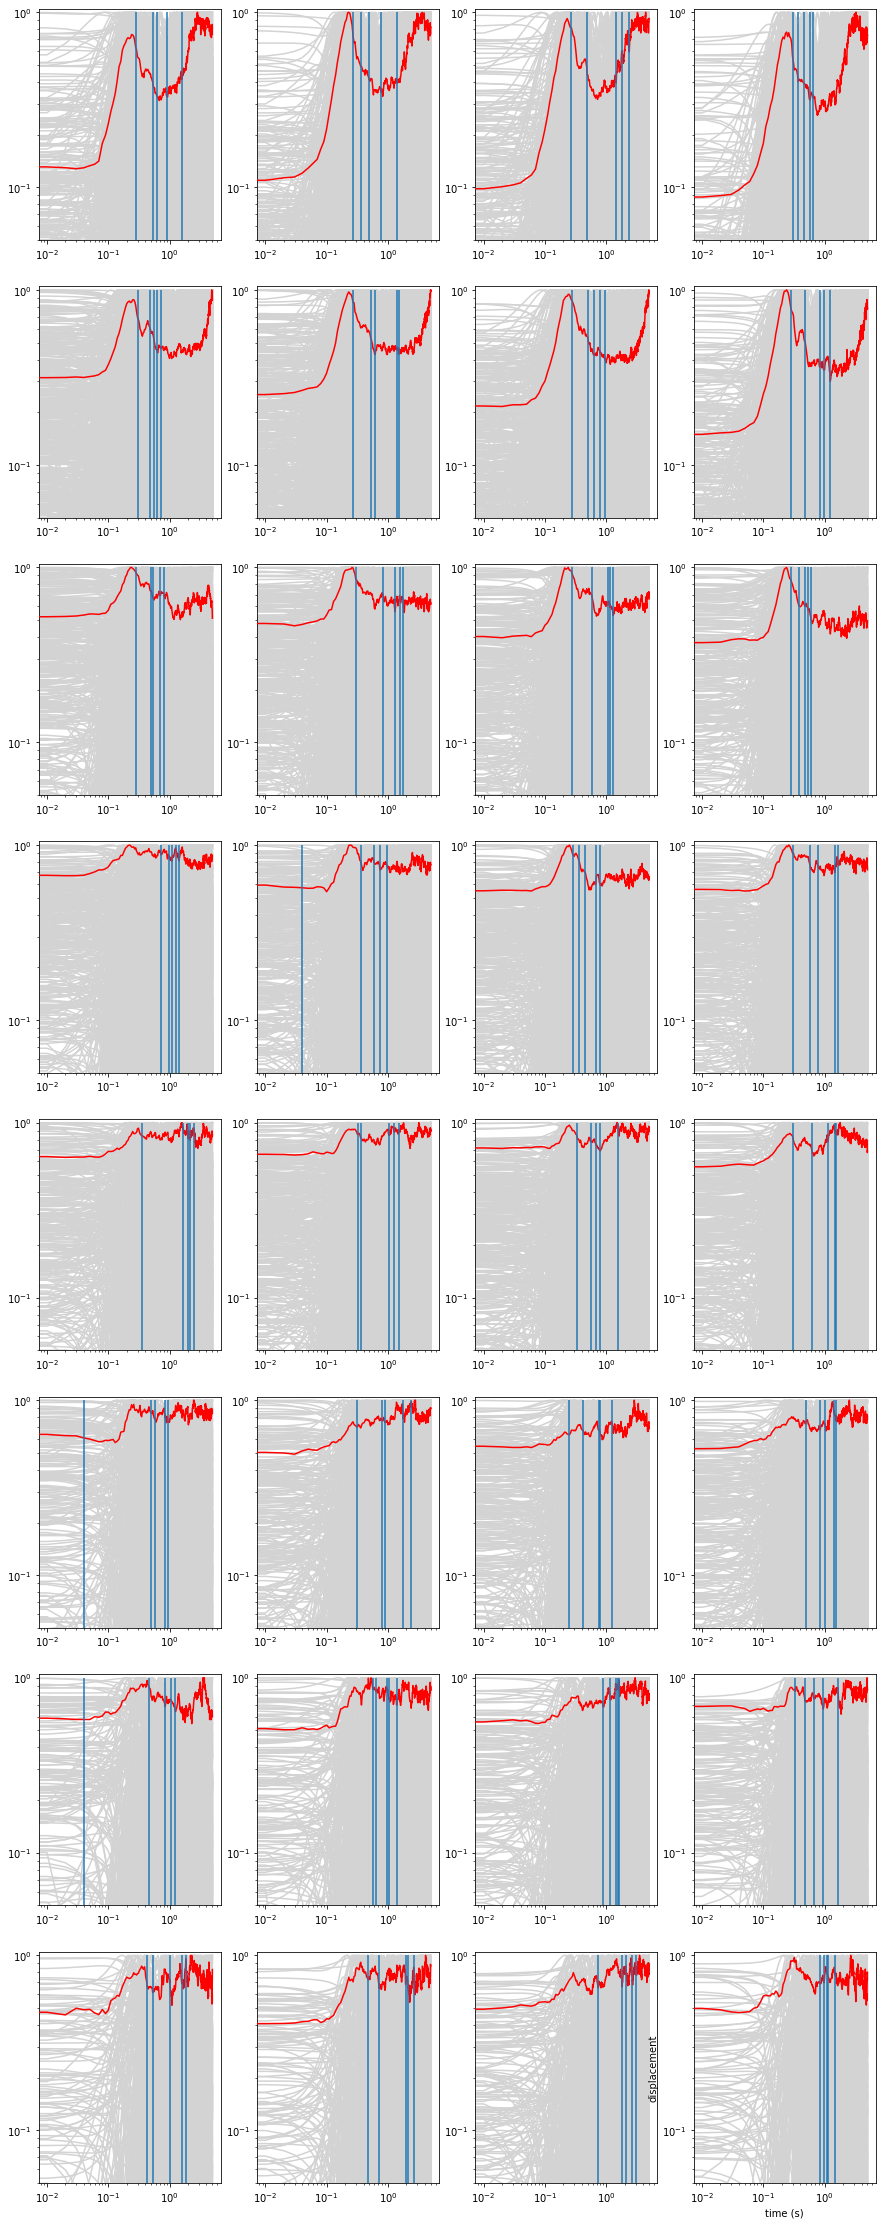

In [19]:
fig, axs = plt.subplots(8, 4, figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        aad[column][row]=np.median(np.array(ad[column][row]), 0)
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                axs[row_count][col_count].vlines(T_dp[i], 0.0001, 1, zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:500]), zorder = 50, color = 'red')
        for ind_ad in ad[column][row]:
            axs[row_count][col_count].plot(np.arange(0, 5, 0.01), ind_ad[:500]/max(ind_ad[:500]), color='lightgrey')
        axs[row_count][col_count].set_ylim([0.05, 1.05])
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [187]:
aad_bin

array([  2.44813105e-06,   2.64412203e-06,   2.85109020e-06, ...,
         7.53421091e-07,   5.83380897e-07,   4.19082451e-07])

onto row/column plot
[ 0.28  0.53  0.63  0.9   1.59]
3.0 0 0.28 484
[ 0.27  0.36  0.5   0.77  1.4 ]
3.1 0 0.27 484
[ 0.27  0.49  1.43  1.83  2.33]
3.2 0 0.27 484
[ 0.3   0.37  0.46  0.57  0.64]
3.3 0 0.3 484
[ 0.3   0.48  0.56  0.63  0.73]
3.0 1 0.3 697
[ 0.27  0.52  0.62  1.42  1.49]
3.1 1 0.27 697
[ 0.28  0.51  0.62  0.78  0.96]
3.2 1 0.28 697
[ 0.28  0.47  0.83  0.96  1.21]
3.3 1 0.28 697
[ 0.28  0.49  0.54  0.71  0.82]
3.0 2 0.28 436
[ 0.3   0.84  1.29  1.58  1.76]
3.1 2 0.3 437
[ 0.28  0.58  1.06  1.14  1.29]
3.2 2 0.28 437
[ 0.28  0.38  0.48  0.54  0.59]
3.3 2 0.28 437
[ 0.73  0.99  1.09  1.29  1.41]
3.0 3 0.73 412
[ 0.04  0.37  0.6   0.73  0.96]
3.1 3 0.37 408
[ 0.29  0.36  0.45  0.67  0.78]
3.2 3 0.29 408
[ 0.3   0.58  0.77  1.45  1.64]
3.3 3 0.3 408
[ 0.35  1.65  1.98  2.14  2.54]
3.0 4 0.35 352
[ 0.32  0.37  1.05  1.25  1.54]
3.1 4 0.32 351
[ 0.33  0.56  0.68  0.79  1.58]
3.2 4 0.33 351
[ 0.31  0.63  1.14  1.46  1.55]
3.3 4 0.31 351
[ 0.04  0.5   0.57  0.85  0.96]
3.0 5 0.5 2

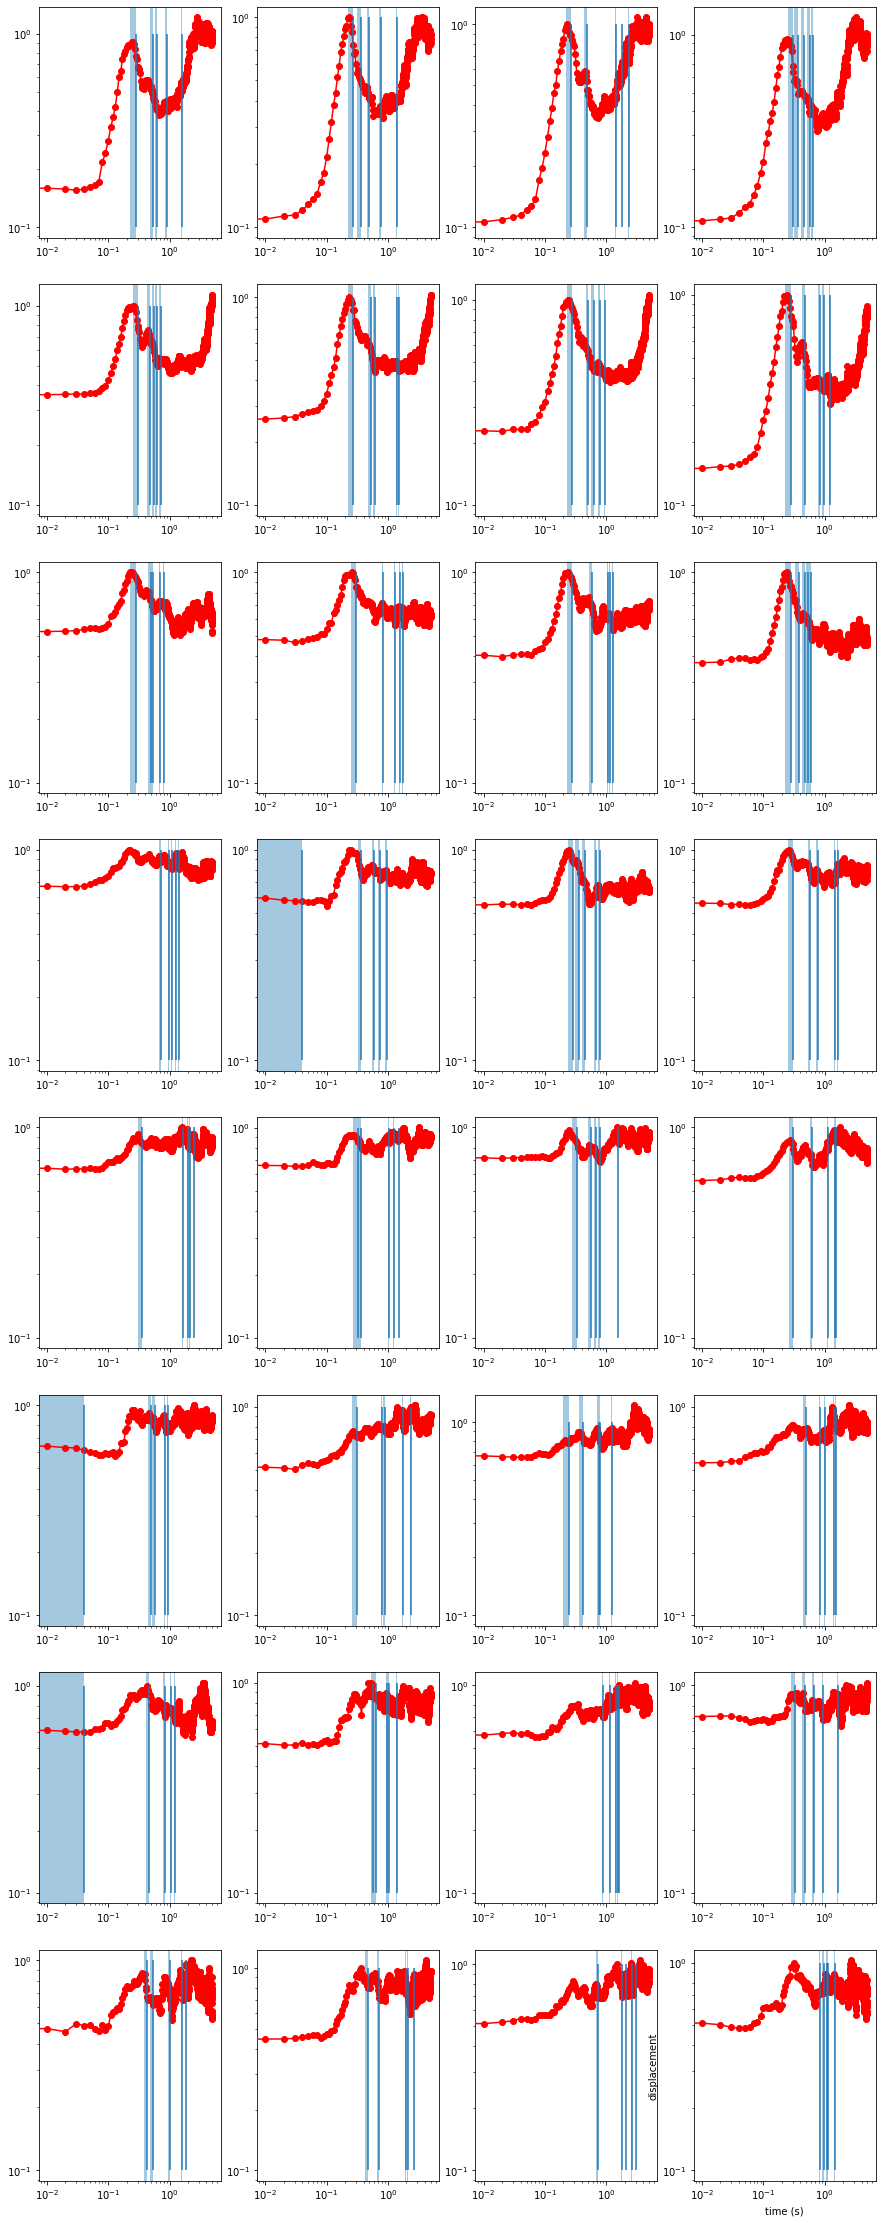

In [14]:
fig, axs = plt.subplots(8, 4, figsize = (15,40)) #df.shape[1]-1
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:4]:
        #print('for column')
        #aad[column][row]=df[column][row]/counts[column][row]#df = sum of absolute displacements
        aad[column][row]=np.median(np.array(ad[column][row]), 0)
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 100 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline = decline + 1
                if decline == 4:#np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            print(T_dp[0:5])
            for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
                #axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
                axs[row_count][col_count].vlines(T_dp[i], 0.1, 1, zorder = 100)
                axs[row_count][col_count].axvspan(T_dp[i]-0.05, T_dp[i], alpha = 0.4)
            if float("{:.2f}".format(T_dp[0]))>0.2:
                print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count][col_count].plot(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
        axs[row_count][col_count].scatter(np.arange(0, 5, 0.01), aad[column][row][:500]/max(aad[column][row][:250]), zorder = 50, color = 'red')
        #axs[row_count][col_count].set_xlim(T_dp[0], T_dp[5])
        #axs[row_count][col_count].set_ylim(0.1, 2)
        axs[row_count][col_count].set_xscale('log')
        axs[row_count][col_count].set_yscale('log') # in log space
        col_count += 1
    row_count += 1


#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')
plt.ylabel('displacement')
plt.xlabel('time (s)')
plt.show()

In [201]:
results_snr_10 =  [[['5.0', 0, 0.31, 16],
  ['5.1', 0, 1.05, 17],
  ['5.2', 0, 1.0, 16],
  ['5.3', 0, 0.55000000000000004, 17]],
 [['5.0', 1, 0.59999999999999998, 36],
  ['5.1', 1, 0.45000000000000001, 37],
  ['5.2', 1, 0.35999999999999999, 36],
  ['5.3', 1, 0.72999999999999998, 37]],
 [['5.0', 2, 0.5, 51],
  ['5.1', 2, 0.54000000000000004, 52],
  ['5.2', 2, 0.59999999999999998, 51],
  ['5.3', 2, 1.3300000000000001, 52]],
 [['5.0', 3, 0.54000000000000004, 60],
  ['5.1', 3, 0.63, 61],
  ['5.2', 3, 0.73999999999999999, 58],
  ['5.3', 3, 1.03, 61]],
 [['5.0', 4, 0.55000000000000004, 93],
  ['5.1', 4, 0.59999999999999998, 94],
  ['5.2', 4, 0.68000000000000005, 91],
  ['5.3', 4, 0.56000000000000005, 91]],
 [['5.0', 5, 0.69999999999999996, 67],
  ['5.1', 5, 0.68999999999999995, 68],
  ['5.2', 5, 0.48999999999999999, 60],
  ['5.3', 5, 0.78000000000000003, 68]],
 [['5.0', 6, 0.22, 45],
  ['5.1', 6, 0.44, 46],
  ['5.2', 6, 0.71999999999999997, 44],
  ['5.3', 6, 0.42999999999999999, 46]],
 [['5.0', 7, 0.52000000000000002, 13],
  ['5.1', 7, 0.38, 14],
  ['5.2', 7, 0.56999999999999995, 14],
  ['5.3', 7, 0.40999999999999998, 4]]]

In [21]:
import matplotlib.pylab as pl

In [22]:
pl.cm.jet(np.linspace(5.0,7.0,21))

array([[ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ],
       [ 0.5,  0. ,  0. ,  1. ]])

In [28]:
np.linspace(0,1,41)

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ])

onto row/column plot


/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad[column][row]=df[column][row]/counts[column][row]
/tmp/ipykernel_5262/1753848030.py:15: RuntimeWarning: invalid value encountered in true_divide
  aad

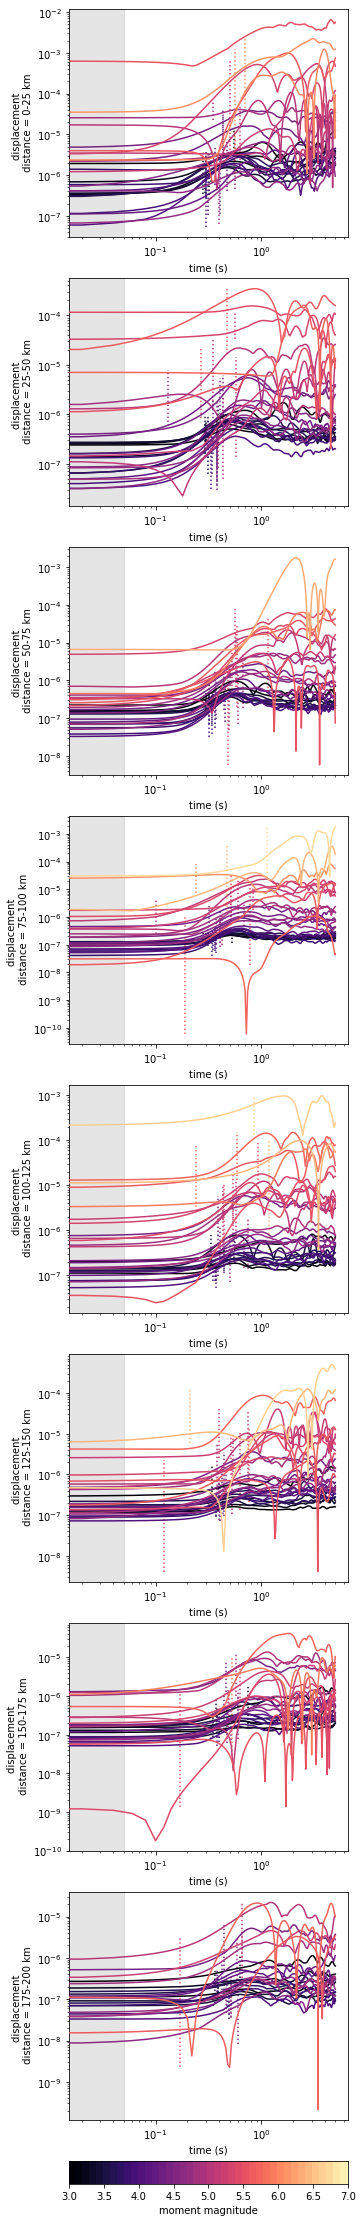

In [47]:
fig, axs = plt.subplots(9, 1, figsize=(5, 40), gridspec_kw={'height_ratios': [5,5,5,5,5,5,5,5, 0.5]})

import matplotlib.patches as mpatches
print('onto row/column plot')
row_count = 0
results = [[],[],[],[],[],[],[],[]]
import matplotlib.pylab as pl
colors = pl.cm.magma(np.linspace(0,1,41))
#cmap = pl.cm.get_cmap('magma', 21)  
for row in range(8): #rows are distances
    #print('for row')
    col_count = 0
    for column in df.columns[:-1]:#columns are magnitudes
        #print('for column')
        aad[column][row]=df[column][row]/counts[column][row]
        aad_bin = aad[column][row]
        # now to find where departure delay exceeds DPD
        # 'simple sequential computation ... comparing the amplitude at a sample
        # with the one at the previous sample ...regardless of the magntiude of the decline'
        # Noda and Ellsworth 2016
        DPD_time = 0.05
        DPD_samples = 5 # sampling rate is 50 Hz
        delay_time = []
        decline = 0 # count how many amplitudes have decreased in a row
        for point in range(1,len(aad_bin)):
            #print('for point in aad')
            if aad_bin[point]<aad_bin[point-1]:
                #print('less than previous point')
                decline += 1
                if decline == np.ceil(DPD_samples)-1: #if surpassed the DPD
                    delay_time.append(point)
            else:
                decline = 0 #reset decline counter
        T_dp = np.array(delay_time)/sampling_rate # convert to seconds
        if len(T_dp)>0:
            #print(T_dp[0:5])
            #for i in range(0, min(5, len(T_dp))): # vertical lines marking potential Tdp locations (first 5 after P wave pick)
            #    axs[row_count][col_count].vlines(T_dp[i], min(aad_bin[0:250]), max(aad_bin[0:250]), zorder = 100)
            if float("{:.2f}".format(T_dp[0]))>0.05:
                #print(column, row_count, T_dp[0], counts[column][row])
                results[row].append([column, row_count, T_dp[0], counts[column][row]])
                axs[row_count].vlines(T_dp[0], min(aad[column][row][:250]), max(aad[column][row][:250]), color = colors[col_count], linestyle = ':')
            elif len(T_dp)>1 and float("{:.2f}".format(T_dp[1]))>0.05:
                #print(column, row_count, T_dp[1], counts[column][row])
                results[row].append([column, row_count, T_dp[1], counts[column][row]])
        axs[row_count].plot(np.arange(0, 5, 0.02), aad[column][row][:250], zorder = 50, color = colors[col_count])
        #for ind_ad in ad[column][row]:
        #    axs[row_count][col_count].plot(np.arange(0, 5, 0.02), ind_ad[:250], color='lightgrey')
        axs[row_count].set_xscale('log')
        axs[row_count].set_yscale('log') # in log space
        col_count += 1
    axs[row_count].set_ylabel(f'displacement \n distance = {row_count*25}-{row_count*25+25} km')
    axs[row_count].set_xlabel('time (s)')
    axs[row_count].axvspan(0, 0.05, color='grey', alpha = 0.2)
    row_count += 1



left = 3
axs[8].set_ylim([0,1])
axs[8].set_xlim([3,7])
for c in range(0, 41):
    rect=mpatches.Rectangle((left,0),0.1,1, fill=True,color=colors[c],linewidth=2,facecolor=colors[c])
    axs[8].add_patch(rect)
    left += 0.1
axs[8].set_xlabel('moment magnitude')
axs[8].set_xticks(np.arange(3,7.1,0.5))
axs[8].set_yticks([])
#cax = axs[8].add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
#fig.colorbar(colors, cax=axs[8], orientation='horizontal')
#axs[0][0].set_title('M5-6')
#axs[0][1].set_title('M6-7')
#axs[0][0].set_ylabel('0-25 km')
#axs[1][0].set_ylabel('25-50 km')
#axs[2][0].set_ylabel('50-75 km')
#axs[3][0].set_ylabel('75-100 km')

plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
results[1]

[['5.0', 1, 0.51000000000000001, 54],
 ['5.1', 1, 0.90000000000000002, 55],
 ['5.2', 1, 0.22, 53],
 ['5.3', 1, 0.92000000000000004, 55],
 ['5.4', 1, 0.68999999999999995, 47],
 ['5.5', 1, 0.75, 52],
 ['5.6', 1, 0.29999999999999999, 55],
 ['5.7', 1, 1.02, 55],
 ['5.8', 1, 1.6000000000000001, 52],
 ['5.9', 1, 0.68000000000000005, 51],
 ['6.0', 1, 1.24, 5],
 ['6.1', 1, 1.05, 2],
 ['6.2', 1, 0.59999999999999998, 6],
 ['6.3', 1, 0.63, 2],
 ['6.4', 1, 0.91000000000000003, 1]]

In [10]:
#%%script false --no-raise-error
results = [['5.0', 0, 0.32000000000000001, 23],
 ['5.1', 0, 0.58999999999999997, 24],
 ['5.2', 0, 0.35999999999999999, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.72999999999999998, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92000000000000004, 2],
 ['6.0', 0, 0.56000000000000005, 2],
 ['6.1', 0, 1.5700000000000001, 2],
 ['6.4', 0, 1.3600000000000001, 3],
 ['5.0', 1, 0.52000000000000002, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.56999999999999995, 31],
 ['5.3', 1, 0.76000000000000001, 31],
 ['5.4', 1, 0.69999999999999996, 50],
 ['5.5', 1, 0.29999999999999999, 6],
 ['5.6', 1, 0.46999999999999997, 7],
 ['5.7', 1, 0.52000000000000002, 6],
 ['5.8', 1, 0.96999999999999997, 30],
 ['5.9', 1, 1.0800000000000001, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64000000000000001, 1],
 ['6.4', 1, 0.91000000000000003, 3],
 ['6.8', 1, 1.1899999999999999, 3],
 ['5.0', 2, 0.48999999999999999, 65],
 ['5.1', 2, 0.45000000000000001, 66],
 ['5.2', 2, 0.41999999999999998, 32],
 ['5.3', 2, 0.54000000000000004, 44],
 ['5.4', 2, 0.42999999999999999, 66],
 ['5.5', 2, 0.55000000000000004, 8],
 ['5.6', 2, 0.59999999999999998, 45],
 ['5.8', 2, 0.52000000000000002, 42],
 ['5.9', 2, 0.58999999999999997, 44],
 ['6.0', 2, 1.3600000000000001, 7],
 ['6.1', 2, 0.56999999999999995, 7],
 ['6.3', 2, 1.1000000000000001, 1],
 ['6.4', 2, 1.8100000000000001, 8],
 ['6.6', 2, 0.94999999999999996, 1],
 ['5.0', 3, 0.47999999999999998, 66],
 ['5.1', 3, 0.56999999999999995, 67],
 ['5.2', 3, 0.68999999999999995, 53],
 ['5.3', 3, 0.56000000000000005, 67],
 ['5.4', 3, 0.54000000000000004, 67],
 ['5.5', 3, 0.56999999999999995, 36],
 ['5.6', 3, 0.76000000000000001, 38],
 ['5.7', 3, 0.63, 53],
 ['5.8', 3, 0.70999999999999996, 28],
 ['5.9', 3, 0.20999999999999999, 53],
 ['6.0', 3, 1.23, 10],
 ['6.1', 3, 1.05, 9],
 ['6.3', 3, 0.56000000000000005, 9],
 ['6.4', 3, 1.1599999999999999, 11],
 ['6.6', 3, 0.68000000000000005, 1],
 ['6.7', 3, 1.1299999999999999, 2],
 ['6.8', 3, 0.35999999999999999, 11],
 ['5.0', 4, 0.56000000000000005, 56],
 ['5.1', 4, 0.42999999999999999, 56],
 ['5.2', 4, 0.68000000000000005, 21],
 ['5.3', 4, 0.48999999999999999, 56],
 ['5.4', 4, 0.46999999999999997, 56],
 ['5.5', 4, 0.46000000000000002, 4],
 ['5.6', 4, 0.58999999999999997, 38],
 ['5.7', 4, 0.57999999999999996, 4],
 ['5.8', 4, 0.63, 36],
 ['5.9', 4, 0.56000000000000005, 25],
 ['6.0', 4, 1.22, 5],
 ['6.3', 4, 0.65000000000000002, 5],
 ['6.4', 4, 1.29, 6],
 ['6.6', 4, 0.35999999999999999, 1],
 ['6.7', 4, 0.72999999999999998, 1],
 ['6.8', 4, 1.3200000000000001, 6],
 ['5.0', 5, 0.59999999999999998, 9],
 ['5.1', 5, 0.60999999999999999, 10],
 ['5.2', 5, 0.77000000000000002, 10],
 ['5.3', 5, 0.78000000000000003, 10],
 ['5.4', 5, 0.42999999999999999, 10],
 ['5.6', 5, 0.75, 1],
 ['5.7', 5, 0.56000000000000005, 10],
 ['6.0', 5, 0.67000000000000004, 5],
 ['6.3', 5, 0.69999999999999996, 6],
 ['5.0', 6, 0.60999999999999999, 9],
 ['5.1', 6, 0.73999999999999999, 9],
 ['5.2', 6, 0.95999999999999996, 9],
 ['5.3', 6, 0.39000000000000001, 5],
 ['5.4', 6, 0.62, 10],
 ['5.0', 7, 0.62, 10],
 ['5.2', 7, 0.54000000000000004, 10],
 ['5.3', 7, 0.77000000000000002, 11],
 ['5.4', 7, 0.46999999999999997, 9]]

In [10]:
import numpy as np
from scipy import optimize, linalg
import matplotlib.pyplot as plt

def model_function(x_data, a, b):
    return a*x_data + b

In [18]:
results

[['5.0', 0, 0.32, 23],
 ['5.1', 0, 0.59, 24],
 ['5.2', 0, 0.36, 2],
 ['5.3', 0, 0.5, 11],
 ['5.4', 0, 0.73, 24],
 ['5.5', 0, 0.62, 2],
 ['5.6', 0, 0.92, 2],
 ['6.0', 0, 0.56, 2],
 ['6.1', 0, 1.57, 2],
 ['6.4', 0, 1.36, 3],
 ['5.0', 1, 0.52, 50],
 ['5.1', 1, 0.37, 50],
 ['5.2', 1, 0.57, 31],
 ['5.3', 1, 0.76, 31],
 ['5.4', 1, 0.7, 50],
 ['5.5', 1, 0.3, 6],
 ['5.6', 1, 0.47, 7],
 ['5.7', 1, 0.52, 6],
 ['5.8', 1, 0.97, 30],
 ['5.9', 1, 1.08, 31],
 ['6.0', 1, 0.5, 2],
 ['6.2', 1, 0.64, 1],
 ['6.4', 1, 0.91, 3],
 ['6.8', 1, 1.19, 3],
 ['5.0', 2, 0.49, 65],
 ['5.1', 2, 0.45, 66],
 ['5.2', 2, 0.42, 32],
 ['5.3', 2, 0.54, 44],
 ['5.4', 2, 0.43, 66],
 ['5.5', 2, 0.55, 8],
 ['5.6', 2, 0.6, 45],
 ['5.8', 2, 0.52, 42],
 ['5.9', 2, 0.59, 44],
 ['6.0', 2, 1.36, 7],
 ['6.1', 2, 0.57, 7],
 ['6.3', 2, 1.1, 1],
 ['6.4', 2, 1.81, 8],
 ['6.6', 2, 0.95, 1],
 ['5.0', 3, 0.48, 66],
 ['5.1', 3, 0.57, 67],
 ['5.2', 3, 0.69, 53],
 ['5.3', 3, 0.56, 67],
 ['5.4', 3, 0.54, 67],
 ['5.5', 3, 0.57, 36],
 ['5.6', 3, 0

In [17]:
results_concat

array([['5.0', '0', '0.73', '10'],
       ['5.1', '0', '0.44', '11'],
       ['5.2', '0', '0.43', '11'],
       ['5.3', '0', '0.44', '10'],
       ['5.4', '0', '0.73', '2'],
       ['5.6', '0', '0.93', '2'],
       ['6.0', '0', '0.4', '1'],
       ['5.0', '1', '0.6', '14'],
       ['5.1', '1', '0.46', '15'],
       ['5.2', '1', '0.38', '15'],
       ['5.3', '1', '0.55', '5'],
       ['5.4', '1', '0.8', '5'],
       ['5.5', '1', '0.79', '15'],
       ['5.7', '1', '0.65', '15'],
       ['5.8', '1', '0.44', '15'],
       ['6.0', '1', '0.61', '1'],
       ['6.4', '1', '0.83', '1'],
       ['5.0', '2', '0.61', '20'],
       ['5.1', '2', '0.33', '21'],
       ['5.2', '2', '0.46', '21'],
       ['5.3', '2', '0.36', '21'],
       ['5.4', '2', '0.57', '20'],
       ['5.5', '2', '0.58', '21'],
       ['5.6', '2', '0.58', '21'],
       ['5.7', '2', '0.87', '21'],
       ['5.8', '2', '0.78', '21'],
       ['6.0', '2', '1.44', '1'],
       ['6.2', '2', '0.66', '1'],
       ['6.3', '2', '1.09', '1']

In [29]:
all_mag = []
n = []
tdp_all = []
results_concat = []
#for i in results:
results_concat = np.concatenate(results)
for i in results_concat:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
    n.append(float(i[3]))
y = all_mag
x = tdp_all    
x = np.array(x)

In [14]:
results_concat

array(['5.0', '0', '0.32', '23', '5.1', '0', '0.59', '24', '5.2', '0',
       '0.36', '2', '5.3', '0', '0.5', '11', '5.4', '0', '0.73', '24',
       '5.5', '0', '0.62', '2', '5.6', '0', '0.92', '2', '6.0', '0',
       '0.56', '2', '6.1', '0', '1.57', '2', '6.4', '0', '1.36', '3',
       '5.0', '1', '0.52', '50', '5.1', '1', '0.37', '50', '5.2', '1',
       '0.57', '31', '5.3', '1', '0.76', '31', '5.4', '1', '0.7', '50',
       '5.5', '1', '0.3', '6', '5.6', '1', '0.47', '7', '5.7', '1', '0.52',
       '6', '5.8', '1', '0.97', '30', '5.9', '1', '1.08', '31', '6.0', '1',
       '0.5', '2', '6.2', '1', '0.64', '1', '6.4', '1', '0.91', '3', '6.8',
       '1', '1.19', '3', '5.0', '2', '0.49', '65', '5.1', '2', '0.45',
       '66', '5.2', '2', '0.42', '32', '5.3', '2', '0.54', '44', '5.4',
       '2', '0.43', '66', '5.5', '2', '0.55', '8', '5.6', '2', '0.6', '45',
       '5.8', '2', '0.52', '42', '5.9', '2', '0.59', '44', '6.0', '2',
       '1.36', '7', '6.1', '2', '0.57', '7', '6.3', '2', '

In [ ]:
initial_guess = (1.5, 6)

In [ ]:
def obj(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

def obj_flipped(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    t_guess = (a*m_real+b)
    return sum(abs(t_guess-t))

In [ ]:
res = optimize.minimize(obj, initial_guess, method = 'Nelder-Mead')

In [ ]:
res

In [ ]:
a = 2.29
b = 5.95
m_real = np.array(all_mag)
t = np.log10(np.array(tdp_all))
m_guess = (a*t+b)
sum(abs(m_guess-m_real))

BOOTSTRAPPING -- np.polyfit

In [ ]:
import random 
def bootstrapping_function():
    m_all = np.array(all_mag)
    t_all = np.array(tdp_all)
    t_BS = []
    m_BS = []
    for count in range(0,len(t_all)):
        #print(count)
        i = random.randrange(0,len(t_all))
        t_BS.append(t_all[i])
        m_BS.append(m_all[i])
    print(t_BS[0], m_BS[0])
    return m_BS, t_BS

In [ ]:
def obj_BS_1(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    #print(m_real[0], t[0])
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real))
def obj_BS_2(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = m_BS
    t = t_BS#, t = bootstrapping_function()
    t = np.log10(t)
    m_guess = (a*t+b)
    return sum((m_guess-m_real)**2)

In [ ]:
gradt = []
intercepts = []
gradt_2 = []
intercepts_2 = []
gradt_polyfit = []
intercepts_polyfit = []
for bs in range(0, 1000):
    print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    m_BS, t_BS = bootstrapping_function()
    res = optimize.minimize(obj_BS_1, initial_guess, method = 'TNC')
    gradt.append(res.x[0])
    intercepts.append(res.x[1])
    #print('bootstrapping run'+str(bs))
    initial_guess = (0, 0)
    res = optimize.minimize(obj_BS_2, initial_guess, method = 'TNC')
    gradt_2.append(res.x[0])
    intercepts_2.append(res.x[1])  
    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
    gradt_polyfit.append(a)
    intercepts_polyfit.append(b)    

In [ ]:

#for bs in range(0, 100):
#    print('bootstrapping run'+str(bs))
#    m_BS, t_BS = bootstrapping_function()
#    [a, b] = np.polyfit(x=np.log10(t_BS), y=np.array(m_BS), deg=1)
#    gradt_polyfit.append(a)
#    intercepts_polyfit.append(b)

In [ ]:
min(intercepts), max(intercepts)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
i_bins = list(np.arange(5,6.5, 0.02))
g_bins = list(np.arange(-2, 3,0.1))

res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
res_3 = optimize.minimize(obj, initial_guess, method = 'TNC')
res_2 = optimize.minimize(obj_2, initial_guess, method = 'nelder-mead')

intercepts.sort()
intercepts_2.sort()
n, bins, patches = axs[0].hist(intercepts, bins = i_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)
axs[0].hist(intercepts_2, bins = i_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
#axs[0].hist(intercepts_polyfit, bins = i_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[0].vlines(res.x[1], 0, 200, color = 'tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[0].vlines(res_3.x[1], 0, 200, color = 'tab:green', label = 'TNC optimize.minimize all data, 1-norm')
axs[0].vlines(res_2.x[1], 0, 200, color = 'tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[0].vlines(5.95, 0, 200, color = 'k', label = 'published')
axs[0].vlines(intercepts[25], 0, 200, linestyle = ':')
axs[0].vlines(intercepts[975], 0, 200, linestyle = ':')
axs[0].vlines(intercepts_2[25], 0, 200, linestyle = ':', color = 'orange')
axs[0].vlines(intercepts_2[975], 0, 200, linestyle = ':', color = 'orange')

gradt.sort()
gradt_2.sort()
axs[1].vlines(res.x[0], 0 , 200, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
axs[1].vlines(res_2.x[0], 0 , 200, color='tab:orange', label = 'optimize.minimize all data, 2-norm')
axs[1].vlines(res_3.x[0], 0 , 200, color='tab:green', label = 'TNC optimize.minimize all data, 2-norm')
axs[1].vlines(2.29, 0 , 200, color = 'k', label = 'published')
axs[1].vlines(gradt[25], 0 , 200, linestyle = ':')
axs[1].vlines(gradt[975], 0 , 200, linestyle = ':')
axs[1].vlines(gradt_2[25], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].vlines(gradt_2[975], 0 , 200, linestyle = ':', color = 'tab:orange')
axs[1].hist(gradt, bins = g_bins, label = 'optimize.minimize 1-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)
axs[1].hist(gradt_2, bins = g_bins, label = 'optimize.minimize 2-norm', alpha = 0.3)#, histtype='step', linewidth=2, edgecolor='k',fill=True)

axs[0].set_title('intercepts')
axs[0].ticklabel_format(useOffset=False)
axs[0].ticklabel_format(useOffset=False)
#axs[1].hist(gradt_polyfit, bins = g_bins, label = 'polyfit', alpha = 0.3, histtype='step', linewidth=2, hatch='.', edgecolor='k',fill=True)
axs[1].set_title('gradients')
axs[1].ticklabel_format(useOffset=False)
axs[1].ticklabel_format(useOffset=False)
axs[0].legend()
axs[1].legend()

In [ ]:
max(gradt)

In [ ]:
intercepts[25]

In [42]:
q = 0
for i in results:
    for j in i:
        q = q+j[-1]


In [43]:
q

3594

0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.419800986407 5.60930315909
1.1130167183 5.63507563715
 final_simplex: (array([[ 1.11301672,  5.63507564],
       [ 1.11292922,  5.63506064],
       [ 1.11309168,  5.63506616]]), array([ 3.22841899,  3.22842462,  3.22842982]))
           fun: 3.2284189941303083
       message: 'Optimization terminated successfully.'
          nfev: 211
           nit: 110
        status: 0
       success: True
             x: array([ 1.11301672,  5.63507564])
0.771754702869 5.74264578186
1.04339551807 5.90723875357
 final_simplex: (array([[ 1.04339552,  5.907238

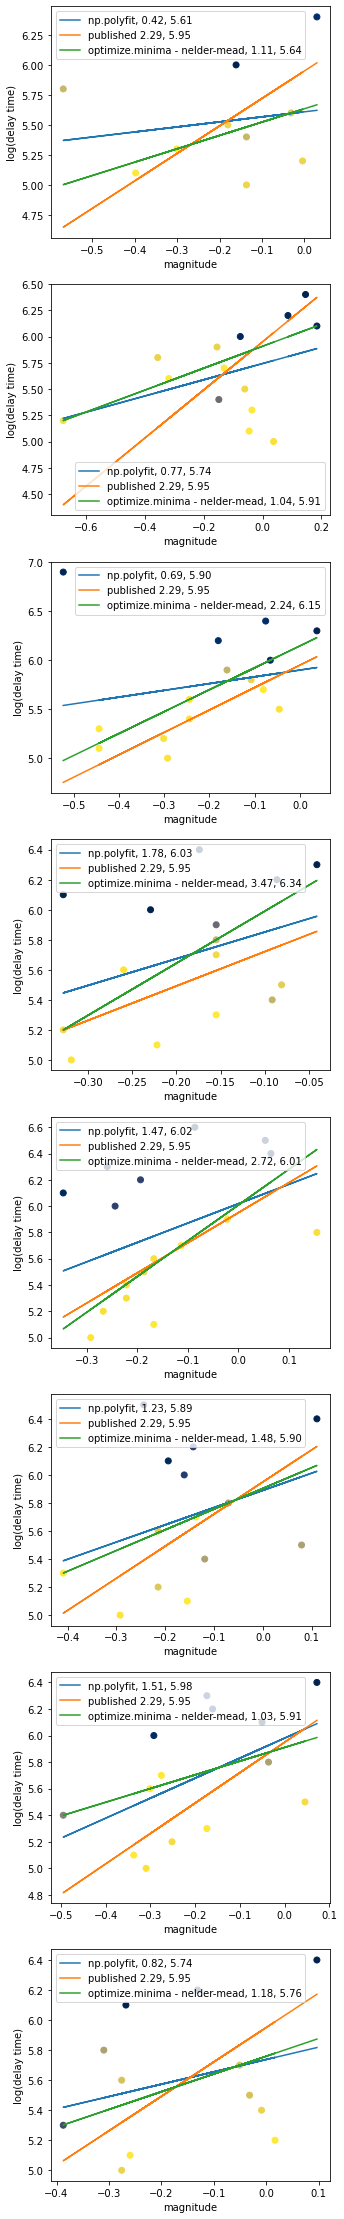

In [54]:
#%conda install ipympl
%matplotlib inline
initial_guess = (0,0)#2.29,5.95)
fig, axs = plt.subplots(8,1, figsize=(5,40))
for r in range(0, 8):
    all_mag = []
    n = []
    tdp_all = []
    for i in results[r]:
        all_mag.append(float(i[0]))
        tdp_all.append(float(i[2]))
        n.append(float(i[3]))
    y = all_mag
    x = tdp_all    
    x = np.array(x)
    
    def obj(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real))
    def obj_2(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum((m_guess-m_real)**2)

    def obj_flipped(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        t_guess = (a*m_real+b)
        return sum(abs(t_guess-t))
    def obj_weighted(to_opt):
        a=to_opt[0]
        b=to_opt[1]
        importance = np.array(n)
        m_real = np.array(all_mag)
        t = np.log10(np.array(tdp_all))
        m_guess = (a*t+b)
        return sum(abs(m_guess-m_real)*n)

    #===================================================================
    sc = axs[r].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'cividis')
    #axs[r][0].scatter(np.log10(tdp_all), all_mag, marker = '.', color='k')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r].set_xlabel('log(delay time)')
    axs[r].set_ylabel('magnitude')

    #===================================================================
    '''sc = axs[r][1].scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
    #cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
    axs[r][1].plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
                label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
    print(a,b)

    axs[r][1].plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
                label='published 2.29, 5.95')

    res = optimize.minimize(obj, initial_guess, method = 'nelder-mead')
    axs[r][1].plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
                label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
    print(res.x[0], res.x[1])
    print(res)
    axs[r][1].set_xlabel('log(delay time)')
    axs[r][1].set_ylabel('magnitude')'''
    '''sc = axs[r][1].scatter(all_mag, np.log10(tdp_all), c = n, cmap = 'gray')
    #cax = fig.add_axes([0.555, 0.777, 0.18, 0.02]) # x0, y0, width, height
    #fig.colorbar(sc, cax=cax, orientation='horizontal')

    [a, b] = np.polyfit(x= np.array(all_mag), y=np.log10(np.array(tdp_all)), deg=1)
    axs[r][1].plot(np.array(all_mag), a*np.array(all_mag)+b, label='np.polyfit')

    axs[r][1].plot(np.array(all_mag), 0.437*np.array(all_mag)-2.598, label='published-flipped')

    res = optimize.minimize(obj_flipped, initial_guess, method = 'TNC')
    axs[r][1].plot(np.array(all_mag), res.x[0]*np.array(all_mag)+res.x[1], 
                label='optimize.minima - nelder-mead, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))'''

    axs[r].set_ylabel('log(delay time)')
    axs[r].set_xlabel('magnitude')
    print(a,b)
    print(res.x[0], res.x[1])
    print(res)
    axs[r].legend()
    axs[r].legend()
    
plt.show()
    

In [32]:
tdp_all

[0.48,
 0.6,
 0.47,
 0.7,
 0.81,
 0.83,
 0.55,
 0.7,
 0.7,
 0.7,
 0.59,
 0.47,
 0.82,
 0.91,
 0.67]

In [ ]:
def obj_weighted(to_opt):
    a=to_opt[0]
    b=to_opt[1]
    importance = np.array(n)
    m_real = np.array(all_mag)
    t = np.log10(np.array(tdp_all))
    m_guess = (a*t+b)
    return sum(abs(m_guess-m_real)*n)

In [ ]:
plt.hist(tdp_all, bins = np.arange(0, 3, 0.1))

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))
sc = axs.scatter(np.log10(tdp_all), all_mag, c = n, cmap = 'gray')
cax = fig.add_axes([0.13, 0.777, 0.18, 0.02]) # x0, y0, width, height
fig.colorbar(sc, cax=cax, orientation='horizontal')

[a, b] = np.polyfit(x=np.log10(np.array(tdp_all)), y=np.array(all_mag), deg=1)
axs.plot(np.log10(np.array(tdp_all)), a*np.log10(np.array(tdp_all))+b,
            label='np.polyfit, '+"{:.2f}".format(a)+', '+"{:.2f}".format(b))
print(a,b)

axs.plot(np.log10(np.array(tdp_all)), 2.29*np.log10(np.array(tdp_all))+5.95, 
            label='published 2.29, 5.95')

res = optimize.minimize(obj, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))

res = optimize.minimize(obj_weighted, initial_guess, method = 'TNC')
axs.plot(np.log10(np.array(tdp_all)), res.x[0]*np.log10(np.array(tdp_all))+res.x[1], 
            label='weighted  optimize.minima - TNC, '+"{:.2f}".format(res.x[0])+', '+"{:.2f}".format(res.x[1]))
print(res.x[0], res.x[1])
print(res)
axs.set_xlabel('log(delay time)')
axs.set_ylabel('magnitude')
axs.legend()

In [ ]:
J = res.jac
JT = J.transpose()
H = np.dot(JT, J)
cov = np.linalg.inv(H)

In [ ]:
H

In [ ]:
U, s, Vh = linalg.svd(res.jac, full_matrices=False)
tol = np.finfo(float).eps*s[0]*max(res.jac.shape)
w = s > tol
cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
perr = np.sqrt(np.diag(cov))   

In [ ]:
print(min(np.log10(tdp_all)),min(tdp_all))

In [ ]:
plt.scatter(tdp_all, all_mag)

In [ ]:
tdp_all

In [ ]:
#res = optimize.minimize(obj, x0)

In [ ]:
#results

In [ ]:
# plot line of best fit
#popt, pcov = curve_fit(model_function, np.log(np.array(tdp_all)), np.array(all_mag), absolute_sigma = True)
#plt.plot(np.log(tdp_all), model_function(np.log(tdp_all), *popt), color='orange')
#plt.scatter(np.log(tdp_all), all_mag)

# add 2 * std banding
#perr = np.sqrt(np.diag(pcov))
#x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
#x_lower_me = x_me - 2*perr[1]
#x_upper_me =  x_me + 2*perr[1]
#y_me = popt[0]*x_me+popt[1]
#y_lower_me = popt[0]*x_lower_me-popt[1]
#y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
#plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
#plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
#plt.xlim([-1,1])
print(popt, perr)

In [ ]:
print('mw='+str(popt[0])+'*log(Tdp) + ' + str(popt[1]))

In [ ]:
popt

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, np.log10(x), y, absolute_sigma = True)
plt.plot(np.log10(x), model_function(np.log10(x), *popt), color='orange')
plt.scatter(np.log(x), y)

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(-10, 10, 0.1) #min(x), max(x), 0.1) #np.arange(5, 7, 0.1)

x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
x_me = np.log(x_me)
x_upper_me = np.log(x_upper_me)
x_lower_me = np.log(x_lower_me)
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]

#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.xlim([-1,1])

In [ ]:
popt

In [ ]:
results

In [ ]:
all_mag = []

tdp_all = []
for i in results:
    all_mag.append(float(i[0]))
    tdp_all.append(float(i[2]))
x = np.array(all_mag)
y = tdp_all    
y = np.array(y)

In [ ]:
# plot line of best fit
popt, pcov = curve_fit(model_function, x, np.log(y), absolute_sigma = True)
plt.plot(x, model_function(x, *popt), color='orange')
plt.scatter(x, np.log(y))

# add 2 * std banding
perr = np.sqrt(np.diag(pcov))
x_me = np.arange(5, 7, 0.1)
#x_me = np.log(x_me)
x_lower_me = x_me - 2*perr[1]
x_upper_me =  x_me + 2*perr[1]
y_me = popt[0]*x_me+popt[1]
y_lower_me = popt[0]*x_lower_me-popt[1]
y_upper_me = popt[0]*x_upper_me-popt[1]
#axs[0].plot(x, y_me, color = '')
plt.fill_between(x_me, model_function(np.array(x_lower_me), *popt), model_function(np.array(x_upper_me), *popt), color = '#8adfff', alpha = 0.52, zorder =1)
plt.plot(x_me, model_function(np.array(x_lower_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)
plt.plot(x_me, model_function(np.array(x_upper_me), *popt), color = '#003f5c', linestyle = '--', zorder =2)


In [ ]:
popt